# Documentation for Hydra Multi-Asset Verification Test
ACTION_LIST = [['test_add', 'test_q_for_r', 'test_r_for_r','test_r_for_q', 'test_remove']]



## Model Description

The methodology for the tests is to create two universes - one for Hydra and one for Uniswap - to subsequently be able to represent sequences of actions on each side. As the Hydra system is unique in its design and has no counterpart yet for approprate comparisons the role of the benchmark will be fulfilled by assembling several Uniswaps together in a way that everything that can be done in Hydra can be accordingly reproduced. This allows next to compare the implications on both systems and ultimately assess the quantitative and qualitative differences of results and impacts on the Hydra system and its agents. 

This approach necessitates the definition and specification of two models:
   - 1 Hydra Omnipool model with one instance that is defined in line with the [Hydra Mathematical Specification](https://hackmd.io/M7OeWimITKGVxBDHGQa6gQ?view)
   - 1 Uniswap model with several instances that each are responsible for a particular mechanism
        - which of 1 instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - which of 1 instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - which of 1 instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
        
![](https://i.imgur.com/yb6Zh3T.png)
        
## Test cases

A variety of testcases can be explored with this model resulting from a combination of the following parameters
   
   - Event: Add Liquidity, Remove Liquidity, Swap Asset, Swap Asset for Base
   - Asset: $R_i$, $R_j$, $R_k$, $Q$
   - Multiple Action Type: Alternating, $i$ only, $j$ only
   - Composite Action Type: Alternating, Trade Bias
   - Enable Symmetric Liquidity: True, False
    
In addition to these settings also a fee structure can be imposed:

   - Fixed Fee

## Test agents

The model specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

Two dataframes of agents are initialized identically for both the Uniswap and the Hydra world and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

![](https://i.imgur.com/r9IAJMr.png)



## Composite Action Tests

Besides being able to test all mechanisms individually also compositions of actions can be performed. This means selecting and combining two from the above testcases and letting the respective agents take the actions repeadetly. A composition action test therefore is defined as two actions which each can be a combination of *event* and *asset* selected from the list of testcases above, for example:
- Add liquidity in $R_i$ and Add liquidity in $R_j$
- Add liquidity in $R_i$ and Swap $R_i$ for $Q$
- Remove liquidity in $R_j$ and Swap $R_i$ for $Q$
- ...

In total there would be 28 composit pairs which can be derived from this decision tree:
selecting any one of the four primitive mechanisms of: **trade in/out** or **add/remove liquidity** of some given asset and then the subsequent action could be the three remaining mechanisms of the same asset or doing anyone of the four mechanisms in another asset.  

These basic combinations can be explored before further proceeding with
- trade sizes,
- trade frequencies,
- randomization,...



## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Introduction to Hydra
>Hydra is an automated market maker that generalizes the concept of Uniswap and Balancer to a) an arbitrary number of dimensions and b) a variant weight distaribution of assets in the pool that changes in accordance with action sequences in the pool. Anyone can become a liquidity provider, and invest in the 'Omnipool'. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://hydradx.io/

There is a predefined set of (_mechanisms_) in which an agent can interact with an the Hydra Protocol :
1. `addLiquidity`: deposit a risk asset in the omnipool; mint HDX tokens - "shares" of this risk asset - in exchange;
1. `removeLiquidity`: burn HDX tokens; withdraw a proportional amount of the risk asset in exchange;
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" 
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Hydra takes the corresponding amount of "token A" from the user account 



## Model File structure

The folder **model** contains:

 - a file config.py: 

    This file configures the simulation experiments by setting the number of monte carlo runs, the number of timesteps for the simulation and the simulation parameters. It also aggregates the partial states and the initial state variables.
    
    The purpose of this file is to *configure and initialize* the experiment.
    
    
 - a file partial_state_update_block.py

    This file defines each partial state update block individually. This feature allows cadCAD to divide each simulation timestep into several 'blocks' where different state variables are mutated conditioned upon the policy input.
    
    In the current setting 
    - the first block maps the user action to the appropriate mechanism in the uniswap world
    - the second block maps the user action to the appropriate mechanism in the hydra world
    - the third block resolves the quantities of HDX and weights in the hydra world
    - the forth block calculates the metrics: the swap prices in the uniswap world and the pool prices in the hydra world

    This file corresponds to the system specification diagram, where each column is one partial state update block 
    
    The purpose of this file is to *define* the sequence and details of state updates for each simulation timestep. The relevant mechanisms are imported from the files in the **parts** folder
    
    
 - a file plot_utils.py

    This file defines all plot functions that can be called in the jupyter notebook to visualize the results. In general there are three types of plots:
    - plots related to the uniswap world (do not contain the word 'hydra')
    - plots related to the hydra world (contain the word 'hydra')
    - general plots applicable to both worlds (f.e Impermanent Loss)

    It also can be distinguished between plots related to global system variables and local agent variables:
    - global variables (do not contain the word 'agent')
    - local variables (contain the word 'agent')

    The purpose of this file is to *define* the way how particular properties can be plotted over time.
    

 - a file run.py

    This file *defines* the run and postprocessing methods and is used to execute the simulation run:
    - run() is used to execute the simulation and create a dataframe
    - postprocessing is used to extract relevant metrics from the simulation output in the dataframe

     The purpose of this file is to *execute* the simulation and *create* metrics.
     
     
 - a file state_variables.py

    This file *sets* the number of agents and *defines* the local (agent-level) state variables, *sets* the number of assets and *defines* the global (system-state) variables of the system, *computes* the prices of the assets and *defines* the initial state object
    - the agent states describe their holdings of assets that agents have contributed to the pool or still hold outside as well as their quantities of shares they received for their contribution
    - the global states describe the quantities of assets in the system
    - price variables are computed from the states both in the uniswap and hydra world
    - the initial state object consists of 
        - two agent dataframes, one for each world respectively
        - two sets of global variables, one for each world respectively
        - prices for each world (? is pool = prices ?)

    The purpose of this file is to *define* the global and local states of the system.
    
    
 - a file sys_params.py

    This file *contains* the system parameters and allows to select items from a list for them. Following parameters can be defined:
    - trade action type
    - liquidity action type
    - multiple asset action type
    - composite action type
    - liquidity add type (symmetry)

    In addition the following is set
    - initial values for assets 
    - hard coded fee value
    - choice of the system parameters from the list above
    

 - a folder **parts** which itself contains general files relevant for both instances, files related specifically to Uniswap and files related specifically to Hydra 
      - [action.py](model/parts/action.py)
       This is an action dictionary which drives the model. As there are no behavioral assumptions in the model yet, currently actions are prescribed actions in testing mode derived from events. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.
        This file contains a function called 'actionDecoder' which takes its inputs from the file sys_params.py and maps those encoded events to agent actions. At first an arbitrary action dictionary is defined which then is adapted according to the choices of system parameters. In particular relevant are the parameter definitions of the asset, the composite and whether there is a trade or liquidity event defined.
        
    - [uniswap.py](model/parts/uniswap.py)
     Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance. Currently there are two instances in place, namely the R_i<>Q pair and the R_j<>Q pair. Both instances have their respective requisite state variables: UNI_Qx, UNI_Rx, and UNI_Sx.

    - [utils.py](model/parts/utils.py)
    Computes the state update for each Uniswap state variable and outputs the updated global state variables.
        
     - [agent_utils.py](model/parts/agent_utils.py)
     Computes the corresponding agent local state for each Uniswap agent resolving their action and outputs the updates local state variables.

      -  [hydra.py](model/prts/hydra.py)
     Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
      - [hydra_utils.py](model/parts/hydra_utils.py)
     Computes the state update for each Hydra state variable

    -  [asset_utils.py](model/parts/asset_utils.py)
     Computes the state update for each Reserve Asset in a Hydra Omnipool

    -  [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py)
     Computes the corresponding agent local state for each Hydra agent resolving their action and outputs the updates local state variables.
     
     #### The interrelations between the files are shown here:
     
    ![](https://i.imgur.com/mNhfQE4.png)



# Testcase Definition

#### Simulation Settings
- There are 100 timesteps for each simulation run
- Each testcase has 100 MC runs with different randomized variables
- Block 1 randomizes starting liquidity balances (explained below in section 'Block 1')



#### Agent Activities - Action Sequence

There are two agents acting during the simulation. The trading agent performs "R-for-R" trades of equal size but varying direction over most simulation timesteps. The liquidity agent provides liquidity to the pool at timestep 10 and removes the liquidity from the pool at timestep 90.

##### Trading agent

- One Agent performs random "R-for-R" trades during the simulation. 
- The direction of the trade is a random coin flip for each timestep.
- The size of the trade is fixed at $1000$ for each timestep.
- The agent does not act at timestep 10 nor timestep 90.

##### Liquidity agent

- One Agent provides liquidity in Asset "i" to the pool 
- He provides the liquidity at timestep 10
- He removes the liquidity at timestep 90
- He does not act at other timesteps

#### Block 1:

| #   |   Run   | a  | $\mu_i$ |          $\sigma_i$          | $\mu_j$ |          $\sigma_j$          | $\mu$ | $\sigma$ | Total runs         |
| --- |:-------:|:-------:|:-------:|:----------------------------:|:-------:|:----------------------------:| ----- | -------- | ------------------ |
| 1   | 001-100 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 2   | 101-200 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 3   | 201-300 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 4   | 301-400 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$  | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 5   | 401-500 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 6   | 501-600 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |

All tests in block 1 are performed as 100 **MonteCarlo Experiments** with the following randomization:
- The initial balances of the liquidity pools are drawn randomly for each MC run from the same lognormal distribution with $\mu_i$ and $\mu_j$ fixed at $100000$
    - The underlying mean for the lognormal liquidity draw is $\log{100000}$
    - The underlying standard deviation for the lognormal liquidity draw is $\sqrt{\log{1 + \frac{2000^2}{100000^2}}}$
- The action sequence of the agents is randomized in that sense that:
    - For each individual MC run the sequence is identical for the Uniswap and Hydra side of the model. For each timestep of the simulation exactly the same event takes place on both sides.
    - For each individual MC run the trading directions are randomized for each timestep. Therefore the event sequence for each run will be different.
    - For all MC runs the trading amount is always equal to $1000$




# Testcase in this notebook


This notebook documents the results of the following experiment:
- Settings from Block 1 as outlined above
- Testcases **2**, **4** and **6**
- Sweep over three values for $a \in \{0.5, 1, 1.5 \}$ with a fixed $\mu$-to-$\sigma$-ratio of $50$.

The experiment result dataframe is saved into a pickle file and analyzed throughout this notebook.

## Run Model

The following command lines import all packages, experiments and run the model 

This is the execution of cadcad. This writes the config object, does the execution and returns the rdf - which is a data object that shows the rows and columns of results in a dataframe

Here is one additional option as well. The postprocessing causes the index of the results to be every forth because of the cadcad architecture where the partial state updates are the substeps. With this option selected we see only the end of each timestep - the last substep. Therefore only final results are shown. To get a line for each substep the postprocessing needs to be deactivated. 

In [1]:
from model.config_wrapper import ConfigWrapper

from model import run_wrapper
from cadCAD import configs

# parametric_experiment = ConfigWrapper()
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']
# parametric_experiment.get_config()

running file: config_wrapper.py
end of file: config_wrapper.py
running file: run_wrapper.py
end of file: run_wrapper.py


In [2]:
# import model as model


In [3]:
# parametric_experiment = ConfigWrapper(model)


In [4]:
# del configs[:]

# parametric_experiment.append()

In [5]:
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']

In [6]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

# df = run.run()
# rdf = run.postprocessing(df)
# rdf = df # debugging substeps
# pd.set_option("mode.chained_assignment", None)


running file: run.py
running file: state_variables.py
running file: initialize_liquidity.py
end of file: initialize_liquidity.py
running file: asset_utils.py
end of file: asset_utils.py
end of file: state_variables.py
running file: partial_state_update_block.py
end of file: action_list.py
end of file: partial_state_update_block.py
running file: sim_setup.py
end of file: sim_setup.py
[100998.27887305  99723.88095634 101303.67223198 103092.61280875
  99532.83469866  99532.86737755 103208.50728239 101546.55324918
  99065.53858503 101090.91919622  99077.5383033   99072.95740148
 100485.04873236  96246.09556884  96609.32594441  98881.83582563
  97994.91492509 100630.41060507  98200.52092999  97215.18620668
 102974.38116142  99549.51030708 100135.13413065  97190.99577765
  98917.24782412 100222.06920894  97724.53133637 100754.1504107
  98806.02781904  99418.36888778  98803.91770933 103773.6459511
  99973.01189183  97907.00331514 101658.52873405  97588.11897026
 100418.55894768  96156.8490052

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 103208.50728238752, 'S': 10000, 'W': 10000, 'P': 0.09689123758605599, 'dP': 0}, 'j': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}, 'k': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 103208.50728238752, 'S': 10000, 'W': 10000, 'P': 0.09689123758605599, 'dP': 0}, 'j': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}, 'k': {'R': 103844.03732595567, 'S': 10000, 'W': 10000, 'P': 0.09629825898054249}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101546.55324918331, 'S': 10000, 'W': 10000, 'P': 0.09847700074527566, 'dP': 0}, 'j': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}, 'k': {'R': 100349.73085387227, 'S': 10000, 'W': 10000, 'P': 0.09965148800012076}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97215.18620668055, 'S': 10000, 'W': 10000, 'P': 0.102864587213153, 'dP': 0}, 'j': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}, 'k': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97215.18620668055, 'S': 10000, 'W': 10000, 'P': 0.102864587213153, 'dP': 0}, 'j': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}, 'k': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97215.18620668055, 'S': 10000, 'W': 10000, 'P': 0.102864587213153, 'dP': 0}, 'j': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}, 'k': {'R': 101515.07839877611, 'S': 10000, 'W': 10000, 'P': 0.0985075336367032}}}
config_init_state  <class 'model.part

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99418.36888778338, 'S': 10000, 'W': 10000, 'P': 0.10058503385111169, 'dP': 0}, 'j': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}, 'k': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99418.36888778338, 'S': 10000, 'W': 10000, 'P': 0.10058503385111169, 'dP': 0}, 'j': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}, 'k': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99418.36888778338, 'S': 10000, 'W': 10000, 'P': 0.10058503385111169, 'dP': 0}, 'j': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}, 'k': {'R': 98998.20113727594, 'S': 10000, 'W': 10000, 'P': 0.10101193643037504}}}
config_init_state  <class 'mode

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97378.8577443898, 'S': 10000, 'W': 10000, 'P': 0.10269169542170073, 'dP': 0}, 'j': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}, 'k': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97378.8577443898, 'S': 10000, 'W': 10000, 'P': 0.10269169542170073, 'dP': 0}, 'j': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}, 'k': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 97378.8577443898, 'S': 10000, 'W': 10000, 'P': 0.10269169542170073, 'dP': 0}, 'j': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}, 'k': {'R': 101640.17738243677, 'S': 10000, 'W': 10000, 'P': 0.09838629031877291}}}
config_init_state  <class 'm

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100689.53428608614, 'S': 10000, 'W': 10000, 'P': 0.09931518772931555, 'dP': 0}, 'j': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}, 'k': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100689.53428608614, 'S': 10000, 'W': 10000, 'P': 0.09931518772931555, 'dP': 0}, 'j': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}, 'k': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100689.53428608614, 'S': 10000, 'W': 10000, 'P': 0.09931518772931555, 'dP': 0}, 'j': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}, 'k': {'R': 101049.24513848113, 'S': 10000, 'W': 10000, 'P': 0.0989616497015458}}}
config_init_state  <class 'm

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99383.54500623034, 'S': 10000, 'W': 10000, 'P': 0.10062027873299449, 'dP': 0}, 'j': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}, 'k': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99383.54500623034, 'S': 10000, 'W': 10000, 'P': 0.10062027873299449, 'dP': 0}, 'j': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}, 'k': {'R': 100952.0747645891, 'S': 10000, 'W': 10000, 'P': 0.09905690421241044}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100664.6597482944, 'S': 10000, 'W': 10000, 'P': 0.09933972880854477, 'dP': 0}, 'j': {'R': 97645.78559626229, 'S': 10000, 'W': 10000, 'P': 0.1024109738985272}, 'k': {'R': 97645.78559626229, 'S': 10000, 'W': 10000, 'P': 0.1024109738985272}}}
config_init_state  <class 'model.

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100725.82114338681, 'S': 10000, 'W': 10000, 'P': 0.09927940905802736, 'dP': 0}, 'j': {'R': 99510.474933594, 'S': 10000, 'W': 10000, 'P': 0.1004919332027434}, 'k': {'R': 99510.474933594, 'S': 10000, 'W': 10000, 'P': 0.1004919332027434}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100725.82114338681, 'S': 10000, 'W': 10000, 'P': 0.09927940905802736, 'dP': 0}, 'j': {'R': 99510.474933594, 'S': 10000, 'W': 10000, 'P': 0.1004919332027434}, 'k': {'R': 99510.474933594, 'S': 10000, 'W': 10000, 'P': 0.1004919332027434}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 98718.17574025536, 'S': 10000, 'W': 10000, 'P': 0.10129846834195694, 'dP': 0}, 'j': {'R': 98503.98161483789, 'S': 10000, 'W': 10000, 'P': 0.10151873899982208}, 'k': {'R': 98503.98161483789, 'S': 10000, 'W': 10000, 'P': 0.10151873899982208}}}
config_init_state  <class 'model.parts.as

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99403.829279978, 'S': 10000, 'W': 10000, 'P': 0.10059974623144832, 'dP': 0}, 'j': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}, 'k': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99403.829279978, 'S': 10000, 'W': 10000, 'P': 0.10059974623144832, 'dP': 0}, 'j': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}, 'k': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99403.829279978, 'S': 10000, 'W': 10000, 'P': 0.10059974623144832, 'dP': 0}, 'j': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}, 'k': {'R': 102949.43661991539, 'S': 10000, 'W': 10000, 'P': 0.09713506288450652}}}
config_init_state  <class 'mode

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101847.47977958019, 'S': 10000, 'W': 10000, 'P': 0.09818603289587673, 'dP': 0}, 'j': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}, 'k': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101847.47977958019, 'S': 10000, 'W': 10000, 'P': 0.09818603289587673, 'dP': 0}, 'j': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}, 'k': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 101847.47977958019, 'S': 10000, 'W': 10000, 'P': 0.09818603289587673, 'dP': 0}, 'j': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}, 'k': {'R': 100950.87296390049, 'S': 10000, 'W': 10000, 'P': 0.09905808346576606}}}
config_init_state  <cl

config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100593.93820283673, 'S': 10000, 'W': 10000, 'P': 0.09940956859484007, 'dP': 0}, 'j': {'R': 98247.99118597165, 'S': 10000, 'W': 10000, 'P': 0.1017832515381531}, 'k': {'R': 98247.99118597165, 'S': 10000, 'W': 10000, 'P': 0.1017832515381531}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100593.93820283673, 'S': 10000, 'W': 10000, 'P': 0.09940956859484007, 'dP': 0}, 'j': {'R': 98247.99118597165, 'S': 10000, 'W': 10000, 'P': 0.1017832515381531}, 'k': {'R': 98247.99118597165, 'S': 10000, 'W': 10000, 'P': 0.1017832515381531}}}
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100523.42344369458, 'S': 10000, 'W': 10000, 'P': 0.0994793020116473, 'dP': 0}, 'j': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}, 'k': {'R': 100307.89249178552, 'S': 10000, 'W': 10000, 'P': 0.09969305257628583}}}
config_init_state  <class 'mode

In [7]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 100
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 16, 3, 24)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 


  i  =  1000
 R removed from pool of  j  =  1050.9221458636757
 =  R removed from pool of  R added to pool of 
 R to R swap called    R to R swap called j
 R removed from pool of  
 R added to pool of   R added to pool of  
1000i  R to R swap called 
j =  j  R added to pool of  R removed from pool of  i  =  921.2461540158915
 R to R swap called  =  i  =  1000
 R removed from pool of    j
j  =  935.1510366968242
 R to R swap called 1090.3722824845113 
 R added to pool of  =  

 =   R added to pool of   =  R to R swap called    R added to pool of 10001061.9534635826972 
j1000  i  =  1000
 R removed from pool of  j  =  899.5299582549936
 R to R swap called  
1000 R added to pool of 
 = 
 R removed from pool of 
 R added to pool of  R removed from pool of   R removed from pool of 
i   j  =  1042.1451906326567
 R to R swap called  ii 
 R added to pool of   = 1000 R to R swap called  =  1000
 R removed from pool of  j  =  1048.0670150841345
 R to R swap called 
 R added to pool of  
 
 j  =

 R added to pool of 
1000.2109802458075  
 R added to pool of   R removed from pool of 
ji R added to pool of  j     R added to pool of  R to R swap called  ji =  =  =  
 R added to pool of     j j i  =  1000
 R removed from pool of  j  =  986.6427027833544
 R to R swap called 1000 =   = 1000 1000
 R added to pool of  = 
  = 
 
 j  =  1000
 R removed from pool of  i  =  993.4513860836657
860.470316962137 R removed from pool of 1000  R removed from pool of  i  =  1097.387253274403
 R removed from pool of  i  =  1145.6917689533113
 R to R swap called 
 R added to pool of 
  R removed from pool of  
1000 R to R swap called 
 R added to pool of  i R to R swap called j 
 R to R swap called   =  1000  R removed from pool of 

 R added to pool of i
i  R added to pool of  =    R removed from pool of   i j  =   i  =  834.2167092420399
 R to R swap called   =  = 1166.95695616468331000
 i
 R added to pool of  
 R removed from pool of  =   1101.3744089004597 1000 R to R swap called 

   = j1000
 R

 R to R swap called  ii  =    =  996.0948516168268
 R to R swap called 
 R added to pool of  i =  
 =   j  =  1000
 R removed from pool of  i  =  984.3142583161945
 R to R swap called 958.1463348344898  = 836.3407172900543  
 R added to pool of  
 R added to pool of 1000
1000 751.831219271013 R to R swap called 
 = 
 
j R to R swap called i 
  R removed from pool of  R to R swap called 718.3764173982561 R removed from pool of   = 
 R added to pool of j  =  979.5053645791164
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of 

    i  =  751.1452844440602
 R to R swap called 1000
 R added to pool of  R to R swap called j R added to pool of  j  =  1000
 R removed from pool of  i  =  726.6320391786237
 R to R swap called 
  =  1000
 R removed from pool of  j  =  875.8382669169889
 R added to pool of   =  950.9303374606014
 j  =  R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  ij
 
 
  =  695.3646271161474
 R to R swap called 
 R added t

 R to R swap called  =  1106.7968641608106
  = 
 = 
 j  =  1000
 R removed from pool of  i  =  1200.831994536878
  R to R swap called  R to R swap called 
 R added to pool of j1000 1000
 R added to pool of  
  =  1592.3431348364916
 R to R swap called  R added to pool of  R removed from pool of 1266.5241072112199i  =  1000
 R removed from pool of  j  =  1352.9089678026885
   R added to pool of 

  R to R swap called j
i i  =  1000
 R removed from pool of  j  =  1074.1069383805636
j 
 R to R swap called  
  =  850.8496763319638
 R to R swap called  =  R to R swap called  R removed from pool of  i  =  617.4163368981859
 R to R swap called  
 R added to pool of 
 = 1000
 R removed from pool of   R added to pool of  R added to pool of  j  =  1000 1000
 R removed from pool of  
 R added to pool of   R added to pool of  ii
 j   R removed from pool of  i R added to pool of i  =  1000
 i  =  1000
 R removed from pool of  j  =  1590.8496634940414
 R removed from pool of i   =  =   =  1000
 j  =

 R to R swap called  R removed from pool of  R to R swap called 1000  1000



jj  =  1000
 R removed from pool of  i  =  611.3079887910616
 R to R swap called  R removed from pool of  R removed from pool of  
 R added to pool of 
   = 1000 R added to pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  592.4142384990464
 R to R swap called i j R removed from pool of 
 i
 R added to pool of 742.5181122162708   R removed from pool of i   j  =  1000
 R removed from pool of  i  =  574.3092841171012
 R to R swap called  =  =  = 
j  
 R to R swap called i R added to pool of    =   
 R added to pool of 1000  =  1313.764947176432
1000
 R removed from pool of  j  =  1613.4331199028823
 R to R swap called  
 R removed from pool of  j  =  1333.103822332033
 R to R swap called 
   R to R swap called 981.1809023297071

 = 1224.4612587951153j
 R to R swap called j R added to pool of     R added to pool of  R added to pool of i
928.9452865174691 
   i =  =  = 
 R to R swap called  

 R removed from pool of jj  R removed from pool of  =  i  =  883.0556845858564
 R to R swap called j     R added to pool of 
1655.5185018611403 = j =  =  i  =  1000
 R removed from pool of  j  1000
 R removed from pool of  i  =  902.8659466994403
 R to R swap called   = 
   R added to pool of  j  =  1000
 R removed from pool of  i  R to R swap called 
 R added to pool of  1260.1996951903075 =  = 
 =   819.0240276907913
   R added to pool of 
i1277.56168771506621000  R to R swap called   
 = 
1322.8162849262806
 R to R swap called  R removed from pool of  R added to pool of  i 
 j852.5688158222911  i1000 =  1000
 R removed from pool of  j  =  1220.2918238241373

 R to R swap called 
 R added to pool of  
 = 
 R to R swap called  R removed from pool of   =  R to R swap called j   R added to pool of  625.0736335839958 R to R swap called 
1000  


 R to R swap called  =  R added to pool of 
j R added to pool of j  R removed from pool of    R added to pool of  1000 j
 =   
i  R added to poo

  R added to pool of 734.3054289051547 
i =  1000
 R removed from pool of  j  =  1628.6667150087478
 R to R swap called  =  
 R to R swap called  1000
 R removed from pool of  j  =  1414.642288397168
 R to R swap called i R added to pool of    R to R swap called  = 
 R to R swap called 
 
  R added to pool of 596.6893685114351
 i  =  1000
 R removed from pool of  j  =  1571.0849377227778
 R added to pool of 
 R added to pool of  = i R added to pool of  R to R swap called   
 R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1516.2258036429973
 i  =  1000
i  =  1000
 R removed from pool of  j R to R swap called  R removed from pool of   R added to pool of i R to R swap called 
 R added to pool of 
  =   =  1000
 R removed from pool of  j  =  1251.9530553868567
 R to R swap called j  =  1111.7449687323797
 R to R swap called 1000 
   i  =  1000
 R removed from pool of  j  =  1646.0868311528252
 R to R swap called 
1367.5681502628152 R added to pool of i
 i  =  1000
 R remov

 =   R added to pool of  R added to pool of   R added to pool of j    = i  iji 1000 =    1000
 j  =  1000
 R removed from pool of  i  =  1059.5032167321701
 =  =  R removed from pool of  =   R to R swap called 1316.5027977085244 =     
 R added to pool of  100010001000i

 i  =  1000
 R removed from pool of  j  =  932.6105874512264
 R to R swap called   R removed from pool of 
 = 

 R removed from pool of  i  =  813.40038187585
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  906.0266260388204
 R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1275.0991665031424

 i  =  823.7899899787496
 R removed from pool of  1145.486274363933
 R to R swap called 1000

 R added to pool of  R to R swap called  
 R to R swap called  R removed from pool of  j  =  1625.971023983831
 R to R swap called j
 R removed from pool of  R added to pool of  

  R added to pool of   j R added to pool of  =  1271.7604701544406
 R 

  R to R swap called j j  = 1000 =  
 R added to pool of  =   
 =   =  j  =  1000
 R removed from pool of  i  =  944.8157123562597
 R to R swap called   =  1000  R removed from pool of  j  =  1280.2798293475512
 R to R swap called 
1007.95498548679621000
 968.4581093546697
 R added to pool of 
917.6008861043897 R added to pool of 1210.5172806295166

 R removed from pool of   R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  1037.0037922850872
 R to R swap called    R to R swap called 
i
 R to R swap called  R added to pool of  R to R swap called  R to R swap called 
 j i


 R added to pool of  i  R added to pool of  R added to pool of    =  R added to pool of  =   j =  =   j  =  1000
 R removed from pool of  i  =  1062.8630364091157
 R to R swap called   1189.5707243219756i  i
 
 991.5071283109351 = 
1000 R added to pool of  = 1000 = 155013.0 
 R removed from pool of  j  =  996.5944802880601
  R to R swap called   1000


1000
 R removed from pool of  j  =  i  =  1000
 

iji   =  1063.9262001061043
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  922.3118310014825
 R added to pool of   =  1000
 R removed from pool of  j  =  1149.5217304041364
  R added to pool of  
 R to R swap called j R to R swap called   =  972.488522845454 
 R added to pool of 
 =  
ji R to R swap called    R added to pool of  =  
  = j  R added to pool of   =  1000 1000 i  =  1000
 R removed from pool of  j  =  1061.5348229348933

 R removed from pool of 1000
 R removed from pool of  j  =  862.5146668356193
 = i R to R swap called  
  R to R swap called i R removed from pool of 1000  
 R to R swap called  R added to pool of   
1000 = 

 j  =  1000
 R removed from pool of  i R added to pool of 
 R added to pool of   =  975.9388662761553
 R removed from pool of  =  R to R swap called  j R removed from pool of     1000i
1007.2782682462671  iji  
  R added to pool of  =     =  =  R removed from pool of 
 =  j R to R swap called   = j976.584605804448 

 R to R swap called  R added to pool of   i  =  817.5993913502156
 =  1000
 R removed from pool of  i  =  826.292042989918
 R to R swap called 
 i R to R swap called 
j 
 R removed from pool of  R to R swap called   =  R added to pool of 
 R added to pool of j
  =    R added to pool of   j R added to pool of i971.0940435497413 i =    i  =  1000
 R removed from pool of  j  =  1033.8213796800121
 R to R swap called   = 1042.3762188540738
  j
 R added to pool of 
 R to R swap called 1000
 R removed from pool of  i  =  1047.492427890013
 R to R swap called 
 R to R swap called  R added to pool of  =  
  
 =  i  =  1000
 R removed from pool of  j  =  1016.1493422839047
 R added to pool of  = 997.4429460234186i R added to pool of  R to R swap called   i  =  1000
 R removed from pool of  j  =   
 R added to pool of  1000
 R removed from pool of  j = j  =  1000
936.4611881340221  = 
 1000
 R removed from pool of  j   =  R removed from pool of   R to R swap called 1000853.8924679861292
 i  =  1

 j


 R added to pool of    R added to pool of  R added to pool of  R added to pool of  =   =   1034.4276834959294
 859.804777738025i R to R swap called 
1000i 
 R to R swap called  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  899.3520915760423
 R to R swap called  j  R to R swap called 
 

1000j 
 R added to pool of  =  R added to pool of 
  R removed from pool of  =  1000
 R removed from pool of  i  =  1209.4950684101543
 R to R swap called  R added to pool of   =   R removed from pool of   
 j  =  1000
 R removed from pool of  i  =  1087.8139437983073
 R to R swap called i1000 R added to pool of j j
  
 j  =  1000
 R removed from pool of  i  =  1163.1105965355023
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  849.7949541804862
 R to R swap called 1000j  =   R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1047.052469750878
 R to R swap called  

 =   
 =  R added to pool of j1000
 =  R rem

 R added to pool of  = i  880.40236668355 = 1000
  R added to pool of   j
 =  R removed from pool of 1000  1000 R to R swap called  i  =  836.1730764834635
 R to R swap called   
i
j

 R added to pool of  R added to pool of  R removed from pool of   R removed from pool of  = 1000   i  =  1000
 R removed from pool of  j  =  855.6965792541381
 R to R swap called   = i  =  
 R removed from pool of  j  =  820.95278053823
  =  1000
 R removed from pool of  j  =  R to R swap called j i 
1000 
 R added to pool of  1000 R added to pool of 
10001178.2812618107123   = 
 j  =  1000
 R removed from pool of  i  =  1142.875253133486
 R to R swap called j R removed from pool of 
 R removed from pool of  j  =  1102.8037476063614
 R to R swap called 
 
 R added to pool of 914.8409722837628  R removed from pool of  
  R to R swap called 
 R added to pool of  = i
   R to R swap called 893.7809263078929 
i i  =  943.1152268669894
 R added to pool of  R to R swap called 
i
 R added to pool of  =    =   845

 R to R swap called     R removed from pool of  1000
ii1000  =  1000
 R removed from pool of  j  =  1069.7144280265786
 R to R swap called 
  j
  R added to pool of 
 R removed from pool of  =  =   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1243.5648248735051
 R to R swap called  =   R added to pool of   
1000 i  i  =  1000
 R removed from pool of  j  =  1037.5024732209233
 R to R swap called 1029.4635675440518 i10001000 R added to pool of 
 = 
 


 j  =  1000
 R removed from pool of  i  =  789.8581368562923
 R to R swap called  =  R removed from pool of  R removed from pool of  R added to pool of   R removed from pool of 
 R to R swap called 1106.929357169292 R added to pool of     

  i  =  1000
 R removed from pool of  j  =  1246.779298275459 R added to pool of 910.6748499480208jjji   =   
 
 R to R swap called  R to R swap called i
 R added to pool of  =  868.4915947451045
 1054.2192646094213

 =  R to R swap called  R added to pool of   R to R swap called  R

 =   =   924.7062702242091

 R to R swap called  i
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1187.0927183438398
 R to R swap called   = 
 R added to pool of 1295.3429345191003 R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1067.110250075026
 R to R swap called 830.0232253569241
  


 R added to pool of 1000j =  R added to pool of 
 R to R swap called   R to R swap called 
  R added to pool of  1000 
 R added to pool of j 
 = i R added to pool of  i  R removed from pool of  
 R removed from pool of  i  =  916.2053068172647
 R to R swap called   i  1000 = 
 R added to pool of  i = 
  = j i  =  1000
 R removed from pool of  j  =  1076.7941194739046
 R to R swap called  R removed from pool of   =    1000
 R added to pool of  i  =  = 
 R removed from pool of  i  =  918.1729092023436
 R to R swap called 
 R added to pool of  10001000 1000
 R removed from pool of   i

 R removed from pool of  =   1000j  R removed fro

 R to R swap called  R removed from pool of 
i
 R added to pool of   
 R to R swap called  =  R added to pool of  R to R swap called   1000 j

 R added to pool of 
j   R added to pool of  =    R removed from pool of 1000 = j j  =  1000
 R removed from pool of  i  =  895.7888809757155
 R to R swap called   j  = 
 
 R added to pool of  =   1000 R removed from pool of j1057.4120765217122 j  =  1000
  =   1000
 R removed from pool of  i  =  700.0352679244363
 R to R swap called 1000
 R removed from pool of 
 R to R swap called 

1027.2081969869705 
  R removed from pool of  =  R added to pool of    R removed from pool of  R added to pool of i
    jj1000j  
 R to R swap called  =  R removed from pool of i = j  =  1000
 R removed from pool of  i  =  676.5224563929108
 R to R swap called 
  
 R added to pool of  =   =   864.2172651784914 1114.5998239334392 =  R added to pool of   
 i886.0211699362026 R to R swap called i
735.3551181722465i
    R to R swap called 
 = 1000
 =   R to R swap call

i R added to pool of      R added to pool of  R added to pool of  i R added to pool of i  = jj   j  j  =  1000
 R removed from pool of  i  =  572.1677127396789
 R to R swap called  = 1000  =  j
 R added to pool of   =   =   
 i  =  1000
 R removed from pool of  j  =  1715.697973170828
155047.0  1000 = 1000 R removed from pool of  = 
150000.01000
 
  1000

1000 R removed from pool of 1180.0039964336454j
 R to R swap called  R removed from pool of  R removed from pool of 
 R removed from pool of   

 R added to pool of   R removed from pool of j  =   ij   R to R swap called 
 R added to pool of   =  1009.8099338292425
 R to R swap called i =    i  =  j = 1123.2873774471934
935.0578186735469j   1032.8451140159814
  =  1000
 R removed from pool of  i  =  R to R swap called  =   

 R added to pool of 
  =  1000
 R removed from pool of  i  = 1444.3782288961836
 R to R swap called  i R added to pool of  831.2972138605476 R to R swap called  


  = 927.4010573675055 R to R swap called 
 R to R

  R to R swap called 
 = 1647.7734851706484     528.8914601344412
 R to R swap called j R added to pool of 1000j

  =  1000
 R removed from pool of  i  =  1066.0272529031024
 R to R swap called 
  R to R swap called  R removed from pool of  =  R added to pool of   

  =   j  =  1000
 R removed from pool of  i  =  956.8194558310364
i R added to pool of  R added to pool of  1000 R to R swap called i 959.6759598634127  
1000
 R added to pool of  = 
jj R removed from pool of 
  i  =  1000
 R removed from pool of  j  =  1023.8005638863257
 R to R swap called  j  =  1027.7992360107653
   
 =  1080.587089318405 R to R swap called 1000
 R removed from pool of  j  =  1389.073032347921

 =  1000
 R removed from pool of  i  =  1574.9134131939918
 R to R swap called  R added to pool of 
 R removed from pool of  R to R swap called    R to R swap called j = 
 R added to pool of 
  R added to pool of  j ij
  =  1000
 R removed from pool of  i  =  1036.8937180937876
  R added to pool of   =   R added 

1091.4492541002778
 R to R swap called 
  R added to pool of  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1058.6736299057238

 R to R swap called 
 R added to pool of  R to R swap called i
 R added to pool of  R to R swap called  

 R to R swap called    i  =  1000

i R removed from pool of  R added to pool of j =  R added to pool of  R added to pool of   j      i  =  1000
1000 = 
 R removed from pool of  j  =   R removed from pool of j =   = j952.19833431025  j  =  719.4820108968389
 R to R swap called j 
1000 R to R swap called  
 = 
   
 =  R added to pool of  R added to pool of  =  R removed from pool of 10001000 
 R removed from pool of   j  =  1000
 R removed from pool of  i  =  1354.652959143003
155023.0 
150000.0j 1347.5163835272317i  1000
 R removed from pool of 
 1000
  R to R swap called  = 
 R added to pool of i

  R to R swap called  R removed from pool of i =    1000
 R removed from pool of 
    = 1006.7516075631825
 R to R swap calle

 R added to pool of 1000i1000 R added to pool of 
 
   R removed from pool of   i  =  1000 j  =  1091.227112093816
j R removed from pool of 
 R removed from pool of  = i R to R swap called  1000 1000
 R removed from pool of  j  =  907.527669064488

 R removed from pool of  i  =  969.1792875267483

 R to R swap called   R removed from pool of   = 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1048.8721992349588
 R to R swap called  966.4116083266741
i  =  928.758972144981
 
 R added to pool of  i  =   R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  931.7898895359626
i1000 = j  =  1404.0592112919228
 R to R swap called  R to R swap called 
 R added to pool of  R to R swap called   

j1000 R removed from pool of  R added to pool of  R to R swap called  
 
i R added to pool of  
   =  R removed from pool of    R added to pool of  = j
  = i j 866.6529501257685
 R to R swap called  i 1000   R added to pool of 
 = 1000 
 =  = 
 =  R removed 

 = j  R to R swap called  i R added to pool of   R added to pool of 1025.0334452209518
 R to R swap called    1000
 =  
 R added to pool of  R added to pool of 
957.3890687994844i =  j  i  =  1000
 R removed from pool of  j  =  944.9158060251079
 R to R swap called j1104.754553536843 R removed from pool of 
   
 R added to pool of 
 j  =  1071.330012274058
 =  1000  =  1000
 R removed from pool of  j  =  1266.8532260772984
 R to R swap called  =  R to R swap called j R to R swap called 
 R added to pool of  


   =  R removed from pool of  R to R swap called 1000  j 1000
 R removed from pool of  i  =  617.4381390926011
 R to R swap called j R added to pool of 1000 

  
 =  R added to pool of 
 R removed from pool of j R removed from pool of   R added to pool of  R added to pool of    i  930.8838791485026  = j i = 
j j =    R to R swap called  = 1000  1000 
 
 =  = 
 =  1037.256483749316 R removed from pool of    R removed from pool of  956.1302675474363 R added to pool of 
 10001000 10

 R removed from pool of  =     R removed from pool of  j  =  930.0309147957308
1000 R to R swap called 
j
 R to R swap called  R added to pool of 1000 R removed from pool of   j
 R to R swap called j  R added to pool of 
  =  
  =  i R removed from pool of  =  R added to pool of i 1169.0373710540987   877.5573670748691
1000  = 
 = i R added to pool of  R to R swap called 
 R added to pool of    
 R removed from pool of   jj  =  R to R swap called j  1000  = i
 1000 
  =  767.3706783304565
 R removed from pool of 
 =   =  R removed from pool of   1000841.77255562058021000
 R removed from pool of  i  =   R to R swap called 
j

 j  =  1207.7670789884664
1053.3461184565617  R removed from pool of  R to R swap called 
 =    R added to pool of  i1000 R to R swap called 

 R added to pool of  R to R swap called  i  =  1000
 R removed from pool of  j  =    R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  937.840713532226
 R to R swap called 
 R added to pool o

j j  =  1000
 R removed from pool of 
 =   =  1000
 R removed from pool of  i  =  712.4198596702553
  R to R swap called  R removed from pool of   R to R swap called i  1265.979112510688
 i1000 = 
 R added to pool of  i  =  1000
 R removed from pool of  j   =  779.6271779989785
i
   =  709.9191920013018
 R to R swap called 
 R added to pool of  =  R removed from pool of 
  j  R to R swap called  R added to pool of   = 
 R to R swap called  1000 1000
 R removed from pool of  i  =  753.4105807164057
1000 =   R added to pool of 
i R to R swap called  
 i
 R added to pool of 957.8911736940496  =  1167.3694106663872
 R to R swap called   
 R added to pool of  R removed from pool of  = 
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1225.9892883304788 
ii
 R added to pool of      j  =  1000
 R removed from pool of  i  =  1123.7399900643904 = i  =  848.3380791304154
 R to R swap called 1000j R to R swap called   = 

 R to R swap called 
 R added to pool of 

 =  R added to

 R to R swap called  R removed from pool of   1000 R to R swap called 
j
 i =  = 
 R added to pool of   R added to pool of    R removed from pool of  j =  j  =  1000
 R removed from pool of  i  =  572.6513865625088
 R to R swap called    =  1433.3519523377768 603.2456347188067
 R added to pool of  1000j

 = j j  =  1000
 R removed from pool of  i  =  555.0852929899809
 R to R swap called   
1000  R to R swap called  R removed from pool of  = 
 R to R swap called   R added to pool of 
  = 

1082.8718215247802i j  =  1000
 R added to pool of  R removed from pool of  1332.5301771395164 R added to pool of  
  1000 R removed from pool of 
 i  = j  =  1064.9761106304643
 1000
 R removed from pool of  j  =  1385.7764244731295
 R to R swap called   R to R swap called 
i R to R swap called 
  R to R swap called  R added to pool of  R added to pool of  =  = 


  j  =  1000
 R removed from pool of  i  =  737.5848705441671
 R to R swap called  R added to pool of j  i R added to pool of    =  538.2

 R to R swap called j =   697.8530817076156941.3163045002561000
 
  1000
 R removed from pool of  i  =  778.021619597723
 R to R swap called 

 R to R swap called  R to R swap called  R removed from pool of 
 = 
 R added to pool of 

 R added to pool of  =  R to R swap called    R added to pool of   R added to pool of 
i 1000 i  i  =  1000
 R removed from pool of  j  =  1409.6458837700618
 R to R swap called i1000 R added to pool of  

  i
 j  =  1000
 R removed from pool of  i  =  1040.2299392524774
 R to R swap called  =   R removed from pool of  R removed from pool of  =  1000
 R removed from pool of  j  =  1385.1531809291184
 R to R swap called  =    =  
 R added to pool of  i1000 i R added to pool of  i  =  1000
 R removed from pool of  j  =  1362.0534082161164
 726.7026453386063
 R to R swap called 
 R added to pool of j1000

 R removed from pool of  j  =  1552.9824529625598
 R to R swap called    =  929.2440062657618
 R to R swap called  R removed from pool of   R to R swap call

 R removed from pool of 
  R added to pool of   = 
 R removed from pool of  R added to pool of i j  =  1000
 R removed from pool of  j 593.5381584255904  j  =  1000
 R removed from pool of  i  =  617.4515281189372
 R to R swap called 
 ji   R added to pool of 
 R to R swap called  j  =  1000
 R removed from pool of  
 R added to pool of ji R added to pool of     j  =  1000
 R removed from pool of  i  =  574.7222499147091
   =  882.4437728149967
 R to R swap called  = j  =  1000
 R removed from pool of  i 
 R added to pool of  =   =   = 1240.733841784893 956.1745523098348 1000
1000 =   R to R swap called j  =  1000
 R removed from pool of  i  =  852.0720472690276
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of 
 R to R swap called 
 R added to pool of  i  =  
 =  R removed from pool of  j  =  1157.2526560629892
 R to R swap called  R added to pool of 
1000     R removed from pool of 
1737.5830616927512j


  R to R swap called   R removed from pool of  R to R

 R removed from pool of  i  = 796.6808029775552   
1000
 R removed from pool of  j  =  956.725075486016

1000
 R removed from pool of  j  =  1223.516181053613
 R to R swap called  R to R swap called  R to R swap called 

 R to R swap called  R added to pool of  R to R swap called  R added to pool of  =   = 


 j  =  1000
 R removed from pool of  i  =  802.8036690248252
 R to R swap called   i
 R added to pool of  R added to pool of 674.3885513609561
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  767.8290483845634
 R to R swap called  
 R added to pool of 1000 

i R added to pool of  
i i  =  1000
 R removed from pool of  j  =  1227.6729762082102
 R to R swap called  R removed from pool of  R to R swap called    =  1000
 R removed from pool of  j  =  858.5538101757061
 R to R swap called  R added to pool of i
  =  

 i  =  1000
 R removed from pool of  j  =     = 1282.6359814202326 R added to pool of i R added to pool of  i  =   1000
 R removed from p

  =  977.8620402981716
 R to R swap called  
   R added to pool of  
i R added to pool of j
  R added to pool of    R added to pool of i = 730.6910695988544  = i  j  =  1000
 R removed from pool of  i  =  
 R to R swap called   661.5498382453626j  =  
 R added to pool of  1703.8701568304318 =   937.729401692942 = i  =  1000
 R removed from pool of  j  =  952.0103143877916
 R to R swap called  = 
 

1000 
1000
 R removed from pool of  j  =  902.2537921968291
 R to R swap called 

 R to R swap called  R to R swap called 
 R to R swap called  R added to pool of  R removed from pool of  R added to pool of  i  =  
  R added to pool of 1000 1000 1000 R added to pool of i j

  i

 =   =  1000
 R removed from pool of  j  R removed from pool of  R removed from pool of   R added to pool of  j  =   j  =  1486.4104904065416 = 1000
 R removed from pool of  i  =  578.3108857818706
 R to R swap called  =  
  R removed from pool of i  
 1154.367640227741 R to R swap called  R added to pool of 876.8553

 =  1000 R to R swap called 1000  R added to pool of  i  =  1000

1000
 R to R swap called 
 R to R swap called 1239.7280850642055
 R removed from pool of 
 R removed from pool of  R removed from pool of  R removed from pool of 
 R to R swap called 
 R added to pool of   R added to pool of    
 R added to pool of ij ji  R added to pool of i   j j  =  1000
 R removed from pool of  i  =  1190.8710206530452
 R to R swap called  = j    =  
 R added to pool of  =  =  =   =  1000
 R removed from pool of  j 1060.7850243510907
 R to R swap called 1043.6471135351899    
 R added to pool of   999.8877539567138 = 1000 = 799.8155177916476
 j 1000
 R removed from pool of  i  =  1220.6090831028266
 R to R swap called 
 R added to pool of  
 R to R swap called   R to R swap called 
i
876.0110959704132
 R added to pool of  R to R swap called   
 i =  1000
 R removed from pool of  j  =  810.4783967195668
  =  1000
 R removed from pool of   =  R to R swap called 
i R removed from pool of  
 R added to p


 1000 1049.0172679506607j
 R added to pool of j

1000  R added to pool of   R removed from pool of 
 R added to pool of   =  =  R to R swap called  1000 R removed from pool of  i  =  1000

 R added to pool of  ij R removed from pool of 
 R removed from pool of  i  =  933.1976455024877
 R to R swap called        =  1052.1054913783726
 R to R swap called 
 R added to pool of  i = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1056.9420298216332 jj j  =  1000
 R removed from pool of  i  =  932.843887829377
 R to R swap called 
 R added to pool of  1000j  =  1188.425620029721
 R to R swap called   = 1000
 
 
 R added to pool of  
 =  R removed from pool of  R to R swap called  R removed from pool of   = j  1000
 R added to pool of  i 888.954048904238
i  =  867.9460571171684
 R to R swap called 
 R added to pool of  R removed from pool of   =  1000
  i  =  1000
 R removed from pool of  j  1000
 R removed from pool of  i j =  1135.4416585079416
 R to R swap called 
 R to R 

 R to R swap called i
i 
 919.804384968936
j  =  1000
 R removed from pool of  i  =  748.3216438086697
 R to R swap called  R added to pool of  R added to pool of 
   R removed from pool of 836.249762705682
 i  =  1000
 R removed from pool of  j R added to pool of   R to R swap called j  
 i = 
 R added to pool of  =   =  1000
 R removed from pool of  i  =  932.5443794061873
 R to R swap called  =  R to R swap called     j
 R added to pool of 
1000i937.1397777205184 =    i  =  1000
 R removed from pool of  j  =  1057.789076088398
 R to R swap called  = 980.0251928138465
 R added to pool of  

 
 R removed from pool of   i  =  1000
 R removed from pool of  j  =  1178.2505454436232
 R to R swap called  j  =  726.2454415996712
1000
1087.8496551380035 R to R swap called  R added to pool of  R added to pool of 

 R to R swap called  =   R added to pool of  R to R swap called j 
 R added to pool of 
  i
 1000 R added to pool of 
  R removed from pool of  R to R swap called   =  1000
 R remov

 R to R swap called  R removed from pool of  R removed from pool of j R removed from pool of  R to R swap called  
   R removed from pool of  

 R added to pool of jj  R added to pool of j   j =  R added to pool of    = i =    i  =  1000
 R removed from pool of  j  =  1124.0102032464035
 R to R swap called  1000j =   =  
 R added to pool of  720.8148803668735   = 
1447.6772380215934 i  =  1000
 R removed from pool of  j  =  1090.0123379223648
 R to R swap called 980.9627366442564 R removed from pool of 
 = 
 949.9326902980155
 R added to pool of  R to R swap called 
   R to R swap called  R to R swap called j
1000 1000


 R added to pool of 
i
 R to R swap called 
 R added to pool of  R removed from pool of  i  =  1057.0298309285886
 R to R swap called    R added to pool of  j  =  1000
 R removed from pool of  i  =  i   R added to pool of  =   =  744.1775247870987
1352.5492121116674  = 
j R removed from pool of 
1000   R added to pool of   j  =  1053.9600327515354
 =  R to R swap calle

 R added to pool of   R removed from pool of 
 
  R added to pool of  j R added to pool of  j  =  1000
 R removed from pool of  i  =  871.7120335838271
i  j  =  919.8632020830249
 R to R swap called  R removed from pool of  j i R to R swap called   =  1000
 R removed from pool of  j  =  1078.6872137084629
 R to R swap called 
 =  = 
 j 
 R added to pool of   R added to pool of  = j R added to pool of   1000    i  =  1000
 R removed from pool of  j  =  893.8034669399374

 R removed from pool of  i  =  1084.1138872063593 R to R swap called j j1000
1000 = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1094.2513162385233
  =  1000
 R removed from pool of  i  =  908.3478343458619
 R to R swap called    R to R swap called 1000 =  =  R to R swap called 
 


 

 R added to pool of  R removed from pool of  R removed from pool of  R added to pool of  R added to pool of  R removed from pool of    1000935.6743706110904  j  =  1000
 R removed from pool of  i  =  1052.844747270519
j

1000 R to R swap called  R added to pool of  =   R added to pool of  = j  R added to pool of 
    
i j  =  1000
 R removed from pool of  i  =  805.0459555385659
 R to R swap called  =  R added to pool of j R removed from pool of 908.75826136195881005.0812673331766
   i  =  1000
 R removed from pool of  j  =  1349.4966247440384
 =   

1000 R to R swap called 
 j =  R to R swap called 1000
 R removed from pool of  j  =  1153.4704381845745
 R to R swap called  R removed from pool of  R to R swap called 
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i     

 =  728.1170405298382
 R to R swap called  = i R added to pool of  R added to pool of 
 R added to pool of  1000j    R added to pool of 985.0741088624022
 ij  =  1000
 R removed from pool of  i  =   i  =  1000
 R removed from pool of  =  R removed from pool of  i  =  871.131564570413
 R to R swap called 1076.221057131192  =  
1178.5519958382463 i 
 
 R added to pool of 
1000  =  R to R swap called  =  j 1

 R to R swap called  R added to pool of  =  R added to pool of 
150000.0
 R to R swap called  
 
 j 
 R added to pool of  i  =  1000i R added to pool of 1000 i
j  j  =  1000
 R removed from pool of  i  =  815.9003563656031
 =  713.9230166016532
 R to R swap called 
 R added to pool of    =  1042.3540583912923
  = 
 R removed from pool of  R to R swap called  R removed from pool of  R to R swap called  R added to pool of 
 =   i 
 i  =  1000
 R removed from pool of  j  =  1207.8630049799008
 R to R swap called  j R added to pool of  1000j
 =  R added to pool of  
1000  R added to pool of   j R removed from pool of 
  =  i  =  1000
 R removed from pool of  j  =  1170.3463621618928
 R to R swap called   =  j1000 R removed from pool of  
 R added to pool of 903.8549612621479  =  1000
 R removed from pool of  i  =  1364.125678294497
 R to R swap called 
 R added to pool of  
   = j j R to R swap called j i  
  =  
1155.9375663853202 R added to pool of   = 
 R removed from pool of  = 1000 = 

  =  R to R swap called  R added to pool of   i  =  1000
 R removed from pool of  j  =  915.30628175404811000 i R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1000
897.3786997689657
 R added to pool of   =  1000
 R removed from pool of 
 R to R swap called 
j1112.2049636188635
 R removed from pool of  j   =  1000
 R removed from pool of  i  =  921.5261154025887
154844.0
 R removed from pool of   =  845.2606421827624

150000.0  j  =  973.0895844744829
 R to R swap called 
i
 R added to pool of  R to R swap called j 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 
  =  1000
 R removed from pool of  i  =  893.11483993365
 R to R swap called  R to R swap called 
 R added to pool of   =  i  =  1000
 R removed from pool of  j  =  889.5184890649592
 R to R swap called  R to R swap called  R added to pool of  R to R swap called  i  =  i


 R added to pool of   1000 R added to pool of  
761.7105829156678  = 
 R added to pool of 1068.17097077035

  =   R to R swap called  = 
  R to R swap called  1599.229810984273i i R removed from pool of 

 R added to pool of  j  R added to pool of 1000   =  j
 i  =  1000
 R removed from pool of  j  =  939.7050075034223
 R to R swap called  R to R swap called  =   

j = 
 R added to pool of  =  R added to pool of    907.7064604991458  R removed from pool of   j  =  1000
 R removed from pool of  i 1000
 R removed from pool of  j  = 1000
 R removed from pool of  i  =  949.2111943665296
 R to R swap called  
i 1142.83474584901 =  = 
 R added to pool of  
j   R to R swap called  840.7736284655971000 
 =  928.9140125672544
 R to R swap called i =  R to R swap called 
  
 R added to pool of 951.8631108249906 =  R added to pool of 


  R to R swap called  1000
 R removed from pool of  j  =  1038.967103154403
 R to R swap called 
 R added to pool of i R added to pool of  
1000 i R added to pool of  R removed from pool of  R to R swap called   j  
 = i
    R removed from pool of j  = j R added to pool

 R added to pool of  R added to pool of 872.5919784715923  R to R swap called  1073.9184519750816   = 
 
 R added to pool of ii R to R swap called 
 R added to pool of 
j   j  j  =  1000
 R removed from pool of  i  =  843.1366456364115
 R to R swap called  =   =   R to R swap called  =  = i983.2819864450082
  
 R added to pool of   =  1000
 R removed from pool of  j1000 R added to pool of 
 
1000     R to R swap called j  =  1000
 R removed from pool of  i  = 
 R removed from pool of  j  =  = 
1000  R removed from pool of i 1000
932.0803877437563  815.0272836701577
  R added to pool of  R removed from pool of 
j = 
 R removed from pool of 1100.7334333352724 i  =  1108.9723808173867
 R to R swap called 
 R to R swap called   R to R swap called 
 =   
 R to R swap called 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1052.7937155303152
 R to R swap called 
 R added to pool of  R added to pool of 
 i j  =  1000
 R removed from pool of  i  =  1014.89516

  =   R added to pool of 
j 
 R added to pool of 1000 R removed from pool of   ji R added to pool of 
  =     j  =  1000
 R removed from pool of  i  =  785.5695816278536
 R to R swap called  j = 1000 R removed from pool of  = j
 R added to pool of  
    1000 i  =  1000
 R removed from pool of  j  =  1252.9553189881901
 R to R swap called 1000 = 
 R removed from pool of 1000 = j
 R added to pool of  R removed from pool of  
   
 i  =  1000
 R removed from pool of  j  =  1212.8190846684224
 R to R swap called 10001093.4620449475317 R removed from pool of i  R removed from pool of  = 
 R added to pool of   i  =  1231.8114484633663
 R to R swap called  i = 
j    

1085.4132525486639
 R to R swap called  R removed from pool of  R to R swap called 
 R added to pool of  = j758.7665495318375   =  921.924088670399
 =  1000
   R to R swap called 
 R added to pool of   R removed from pool of ji  =  974.5218345408932


   R to R swap called  R to R swap called 
 R added to pool of  R added to pool

 =  R to R swap called    =  =  R to R swap called  =   
  R to R swap called 980.775448482506 = 700.1116596744395
  R added to pool of 

 
 R added to pool of 1224.69994585469481000 R added to pool of  R to R swap called   667.8286705708609 


 R added to pool of 
 R to R swap called i R to R swap called 
 i R to R swap called  =   R removed from pool of j  R added to pool of 
  =  j 
 j  =  1000
 R removed from pool of  i  =  676.8993564372303
 R to R swap called j =  R added to pool of  R added to pool of    
 1000  i  =  1000
 R removed from pool of  j  =  1185.7998174575432
 R to R swap called 
j = 1000 = 1000 R added to pool of  R removed from pool of   
 

 j  =  1000
 R removed from pool of  i  j  =  774.1337530380671
 R to R swap called  R removed from pool of  = 1000 R removed from pool of  = 1121.4418980461894 R added to pool of 
 
   1000
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  828.0684092759561
 R to R swap called 
 R added to pool of i654.726504

 R added to pool of  991.2001365838377j R to R swap called  
    R to R swap called  =  = j 
 R to R swap called j R added to pool of 
   1000  j  =  1000
 R removed from pool of  i  =  488.4373223332141
 R to R swap called 
 =  R added to pool of  = 

916.88074064119331010.8635938941478 R removed from pool of   j  =  1000
 R removed from pool of  i  =  1265.5360958795154
1000 R added to pool of   R to R swap called  R added to pool of  1000
 


 i  =  1000
 R removed from pool of  j  =  2005.211093134089
 R to R swap called  R added to pool of 
j R to R swap called  R removed from pool of   R to R swap called 
 i R removed from pool of 
  R added to pool of  j  =  1000
 R removed from pool of  
 R added to pool of   = i =  i R added to pool of  i   i  =  492.9556486489347
 = i1000    = 1510.052459499395 R to R swap called 
  
 = i 1000
 R to R swap called 
 R added to pool of  =  R removed from pool of  
  = 596.8583729833458
   R removed from pool of 1000
  R added to pool of   R to 

 634.4031605269523
 R to R swap called  R to R swap called 
 R to R swap called 
 R removed from pool of i R added to pool of   R to R swap called 1000 i  =  1000
 R removed from pool of  j  =  852.0965630942741
 R to R swap called 
 R added to pool of  

 R added to pool of   =  R added to pool of  924.7429675254714
 i R added to pool of  i
j   j  =  1000
 R removed from pool of  i  =  614.4979319647498
 R to R swap called  = 1000 i R to R swap called 
  R removed from pool of 
   = 
 R added to pool of   R added to pool of  = 1000 =   R removed from pool of  i i  =  1000
 R removed from pool of  j  =  1598.2550687120267
 R to R swap called  
  
i  =  1000
 R removed from pool of  j  =  1066.630098634587
 1000 R added to pool of j R removed from pool of 545.2166983790643 R to R swap called 
 R added to pool of 
   
1000 =  j  =  1000
 R removed from pool of  i  =  918.8989616669918
 R to R swap called  R to R swap called j
 R added to pool of  i  =  1000
 R removed from pool of  j R r

 = j1000 

 R removed from pool of  j  =  1009.5463103618146
 R to R swap called 1000  R added to pool of   R added to pool of 1000
 
1000i j  =  1000
 R removed from pool of  i  =  814.1727239986944
  R added to pool of  =  
 R to R swap called  R removed from pool of 
j R removed from pool of   =  
 R added to pool of  R removed from pool of  i  944.0950061624008  i  =  1000
 R removed from pool of  j  =  1209.9577383154801

i  =   =  j R to R swap called 1000
 R removed from pool of  j  =  979.5303580315001
   R to R swap called 
 1000
 R removed from pool of  j  = i  =  942.3295492862021
 R to R swap called 
 = 1000  R to R swap called 599.382926762984 =  R added to pool of 
 R added to pool of 
 R removed from pool of  i  =   i  =  1000
 R removed from pool of  j  =  917.1299495771405
 R added to pool of 
   672.8589040880076
  R to R swap called  R to R swap called 1572.3866961306821
 R added to pool of 
i1202.2528329942718i

 R added to pool of 
  R to R swap called   =  R added

  R added to pool of  R added to pool of   R removed from pool of  R added to pool of  R added to pool of   i    =  ij j  =  1000
 R removed from pool of  i  =  1082.2675040823713
 R to R swap called i  = ji  
 R added to pool of    = 1000 =   i  =  1000
 R removed from pool of  j  =  906.7620984962156
 R to R swap called 
 R added to pool of  
 = 1000 =    j  =  1000
 R removed from pool of  i  =  1081.4323249493802
 R to R swap called 
980.3685585229339 =  1000 R removed from pool of  
 R added to pool of  1000
 698.2623554793789 R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  913.2195472443693
 R to R swap called   R to R swap called j
 R removed from pool of 1000

j  =   
1001.8124247975016j R removed from pool of  R added to pool of  R removed from pool of  R to R swap called  

    
j R to R swap called  R added to pool of  R added to pool of  =  = jj 
      =  R added to pool of j1603.00213323059731044.2851076488241 =  =     

  1161.1004645808075ji =  R to R 

  R removed from pool of  R added to pool of   R to R swap called  j 1000   
 R added to pool of  = i
j = i  j  =  1000
 R removed from pool of  i  =  759.2743810974598
 R to R swap called    =    R removed from pool of 
 R added to pool of    = 1000  =  =  j  =  1000
 R removed from pool of  i  =  732.4930061870941
 R to R swap called j  10001000 

 R added to pool of 1000

1000 R removed from pool of 771.1169688195374  j  =  1000
 R removed from pool of  i  =  706.9857878392412
155102.0 R removed from pool of 
 
 =  R removed from pool of 

150000.0  R removed from pool of j  R to R swap called    
 R removed from pool of  = i
 R added to pool of i  R to R swap called  j1005.9449725273894 i 
 R added to pool of  =  j
  =  966.9754139844496
 R to R swap called  =  R to R swap called 
  =     R added to pool of  1292.814889272063941.7792593959119j 
1089.6282487580602
 R to R swap called 890.6035877571873
 = 
  R added to pool of  

 i  =  1000
 R removed from pool of  j  =  966.8870548

 R to R swap called  R added to pool of  =  1000
 R removed from pool of  i  =  756.6624210172799
i892.75414248032211000
 R removed from pool of  i  =  968.2568202098789
 R to R swap called 
 j  =  1000
 R to R swap called 
 R added to pool of  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  660.1925842918733
 R to R swap called 
 R added to pool of   = 
 R added to pool of   ij R removed from pool of  R to R swap called  i 
 =  i1000  R added to pool of  i  =  1000
 R removed from pool of  j  =  965.5172418243021
 =   
i  R added to pool of    =  1000
 R removed from pool of  1000
 R removed from pool of  i  =  1080.048682406763
  R removed from pool of i =  1000 =  R to R swap called   R to R swap called 
 R added to pool of  i  =  10001000
 R removed from pool of  j  =  1011.6443279125648
j  =  989.2616869609853
 R to R swap called  811.8407416861264 
j



 R added to pool of  =  R added to pool of   =  1133.2664752321282
 R to R swap called   R removed from pool of 

 i R to R swap called 
 R added to pool of  i  =   j R removed from pool of i  =  R to R swap called   R removed from pool of j    
 R added to pool of  =  = 1000j 1000 j  =  1000
 R removed from pool of  i  =  1074.7308102042614
 
 R removed from pool of  j  =  996.2340816372376
1000
 R removed from pool of  i  =  855.5625124808026
 R to R swap called    R to R swap called  = 1000 i R to R swap called 


 R added to pool of  =   R removed from pool of 
 R added to pool of     =   R added to pool of  i10001185.5888530531345 
j i  =  1000
 R removed from pool of  j  =  913.133528843417
 R to R swap called 
 R removed from pool of  j 961.9289768487038

 R added to pool of  =   = 
    R to R swap called  R to R swap called j
 R removed from pool of 
  =  843.7356306292107 = i1000
 R removed from pool of  j  =   R added to pool of  958.4603658937127 
   R added to pool of  874.2354284358491000
 R to R swap called 
 R to R swap called 
 R added to pool of  i i
 R added to pool of  R removed

    = i =  R added to pool of  = 1000 R added to pool of  
 R removed from pool of  i  820.2652335572888
 R to R swap called  = i    
 1000
 R removed from pool of  i  =  1146.2594219499013
 R to R swap called 1000867.83018693769 = j =  R added to pool of 


     j  =  1000
 R removed from pool of  i  =  792.941541570436
 R removed from pool of  R added to pool of 1058.492572219646
 =  R to R swap called   j R to R swap called  1000
  = 1000 R to R swap called 

 = 
 R added to pool of i  =  1000
 R removed from pool of  j  =  862.3640549231485
 R removed from pool of 
 R removed from pool of  R added to pool of   1000  R added to pool of  j  =  1000
 R removed from pool of  i  =  jj i  =  1000
 R removed from pool of    =  R to R swap called  845.7657699456811
 R to R swap called 1019.330729484252  j 


 R added to pool of  =  1000 R added to pool of  R removed from pool of  
  = 
 763.365197864284 R removed from pool of  j i
i i R to R swap called 1135.830848284958 
i =    R to R swa

 R to R swap called  R added to pool of   1000 R to R swap called 
 R added to pool of  
965.2328488871988i
 R added to pool of  j R added to pool of  i  =  1000
 R removed from pool of  j  =  842.2206437386982
 R to R swap called  R removed from pool of 
 j  
 R added to pool of  =  j =  =        =  R to R swap called  =  1000
 R removed from pool of  i  =  791.5445925261378
 R to R swap called 1196.6168347647942i869.5036791090647 
i1000
 R removed from pool of  j  =  1211.9391065908276
 R to R swap called  
  R added to pool of 1000

 =  R to R swap called  R added to pool of  =  

 R added to pool of 
 j  R removed from pool of  R to R swap called      R added to pool of j  =  10001000i
1458.639704398959 i

 =    R removed from pool of 
j  R added to pool of 1000
 R removed from pool of  i  =  R removed from pool of    =  R to R swap called j   =   i 
 1000j 894.4470505557315
 R to R swap called 
 = 
 1015.4014963577262 =  R added to pool of   R added to pool of   =  819.16280720118

j = i680.2493955038898 941.0251658970875  = 
1000 R to R swap called  
    R to R swap called  = 1000
 R removed from pool of  = 1050.6117623211755
 R added to pool of 
 R added to pool of  
 
   R removed from pool of  j  =  1000
 R removed from pool of  i  =  1093.1741759288784
 R to R swap called i 1000
 R added to pool of 
1000 R to R swap called  i  =  1000
 R removed from pool of  j  =  904.026076528701 i
 R added to pool of i R to R swap called 
 
 =    R removed from pool of 
 R added to pool of  R to R swap called 
 R removed from pool of   =   980.306426664915  i =  R added to pool of jj
1074.0264295688532i     i =  1383.2584362107837
1000
 R removed from pool of  j  =  914.0518211277306 = 
 =   1000
 R removed from pool of  j  =  1019.1354153223475
 R to R swap called 
 R to R swap called  R to R swap called   =  R to R swap called  

 R added to pool of   R to R swap called 732.3113741416742 =  1000
  R added to pool of 

1000
 R to R swap called  R added to pool of 
 R add

 1000
 =  R added to pool of 1306.2121792946923
 R to R swap called  

 
 R added to pool of  R added to pool of  =  R removed from pool of 880.1452457073809 R to R swap called  
 R added to pool of 857.6068352029163   
 R to R swap called i  R to R swap called  
iii
j
 R added to pool of     R added to pool of  R added to pool of   =  =   =   =  j  =  1000
 R removed from pool of  i  =  751.7138790841354
 R to R swap called  = j j   
 R added to pool of 10001000 10001000   i  =  1000
 R removed from pool of  j  =  1309.7139361492773
1004.0821484645359 = 

 R removed from pool of  j =  1000
 R removed from pool of  i  =  1139.6762355599192


  R to R swap called 
 R removed from pool of  j  =  877.4833506829915
 = 
 R removed from pool of   R to R swap called 1000 R removed from pool of  R to R swap called 
 R to R swap called   j1432.4330478892805
  R added to pool of 

 j  R added to pool of  = 
 R removed from pool of  i j   R added to pool of  R added to pool of  j =    = 846.78541

 R added to pool of  1000 i
10001000 R added to pool of  R added to pool of     R removed from pool of 

i i  =  1000
 R removed from pool of  j  =  1013.5948437921544
  = i R removed from pool of  j  =  804.9583825385523
 1000
 R removed from pool of i  =  1000  R to R swap called j R to R swap called 

 =  R removed from pool of 
  R added to pool of    R added to pool of   R removed from pool of   = j  =  j  =  1000
 R removed from pool of  i  =  1212.1241363852491
  i  =  1000
 R removed from pool of  j  =  984.0802577125767
  1000j = 1000.5219513987644
 R to R swap called  R removed from pool of j  R to R swap called  1000

 R added to pool of  
 =  j  =   R to R swap called  R added to pool of  j  =  1000j
 =    =  900.763975310509
 R to R swap called 1612.8786701172533


 R added to pool of  R removed from pool of  1000
 R removed from pool of  R removed from pool of  i  =  1163.1180324396098
 R to R swap called    R added to pool of 
 R added to pool of 1370.3985869438382 
 i  

 R added to pool of  =  
 R removed from pool of  R to R swap called 1000     R to R swap called  R to R swap called 

i
 = 1000j
 R added to pool of  R removed from pool of   R added to pool of 
 R removed from pool of  j  =  1170.4420755583974
 R to R swap called  =  R added to pool of     
   j  =  1000
 R removed from pool of  i  =  936.8284655546719
 R to R swap called  R added to pool of 1162.4639985475085jj1000i = 
 i  =  1000
 R removed from pool of  j  =  1134.267901416733
 R to R swap called 
   =  
 R to R swap called  R added to pool of 
 R added to pool of 
 =   R removed from pool of  =    j  =  1000 10001000 R added to pool of i 
1000
 
 j  =  1000
 R removed from pool of  i  =  1115.8458755002498
 R to R swap called 
 R removed from pool of 691.4186007591696j  R removed from pool of  R removed from pool of 
  =   i  =  864.8055512918718
 R to R swap called  =    R removed from pool of 
1691.3566129676049 R added to pool of   R to R swap called ii
 
i
   R to R swap call

1000  R to R swap called 
 R removed from pool of 
904.9449409470233 1000
 R removed from pool of  i  =  788.8799876174081
 ijj
 R removed from pool of  j  =  1252.9202118003698
 R to R swap called   R added to pool of  
 = 1517.121337134389 
 R to R swap called  
 = 
  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1248.5431018976208

 R added to pool of  j  =  1000
 R removed from pool of  i  =  649.1868881786663
901.8955834186161967.0662673233604 R to R swap called 
 R to R swap called  R to R swap called 


 =  R to R swap called  R added to pool of  
 R added to pool of 1000   i  =  1000

i  =  1000
 R removed from pool of  j  =  1209.0420896763217 R added to pool of j  
 R to R swap called  =  R to R swap called i
  R added to pool of 
   R added to pool of i = 1000
 R removed from pool of  R added to pool of  
 R removed from pool of   j R added to pool of   1000 R removed from pool of 
 i   jj   R removed from pool of i  =  1000
 R removed fro

 R to R swap called i1000 R to R swap called  
 1318.349077415943 = 


 R added to pool of  = 
 R to R swap called    R added to pool of  R added to pool of  R removed from pool of  
i1000  i  =  1000
 R removed from pool of  j  =  1185.0325935363544
155056.0 R added to pool of 1000j
1000  
 i  =  1000
 R removed from pool of  j  =  1275.566032270244
 R to R swap called 
 = 150000.0 
 R removed from pool of i 
 R removed from pool of 1000
 R removed from pool of  j  =  925.7181089797091
 R to R swap called  R removed from pool of    =  R added to pool of  j  =  1293.7850436142573
 R to R swap called  =  
i 
 
 R added to pool of  R added to pool of   =  927.7602114562736
 R to R swap called   j 
943.9027061719511i i R to R swap called  =  1000
  = 

 R added to pool of i 1309.2206715055827 R to R swap called 

  R added to pool of  1000  =   = 
 R added to pool of j  R removed from pool of  R removed from pool of    R to R swap called  i
 = j j  1000 = 1000j  R added to pool of    =   

 R removed from pool of   R added to pool of  =  R to R swap called      R to R swap called  
 = iij   1001.5634656169542
 R to R swap called  R added to pool of  =  = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1022.5526803462001
 R to R swap called   
 1000 R to R swap called 
 R added to pool of  =  R added to pool of 1000i
   
 R added to pool of   R removed from pool of 1000i1129.6889610711394
  j  =  1000
 R removed from pool of  i  =  983.2819864450082
 =  
 
 R removed from pool of j R to R swap called  =   1000
 R removed from pool of  j  =  1124.2222623088805
 R to R swap called   j R removed from pool of  R to R swap called   
1000
 =  = j R added to pool of  R added to pool of j
      R added to pool of 
 i1062.7179911108728 =  j  =  1000
 R removed from pool of  i  =  867.3354287608902
 R to R swap called  =  j R removed from pool of 1000
 
  
 R added to pool of  R to R swap called  =   j R removed from pool of 
 i1090.2946573746456932.9502047667926 = 

 912.5787294140729 
 R added to pool of  R removed from pool of  R added to pool of 
 R to R swap called  R removed from pool of  = 1108.6533823149077   
 R added to pool of   j
ii R to R swap called  R to R swap called  
  j 921.2265511099962
 R added to pool of  =  i = 
 R added to pool of  i  =   =  R to R swap called       = 1000
 R added to pool of j916.2738060973327 1000
1000 =  i  =  1000
 R removed from pool of  j  =  1070.6670204732466
 R to R swap called 
 R removed from pool of  j  =  1289.8071094784978
 R to R swap called 
 
 1009.7128675930485 R removed from pool of  

 R removed from pool of  =  R added to pool of 1000i
 R added to pool of    
  R to R swap called 
 R added to pool of  1000ji =  R removed from pool of  R to R swap called   j
   
ji  =  1000
 R removed from pool of  j  =  980.0488956230619
 R to R swap called  =  R added to pool of  905.3385682476779 =  R removed from pool of 
    = 
  1000
 R removed from pool of  j  =  =  1000
 R removed from pool of  i 

i R added to pool of  =  R to R swap called  
 R to R swap called  R to R swap called  = 
 R to R swap called 
 R added to pool of 
  
 R added to pool of    R added to pool of i  1000828.6456557977295j i  =  1000
 R removed from pool of  j  =  1068.2394510213635
 R to R swap called 

  R added to pool of  j  =  1000
 R removed from pool of  i  =  898.78923082553
 R to R swap called  R to R swap called  R removed from pool of 
 j958.8917362819316 = 

 R added to pool of  =  
  R added to pool of    =   R to R swap called j1000 R added to pool of   
i 
1000 j  =  1000
 R removed from pool of  i  =  867.8837488510123
 R to R swap called  = 
1000i R added to pool of  
 R removed from pool of  
 R removed from pool of   =  1000
 R removed from pool of  j  =  1035.9179893516198
 =  i  =   R added to pool of 1000 R removed from pool of 960.7224213992836
  R to R swap called j
 701.3775751656593
 i  =  1000
 R removed from pool of  j  =  1135.2341860621837
  R to R swap called i
 R to R swap 

j  R removed from pool of  642.1723326373317
 R removed from pool of  i  =  988.8309227991504
 R to R swap called  R to R swap called 
 R to R swap called 
 R added to pool of  R added to pool of 
 R added to pool of    i R added to pool of 
  = ji  =  963.2243375505086
 R to R swap called  i   j R added to pool of 
i908.4181592421575
 R to R swap called   =  =     R added to pool of  =   =  i
 =  j  =  1000
 R removed from pool of  i  =  927.8398732180794
 R to R swap called   1000
 R removed from pool of  j  =  1116.3168367166568
 R added to pool of    R to R swap called 100010001000
 =   
 R added to pool of 
1000 R added to pool of j
 
 R removed from pool of 
 R removed from pool of 1000   =  1000
 R removed from pool of  i  =  1076.9144307751653
 
i R removed from pool of j  R removed from pool of  i R removed from pool of     R to R swap called jj   = i = 
  = j    =  715.6923863070867 =  998.6106600516615
  R added to pool of  j  =  1000
 R removed from pool of  i  =  1036.3112

1000
 R removed from pool of  i  =  R removed from pool of  i  =  710.8183137536508
 R to R swap called  =  1000 R added to pool of   R to R swap called 842.8931397405844 
i R removed from pool of  

 R added to pool of  R added to pool of   i R removed from pool of 
1000  j  =  1000
 R removed from pool of  i  =  686.3224516986504
 R to R swap called  R to R swap called  i  =  739.0576198946778
 R to R swap called j

j
  = 
 R added to pool of  R added to pool of  R added to pool of   R removed from pool of      =  i  =  1000
 R removed from pool of  j  =  1169.4019779506184
 R to R swap called j 
 R added to pool of  905.9632124623379i =  =  1000
 R removed from pool of  i  =  698.8222671055958
 R to R swap called    i  =  1000
 R removed from pool of  j  =  1133.8802997232451
 R to R swap called 
 R added to pool of i 
1000 R to R swap called  
 R added to pool of 
996.2660967485033 =  =  
  j = 
  R added to pool of  R to R swap called  R removed from pool of 
 R added to pool of  

 R added to pool of  =  R added to pool of   R added to pool of   i i   R to R swap called jj ji1000 
 R added to pool of   =   
 =  i  =  1000
 R removed from pool of  j  =  1963.6923526765452
 R to R swap called  R removed from pool of   =   =   = 
 R added to pool of   1040.83384495647621000  =   j  =  1000
 R removed from pool of  i  =  502.93688739359345
 R to R swap called 1000 j1000966.4462096357279


 R added to pool of  i  =  1000
 R to R swap called 
 R removed from pool of 
  R to R swap called  R removed from pool of  = 1000

 R removed from pool of  
 R added to pool of 
 R removed from pool of   R added to pool of  1049.626734092528
 R to R swap called 
 R added to pool of j j   R removed from pool of  i   =  950.4670948543891
 R to R swap called j = jj 
 R added to pool of        ij  =  1000  =  1059.245476960336
 R to R swap called 
 = i =  = 
 R added to pool of     1000 =  i  =  1000
 R removed from pool of  j  =  933.017216146368
 R to R swap called 1000
  R removed 

 R added to pool of  i  R removed from pool of  j  =  1000
 R removed from pool of  i  =  789.1946333984978

 i  =  486.49893192394313
 R to R swap called  R to R swap called   R added to pool of 
 R added to pool of  =   =  R to R swap called    R to R swap called i
 R added to pool of  1000

 1000  j  =  1000
 R removed from pool of  i  =  941.279716957036

 R added to pool of 
j1546.317434850403 R to R swap called  =    R removed from pool of 
 R removed from pool of  R added to pool of  i =   R to R swap called j
 R added to pool of 1000
 R removed from pool of  j  =  1127.390948432737
 R to R swap called   
   =  1000
 R removed from pool of  j  =  1248.414887979431

jj1000 R to R swap called   R added to pool of    

 R added to pool of  R added to pool of  =   =  R removed from pool of  = j   i    i  =  1000
 R removed from pool of  j  =  1093.1059844541294
 1110.79667408940081000
 R removed from pool of  i  =  708.1411370256161
 R to R swap called i =  R to R swap called 1058.2

 R to R swap called  R to R swap called  R to R swap called  R removed from pool of   ji

  = 
  R added to pool of  R added to pool of i R added to pool of   =  =      i  =  1000
 R removed from pool of  j  =  1235.287146164643
 R to R swap called i =  =   1000j
 R added to pool of  705.60450710677291000
    i  =  1000
 =  1000
 R removed from pool of  i  =  1043.5054705500077

 R removed from pool of 1045.9233527513547
 R to R swap called  = 
 R to R swap called 1523.7276869526197  R to R swap called 
 R removed from pool of  j  =  1266.5185065741073
 R to R swap called 
1000
 R removed from pool of  j  =  

 R removed from pool of  R added to pool of    R to R swap called 
 R added to pool of  R added to pool of  j
j1142.9556274595925 i  = 
 R to R swap called  
 =    R added to pool of  i = i  =  1000
 R removed from pool of  j  =  1394.1420823638039
 R to R swap called 1196.982455146992    R added to pool of  i  =  1000
 R removed from pool of  j  =  944.0859268434555
 R to R swap

 R to R swap called i R added to pool of  
   j R removed from pool of  R to R swap called  j  =  950.4538746531629
 R to R swap called  i
 R added to pool of  = i
 =   R added to pool of    R added to pool of  =  =    = 609.9886696104444  i  =  1000
 R removed from pool of  j  =  923.0479693144692
 R to R swap called  
1000  ji
 R added to pool of 
1000 1000  R to R swap called 
1000 R removed from pool of  
 =  = 
 R added to pool of  i  =  1000
 R removed from pool of  j i  =  857.9722993082396
 R to R swap called   R removed from pool of j  
 R removed from pool of 
 R added to pool of   10001000 R removed from pool of   =  
 R removed from pool of   i  =  = 1609.9608504005168 i
  jj R removed from pool of 1000j  
1000  =  = 155143.0
   = 
 R removed from pool of  =   
  1491.9430663546896856.577835822742 R removed from pool of i 150000.0820.8477628010459i1124.1390477247057

  
 R to R swap called  R to R swap called 

 =  R to R swap called j 
  R to R swap called  R to R swap cal

962.4939705180032  R added to pool of  R to R swap called  

 = 
i R added to pool of j R removed from pool of  R added to pool of   R to R swap called    833.5601260011135 

 R added to pool of  j
 =  R added to pool of  =  i   = i i  =  1000
 R removed from pool of  j  =  1485.994281213701
155056.0j 1000   R to R swap called 
150000.0 = 
948.8790994238096 =  1000
 R removed from pool of  j  =  R removed from pool of  i  =  881.9897643457288
 R to R swap called    

 

 R added to pool of   = 1000
 R removed from pool of  j  =  1145.9789051577
 R to R swap called   R to R swap called  R added to pool of 
i i  =  1000
 R removed from pool of  j  =  1181.6906891872482

1000  R to R swap called 1000 R to R swap called 739.4572041236884 R added to pool of 


 R added to pool of 

  R added to pool of i R added to pool of  R removed from pool of  =   j  =  1000
 R removed from pool of  i  =  999.2050783465725
 i  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  j   R re

 R to R swap called  R added to pool of    i  R removed from pool of  =  =  =  j 
 j  =  1000
 R removed from pool of  i  =  1123.8333231300635
 i R added to pool of    =   =  R to R swap called 633.7148639710755 1040.6644336568602  1000 
 R added to pool of 
1292.2154373005897 = 
i865.6509658121334
 i  =  1000
 R removed from pool of  j  =  879.5702493212234
 R to R swap called  R removed from pool of 
 R to R swap called 
  
  R to R swap called i R to R swap called 
 R to R swap called  = 
 R added to pool of  
 R added to pool of  R added to pool of 1000 R added to pool of  952.8989260845918 
  =  958.0117371405788
 R to R swap called 
j i

 R added to pool of j R added to pool of  R removed from pool of  R to R swap called        =  1000
 R removed from pool of  i  = jj 
 =  836.2619386166696
j  =  1090.0415237784223
 R to R swap called   j R added to pool of  =   R to R swap called  =    1000
  = 
 = 1000
 R added to pool of 1000 R added to pool of   
 R removed from pool of  j
 

957.6499033408404 R added to pool of  i  =  1000
 R removed from pool of  j  =  1195.8377824523914
 R to R swap called i
 R removed from pool of  
 R to R swap called i R removed from pool of  R to R swap called 
 
  =  1000
 R removed from pool of  j  =  948.6428114585235
 R to R swap called   R to R swap called 
 R added to pool of 
  R added to pool of  R added to pool of 
  R added to pool of jj   R added to pool of  = i   ii 1000
 R removed from pool of  j  =  1081.1246449866696
 R to R swap called   =  =    i
 R added to pool of   =  = j   =  i  =  1000
 R removed from pool of  j  =  1048.3472508176696
1401.1523533176155 = 979.8806162667742  1000
 R removed from pool of  j  =  1031.6391467334033

 1000
 R to R swap called  =  R removed from pool of    R to R swap called 
 10001000 R to R swap called 
 

 R added to pool of  j  =  1000
 R removed from pool of  i  =   R removed from pool of 
 R added to pool of 
935.1492530990959
 R to R swap called 1000 R to R swap called 

 R rem

 =  R to R swap called   =   R to R swap called 1000
 
i
 R added to pool of 1000 R added to pool of  R removed from pool of  R to R swap called  R added to pool of 
  =  1000
 R removed from pool of  j  =  828.4157916690314
 j R removed from pool of  j  =  1031.9552341040344

  
 i  =    =  1000
 R removed from pool of  i  =  690.9466102586706
jj R added to pool of  R removed from pool of  R to R swap called   937.8097617394163  = 
jj
 R to R swap called  R to R swap called 
 R added to pool of 
   R added to pool of    R added to pool of    = i1000  =  R to R swap called 
 =   1000i  j
 R removed from pool of  R added to pool of 1000
 1259.6437210310917 =    =   
 R removed from pool of  = 
  R to R swap called  
i1000i i  =  1000
 R removed from pool of  j  =  1052.0942242072092
 R to R swap called  
 10001000 R removed from pool of  R added to pool of 
 =  R removed from pool of  = 

 R removed from pool of  i  =  950.1332331926609 887.0969729003579
 R to R swap called  R removed f

 R added to pool of  R removed from pool of i  R removed from pool of   j  =    i  =  1000
 R removed from pool of  j  =  1281.9320410307555
ii j = j R to R swap called     1000  
 =  1000
 R removed from pool of  j  =  758.5285906851974
1000 =  =  =     R to R swap called 694.7690848110683 = 
 R added to pool of 
1201.80405852997141121.0364948119495

  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1240.6436254761475
 R to R swap called 


 R to R swap called 
 R added to pool of  R removed from pool of 947.1772069515623 R to R swap called 
  R added to pool of  R added to pool of  
j R to R swap called     j R added to pool of 
 = iij  R to R swap called    =  1203.088195059707
   
 R added to pool of  =  = 1265.8028570316496 =   R to R swap called  R added to pool of  j
  
 j1000 R to R swap called j
10001000  

 =  =  R added to pool of   R removed from pool of  R removed from pool of   =    R removed from pool of  
  1000 R added to pool of j ij 1000  j1000
  
 

  j  =  1000
 R removed from pool of  i  =  1184.2195269531585
i R to R swap called  R to R swap called  1000 = i = i
  = 
    R added to pool of  =   R removed from pool of 1000 = 1000
 i  =  1000
 R removed from pool of  j  =  829.7867311383359
  
 R added to pool of  
 R removed from pool of  i  =  915.5699303578563
j1000 R to R swap called 
 R removed from pool of 
 654.4975819007021768.0055904192443  R removed from pool of 

 R added to pool of   =  i  =  1000
 R removed from pool of  jj  =  1554.0880225477972
 R to R swap called  R to R swap called 
    R to R swap called  = j954.0503689181849
   =  1000
 R removed from pool of  i  =  1180.0171596273772
 R to R swap called  R added to pool of 

 i
1251.0644965486042 R to R swap called 
j R added to pool of  i  =  1000
 R removed from pool of  j  R added to pool of  j  =  1000
 R removed from pool of  i  =  633.2081813709439

 155175.0  =  =  1501.9191726116621
 R to R swap called  R added to pool of 
  R to R swap called  1000
 R

 =  R to R swap called   R removed from pool of  =  =  R to R swap called   
1000i  =  1000
 R removed from pool of  j  =  1072.3015385556737
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  957.3681661183473
 R to R swap called 
 R added to pool of 
 i
1000
 R added to pool of 1000 R removed from pool of 
 R added to pool of   
  R removed from pool of   i  =  1000
 R removed from pool of  j  =  1039.8879225790986
 R to R swap called ji i  =  586.4568264202383
  =  1000
 R removed from pool of  
 R added to pool of j R removed from pool of  R to R swap called  j R to R swap called  j  = i 
  
  R added to pool of  =  R added to pool of   =  1091.8289633595425
 R to R swap called  1000  =  =  = 
 j  =  10001000
 R removed from pool of  i  =  R added to pool of j
 
    R removed from pool of 958.7002670934257  i  =  1000
 R removed from pool of  j  =  904.6392646275365
 R to R swap called 779.0345473948516929.7920471201784  R removed from pool of 

 R 

 j  =  =   R removed from pool of  =   R added to pool of     =   i  1000 = 1000
 R removed from pool of  i  =  871.6571989117425
 1000j  =  1000
 R removed from pool of  i  =  1176.0947520248517
 R to R swap called  = 

1306.3006711146177990.994098974248 
 R added to pool of   R removed from pool of 
 R removed from pool of  j  =  1034.823525769428
 R to R swap called 1007.5042497405012 R to R swap called  

 R to R swap called  R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  979.6481261566516
 R to R swap called i 

1000


 R added to pool of j R added to pool of 
 R added to pool of   R added to pool of    R added to pool of   =    =  R removed from pool of j  =  1000
 R removed from pool of  i  = i  =  1000
 i  =  1000 i  =  697.887466365985
 R to R swap called  i
  R removed from pool of  i
 R added to pool of  R removed from pool of 1000 840.2986263593449 971.0187072603695  i  =  1000
 R removed from pool of  j  =  1409.20653

 R removed from pool of  i  =  1043.7124812081115897.258642623894 R added to pool of   R removed from pool of  i  =  872.8991665528806


 R to R swap called  R to R swap called 
 
1000 =   R to R swap called 
 = 
 R added to pool of i 883.8748010028672
 R to R swap called  R added to pool of   R added to pool of  
 
1000  R removed from pool of  j  =  1000
 R removed from pool of  i  =  1001.6721833348728
 R added to pool of 
 =   R added to pool of ij  R removed from pool of   R to R swap called 
1000   j  R added to pool of 
 = i =  jj j  =  1000
 R removed from pool of  i  =  961.9255775234233
 R to R swap called     =   =  1102.1651622212933
10001000 =  R to R swap called   

 R removed from pool of 
 R added to pool of  1000
 R removed from pool of  i  =  854.1710739263519
 R to R swap called  R removed from pool of  =  
1000 
  R added to pool of  j
 R removed from pool of i R added to pool of i 750.1759527118157  R removed from pool of    j
 =  j =   =  1000
 R removed from pool

 R added to pool of  i  =  ii =  R removed from pool of  R to R swap called 
 R added to pool of   
  j  =  1029.8051646819492
 R to R swap called  R to R swap called  
1000984.0609501018732
 =  = 

 R removed from pool of  j  =  745.9344131102536

i   R added to pool of  R added to pool of  i  = 608.7092103259124 =  j  R added to pool of  R to R swap called 
 R to R swap called  1000

 R added to pool of 1000
 R removed from pool of  j  R to R swap called i 
 R added to pool of    =  925.1342926194649
 R to R swap called  =  1000
 R removed from pool of  i  =  875.9874321335179
 R to R swap called  i R removed from pool of  


i  1000 R added to pool of   j  =  =  R added to pool of  =    R added to pool of 
  1000j1000  R removed from pool of  1000
 
i  = i R removed from pool of  =  R removed from pool of  j  
   =   =  998.8104419997543
999.2680607785776
 R to R swap called  1000 R removed from pool of  =   R to R swap called  jj

j   R added to pool of  i 1000  =  726.378703483050

 R removed from pool of  i  =  R removed from pool of      
  i  =  1000
 R removed from pool of  j  =  966.4159290723439
 R to R swap called  R removed from pool of 927.7100221921959i = 1000 = 

 R removed from pool of  i  =  723.9503977093733
  =  947.8019757672191
 R to R swap called  1000
 R removed from pool of  j  =  1162.0036390276687
 R to R swap called 
  R added to pool of 

 R to R swap called   R added to pool of j  R to R swap called 
 R added to pool of  j871.4024683319755 R added to pool of  j j  =  1000
 R removed from pool of  i  =   =  886.6232749984272
 R to R swap called j = 
   

 R added to pool of j845.2352304100699 R added to pool of   = 
  R to R swap called 
 R added to pool of    =   R to R swap called  i 688.7661731866931 =   jj
1000 1000


 R removed from pool of  i1000
 R removed from pool of  i   R removed from pool of    R added to pool of  i  =  1000
 R removed from pool of  j  =  1165.4444544411442
 R to R swap called  =  R to R swap called   =  =  =  

 R added to pool of  i
  i  =  1000
 R removed from pool of  j  =  923.9721338686602
j  R to R swap called  R to R swap called 
 = 
i   R added to pool of  R added to pool of  R added to pool of   =  1000
 R removed from pool of  j  =  1448.8391592572543
 R to R swap called     =  = 

 R added to pool of   j  R added to pool of 939.4205686661464 j1000 j1000 i  =  1000
 R removed from pool of  j  =  888.4140149904746
 R to R swap called 
j  = 
 

 R added to pool of   =  =  R removed from pool of  j  =  1270.8329662239526
 R to R swap called     R removed from pool of  R to R swap called   
i1000 = 1000
 R added to pool of 1000
 R removed from pool of  i  =  1085.877955575163
 R to R swap called 
 R added to pool of 
 i 
  R removed from pool of  j  =  1000
 R removed from pool of  i  =  773.5908915863292
 R to R swap called  R added to pool of  1000  R removed from pool of j j
 R removed from pool of  i = 
    =  679.1464365027364
 R to R swap called 
 R added to pool of  R added to po

  j100010001103.7242699229178 R removed from pool of ii
 R added to pool of 
 R removed from pool of  i  =  1026.8159845671264
 R to R swap called 
 R added to pool of     = i  =  727.8575248964992
 R to R swap called 
 =   
  
 R added to pool of 1275.1806113838568 =  R removed from pool of  j  =  908.51346223027
 i  =  1000
 R removed from pool of  j  =  1351.9476712320436
 R to R swap called  i j
 R to R swap called 1000 R to R swap called  

 R to R swap called  R added to pool of 
  =  R removed from pool of 1000
 
 =   i i  =  10001000
 R removed from pool of  i  =  989.1653512751876
 R to R swap called 
 R added to pool of  R added to pool of 

 R added to pool of  R added to pool of   R removed from pool of   R removed from pool of    j 1000
 R removed from pool of  j  =  1147.1186307161602
j =   R to R swap called  =    i  =  1000
 R removed from pool of  j  =  1307.3913910194174
 R to R swap called   = ji903.5266748027437i
1000   
 

1195.4857208177236 =  997.6074847777517
 R

i R added to pool of    R added to pool of j   j
1000 i  =  1000
 R removed from pool of  j  =  1112.6476283984373
 R added to pool of j  = 
 =  R to R swap called    =   R removed from pool of   
 R added to pool of  =  1000  = 1000i i  =  1000
 R removed from pool of  j  =  1078.9403563580827
 R to R swap called j  1000

 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  908.2403988779988
 R to R swap called 1273.2310492558674  =  R removed from pool of 1000
 R removed from pool of 
 R added to pool of    R removed from pool of 
  = 
 i  =  1000
 R removed from pool of  j  =  1086.134600299057
1000 R removed from pool of i 970.9446655513153
 j R to R swap called   
 =  R to R swap called  1086.38393988453
 
 R to R swap called  R removed from pool of 
ii R added to pool of   R added to pool of  R to R swap called  jj   = 
  
 =  R added to pool of  = i R added to pool of  =         970.2114323853552 = j1161.9185053020365627.3580778367182 = i1180.9243226323688  

  

 R 

943.3753154066183j  R removed from pool of 
j  R added to pool of 
  =  R added to pool of  R added to pool of  j R to R swap called    =  1000
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1114.3227224259836
 R to R swap called   
i = i 
 R added to pool of  R added to pool of   1204.6304940524608ii   i  =  1000
 R removed from pool of  j  =  916.7721691835628
i
  954.6731161413426 R to R swap called 
 =  =    =   = 
 = 1000  R to R swap called 1000 R to R swap called 



1000
 R removed from pool of  j  =  1080.0651490547073
 R to R swap called  R added to pool of  R added to pool of   R removed from pool of  R added to pool of 578.3242628426578   
 R removed from pool of   j1000j R added to pool of ij    
 
  R removed from pool of  =  =  R to R swap called i = j  =  1353.4151330021286
155054.0  1000
 R removed from pool of  i  =   1000
 R removed from pool of  j  =  1166.3498409583858
 

 986.0293507036381 = 150000.01066.7199769536717
  R to R swap called  R ad

i R to R swap called     i

j = 851.1358317897384 =   R added to pool of  R added to pool of 
 R to R swap called    =   R to R swap called 1080.1723295321567 
 = 1000 743.6922831680666

 R added to pool of 

  R to R swap called   R added to pool of j  R to R swap called 1000 R removed from pool of j
j  i  =  1000
 R removed from pool of  j  =  1707.6059233584842
 = 
   R added to pool of  R to R swap called 
 =  1000
 R removed from pool of  i  R added to pool of 
 R removed from pool of    =  j j  =  1000
 R removed from pool of  i  =  577.5192484123247
  =  1097.7162572760433
 R to R swap called 1000i  =  i  =  828.9440760201622
 1000
 R removed from pool of  i  =  R to R swap called  R to R swap called 
 R removed from pool of  
 R added to pool of  
1010.4222119637005 =  R added to pool of  821.4345230752706  R added to pool of 
 
 i
i j  =  1000
 R removed from pool of  R to R swap called   R added to pool of  j  =  1000
 R removed from pool of  i  =   j  =  1000
 R removed from

  =  1205.8090191989459
 R to R swap called 

  R removed from pool of  R added to pool of  
 R added to pool of i j  =  1649.0782334237388
 R to R swap called  R to R swap called    R removed from pool of 
 R added to pool of 733.3977068969732
 =   R added to pool of  
 R to R swap called   ij R added to pool of i 
jj   901.1350216133446 R added to pool of   =  = j  =     = 
   10001000 =   R to R swap called 
706.2078726010425 = j
 
 R added to pool of   10001000 = 
 R removed from pool of  R removed from pool of 1000
  R removed from pool of   
 i  =  991.5171680042896
 R to R swap called  ji R removed from pool of 
i
1000 R to R swap called   R removed from pool of   R added to pool of 
 i 
 =    =  i R removed from pool of  i =  R added to pool of   =   1000  815.0437467906864 i = 
 =  1000
 R removed from pool of  j  =  995.4914179726157
 R to R swap called  
848.8700087438666   R removed from pool of 
j R to R swap called 
597.3771968574907 = 1100.824207631817  R added to pool o

  =  R added to pool of 1000    R removed from pool of  =  = 517.1748294105888    
 =  1414.8293158638462
1000 i
 R removed from pool of i1000 R to R swap called 
1066.8931503442311  R to R swap called 
 
  R removed from pool of  = 

 R added to pool of  =  R added to pool of j  R removed from pool of  R to R swap called 772.2466207779813      
 R added to pool of  j  =  1000
 R removed from pool of  1000
 R removed from pool of  j  =  1203.3548574914369
 R to R swap called i  =  1000
 R removed from pool of  j  =  1368.592758678367
 R to R swap called i
i
i = j
 R added to pool of   R added to pool of   R to R swap called 1292.2814577532172
 R to R swap called 
     =   R added to pool of i =  j = 
 1024.2631561371788   R added to pool of   1302.950454942222 j = 1000
 =  = 
 R to R swap called   R removed from pool of  
 i1000 R to R swap called 
1000 

1523.9894957773674   R removed from pool of 
 =  =  R added to pool of j R added to pool of      R to R swap called  = i  
 10001000

    =    R to R swap called  j  =  1286.8680155683737
 R to R swap called 
1000 = 1000i i
 R added to pool of  
 =  
 R removed from pool of 745.399756121146
 R to R swap called    R removed from pool of  R added to pool of   =  
 R added to pool of   1111.1030302086579 i = j i  =  1000
 R removed from pool of  j  =  1319.639148701381
 R to R swap called   ii
 857.9153339944226
 R added to pool of  =   R to R swap called   =  
 = 1000 
 R added to pool of  =  R to R swap called i 
 1173.855391641504  
 R added to pool of  R removed from pool of  j  =  853.8872277983445
 R to R swap called   1029.5122906703089
 = 
1000j1000
 
i
 R added to pool of  R to R swap called  R to R swap called  R removed from pool of 
 R removed from pool of   
  R added to pool of  =  1000
 R removed from pool of  i  =  883.0888321210349
 R to R swap called   =  R added to pool of   1000 j i  =  1000jj

j
1000  R removed from pool of  R added to pool of  R removed from pool of 
  =     R removed from pool of 

 R removed from pool of i R removed from pool of 959.941431844515 =  R to R swap called   1000  R removed from pool of  
 
j  =  1092.4988042019115
 R to R swap called i =  R added to pool of 
 =  R to R swap called 
    R removed from pool of  
 R added to pool of j =   740.04261879214661000 R added to pool of   ii
 
 i  =  1000
 R removed from pool of  j  =  1059.1715676876186
 R to R swap called   R to R swap called 
 = 782.4851691225304 R removed from pool of  =  j
 R added to pool of 
  =  1297.6028855999473
 R to R swap called  R to R swap called  
  j  R added to pool of i R added to pool of 1000 
1035.1918436827132  =   j  =  1000
 R removed from pool of  i  =  974.5138970141297
 R to R swap called 
  =  = 
 R added to pool of  R to R swap called j
 1000
    R removed from pool of   R added to pool of 
 R added to pool of 1000j j =  1000
 R removed from pool of  i  =  924.3058987350809
 R to R swap called   R removed from pool of   = 
 697.0738439666336 
j i  R removed from poo


 R added to pool of  j  R to R swap called   j1000  R added to pool of 
j j
 = 
 i  =  1000
 R removed from pool of  j  =  1633.441431158807
 R to R swap called    R removed from pool of  =  R added to pool of  = 
1000    j  =  1000
 R removed from pool of  i  =  906.7012492043715
 R to R swap called 
1000 =  R removed from pool of  i R added to pool of  R removed from pool of 
  1000
  i  =  1000
 R removed from pool of  j  =  1576.3106918499268
 R to R swap called j R added to pool of   R removed from pool of 
1000
 =   j  =  1000
 R removed from pool of  i  =  875.1189849000331
 R to R swap called 
  =  i R removed from pool of  R added to pool of  R removed from pool of 786.356094361893i   
 i  =  967.8405797680972
 R to R swap called i R added to pool of 
 814.8778760231825  = 
  712.478081399532
j =   =  1000
 R removed from pool of  i  =  625.2127595931531
 R to R swap called 
 R added to pool of  i  =  1000

 R to R swap called  j  =  1000
 R removed from pool of  i  =  845.02

 R removed from pool of  j  =  j  =  1000
 R removed from pool of    =  1475.1199234028702
1270.1207456510758 i  =  696.1511562174804

1000 =  760.1906664399796
 R to R swap called 
 1000
 R removed from pool of  i  =  754.4803834393282
 R to R swap called  R to R swap called 
 R to R swap called  R to R swap called 
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  R to R swap called 

 =  R added to pool of  R added to pool of  

 R removed from pool of  R added to pool of  1176.841270819688 R added to pool of 
   j
 R added to pool of  R added to pool of ji  =  1034.5262720528012
 R to R swap called  
     R to R swap called ij  =  1000
 R removed from pool of  i  =  673.009896391493
 = 
  =  1000
 R removed from pool of  j  =  1341.3090967647627
 R to R swap called  =  R to R swap called  R added to pool of j R added to pool of  

j    j  =  1000
 R removed from pool of  i  =  1132.8004257913803
 =  1000
 R removed from pool of  i  =  727.4254390132899

 i R removed from pool of  R to R swap called j     R to R swap called 1000 = 
j j

 R added to pool of  R added to pool of   R added to pool of 
    =   =  i  =  1000
 R removed from pool of  j  =  1647.9711804400708
 R to R swap called  1000  R removed from pool of  = ij
 R added to pool of 1000    
823.9822873765563 i  =  1000
 R removed from pool of  j  =  1589.7161932516035
 R to R swap called  R removed from pool of 
j
 =  = 1075.441159045824
 R added to pool of  R removed from pool of    R to R swap called  1000 1000
 R removed from pool of  i  =  847.1813919762147
 R to R swap called i =  

 

 R added to pool of j  =  1000
 R removed from pool of  i  =  619.4484676947387
 R to R swap called    R to R swap called 1464.1217630197118 j  =  1226.7937831251327
 R to R swap called 
 R added to pool of  = j


 R added to pool of  R removed from pool of     j  =  1280.3326371242583
 R to R swap called i R added to pool of  R to R swap called 
   R added to pool of j
i R added to pool 


 R added to pool of j R removed from pool of  =  R removed from pool of    R added to pool of      1000 i  =  1000
 R removed from pool of  j  =  1000 = ij
 R removed from pool of  i  =  788.6498741916588
j1518.066016931796  R to R swap called 1000 
1000
  
 R added to pool of  R to R swap called  =  
 R removed from pool of  = 
 = 
 R added to pool of  R removed from pool of    R removed from pool of  i  i  =  1000
 R removed from pool of  j  =  1466.000339618624
  =  1000
 R removed from pool of  j  =  1249.5202721584603
 R to R swap called i 1000 R to R swap called 
 R removed from pool of 722.5062997774154
 R to R swap called  
i 
  =  R added to pool of  
i R added to pool of  = 889.519571152081  i R added to pool of   
 i690.9402519564549 
   = j R to R swap called i 646.8784714902345 = 
  
 =   =  =  1000
 R removed from pool of  j  =  703.9948158135574
 R to R swap called  R to R swap called 1000

 R to R swap called  R added to pool of   R added to pool of   R added to pool o

 R removed from pool of  R removed from pool of  1064.4934610028179j = j R to R swap called 
  i 
  1246.9651168477917
  =  1000
 R removed from pool of   R to R swap called j R to R swap called  i =  R added to pool of  = 

 =  j  j  =  1000
 R removed from pool of  i  =  650.6259904917783
 R to R swap called  =  1070.1470702505028  708.5003032445601
 R to R swap called 
 
 R added to pool of 1365.6358409202016 = 934.873270471099 R added to pool of  j  =  1000
 R removed from pool of  i  =  1198.6310293263584
 R to R swap called  R to R swap called 
  R added to pool of 
 888.4059561742462
 R to R swap called 

 R added to pool of 
 R to R swap called  R added to pool of 

  R added to pool of  R to R swap called j    R added to pool of i R added to pool of 
j R added to pool of ii      = j =     = j i =  =      = 1000 = 1000   10001000
 R removed from pool of  j  = 1000 =  

 
 
1000
 R removed from pool of  i  =  720.218438259694
1510.3277306796267 R removed from pool of  i1000 R re

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i R to R swap called  R removed from pool of 
 R to R swap called 
 R to R swap called 
   R added to pool of  R added to pool of  =  R added to pool of  

 j  =  1000
 R removed from pool of  i  =  1159.7675474223656
 R to R swap called j R added to pool of  j  =  1000
  R to R swap called  =   619.921926417769
i R added to pool of  i  =  1000
 R removed from pool of  j  =  1350.8691110808213 R to R swap called 
 R added to pool of 
j 
  =  929.7663319165741
 R to R swap called  R added to pool of  i  =  1000

 R to R swap called  R removed from pool of  j  =  852.7199816474944
  R added to pool of  i  =  1000
  R removed from pool of 1000
 R removed from pool of  i  =   R to R swap called  
 R added to pool of  j  =   R added to pool of i829.4707435543695
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1187.141261269878

 =  
 1000 R to R swap called 
 R added to pool of 

  R added to pool of   =  
1000 R to R swap called i
j = j R removed from pool of  
 R added to pool of     1000 R removed from pool of   j  =  1000
 R removed from pool of  i  =  951.1031920045893
i  =  = 916.23895850159 R to R swap called 
 i   = 

 R added to pool of  =  647.81993360155481081.4379145545886  R to R swap called 
1000 R removed from pool of  
 R added to pool of j  =  1000
 R removed from pool of  
i  =   615.0807892205402
 R to R swap called   R to R swap called  R removed from pool of j  = i684.9426367932845


   =   
 R to R swap called   R added to pool of  R added to pool of  917.3703952604785
 = 881.2742361700117 R to R swap called 

 jii R added to pool of 
 R to R swap called   R added to pool of   =    
 R added to pool of    =  R to R swap called 769.9389730031784  = j1000 j 

1000  
j  =  R added to pool of 
1000 R removed from pool of  =   =  1000
 R removed from pool of  i 
 R removed from pool of   i1000  R to R swap called  = 1000 R removed from pool of 


 R added to pool of  j  =  1000
 R added to pool of  j  =  1000
 R removed from pool of  i  =  885.6658425314147
 R removed from pool of  R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  1557.6038766789693
 1000
 R removed from pool of  i  =  839.6607553720721  R to R swap called 
i  =  1266.1700670988603
 R to R swap called  R to R swap called 
 R to R swap called  R added to pool of 155029.0 
 



ii150000.0 R added to pool of 
  =  1000
 R removed from pool of  j  =  1504.0366600688997
 R to R swap called 
  R to R swap called  R added to pool of  R to R swap called  
 =  R added to pool of 
 R added to pool of  R added to pool of  794.8768090571226
  R to R swap called  j R added to pool of  j i  
i R added to pool of  = i R added to pool of  j  =  1000
 R removed from pool of  i  =  767.5835954106973   =  j  =  1000
 R removed from pool of  i  =  810.9622843749082  1000
 R removed from pool of     =  1000
 R removed from pool of  j  =  1104.7256053489327
1000i

 =  
 1000
 R removed from pool of  j  =  935.2616522113248
 R to R swap called  R added to pool of  R added to pool of 

j
 R added to pool of  i R added to pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  1049.3052001432932
 R to R swap called j j  =  1000
 R removed from pool of  i  =  675.8383268416974
 =   
   R added to pool of  jj R added to pool of  R to R swap called 1000   =    = 
 R added to pool of  = i j  = 
 j  =  1000
 R removed from pool of  i  =  654.1126733099211
 R to R swap called    R removed from pool of   10001000
 R added to pool of  1000 =  i1000 = 

j 
  R removed from pool of  R removed from pool of 
  R removed from pool of 1000   R removed from pool of 1000  = ij 
 =   
i R removed from pool of  683.4170643283483i R removed from pool of   1000
   =  =    = j   = i
 R to R swap called   R removed from pool of  525.17801372759251020.2531108208556
789.5206816089168   
 R added to pool of i1045.8314523000379 =  = 
  
   R to R swap called

 R added to pool of  1000 R to R swap called  =  R to R swap called  =   
 
 j =  R to R swap called 962.5122693589329  
 R added to pool of  R added to pool of 
 =  R removed from pool of  
 i  =  1000
 R removed from pool of  j  =  942.128959160913
 R to R swap called  j R added to pool of 1000  1039.7432590832993 i  =  510.33703608004606
 R to R swap called 
i
884.501523887482
 =  R to R swap called  1000
 R removed from pool of  i  =  736.9442379530796
 R removed from pool of   R to R swap called  R to R swap called  = 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1038.467152253466
 R to R swap called i

 R added to pool of  
 R added to pool of  R added to pool of  j j  =  1000
 R removed from pool of  i  =  999.3542405092732
 R to R swap called   R added to pool of 1000  i  =  1000
 R removed from pool of  j  =  1920.5279443122758
 R to R swap called  R to R swap called 
 
 R added to pool of 


i R removed from pool of  j  =  910.6695625426925
 R to R swap ca

 R to R swap called 
  R to R swap called   =  855.5882172253056i R added to pool of  j  =  1000
 R removed from pool of  i  =  1302.4340004411574
 R to R swap called  

j R added to pool of 

 R to R swap called 154993.0 =  R removed from pool of   
 R added to pool of 
  j =  R added to pool of  150000.0
 1070.2050540318985 1000
 R removed from pool of  i  =  997.1172037203083
i  =  1023.3238876294996
j R added to pool of   R to R swap called  =  R to R swap called  j R to R swap called  
 j

 =  R added to pool of  
  =  1000 R to R swap called j
 =  R added to pool of   
  10001000 R added to pool of  R removed from pool of 1000 R added to pool of j
 
   R removed from pool of  =  R removed from pool of ii
     R removed from pool of j =      i1000i =  =  i  =  474.5112366711115
 R to R swap called 
 R removed from pool of  i  =  1141.6578498207246
 1000
 R removed from pool of  j  =  922.9519292849543
 R to R swap called   1000 
 = 1249.8690589463583
 R to R swap called 
 =  R rem

 =    =   R to R swap called ij R to R swap called 
   =   i
  =  1000
 R removed from pool of  j  =  2392.389073660816
 R to R swap called 1000  =  R added to pool of  = 996.9938803035674
1000 R added to pool of   
 R added to pool of 
  j1000
 R to R swap called   R removed from pool of   R removed from pool of i
1000
 R added to pool of i   R removed from pool of 
  =  i  =  1000
 R removed from pool of  j  =  958.7002670934257
 R to R swap called  i  j =  R removed from pool of 
 R added to pool of 1000 =    i  i  =  1000
 R removed from pool of  j  =  922.4002468695171
j 
  =  1028.2871208401361
  R to R swap called  R removed from pool of  R to R swap called   =  = 1000 = 1000
 
 
 R added to pool of i 893.1612986933018
 R removed from pool of   =  980.3692543594663
1213.89619965407 R to R swap called  R removed from pool of 
1010.8798598367398  j 
 
 R to R swap called  R added to pool of  R to R swap called i =  R added to pool of j  
 

 j =  R added to pool of  R to R swap ca

 R removed from pool of   R removed from pool of  

  1000i j
i R to R swap called   R to R swap called  R removed from pool of  
 =    = j  R added to pool of  =  R added to pool of  744.7331507050953i
 i  =  1000
 R removed from pool of  j  j  =  1000
 R removed from pool of  i  =  819.0253382601721
 = 
   R added to pool of  1000 =   R to R swap called  924.5092910726396 = 
 1978.524137718083 R to R swap called 
952.506599970122
 R to R swap called 
  R added to pool of 
 R removed from pool of 
 
 R added to pool of 920.3103784391215j  R to R swap called  i  =  1000 

 =  j  =  971.6848564483017

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1321.9015170808832
 R to R swap called 
1000 R removed from pool of i R to R swap called 
 R removed from pool of   
 R to R swap called  = 
  R to R swap called   R added to pool of i
1000 R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1902.1303370288947
 =  R added to pool of  i  =  1000
 R

 R removed from pool of  R to R swap called    R added to pool of i R to R swap called 

j  
 R to R swap called i  =  1000
 R removed from pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1103.8305766166866
  =  R added to pool of   R added to pool of 
 =  j i  =  1000
 R removed from pool of  j  =  1111.272169889362
 840.7840687204589  R to R swap called  
j =  i
1000 R to R swap called  
 R added to pool of  R removed from pool of  i  =  787.3881190666127
  =  
i  =  1000
 R removed from pool of  j  =  1070.9332252272457
154962.0 R to R swap called  
 R to R swap called 1053.5233457689794 R added to pool of 


 R added to pool of  i  =  1000
 R removed from pool of  R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  880.7598838626562
 R to R swap called 1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  915.5846580512722
 R to R swap called 

 R added to pool of   =  1000
 R removed from pool of  i  =  909.2659414

  =   j  =  R removed from pool of  R added to pool of   =  R added to pool of  j 1000  R to R swap called  j
1000 1000 
i  =  1000
 R removed from pool of  j  =  990.9077221278533

 =  R removed from pool of  R added to pool of i   R removed from pool of     R to R swap called 
j =  919.4888067408672i = 
 R added to pool of   j
   R removed from pool of  j  =  872.7552861539492 = 1000 1000 =  = 
  
724.2172120959688 i
  R to R swap called   R to R swap called 
 = 1000
  R removed from pool of  R removed from pool of 1306.291511408187854.2754585753214

 R to R swap called  R to R swap called   
 R added to pool of 
i
  j R added to pool of  = i
 R removed from pool of  R added to pool of    R added to pool of  R to R swap called    = 
  ji989.1703072019733 =   =  1000
 R removed from pool of  i  = 
  R added to pool of ii      i = 823.88932743267621000  

  =  =  1000 R to R swap called 1000
 R removed from pool of 
1030.6299189315732  R to R swap called  = 837.3383868133692
 
j  =  89

  =  = j R to R swap called 929.9608164607681  ji 

 =   777.5283075125892 =  R added to pool of 
644.0698942761818  =  R added to pool of   j
1000
 745.8531213474221 1115.4051745310378

j R to R swap called  R removed from pool of   R to R swap called  
 i  =  799.1166113460469
 =  R to R swap called  = 
  10001000
 R to R swap called 

 R removed from pool of  i  =  832.0897999969991

 R to R swap called  R added to pool of  R added to pool of 
 R added to pool of  R to R swap called 
  R to R swap called 
 R removed from pool of i  j R added to pool of  R added to pool of  =   j  =  1000
 R removed from pool of  i  =  720.1527611258036
i
   R to R swap called i  =  1073.9612491016328
i   R added to pool of 
 R added to pool of 1000   j = 
 =      R added to pool of 10001000 = j
  =  R removed from pool of  j  =  903.783342689183
 =  R removed from pool of  
 R to R swap called   1000
 R removed from pool of  i  =  881.5639711953213
 1000
 R removed from pool of  i  =  803.1198401571

1000 j 
  R to R swap called 
 R to R swap called j1000 R removed from pool of  i  = 

 
 
 R removed from pool of  R added to pool of  =  =   941.4701403132105
  i  =  1000
 R removed from pool of  j  =  1281.1708462245465
155060.0
150000.0i R added to pool of  R removed from pool of 1092.1626700307381
 1166.2617699798964 R to R swap called  

  R to R swap called 
 R added to pool of j j
   =  = j 1005.0470259539776
  R to R swap called   =  =  R to R swap called  R to R swap called 
1000  R added to pool of 969.7755422254045 

 R to R swap called 
i
 R added to pool of 
   1000 R removed from pool of  R added to pool of i  R to R swap called  =  1000
 R removed from pool of  j  =  1130.7737139367773
 R added to pool of 
 =  
  R to R swap called i R removed from pool of i  i  =  690.9987008403491
  R added to pool of j R added to pool of  
 i  =  1000
 R removed from pool of  j  =  1017.4903475566798
  =   R to R swap called i  =  1000
 R removed from pool of  j  =  904.484926377336

 R added to pool of  =  R added to pool of j =   R to R swap called   = 1000  958.6069641896643 
i  =  1000
 R removed from pool of  j  =  991.3849289672568
1000  1000

 R to R swap called 
 R to R swap called  R removed from pool of 
 R removed from pool of j = 
 
  R removed from pool of    R added to pool of 1000
 R removed from pool of  i  =  623.0783519581665i j =  R added to pool of 
i  1000
 R removed from pool of  i  =  932.74044448366
   =  R added to pool of  1138.0418328615406  R to R swap called i  R to R swap called 

 ii
 =  =    =  1000
 R removed from pool of  j  =  1028.9996836192022
 R added to pool of   R added to pool of    R to R swap called  =  i  =  1000
 R removed from pool of  j  =  874.6089111352015
  = 
1000 1000937.6763248360771 852.0908877102453
j R removed from pool of 
 R to R swap called    R to R swap called  R added to pool of  R removed from pool of  j  =  952.2454694393658


 j
 =  
 R to R swap called  = i
 R to R swap called   R to R swap called  R

 R to R swap called  R to R swap called  1000 R removed from pool of   R to R swap called 1000
 R removed from pool of  i  =  ii

i
 
  =  1000
 R removed from pool of  j  =  1214.0551779276952
 R to R swap called  R removed from pool of 942.9278826193234 R added to pool of 
 j 
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1026.4103303705099
 =  1000
 R removed from pool of  j  =  1027.9916778742272
 =  R to R swap called   R to R swap called    R added to pool of 
 = 1047.9717211755385
i 814.7299474324727

  R to R swap called   R added to pool of  =  R added to pool of j R to R swap called  R added to pool of   
  
 R added to pool of  i  = j j  =  1000
 R removed from pool of  i  =  955.5498665765374
 =  R added to pool of  R to R swap called    i10001000
 R removed from pool of  j  =  1128.8357321549422
 R to R swap called  

 =  R removed from pool of  i  =  919.0711640841881
 1000
 R removed from pool of  i  =  953.3504574869781
 R to R swap called  =  1000
 R 

 R to R swap called   R to R swap called j  R added to pool of 
  R to R swap called  = 

1000 =   R added to pool of   R added to pool of 
 j
 1000 R added to pool of   R removed from pool of 1000  R added to pool of i
i  
 i  =  1000
 R removed from pool of  j  =  1079.6477542688422
 R to R swap called i  =  859.7236393384167
 R to R swap called  R removed from pool of j R removed from pool of  = 
  
    R added to pool of  =  =   R added to pool of ii  =  1016.6700553368605
 R to R swap called   =  1000  =  893.6794441033161 1000
 R removed from pool of  j  =  
 R added to pool of 
 
1134.32287912236i j i  =  1000
  =  1000
 R removed from pool of  j  =  1046.7376724455735
 R removed from pool of  i  =  724.6919611782367
  R to R swap called 1000
1000

 R to R swap called  R to R swap called 

 R added to pool of  R removed from pool of 
 R added to pool of  j  =  R removed from pool of  R removed from pool of  =    R to R swap called  R added to pool of    jjij1000 
    =  R added 


1000   R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  992.1501362011554
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  987.6768144627056

  R added to pool of  =  R added to pool of   =  R removed from pool of  j   R to R swap called 
 R added to pool of  i 1000j  =  1000 =  1000
 R removed from pool of  j 
 R removed from pool of  i  =  1120.3106952301182

 i  =  =   R to R swap called    i10001000

 = 1000.6370538216099  R removed from pool of 
 R added to pool of  R removed from pool of  
 =   R removed from pool of 1417.8494304626772 i  =  1000
 R removed from pool of  j  =  882.0726952691786
 R to R swap called i  =  936.4352790820236
 R to R swap called   R to R swap called 783.887199887931

 1000
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  
 R to R swap called 
 R added to pool of  R removed from pool of i979.3486624585087 R to R swap called   = 
i
  
 R added to pool of  i  =  1000

 1000
 R removed from pool of  i  =  919.9970644238011
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =     =  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  924.4130833145144
 R to R swap called  =   R added to pool of  
 R to R swap called 
10001000
 R removed from pool of  887.3764667772975 R added to pool of  i  =  1000
 R removed from pool of  j  =  1397.39548465958
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  703.6915824532488
 R to R swap called 
 R removed from pool of  i  =  839.3214565993084
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1174.026207944427
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1136.9564834786693
 R to R swap called 
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i   
 R added to pool of  j  =  1000
 R removed from pool of  i  =  891.60595741

 R added to pool of  =  R added to pool of  i R removed from pool of  j   i  =  1000
 R removed from pool of  j  =  1091.5450708956243
j 1000 =  i
   R to R swap called  =   R removed from pool of 1000
 R added to pool of   =  
  =  R removed from pool of  i  =  662.984780475838
i1000   
870.1075293736034912.1053992442871 R to R swap called j
 =  R removed from pool of 

    R added to pool of  R to R swap called  R to R swap called i  =  j 
1096.4706846575286
 R added to pool of 1000  
 = 
i  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  901.1471179731136
 R to R swap called 
 R added to pool of  R removed from pool of   R added to pool of  =     = 1000 j1000 
ii
897.3036036786375 R removed from pool of     =  =  =  R removed from pool of 
   R to R swap called ji 
   1000 R added to pool of 1000   =  640.4016380265892

j897.4762113986277

 R removed from pool of  i  =  879.4009598033924
 R to R swap called  R removed from pool of  R to R swap call

 R to R swap called  R added to pool of  150000.0
  = 
 1000
 R removed from pool of  j  =  896.9256987926448
i R to R swap called   = 
 R added to pool of  R added to pool of   i  =  1000
 R removed from pool of  j  =  1144.3607883011773
1000 R to R swap called 
  R added to pool of  R to R swap called j  =  1000
 R removed from pool of  i  =  1089.6005037667583
 R to R swap called  


 R added to pool of  R removed from pool of  R added to pool of i  j  =  1227.798737711173
 R to R swap called i j  =  1000
 R removed from pool of  i  =  856.4677618661991

 R added to pool of  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1150.9124849874597
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  851.6068478034307
 R to R swap called 
 R added to pool of    =  i  =  1000
 R removed from pool of  =  j  =  1157.4366395549814
 R to R swap called    1000
 R removed from pool of  j  =  906.9579578411308
j1000
 
 R removed from

 R added to pool of  j  =  1000
 R removed from pool of  i  =  816.2983689821305
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1197.2502283568947
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  821.9812984919886
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  794.1655468706383
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  767.623118626301
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1281.9577786655182
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  766.9712653782935
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1283.0635281667323
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1241.6092241020826
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1201.96279003615

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1076.4556702231587
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  908.270542505373
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1086.4457644757765
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1053.0741017602868
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1021.0812266865814
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  956.5025420372517
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1032.3028849983625
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  950.53041190023
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  913.9644977396538
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  597.5449879958645
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1643.3861457982323
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1585.1713992862603
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1529.712000208532
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1476.84698715974
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1426.4264750244488
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  689.0426422764755
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1427.4971765889463
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1379.298996822427
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1333.28055740107

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1029.77926129651
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  999.2408247424256
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  979.6057235686097
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1007.6803326478056
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  978.0336578194145
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  949.5669171531191
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  922.2214832361524
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1059.97918849585
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1019.001754886537
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 

i   R added to pool of 

 R added to pool of  ii   R to R swap called j  =  1000
 R removed from pool of  i  =  1057.070018214323  =  = 
 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  = 
  1000
 R removed from pool of  j  =  1074.2742885614473
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  913.5643092700763
 1000
 R removed from pool of  j =  1000
 R removed from pool of  j  =   R to R swap called 985.9450385677061
 R to R swap called  j  =  1000
 R removed from pool of  i  =  969.6259139194757
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1010.2694581811968
 R to R swap called 
 R added to pool of 
 R added to pool of  i  =  1000
 R removed from pool of     j  =  1000
 R removed from pool of  i  =  970.6473358068885
 R to R swap called 
  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1016.5295008710905
 R to R swap called  R added to pool of  i  =  1000
 R r

 R added to pool of   R to R swap called  R added to pool of  j  j  =   1000
 R removed from pool of  i  =  865.826531098187
 R to R swap called  R added to pool of 1000 = 1000

i  j  =  1000
 R removed from pool of  i  =  907.4431701641284
 R to R swap called  R added to pool of 996.5628576532395 

  R removed from pool of  = 
 1000
 R removed from pool of  R added to pool of    R to R swap called  R added to pool of i
 R removed from pool of 
i    R added to pool of  j  =  1000
 R removed from pool of  i  =  983.6441784714849
 R to R swap called 
 R added to pool of i  =  980.3506256518499
i  =  813.22505510671
  = 1000 
   R to R swap called  R removed from pool of  j  =  998.6538468838806
i1000
 R removed from pool of  j  =  922.090023102769
 R to R swap called 
  =  949.9372584924083
 j R to R swap called 
 R added to pool of  
 R added to pool of   R to R swap called  R to R swap called 
 R added to pool of  =   =  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  9

 R to R swap called  R to R swap called  =  1000
 R removed from pool of  j R added to pool of 
 R to R swap called i  =  872.5528492111735
 
 R added to pool of  R to R swap called 
  
 R added to pool of  j  R added to pool of jj R added to pool of  R removed from pool of  =   =  904.1814944389215
   R to R swap called 
 =  j   =  1000
 R removed from pool of  i  =  937.125150472843
 R to R swap called ii  =  1000
 R removed from pool of  j  =  1251.8124171533314
   =  R to R swap called   R added to pool of 1000
 R removed from pool of  j  =  1210.5440942978955

1000
 R removed from pool of  i  =  1276.2530873790927
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1081.9346795784754
 R added to pool of  1000 R to R swap called 
i R to R swap called 
   =  1086.5168106191204
 R added to pool of  j  =  1000
 R removed from pool of  i  =  785.2224879766053
 R to R swap called j = 
 R removed from pool of  i  =  955.3459902411349
 R to R swap called   
 R added to pool o

 R to R swap called i
 = 
   R to R swap called  1000
 R removed from pool of  j  = 
 R added to pool of  = i R removed from pool of 1000  =  R added to pool of   
916.1396258984919   j  =  1000
i  =  1000
 R removed from pool of  j  =  1264.7719813608865
625.7974476012571 =  922.7701724747991
 R to R swap called  R removed from pool of 
 R removed from pool of 1000 R to R swap called  R to R swap called 

 

  
 R added to pool of i  =  995.6794828772297
 R to R swap called i R added to pool of  
i  =  665.8965209679517
 R added to pool of   R removed from pool of  R to R swap called  R added to pool of  R to R swap called    i =  

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1475.6364377585294
 R to R swap called iji   R added to pool of i
    = 855.3098046132742 j  =  1000
 R removed from pool of  i  =  606.5681002515039
 R to R swap called 
 R added to pool of  j  =  =  
  =  1000
 R removed from pool of   =  913.2022581962681i 1000 R added to pool of  = 
  1000


 R added to pool of  =  


  1000 i  =  1056.8531564993953
 R to R swap called j
i R added to pool of  i  =  1000
 R removed from pool of  j  =  1129.818605551826
 R added to pool of  i  =  1000
 R removed from pool of  j  =  814.6810281206198
 R to R swap called 
 R added to pool of   =  1000
 R removed from pool of 583.9403579099311  R removed from pool of  j  =  1328.7895111396729
 R to R swap called  R added to pool of  j  =  1000
 R to R swap called  
 =  R removed from pool of 

 
 R added to pool of    R added to pool of ii  R to R swap called  j  =  1000
 R removed from pool of  i  =  1198.009193897778
 R to R swap called   = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  j R added to pool of  i  =  1000
1680.6475499704488866.7773721679448
  R removed from pool of   

 R added to pool of  R to R swap called  R to R swap called i
  = 
 R added to pool of  =  947.3801700268316
 R to R swap called   R added to pool of 1000 j
  
i  R added to pool of  =  i = 1000  

 =  R removed from pool of  R removed from pool of  R added to pool of   1080.1350393451141 R to R swap called  i  =  796.0558398082882
 R to R swap called  j  =  1000
 R removed from pool of  i  =  809.003628561469
 R to R swap called  R to R swap called 

 R added to pool of  j

 R added to pool of  R added to pool of j R added to pool of  j  =  1000
 R removed from pool of  i  =  1118.1649994712154
 R to R swap called  
  R to R swap called j R added to pool of  
 R added to pool of 
  j  =  1000
 R removed from pool of  i  =  781.0184641005176
 =  =   R to R swap called 
 R added to pool of  i R added to pool of  1313.758283691415   R added to pool of  j  =  1000
 R removed from pool of  i  =  1038.0828693335127
i  =   =  =  R to R swap called 
j   1000 
i 100010001000
 R removed from pool of   R added to pool of 
 R removed from pool of  j  =  1237.3729877316157
 R to R swap called  
 R removed from pool of  i  =  
 R added to pool of i  
 R removed from pool of  j  =  742.9789819

1000j 
 R to R swap called 1000 R added to pool of   = j



 i  =  1000
 R removed from pool of  j  =  1052.7965288493867
 R to R swap called 
 R added to pool of  j    =  R added to pool of  R removed from pool of  R added to pool of  =  1451.6110856498788
 =   j R removed from pool of 1000  
  i  =  1000
 R removed from pool of   R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1402.2935220930226
 R to R swap called 1341.2774530651218ji  R removed from pool of  = 1000
 R added to pool of  j  
 
 j  =  1000
 R removed from pool of  i  =  700.8757192731587
 R to R swap called  R removed from pool of  =  R to R swap called 
   = 1316.4406866092852 i  =  902.5550865050919
 R to R swap called  

i R added to pool of  i  =  1000994.2095169237984  =  930.1176242879179
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1093.054940407584
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  896.54

jj  R removed from pool of 1000  R to R swap called  i  j 

 R added to pool of  =  = i  R removed from pool of   i  =  1000
 R removed from pool of  j  =   j  =  977.611550695298
    =  664.367543540173
 =  1000
 R removed from pool of  j  =  991.543645410728
 R to R swap called 1367.4584244417033
 R to R swap called 
 =  =  R to R swap called   R to R swap called  R added to pool of 1083.4026225670527
1173.0148510928661
 
1295.2986701902646 j  =  1000
 R removed from pool of  i  =  986.643724207644
 R added to pool of 
 R added to pool of 
 R added to pool of 
 776.6629139296389 R to R swap called  R to R swap called  
 i R to R swap called  R added to pool of  R to R swap called i 
 
i

 R added to pool of  R added to pool of  R added to pool of   =   i i  =  1000 =  1000
 R removed from pool of  j  =  1321.829763913699
  R to R swap called j
 i =   R to R swap called   = 
  R removed from pool of  1000
 R added to pool of  R added to pool of  = 
1000   = j  =    R removed from pool

 R removed from pool of   = i R to R swap called  
1000ij  =  966.1895557811862

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1011.5014574655801
  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of    R removed from pool of  i  =  983.2243622133572
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  945.0410985408594
 R to R swap called  =  R to R swap called  1000 =  R added to pool of 

 914.5259150507011
i  i  =  1000
 R removed from pool of  j  =  1284.502078855925
 R added to pool of 1068.1241900262091 R removed from pool of  
1000154918.0 
  =  R to R swap called  R to R swap called j
 

150000.0 R removed from pool of 
  =  1000
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  916.6854965779743
 R to R swap called   R removed from pool of 795.2649482766449i
 i  =  908.8586151403462 R added to pool of  i 

 R to R swap called  R added to pool of j =  1

 R removed from pool of  j 
  R removed from pool of  
 =  = j  =  1184.8157372655764
i  =  R removed from pool of     1001.8183955493403
 R to R swap called  =  R to R swap called 
 R added to pool of 1000
907.7842048981518j  1000 i  =  1000
 R removed from pool of   R added to pool of  =  
 R added to pool of  
j  =  780.3280780360193 R to R swap called  1080.1862519882202
 i  =  1000
 R removed from pool of  j  =  983.6260373694349
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  954.8102075585642
 R to R swap called 
 R to R swap called 
 R added to pool of  i  =  1000
 R added to pool of 
j R removed from pool of  i  =  884.877528365601
j  =  1000
 R removed from pool of  i  =  829.5122205535267
 R to R swap called 
 R to R swap called 
 R added to pool of  
 R removed from pool of  R to R swap called 
 R added to pool of   R removed from pool of   = i   j  =  918.9281989547368
 R to R swap called  961.811290708156
 R to R swap called 
 R added t

10001000
i R added to pool of 1000  R to R swap called 

925.7373398443157 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1096.153323797718
 R to R swap called j
 R removed from pool of  R removed from pool of 
 R added to pool of 
   R to R swap called  = i   R removed from pool of  R added to pool of 
 i  =    i  =  1000
 R removed from pool of  j  =  901.2383135664664
 R to R swap called  jj1000 R added to pool of  = 862.3892629290343
   
 j  =  1000
 R removed from pool of  i  =  1057.4104927539497
 R to R swap called  =  =  R removed from pool of  
 R added to pool of 
   1172.941208641572 =  1000
 R removed from pool of  i  =  775.2094306581562
 R to R swap called  R added to pool of 806.8191911348248i  =  1377.827654728893
 R to R swap called 1230.9867703037164
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1269.554370404895
 R to R swap called i
 R to R swap called 
 R added to pool of   R to R swap called 
i

 
 i
 R to R swap called 
 R added

  i  R added to pool of  987.444273454987i 
 R to R swap called   R added to pool of 847.50860129335j = 

1111.5396841282854 =  i  =  1000
 R removed from pool of  j  =  1150.9362750350153
 R to R swap called  R to R swap called  R added to pool of 
   

 i  =  1000
 R removed from pool of  j  =  807.2714412468205

1047.7087778801958
 R to R swap called  R added to pool of 1000 R to R swap called 
 R added to pool of  R to R swap called  R added to pool of  

 R to R swap called i R removed from pool of  
 =   R added to pool of 
 i  R added to pool of i R added to pool of  =  j     i  =  1000
 R removed from pool of  j  =  1162.6176470084501
 R to R swap called i =   1000 = i
 R added to pool of  1000
 =     j  =  1000
 R removed from pool of  i  =  844.2903374178991
 R to R swap called 1000 = 
 R removed from pool of   R removed from pool of  i  =  845.6221771683149
 j =  1000
 R removed from pool of  j  =  784.9926270263451
 R to R swap called   


 R added to pool of 1000
 = 1313.1

 R to R swap called  R added to pool of j   j 860.084941824165 = 1000  = 
   =  1000
 R removed from pool of  i  =  623.0885586080665
 R to R swap called 
  R added to pool of  j  =  1000
 R removed from pool of  1000 
 R to R swap called 1000 R removed from pool of 
ij
 = 
 R added to pool of  R added to pool of   R removed from pool of 
    i  =  1000
 R removed from pool of  j  =  1576.0947367969109
 R to R swap called  R removed from pool of j  = 826.0673005343714i 
 R added to pool of  = 
  j   i  =  1000
 R removed from pool of  j  =  1521.7397360097493
 R to R swap called   =  1116.4160780837954
 R to R swap called 755.351105733016
 i
 = 
 R to R swap called  1000  R to R swap called 
 =  R added to pool of 

  R removed from pool of  R added to pool of  R added to pool of   = 835.2664741672869  j  =  R added to pool of  1000   
ii1000
 R removed from pool of  i  =  1182.5261955487883i R to R swap called 1398.294096386294
j

 R added to pool of   R to R swap called  R removed fr


 R removed from pool of  i  =  825.3172687575126
 R to R swap called  1000

 =  R added to pool of  j  =  1000
 R removed from pool of  i  =  796.1333759031513
 R to R swap called   R removed from pool of  i  =  748.6192792894715
1000 R to R swap called 


 R added to pool of 
 R to R swap called 
 R added to pool of    R added to pool of  j  =  1000
 R removed from pool of  i  =  1384.4598737267945
ii R removed from pool of  j  =  965.5354441955341
 R to R swap called 
 R to R swap called  
  R added to pool of  R to R swap called  =  j  =  1000
 R removed from pool of  i  =  741.4265122385464
 R added to pool of 
 R to R swap called 
    R added to pool of i1000
 R removed from pool of  j R added to pool of  R to R swap called   R added to pool of  i  =  1000
 R removed from pool of  j  =  1314.8948602714124

 R added to pool of  j  =  1000
 R removed from pool of  i  =  716.6279350154837
 =  i R to R swap called  i  =  1000
 R removed from pool of  j  =  715.3966046168231
 R to R s

 R to R swap called 
 R to R swap called    R added to pool of 

 R removed from pool of  j  =  1677.2203073560768
 R added to pool of  R to R swap called  =  j  =  1000
 R removed from pool of  i  =  810.1464435226679
 R added to pool of  i  =  1000 i  =  1000
 R removed from pool of  j  =  1050.7527651384567
 R to R swap called 
 1000
 R removed from pool of  j  =  1238.9837236801168

1000

 R to R swap called 

 R added to pool of  R to R swap called  R removed from pool of  R to R swap called  R added to pool of     R added to pool of  i  =  1000
 R removed from pool of  j  =  1469.0490285526998
j  =  874.4186426413406

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1216.1286811085993
 R to R swap called 
i  =  1000
 R removed from pool of  j  =  1617.828462168763
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1177.6747318999896
 R added to pool of 
 R to R swap called 
 R to R swap called  i  =  1000
 R removed from pool of  j  =  1200.0194496858358

 R to R swap called  R added to pool of   i  =  1000
 R removed from pool of  j  =  1193.0295497263235

 R removed from pool of 
1000i 
 i  =  1000
 R removed from pool of  j  =  701.4385507344342
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1597.161314600782
 R to R swap called  R removed from pool of  j  =  1469.9627184878802

  =  R added to pool of   R to R swap called  i  =  1000
 R removed from pool of  j R to R swap called 
 R added to pool of j1000
 R added to pool of  j  =  1000
 R removed from pool of   =  1158.7746009442303
 
  R to R swap called  =  985.3444626105189
 R to R swap called 
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1130.4305464518475
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1122.859836135404
 R added to pool of i  
 R to R swap called j R to R swap called i
  =  1000
 R removed from pool of  j  =  1541.1372659960682

 R added to pool of  R added to pool of   R added to pool of    =   R to R swap 

 R added to pool of  j 903.0390257684317
  j  =  1000
 R removed from pool of  i  =  637.9441283652892
j =  =   R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  738.7456096004507
 1000
 R removed from pool of  j  =  1587.000373065507
154926.0 R to R swap called 
i  R to R swap called 
 =  1000
 R removed from pool of  i  1000
 R removed from pool of  i  =  881.3144749590517
 
 R added to pool of  R to R swap called  =  1000
 R removed from pool of  j  =  683.3263052059868
 =  i  =  1000
 R removed from pool of  j  =  1332.5990389541842 R to R swap called 
 
 R to R swap called 

 R to R swap called 750.3540659943401


 R added to pool of  i  =  1000
 R removed from pool of  j  =  665.7238078264356
 R added to pool of  R added to pool of  R added to pool of  150000.0   R added to pool of 
ij R added to pool of j R to R swap called     
  R to R swap called  = j =  1000
 R removed from pool of  i  =  616.4249470659261
 =   i R added to pool of  =      = 1

 =  1000
 R removed from pool of  i  =  622.8638150983215
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =   R to R swap called 
 R added to pool of  j R to R swap called 1578.0269913547058
 R to R swap called  R added to pool of 


   
 R added to pool of  j  =  1000
 j  =  1000
 R removed from pool of  i  R added to pool of  =  1000
855.293301901302
154982.0
150000.0
 R added to pool of  i j  =  =  765.4417362710582
 1000
 R removed from pool of  i  =  1123.8441138795772
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1078.0407152329867 R removed from pool of  =  887.7932272055843
 R to R swap called 
 R added to pool of  j R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of   R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  737.6125741814828
 j  =  1152.729834987998
 R to R swap called 

 R to R swap called   =  1000
 R removed from pool of  j  =   i  =  88

 1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  920.105947574313
 R to R swap called 
 i  =  1000
 R removed from pool of  j  =  863.9680005653852
 R to R swap called 
i R added to pool of  i  =  1000
 R removed from pool of  j  =  1111.0653075938374
 R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  883.4455256808112
 R removed from pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  893.9634767585916
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1014.0056408913848
 R to R swap called  R to R swap called 
 R added to pool of  j  =  1000 R to R swap called 
 R added to pool of  i j  =  821.6318801009594
 =  
 R removed from pool of  i  =  853.0808863603003
 R to R swap called  =  R to R swap called  1000
 R removed from pool of   =  1000
 R removed from pool of  j 

  R added to pool of  i  =  1000
 R removed from poo

 R added to pool of 10001000 R removed from pool of i  R to R swap called j   
 R added to pool of 
i
 = j 
 i  =  1000
 R removed from pool of  j  =  781.4445440261875
 R to R swap called   =  R to R swap called 
  R removed from pool of   1000
 R removed from pool of  j 1000
 R removed from pool of  i R added to pool of  =  R removed from pool of  =   =  
 j  =  1000
 R removed from pool of  i  =  1249.7154465930398
 R to R swap called 
 R added to pool of  R added to pool of  i =  1238.4478389677067
 j  958.0653126329536
 R to R swap called    R to R swap called  
ji =  
1026.4563186206842 R added to pool of 1000 =  R added to pool of    
   = i835.0523307804007 R removed from pool of  = 
  
   R to R swap called j10001060.0538961825528 i
 

1000  R to R swap called 
 =  =  R added to pool of  =  R removed from pool of 
 R to R swap called   R added to pool of   
 R removed from pool of j    R added to pool of  j10001124.43415828476941000j  


 i  =  R to R swap called  =  = i R rem

 R added to pool of  

 j
 R added to pool of  i R added to pool of i   i R to R swap called     = j = 
 R added to pool of  =  =  j    i  =  1000
 R removed from pool of  j  =  1086.6305273500388
 R to R swap called  =  =   10001000 
 R added to pool of  10001000

 =   i  =  1000
 R removed from pool of  j  =  1053.9475004053322
 R removed from pool of  10001000

 R to R swap called  R removed from pool of  j  =  857.4935903880656
 R to R swap called  R removed from pool of 1000 


 R removed from pool of 
 R added to pool of 
i R removed from pool of  R removed from pool of  R added to pool of   R removed from pool of  i  =  792.5896344423015
      jj R to R swap called  i = ijj  =  778.1542328543685
 R to R swap called  =      

 872.2492384746024 =  =  =  R added to pool of 1268.4342495861717
    =  R added to pool of 
 R to R swap called   R to R swap called  j10001198.9264773716434986.0461245010237 

j 


1000 R added to pool of   =  R to R swap called    R removed from pool of  

 R added to pool of  R added to pool of  =  

 R to R swap called  = 
1000  R added to pool of  i  =  1000
 R removed from pool of  j  =  1425.1588375513932
 R to R swap called  R removed from pool of 
 R added to pool of  i
 
  i  =  1000
 R removed from pool of  j  =  1362.9639009280888
 R to R swap called  R added to pool of   R added to pool of i1131.5767992898852 R removed from pool of 
 j =  i  =  1000
 R removed from pool of  j  =  1306.1168900470032
 R to R swap called   
  j R added to pool of  =  =  R to R swap called   1000
i  
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  752.9418297432335
 R to R swap called    = 935.1942649566588i 1000
 R removed from pool of  
 =  j
 R to R swap called 854.1641929650739 
  R removed from pool of  R added to pool of  =    
 =  R added to pool of 1000  
jj1000 R to R swap called  
i1000 R removed from pool of  
j  R removed from pool of 
 =   R added to pool of   =   R removed from pool of  i =  909.82

j
  =  =  R added to pool of 654.5392886905838 R added to pool of 1000    
i
 R removed from pool of  i  =  535.1887077217586
 R to R swap called  10001000i =  R to R swap called 
 
 
 R added to pool of  
j  =  1000
 R removed from pool of  i  =  851.9953242301651
 R to R swap called  R removed from pool of  =  R added to pool of  = 884.5183025379624
 R added to pool of  R removed from pool of   
    1000 R to R swap called j
jii1000  =  R removed from pool of  j  =  1081.0442083261207
 R to R swap called      
1000 =  = j =  R removed from pool of 

     R added to pool of 
 625.4530651221334 R removed from pool of  i  =  519.1987113672894
 R to R swap called  R added to pool of 1000 = 1000
 j
 
  
 R to R swap called  R removed from pool of  R removed from pool of j =   R added to pool of j
    = 1189.897845213548923.046914506914   R added to pool of i i  =  1000
 R removed from pool of  j  =  1570.5828296743875
 R to R swap called i =   1000
 R removed from pool of  i  =  907.14799

   j  =  1000
 R removed from pool of  i  =  656.1080894299271
943.8336420345005 = 
 j  =  1170.1538276335518
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1138.8677453031994
  R to R swap called  R added to pool of  R to R swap called 1197.7107595459127 R to R swap called 

 R added to pool of  
 R added to pool of  R to R swap called 
  R added to pool of 
 R to R swap called  ij  =  1000
 R removed from pool of  i  =  496.7449765977149
  =  1000
 R removed from pool of  j  =  1820.285421910017
j R added to pool of j  R to R swap called    R added to pool of  
 = i  =  1000
 R removed from pool of  j  =  1133.9166903576174 =  1000
 R removed from pool of   R to R swap called 
 R to R swap called i
j  R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1972.9062063205333
 R to R swap called   i j
 = 
 =  1000
 R removed from pool of  i  =  909.48503099421
 R added to pool of    10001000
 R removed from pool of  i  =  861.244521500863
 R

 i  =  964.7189840946542 R to R swap called 
 R added to pool of  i  =  1000 =  R added to pool of  
1000 R to R swap called 
 R added to pool of  j  =  1000
 = 
 R removed from pool of  i  =  660.8284458810563
 R to R swap called   R to R swap called  R to R swap called 
 
 R removed from pool of 1000

 R added to pool of 1287.0952366849267 R removed from pool of  
 R added to pool of   
 i R added to pool of  j  =  i R removed from pool of   =  1099.6697274648066
 R to R swap called jj   R to R swap called  = i 1000
  
 R added to pool of j
 R added to pool of  =  =      R removed from pool of  i  =  =  1000
 =  2128.2208754772164
  1000
 R removed from pool of  j  =  1023.4883573993926
 R to R swap called 639.1116416138676 R removed from pool of    R to R swap called 1000i

 i

  R added to pool of j1070.8078337440638  R removed from pool of  = 155123.0 =  R added to pool of   
  
 i1000 R to R swap called i150000.0 1000 
 
 =  = 
 =  R added to pool of  R removed from pool of  
 R 

 R added to pool of   j 
 R removed from pool of   R to R swap called  R added to pool of j   j1480.876968106718 
 =  =  1000
 R removed from pool of  i i R added to pool of   j
 =  R added to pool of   = 1000  R to R swap called  =  
    j
  R removed from pool of 855.993618098109 R added to pool of  = 1266.450176708034 
i =  1000
 R removed from pool of  i  R to R swap called  =   1099.1292457119491 
1000
 R added to pool of i
 R to R swap called   R to R swap called 
jj R added to pool of  j  =  1000
 R removed from pool of  i  =  825.0142275552643
  R to R swap called 
    =  1000 = 

 R added to pool of   = 444.001986726129
  R removed from pool of  =  1000
 R removed from pool of  i  =  664.2347380697395
 R to R swap called 1000  i511.34641513761414  R added to pool of 
 
 =  R removed from pool of 

j R added to pool of  R removed from pool of j R to R swap called      R to R swap called 1000
i  
 = ji
  =  =      R added to pool of  = 1000 =   R removed from pool of 1099.167657

j
462.6377120489142i i  =  1000
 R removed from pool of  j  =  1242.7575687734009
 R removed from pool of 
 R to R swap called      R to R swap called  R removed from pool of  R added to pool of i =  =  

 i  =  1000
 R removed from pool of  j  =  941.4836260519595
 R to R swap called j R added to pool of     
j  =  1101.8135107111252
 R to R swap called  = 1000  R added to pool of  R added to pool of i

 922.5150022136396 =   j  =  1000
 R removed from pool of  i  =  789.7245209826319
 R to R swap called  i  R added to pool of  j  =  1000
 R removed from pool of  i  =  889.1315516953687
 = 
 R removed from pool of 1000
 R to R swap called  1038.8383392616865
 R added to pool of    R to R swap called 
 j R to R swap called i
  =  =  993.0850730549708
 R to R swap called 1000 R added to pool of   R removed from pool of 
 
 i  =  1000
 R removed from pool of  j  =  1007.9310744014495
 R to R swap called 1000 =  R added to pool of 

 R added to pool of    R added to pool of  R added to po

 R to R swap called 1000
 R added to pool of  R added to pool of  =    
 R added to pool of   1000 = i  j  =  1000
 R removed from pool of  i  =  858.7740037526652
 R to R swap called 
i   R removed from pool of i1000
 R added to pool of 1000 =   =  1000
 R removed from pool of  i i  =   =  1000
  =  1009.2598050349291
 R to R swap called 
 1000
 R removed from pool of   R removed from pool of  j  j  =  969.818265894797
 R to R swap called   = 
 R removed from pool of 
j j  =  1042.1329950389027
 R to R swap called 1000 R removed from pool of 
 R removed from pool of  j  =  1149.01611372742
 R to R swap called 
   R added to pool of 
 R added to pool of  =  R removed from pool of 
  R added to pool of   R added to pool of i 1048.7481481172111026.3522284844785
 R to R swap called  
 R added to pool of  i  =  1000
 R removed from pool of  j  =  986.5530159997749
 R to R swap called  
i  ji  =  938.060441803034
 R to R swap called i i =  1000
 R removed from pool of  j  =  999.91820607031


 R removed from pool of  j  = 
i R added to pool of  R added to pool of   R to R swap called  1128.3211375117244 
 R removed from pool of  i  =  892.8211656370385
 R to R swap called  =  =  

i R added to pool of  
  i R added to pool of   = 10001000  R to R swap called 
 =  i 1000
 R removed from pool of  j  =  928.6546061584718
i  =  1000
 R removed from pool of  j  =  1237.921434197411
 R to R swap called 
 R removed from pool of  j  =  R to R swap called 
 
 R added to pool of 
 R added to pool of  R added to pool of  R removed from pool of  R added to pool of   j  =  1000
 R removed from pool of  i 1238.5444824780611   j  =  1000
 R removed from pool of  i  =  793.5792453422063
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  766.5969609001056
 = ij 1000 R to R swap called 
 
 R to R swap called 
 R added to pool of    =  R removed from pool of j  j  =  1000
 R removed from pool of    =  954.1673928979446

 =  1000
 R removed from pool of  i  = 

 R to R swap called  R to R swap called  = 
 i 
 R added to pool of  = i  =  740.2310006960782
 R to R swap called i   R added to pool of  R added to pool of 
 1000j   j  =  1000
 R removed from pool of  i  =  802.4923856950373
 R to R swap called 1000 = j =  R added to pool of  

 R removed from pool of    =  1000
 R removed from pool of  i  =  677.537173636922
 R to R swap called  = i
   R added to pool of 
   R removed from pool of 1000 1000 i  =  1000
 R removed from pool of  j  =  1227.2481326228508
 R to R swap called  j
 R added to pool of 
1000i
  R removed from pool of  =  j  =  1000
 R removed from pool of  i  =  656.1411820530486
 R to R swap called   
 R removed from pool of  i  =  630.6264571710225
 R to R swap called 1134.3269375538039  R removed from pool of  = 
  R added to pool of 1000j
 = 
  R to R swap called  R added to pool of j R added to pool of  j  =   
   j R removed from pool of  =  977.6635459161341
 R to R swap called j
  1107.3857189572313
 R added to pool 

 = j i R added to pool of  1000
 
   j  =  1000
 R removed from pool of  i  =  952.844599766793
 R to R swap called  R removed from pool of 1000 = 
 =  R added to pool of 

   R removed from pool of 1000  j  =  1000
 R removed from pool of  i  =  528.3801676019217
 R to R swap called  
1000 R added to pool of  R removed from pool of 1000
ii R removed from pool of  i  =  1000
 R removed from pool of  j  =  1035.7132195564677
 R to R swap called  
 
 R added to pool of  
 R removed from pool of  = i  R removed from pool of  j  =  1000
 R removed from pool of  i  =  512.6908044932552
 R to R swap called j  =  R added to pool of   
 j   i  =  1000
 R removed from pool of  j  =  1005.0949985894965
 R to R swap called  i1056.985791296419
 R to R swap called   =  =  R added to pool of 538.9402629638516 =  = 
 
 1202.3194299896018
 R to R swap called 
 R added to pool of  R added to pool of  R added to pool of  721.043365441857    
 jij R to R swap called   816.1985864658375
924.9780429837243i

 R to R swap called 941.9251968045154 R removed from pool of i 1000 

  i
 j  =  1097.984595388937
 R to R swap called   =  1000
 R added to pool of  = 
 R added to pool of  i R removed from pool of j  =  1359.017967771781
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of    i  =  969.4826778254798
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  933.6424322469784
 R to R swap called  i  =    =  R to R swap called 
10001000
 R removed from pool of  1000
 R removed from pool of  j  =  1064.227872638173
 R to R swap called 
 R added to pool of   =  1000
 R removed from pool of  i 

 R added to pool of  R added to pool of j j R removed from pool of  R removed from pool of   =  i  =  1000
 R removed from pool of  j  =  1056.8152998461087
 R to R swap called   j  i 
 R added to pool of   =  =  j497.688577276832j j  =  1000
 R removed from pool of  i  =  927.0582913129028
  =  964.2586662785545
 R to R swap called   
 R to R swap 

 
 R to R swap called 
 R added to pool of  j  =  1000 =  =  1000
 R removed from pool of  j 434.1298520206987
 R to R swap called j R removed from pool of  j  R removed from pool of  j  = 
 R added to pool of  = 1000    =  1000

 R removed from pool of  i  =  i  =  1000
 R removed from pool of  j   =  1238.0989295114039
 R to R swap called i 920.7463852865139
 R to R swap called   = 
 R removed from pool of 
1342.5584381254362 
 R added to pool of  R removed from pool of  R added to pool of 
 = 1203.3053028550146   i  =  914.476068218025
 R to R swap called  2253.216424321675i i  =  875.9234979134267
 R to R swap called 

 
 926.9326742056637 R to R swap called 

 R to R swap called  R added to pool of  R added to pool of  R to R swap called j  =  1000
 R removed from pool of  i
 R added to pool of 
 =    
ij R to R swap called  R added to pool of   =    =   R added to pool of 
  R added to pool of 1000793.2695871070187   =   ii 

j1000 
1000  j R removed from pool of  R to R swap cal

 =  1000
 R removed from pool of  i  =  927.3334889313878
 R to R swap called 
 1000j  R to R swap called  R removed from pool of 
j 

i R to R swap called   i R added to pool of  R removed from pool of  
 =  =  R added to pool of    =  R added to pool of    ji   i  =  1000
 R removed from pool of  j  =  1265.6192906629033
 R to R swap called  10001000 = 1000j 
 830.8504592875981
 R to R swap called   = 

 R added to pool of   R removed from pool of  R removed from pool of  = 

 =  j  =  1000
 R added to pool of 941.3353395665057
  R removed from pool of  i  =  775.2956712161683
 R to R swap called  j  =  1000
 R removed from pool of  i  =  801.6178453756685
 R to R swap called  R to R swap called  j
 R removed from pool of  R added to pool of   

i 1000 R added to pool of   =   1000 =  ii
 R added to pool of    R removed from pool of 
 j 1089.9756540296107 j 777.2898383428233
 =  =   R removed from pool of   i   = 
 R to R swap called   R to R swap called  776.7828745509722i =  100010

 R to R swap called 
 R added to pool of 

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1190.214316038429
 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  j154982.0 R added to pool of  R to R swap called   =   R added to pool of i
 1370.7198811836563
 R to R swap called  
 i j R added to pool of  = i  =   
 150000.0  =   = i1806.2369905027717 R added to pool of  =  1000  

 j  =  1000
 R removed from pool of  i  =  716.6512278578823
154980.01000
1000 =  R removed from pool of  R to R swap called  
  
 R to R swap called j  =  1130.5848735057687
 R to R swap called  R removed from pool of 

 R removed from pool of 
  R added to pool of 10001144.7681915261112150000.0  R added to pool of j 


  =  1280.6626488704082
 R to R swap called  R removed from pool of i
 R added to pool of    R to R swap called ij R to R swap called    
 R added to pool of 
 
 =  =  =   R added to pool of j 1000
 R removed from pool of  j  =  1738.1123613935706
 R t


 R added to pool of  i  =  1000
 R removed from pool of  j  =  1008.023493758282
  R to R swap called  = 
1099.8135412531265 R added to pool of  j  =  1000
 R removed from pool of  i  =   
1160.882294162008
890.3150710083065
 R to R swap called  R removed from pool of 642.8639465530657 R to R swap called  R added to pool of   i  =  1000
 R removed from pool of  j  =  959.1921024936079
 R to R swap called  

 R added to pool of  i  =  1000
 R removed from pool of  j  =  892.4063696979015

 R added to pool of  R to R swap called   R to R swap called 
jjj

 R to R swap called   =  1000
 R removed from pool of 
 R added to pool of    R to R swap called  =  =  R added to pool of 
  R added to pool of      1000j  =  1000
 R removed from pool of  i  =  R added to pool of j973.0076903396758
 
i  =   i1000
 R removed from pool of  j  1021.6061242127715
 =  R removed from pool of  R to R swap called i  =  1000
 R removed from pool of  j  =  865.5196237131224
 R to R swap called 
 =  859.6472598

 R added to pool of j i  =  1000
 R removed from pool of  ji
j  =  
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1142.2201904130466
 R to R swap called  R removed from pool of  R added to pool of  R added to pool of    =  = 
   i  =  1000
 R removed from pool of  j  =  842.890969470948
 R to R swap called  ii1000 =   =  1000  =  1000
 R removed from pool of  j1077.9710096652 
 
 
 R added to pool of 1312.5830985458297 R added to pool of  i  =  1000
 R removed from pool of  j  =  819.6722496299703
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1192.4506192898975

 R removed from pool of  =  R removed from pool of 
 1000 R to R swap called  R to R swap called j
    R to R swap called j1102.8517286866395

 i R added to pool of  
 =  R removed from pool of  =  
 i  =  1000
 R removed from pool of  j  =  829.2454640065308
 R to R swap called  R added to pool of  1058.6689010933367

  =  916.2780966270535
 R to R swap called  R to R swa

 R to R swap called  R removed from pool of  R removed from pool of i  =  723.4407722625587
 R to R swap called   R removed from pool of 

 
 
 R added to pool of j R removed from pool of  R added to pool of  i R added to pool of   j j   i  =  1000
 R removed from pool of  j  =  885.7501795215727
 R to R swap called j = j = j  
 R added to pool of     =  =    i  =  1000
 R removed from pool of  j  =  860.601132252138
 R to R swap called   = 1000 =  =  1034.5835976446251
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1135.9322441339302
 R to R swap called  937.1656123172419
  1192.0869508361382

 R added to pool of  R removed from pool of 10001085.737796310417
 R to R swap called 
 R to R swap called 1000 


 R removed from pool of 
  R added to pool of  R to R swap called   i
j R added to pool of  R to R swap called    R removed from pool of 

 ji R added to pool of    =  =   R added to pool of  ii   =  =  i  10001314.6355324580338  j
 =  =   785.40215780600971000

 R r

 
1000 = 
i R removed from pool of  R removed from pool of  i  =  779.1070609255667
 R to R swap called  R removed from pool of 
 R removed from pool of    
 R added to pool of  R removed from pool of  1000 = i1000  i  =  1000
 R removed from pool of  j  =  1263.6629094252723
 R to R swap called  
i i 

i  =  1103.8934109712131
 R to R swap called  R removed from pool of  1000 R removed from pool of 
  =   R added to pool of  =  j  =  1386.851891633573
 R to R swap called 
  i R added to pool of  =  R removed from pool of 
i838.7350028089671   i  =  1000
 R removed from pool of  j  =  895.0351756218538
 R to R swap called  
 =   752.9171326756903 R to R swap called  =  j
 R to R swap called   R added to pool of  = 

 996.0078852797445981.6278093977688 
 R added to pool of 1000

i R to R swap called  R to R swap called 
   R added to pool of  R added to pool of 
 R added to pool of  i  =  10001242.8619202299342   R added to pool of  i  =  1000
 R removed from pool of  j  =  991.07628622

   =   R removed from pool of j =  R added to pool of j  751.1981540572651   =   =  1000
 R removed from pool of  i  =  825.2813196534414
 R to R swap called  = 965.2314714177504  1000i

 R added to pool of 1000j
  R to R swap called   =   

 R removed from pool of 
 R added to pool of 1274.1025204227296j R removed from pool of  R to R swap called 
    =   
 R added to pool of j857.7015216318661  = ij R to R swap called 
 R added to pool of    1000 1000

 R to R swap called  R removed from pool of i =  = 
  R removed from pool of   
   1629.7186899235271000  = i R added to pool of  = 
 R to R swap called  

 ii  j  R added to pool of 951.2575491751148 1000  =  =   =  R removed from pool of  
 = 
 1000  j R to R swap called 1000  796.5607558272874 R removed from pool of 1287.6690414186942j

 R added to pool of  i  =  1000
 R removed from pool of  j  =  923.6442695834828
 R to R swap called  R removed from pool of  j  =  1233.6765977521432
 R to R swap called  = 

 R removed from pool of



  R to R swap called  R removed from pool of  j R to R swap called 
  R added to pool of 1000  R added to pool of  j  =  1000
 R removed from pool of  i  =  619.6329523013525
 R added to pool of  = i R to R swap called    =  1004.2961916256958

  i  =  1000
 R removed from pool of  j  =  1404.3657452762973
 R to R swap called  R to R swap called 
 R removed from pool of j = 1000
 R removed from pool of  R added to pool of   
 

  j  =  1000
 R removed from pool of  i  =  700.4688287464444
 R to R swap called  R added to pool of i1000 R added to pool of  R added to pool of 
   = 
 i j  =  1000
 R removed from pool of  i  =  967.050971977498
 R to R swap called  R removed from pool of  i R added to pool of  = j
   =   j  =  1000
 R removed from pool of  i  =  677.3994184318133
 R to R swap called   =    R added to pool of 1000
 782.6213351940218882.7321800704016 = i i  =  1000
 R removed from pool of  j  =  1020.6539175339209
 R to R swap called 
   R added to pool of 1000

 R to R swa

 R added to pool of 1260.12230940342721000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1359.9861606275338
 R to R swap called 
 R added to pool of   =   

 R removed from pool of  i  =  1000
 R removed from pool of  j  =  j  =  1000
 R removed from pool of  i  =  583.0160377840355
 R to R swap called  =  892.4575743922431 R added to pool of  R to R swap called j   
1149.8062472960619
 R added to pool of 
i1000 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1684.1070224345774
 R to R swap called 

  j
 
 R added to pool of  = j  R to R swap called   =  R removed from pool of  =  R added to pool of  
 1000    i  =  1000
 R removed from pool of  j  =  867.2266853698476
 R to R swap called  = 865.2220278216693 R added to pool of 1000j

 i
 i  =  1000
 R removed from pool of  j  =  1113.9973112546245
  =  1000
  R removed from pool of 
155072.0 =  R to R swap called   1000 R removed from pool of  R removed from pool of  R added to pool o

 =  

   R added to pool of   R added to pool of  R added to pool of j R added to pool of   =    1090.8812427420285 j  =  1000
 R removed from pool of  i  =  900.9664950287101
 R to R swap called   = ij
i = 
 R added to pool of   R to R swap called  =    1000  
 R added to pool of  = 1000
 = j1000  i  =  1000
 R removed from pool of  j  =  1057.7490777797168
 R to R swap called  1000
  R removed from pool of 
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  925.0575364728126
 R to R swap called 1000 =  R removed from pool of  i  =  
 R added to pool of  1000
 R removed from pool of 1047.6042523400813
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  942.9371811120637

i R removed from pool of    j  =  1122.6242292738066
1000 R removed from pool of   i R to R swap called   = j 
 R removed from pool of  j  =  1195.103895825173
 R to R swap called   R to R swap called 


 R added to pool of   =  R added to pool of 673.8513912492348 
 R add

  R removed from pool of   R removed from pool of i   = i =  j  =    =  848.4795372961555
 R to R swap called  ij  1000 
 R added to pool of  1000
805.7568794560491 =   j  =  1000
 R removed from pool of  i  =  816.7839400391707
 R to R swap called  R removed from pool of   =  =  = 


 R added to pool of    10001010.247194799048 R removed from pool of  1000 842.5351711400493 R to R swap called 


 ii

 R added to pool of  R removed from pool of  R to R swap called     j R removed from pool of  R to R swap called 
 R added to pool of 
  = j  =   i  =  1000
 R removed from pool of  j  =  1160.4705044726863
 R to R swap called  =  i =   R added to pool of 
 1072.7889775496658  i1000 j  =  1000
 R removed from pool of  i  = 1293.5054381621326
 R to R swap called  = 961.651820146685
  R added to pool of  R removed from pool of  = 
   

1000 R added to pool of   j R to R swap called  627.4145620332603968.7759049996562 R to R swap called  = 

 
j
 
 R removed from pool of i R added to pool of

     R added to pool of  =  926.18382278265641000 = i =  1000

 R to R swap called    1000
 R removed from pool of  i  =  822.8870533184662
 R to R swap called  1000
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1056.962304452227
607.9105850826235 = 
 R added to pool of 
j
 R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  792.0362119748584
 R to R swap called   R to R swap called  R removed from pool of  R removed from pool of   R to R swap called 
1070.4035907421774
  =  1000
 R removed from pool of  i  =  R to R swap called 
 R added to pool of  
i   R added to pool of 
 j  =  1000
 R removed from pool of  i  =  1030.8197981773442
838.3257602597716j ji  R to R swap called 
  R added to pool of  R added to pool of   = 
 R to R swap called 
 =    =  R added to pool of  j =     R added to pool of  864.9495061882743j1006.8968933349134  1089.2770330441892 
ji
 = 1000
  R to R swap called  R to R swap called 

 R to R swap called  R removed from pool of  

 R added to pool of 
 R added to pool of  R to R swap called    =  R to R swap called i   R added to pool of 991.5134380482929

 1000j

 R to R swap called   R added to pool of 
 =   R added to pool of  R added to pool of  R removed from pool of   
 = i  j  =  1000
 R removed from pool of  i  =  1098.5213331396671
 R to R swap called  R added to pool of i i 1000 
 j  =  1000
 R removed from pool of  i  =  955.6849706038797
 R to R swap called 
 =  R removed from pool of j 1000 
 R added to pool of    =  1042.1014794278542
 R to R swap called  = 1000 R added to pool of  =   
 

 i  =  1000
 R removed from pool of  j  =  1032.2563829486496
 R to R swap called  R removed from pool of  R removed from pool of  jj R added to pool of 
 j  =  927.0642202995588
 R to R swap called 1000  R added to pool of   

1000j i  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1058.0683745509348
 R to R swap called  R removed from pool of 
  =  =  R added to pool of   R removed f

 R removed from pool of  R to R swap called 1000
  =  R added to pool of 


 R added to pool of     R added to pool of  R removed from pool of i  =  888.9817999998968
 1011.2373143467488 R added to pool of   ij
 R to R swap called  1115.6378947025773 j j R to R swap called  
 = 
i =  
 R added to pool of  R added to pool of    j  =  1000 R to R swap called  = 
 R removed from pool of  i j 1000
 R removed from pool of   =  968.9791680997091

j = 1000   
 =   =  1139.6022371878298
1032.5877671758853 R to R swap called 
 =  1000
 R removed from pool of  i  =  857.5664725515936
 R to R swap called  R added to pool of    R removed from pool of 
 
 R added to pool of i1000  
 R to R swap called  R removed from pool of  R to R swap called i
 i  R added to pool of 1000 
  R added to pool of  j  =  = i R added to pool of i  
1000
 R removed from pool of  i  =  949.2692307765986
 R to R swap called  = 
 R added to pool of    R removed from pool of   =  j =   =   795.1879757792152
 R to R swap ca

 R to R swap called i817.8527803059162 R to R swap called 

 i j 
 R added to pool of  =   j1000 R added to pool of    =  =   =  885.7935398613282
 R to R swap called  R to R swap called  
i 1000
 i  =  1000
 R removed from pool of  j  = 889.400443698864
 R to R swap called   R removed from pool of 940.5079955882703
 R added to pool of  
 1128.4774873440851

 R added to pool of  =  R added to pool of i  i  =    =  927.8854401804231
 R to R swap called  
1000  R to R swap called 
 R to R swap called  R removed from pool of  R added to pool of j
i1000

 j  =  1099.8824671984887
 R added to pool of  R removed from pool of     R to R swap called  R added to pool of j =  = 
 R removed from pool of  j  =  1207.6226224805139
  
    R to R swap called  =  j
 j R added to pool of j1000    1000 R added to pool of 
 = i =  = 
1000 i  =  1000
 R removed from pool of  j  =  1169.3906355402034
 R to R swap called   R removed from pool of 
 R removed from pool of 
1204.5573595477224  R removed from p

  R removed from pool of 
 R removed from pool of 1000 R to R swap called  R added to pool of j
  
 = 
 j  =  1000
 R removed from pool of  i  =  892.3744957718053
 R to R swap called 
 R added to pool of  R to R swap called    j R added to pool of 
749.7915764087919 = j  R removed from pool of j i  =  1000
 R removed from pool of  j  =  1120.5939827133186
 R to R swap called   
 R added to pool of  =  
j =   R to R swap called  1113.7117566362049  =   R added to pool of  i  =  1000
 R removed from pool of  j  = 
1197.2090644958716
 R to R swap called  R added to pool of    843.9405168329362
j
 j  =  1000 R to R swap called 
  =  1000
 R removed from pool of  i  =  995.1871472917189
 =  891.1690492383576
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  
 R to R swap called 
 R added to pool of 1000i  =  820.016085106147
 R to R swap called 
1086.4039913265951 R added to pool of 

 R added to pool of  R added to pool of  
 
  R removed from pool of j R remove

 = i  R added to pool of  R added to pool of 
   j i  =  1000
 R removed from pool of  j  =  1042.527732342195
   R added to pool of 1000 =  =  R to R swap called j
    =  
 R added to pool of 10001000  = i R removed from pool of  i  =  1000
 R removed from pool of  j  =  1011.5362946471216
 R to R swap called   

1031.6526951762223  
 R added to pool of j R removed from pool of 
 R removed from pool of  = 1000 =  j  =  1000
 R removed from pool of  i  =  967.6635241199898
 R to R swap called      R to R swap called j =  

10001000
 R added to pool of j R removed from pool of 
 R added to pool of      
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  931.4530505729626
 R to R swap called i R removed from pool of   = i i   =  1000
 R removed from pool of  j  =  1000.8087750098558
 R to R swap called 
   = j798.3235774459685 =   
1270.1027344254176
 R added to pool of   = 1026.2145691516741 R to R swap called  

 R added to pool of  651.4183500729197 =  R to R swap call

i
i   R added to pool of   R added to pool of  jj  i  i  =  1000
 R removed from pool of  j  =  866.4251447274215
 R to R swap called 
j  =   =  1000
 R removed from pool of  i  =  1003.2427970746436
 R to R swap called   =   =   =  R added to pool of 
 =   =  1000  j  =  1000
 R removed from pool of  i  =  1127.9256439291007
 R to R swap called 1032.0496058425822861.2844490891252 R added to pool of 808.9318291103336
 R to R swap called   


 i  =  1000
 R removed from pool of  j  =  984.1295979182679
 R to R swap called  R to R swap called  R to R swap called  R added to pool of 
1000


  R added to pool of 
1000
 R removed from pool of   R added to pool of i R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1218.0925615709527
 R to R swap called   j  
 = j R added to pool of 
   jj R added to pool of  =  =      R removed from pool of i = 1000 = j      i = 1458.2880279646611454.0256979861213 
  =  1000
10001000
 R removed from pool of  i  =  994.796

 R to R swap called  R added to pool of  
  j R to R swap called  R removed from pool of  i  =  915.8452402263549
 =  983.9580132924765
 R to R swap called 
1113.16573271989451000 R to R swap called 

   R added to pool of 
 R removed from pool of  =  R added to pool of 

  R added to pool of  j  R added to pool of i i1098.2549773715018   =  1000
 =  1000
 R removed from pool of  i R removed from pool of  j  =  897.4828132468106
 j R to R swap called 
 R to R swap called  R to R swap called  
 j
  
 = j =  R added to pool of  =  R added to pool of      i  =  1000
 R removed from pool of  j  =  888.1838337719475
155179.0 j  =  1000
 R removed from pool of  i  =  892.0628184673584
 R to R swap called 
 
 = 1000666.1744676808931 =  R added to pool of  R added to pool of  1281.6589961424625
 R to R swap called 
1000   
150000.0154895.0
i1000j

 R removed from pool of 
150000.0 
  R added to pool of   R removed from pool of  
 =  R removed from pool of  R to R swap called  =   i  =  1000
 R

j R removed from pool of 
  R added to pool of    
 R added to pool of 1065.0294766479392 j =  R to R swap called   R added to pool of  j i
1000
 i  =  1000
 R removed from pool of  j  =  1306.6223578777785
 R to R swap called    =  R added to pool of i
 R to R swap called   =   = 
 R added to pool of 
  = 1373.9548902449826   R removed from pool of  i  =  1000
 R removed from pool of  j  =  926.1838227826564

j i  =  934.9717679286242
1000 R to R swap called 
1000  R added to pool of   =  1000
 R removed from pool of  
 j R removed from pool of  i 1000  R to R swap called 
 R added to pool of i = 

 =    R removed from pool of  R to R swap called 
   R removed from pool of  R added to pool of  j = 712.7283499541356  1000   R added to pool of  i  =  1000
1005.9601092438984j
j =  R removed from pool of j
 R to R swap called   =  1212.295293405815
 R to R swap called    
 
 =  = j R added to pool of 1000

  R removed from pool of      = 1256.1823884826561000i 
 R added to pool of  R remo

 985.3379314689512
 R added to pool of 
 =  R removed from pool of 1525.0553831456325
  R added to pool of  R removed from pool of  i  =  976.010799516532
 R to R swap called  j 
 j  =  937.7645385792781
1000
 R removed from pool of  i  =  982.0707087760849
 i  =  1000
 R to R swap called  R to R swap called  R removed from pool of  j  =  1184.4395480493329
 R to R swap called  
 R to R swap called  R added to pool of 
j R to R swap called   R added to pool of 

 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1005.452856436122

 R added to pool of   R added to pool of  =  1000
 R removed from pool of  i  =  856.7058405083166
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =   =  i  =  1000
 R removed from pool of  j  =  956.7580535965656
 R to R swap called 941.1313561036685 R to R swap called i
 R added to pool of  i
 R added to pool of 

  i   =   R added to pool of j1185.3669561215474 =   =   R to R swap called 
i1000  
  1000 R added

 R added to pool of   =  R added to pool of j
    R to R swap called 
  R added to pool of  = 1000i
 R to R swap called   R added to pool of  j 
 
 j  =  1000
 R removed from pool of  i  =  1010.814677653436
 R to R swap called 951.9581497220755 = 1062.7860922397058 j R added to pool of 

 
 =  R removed from pool of   i  =  1000
 R removed from pool of  j  =  972.5036554727296
 1000
 R removed from pool of  R added to pool of   R to R swap called  
1000 =  i R to R swap called  
i R added to pool of  j =  R to R swap called  R added to pool of   1000  

 i  =  1000
 R removed from pool of  j  =  1020.4669561927581
 R to R swap called 846.6985436536542
 R added to pool of  i  R removed from pool of i  =  1000
 R removed from pool of  j  =  934.5838123421291
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  898.6676312131583
 R to R swap called 
 =  =  R removed from pool of     j
 = 
 R to R swap called  R added to pool of   R added to pool of  818.291

j R to R swap called  R added to pool of  R added to pool of  i  =   R to R swap called i i  =  1000
  =  1000
 R removed from pool of  j  =  1296.1637235437631
  R removed from pool of 

 R added to pool of 1000 =  j  =  974.8830893817332
  R to R swap called   R to R swap called 1000 R added to pool of 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1253.9344563973666
953.9651590602604 
 R removed from pool of  i  =  1051.1645716880998

 R removed from pool of  R to R swap called j R added to pool of  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1213.5575914471722
 R to R swap called 
   
 R added to pool of  = 
 R to R swap called  R to R swap called  
 j  R added to pool of j R added to pool of i 1000  j  

i =  j =  R added to pool of    =    =   R removed from pool of  =   = 1000 j 10001221.3971483226258 
1000 i
 1000 R removed from pool of 
 =   R removed from pool of 1000
  =  
 R to R swap called i R removed from pool of 


 R added to pool of  i1000 i  =  1000
 R removed from pool of  j  =  832.5145607032402
 R to R swap called  R removed from pool of 1000 




 R added to pool of 
 =  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1041.823465964251
 R to R swap called   R to R swap called  j  =  1000
 R removed from pool of  i  =  955.3514760463196
 R to R swap called  R removed from pool of 
 
1000 R removed from pool of  
 R added to pool of j R added to pool of i   R added to pool of 
   j j j  =  1000
 R removed from pool of    =  1068.3480790553315
 R to R swap called i  =  R removed from pool of ij = 
 R added to pool of        =  i  =  1000
 R removed from pool of  j  =  1036.5147992927643
 R to R swap called  =  =  1259.6322662687123j = 1000
 R added to pool of 1000
  
   i  =  1000
 R removed from pool of  j  =  1005.9646094202998
1124.58276329209021000
 R removed from pool of  j  =  
 R to R swap called 992.1034125395956941.2726766759641 R to R swap called 



 R added to pool of  j  =  1000
 R removed from pool of  i  =  733.2683149035611
 R to R swap called   

  R to R swap called 
 R added to pool of jj R removed from pool of  = 
 R to R swap called   R added to pool of     R added to pool of 
 850.4387665425791  = i =  j  =  1000
 R removed from pool of  i  =  831.8292988997871
i     =  1000
 R removed from pool of  j  =  867.5652459670538
 R to R swap called 
 R added to pool of  R added to pool of 1103.6866845189215 R to R swap called j = 1000 i  =  1000
 R removed from pool of  j  i  =  1000
 R removed from pool of  j  =  843.4336028823749
 R to R swap called 
 =  
 


 R added to pool of  = 938.7769255027151 R added to pool of  R removed from pool of   R to R swap called  1310.6811957266782  j1000 R to R swap called 

i
 
 R added to pool of   R to R swap called 
   R to R swap called ji R added to pool of  i =  1000
 R removed from pool of  i  =  1158.0386539171955
 R to R swap called 
 
   R removed from pool of  =  =  1000
 R rem

 R added to pool of  j  =  1000 1125.688923873975j1000  R added to pool of  i  =  1000
 R removed from pool of  j  =  1168.6129904826016
 R to R swap called 
 R added to pool of 
   = 


 j  =  1000
 R removed from pool of  i  =  839.9136825352973
 =  R removed from pool of  R added to pool of   R to R swap called  i1000 R removed from pool of   R to R swap called j 
1000 
 i  =  647.4494073300707
 R to R swap called  R added to pool of  R removed from pool of  

1000 = 
 i  =  1000
 R removed from pool of  j  =  877.9562355656072
  R added to pool of   =  R added to pool of 
 R to R swap called 1000 i  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1173.5107442162432
 R to R swap called i1211.1208986884642 
 R removed from pool of  

 R added to pool of i R added to pool of   =  R removed from pool of  
   j  =  1000
 R removed from pool of  i  =  1113.5103772367775
 R to R swap called  R to R swap called i
 605.3165951613381
 R added to pool of   = j j
  =  R to R 

i R added to pool of  i  =  1000
 R removed from pool of  j  =  R to R swap called    
 =  =  1449.8813052378282 1000
 = i836.5931409741296 R added to pool of  
 1001.4926654066988 
   R removed from pool of 10001000j 
 R removed from pool of  j  =  1599.2072700090885

 =  R to R swap called   R removed from pool of  =   R to R swap called 1000 
  R to R swap called j R added to pool of 


679.3927402294645 R added to pool of 

i   R to R swap called  j R removed from pool of    i R to R swap called i  R added to pool of  =  =     = 
 
 = j1011.2882113756987
 =     R added to pool of  R added to pool of 10001181.0529553431777 = 

  R to R swap called   R removed from pool of  R to R swap called 
 1000 1000
828.3042408790322
j 
 R added to pool of  R added to pool of   R removed from pool of  R removed from pool of 
 jj =    i   R to R swap called  i
 =   =   = ii    R added to pool of  =    10001000813.6851893701382 =   =  1000 j615.5322387366735


 R removed from pool of  R removed fr

992.91533414284211000
 R removed from pool of  j  =   R to R swap called  R removed from pool of 
1021.7405410642529
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1237.6401754299548
 R to R swap called  R to R swap called   R to R swap called 
j
 R to R swap called 
 R added to pool of  R added to pool of  R added to pool of  R removed from pool of  
 R removed from pool of    i  =  1000
 R removed from pool of  j  =   =  1529.2906176744452
 j  =  955.4709864602089
 R to R swap called j
 R added to pool of   R to R swap called j R added to pool of 
 1198.5859697193112 j  =  1000
 R removed from pool of  i  =  1060.004876349579
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1018.105989598986
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  978.4509781489066
 R added to pool of  i  =  1000
 R removed from pool of   j 
 =  = i R to R swap called  
 R to R swap called  

 =   j 1000 R added to pool of 

   =  1000ii R to R swap called 1000 =  1000
 
  =  1000
 R removed from pool of  j  =  790.0767407528118
1000
 R removed from pool of  =  R added to pool of 
 
 R removed from pool of   R to R swap called   R removed from pool of  R removed from pool of  j1000 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  768.9287103838877
 R to R swap called 797.0222649457146jj   

 R added to pool of  j = j R removed from pool of  
 i  =  1000
 R removed from pool of  j  =  748.5482003811903
 =  1657.4932162077228
 =  R to R swap called   R to R swap called   =  865.0591100755621


1003.9023206774237  R to R swap called   R added to pool of 1000 R to R swap called 
 
j R added to pool of  i
  R added to pool of  
 R removed from pool of   R added to pool of  j  =   j =  =   R to R swap called  1000ii  = 
970.0523118083294
   =   
 R removed from pool of  =  =  1000959.150918275197 R added to pool of  i  =  1000
 R removed from pool of  j  =  964.0713602342514
 R to R swap called 
 

 
i

  R removed from pool of  R added to pool of 639.7285841838559 R added to pool of  R removed from pool of  R to R swap called   i  
 
 = j ij R added to pool of    =    i1000  =  =  =  R to R swap called 1000
 R removed from pool of  j  =  1044.580744470121

  =  1000
 R removed from pool of  j  =  839.5180042750768
    R to R swap called 741.00752775285411000
j1020.9537345018773 R removed from pool of  R added to pool of 



   R to R swap called j R to R swap called  R added to pool of   R removed from pool of  j R to R swap called   

  =  = 
i =  R added to pool of i   R added to pool of  R added to pool of   10001000    j  =  1000
 R removed from pool of  i  =  1164.6829106763612
 R to R swap called 
j = 1030.8452946705859i  = 

 R removed from pool of   
 =   R removed from pool of  R added to pool of  =  1000
 R removed from pool of  i  =  983.4878891347564
1000155068.0
150000.0 R to R swap called 

1053.3627291083023    
i
1000ii R removed from pool of  R added to pool of 

 = j 
 
 R added to pool of   R to R swap called i 
 i R added to pool of 
  R added to pool of j   R added to pool of  =  1000
 R removed from pool of  j  =  796.9133432169114
 R to R swap called  = 1000 = i   
 R added to pool of  i  =  1000
 R removed from pool of 
832.6980336187158
 R removed from pool of   =  1000
 R removed from pool of  j  =  1064.555968651857
 1000
 R removed from pool of  j  =  982.5548633909793
 R to R swap called  R to R swap called 
 =  j   R to R swap called i
 R added to pool of  j i
  =  1057.6608871858487
 R to R swap called    =   R added to pool of 1000 R added to pool of 
 =  =   j  =  1000
 R removed from pool of  i  =  1173.9166007383124
 R to R swap called 
 R added to pool of 
 i1000  R added to pool of  
j  R removed from pool of  1000 j
  =  R removed from pool of  927.0642202995588  = 
i  R removed from pool of j 1000i  R to R swap called 
 R added to pool of  =     =  1008.7207291784481
 R to R swap called j 1000  = 
  
 = 
 =  775.4433263632

j  R to R swap called 1000 R to R swap called 

 R added to pool of  j  =  1000
 R removed from pool of  i  =   =  1110.606921555897
 R to R swap called 
 1100.2285209627416
 R added to pool of  j 

 R added to pool of  R added to pool of  R to R swap called 
 j  =  1000
 R removed from pool of  i  =  923.3918991307731
 R added to pool of   R to R swap called 
 R added to pool of i  =   R added to pool of  j  =  1000 R to R swap called    = 1000
 R removed from pool of  i  =  i  =  1000
 R removed from pool of  j  =  1130.433123201301
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1096.017324162734
 R to R swap called 924.5814996153002i R removed from pool of   R added to pool of 1000



   j  =  1000
 R removed from pool of  i  =  1158.6784694507444
 R removed from pool of  R added to pool of  R added to pool of j R to R swap called   =  R to R swap called  =    
 

 R added to pool of jjj R removed from pool of  R added to pool of 1000      =  100

 R added to pool of j i  j  =  1000
 R removed from pool of  i  =  816.8808919430563
 R to R swap called  =   =    R to R swap called i 
 1000
 R removed from pool of  i  =  1142.9963354306926
 R to R swap called  =  

 R added to pool of   = 1391.0315350172305 R added to pool of  
  R added to pool of   =  10001000i i
1000 R to R swap called    R removed from pool of 
 1000

 R added to pool of  =  j R removed from pool of 
 R removed from pool of  =  i  =   =  1000
 R removed from pool of  i  =  928.9278357294752
 R to R swap called  i    R removed from pool of  
j 10001000j 1000  = 

 j
 R added to pool of  =   R removed from pool of  R removed from pool of  =    1066.352480484712    =  R removed from pool of 1080.07827045408
jj1098.3573331786083  i 
 951.6987733608906j  =  864.9162086031805
 = 

 =  R to R swap called  R to R swap called  R to R swap called   R to R swap called 1345.1205701991798  R to R swap called 
 =  1000




 R added to pool of   R added to pool of  R added to

 R to R swap called   =   =  1282.802088297737i  = 
j742.4418901883274
 R to R swap called  
  989.9490646952216 R added to pool of 

  1000 R added to pool of  R to R swap called   R to R swap called 749.7129870261597ji =  = 


 R added to pool of     R added to pool of 
  =  945.62372439494711000 R removed from pool of  j  =  1000
 R removed from pool of  i  =  765.6890936590911
 =  R to R swap called  R to R swap called 
  j
 

 R added to pool of 1000 j R removed from pool of  R to R swap called 
 R added to pool of 1000
   =   R added to pool of  
i R removed from pool of i  j  =  945.1131974704106
 R to R swap called 
 R added to pool of 1000 i  =  1000
 R removed from pool of  j  =  918.1957165903569
 R to R swap called 
 R added to pool of   =  R removed from pool of   j  =  1000
 R removed from pool of  i  =  911.4862932501098
 R to R swap called    = i  =  718.193323877621
 R to R swap called 
 R added to pool of   i  =  1000
 R removed from pool of  j  =  1369.5943271794918


  i  =  1000
 R removed from pool of  R to R swap called  R to R swap called 
  =  i R added to pool of 
 R added to pool of  
j  j R added to pool of 1383.8505879666473 R added to pool of  = i    
 i  =  1000
 R removed from pool of  j  = j   =  1274.2193578453657
  =  1215.917439694997
j1000 R to R swap called 
  =  1000
 R removed from pool of  j  =  1118.4981101854553
 R removed from pool of  R to R swap called 

 R to R swap called 1000 R added to pool of  R added to pool of  =   R to R swap called 

   R added to pool of ii   = 
i  =  883.0395316377133
 i  =  1000
 R removed from pool of  j  =  1233.9287913372634
 R to R swap called   R added to pool of  j  =  1000 R to R swap called 1000
1000  R removed from pool of   =  1000
 R removed from pool of  j  =  1338.0031325664793
 R to R swap called 
 R added to pool of 
 R removed from pool of  i =  1000
 R removed from pool of 
   R removed from pool of  R added to pool of j
  
 R removed from pool of  = j R added to pool of j    i

 R removed from pool of j  1000 R added to pool of  i 10001000 j  =  1441.1107284307736
 R to R swap called 
 
 = 1000 
 R added to pool of  R removed from pool of j R removed from pool of  
 = 
 j  =  1000
 R removed from pool of  i  =  682.9245516939857
 R to R swap called  R removed from pool of  R removed from pool of    1000 
 R added to pool of   = jj
1000  j  =  1000
 R removed from pool of  i  =  660.6995053716413
i  =  834.4067664847431
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =   
 R to R swap called 805.2997895515956 =  R removed from pool of  j  R removed from pool of 
 R added to pool of    1000 =  
 j  =  1000
 R removed from pool of  i993.3098543533755
 R to R swap called j  =  1168.094059344463
 R to R swap called  i
  R to R swap called 
1390.7328843762534  R added to pool of 
 R added to pool of 
 =   = 
  R to R swap called 
 R added to pool of j R removed from pool of   R added to pool of 639.4512522398106   j   = i  =  1000
 

 R to R swap called  1438.941703888881 R to R swap called 1000
 R removed from pool of  j  = 

i
 =  i 1415.11836828296
 R to R swap called  1000 
 R added to pool of  R added to pool of   R added to pool of 155179.0  =  
 = 1316.414613693505
150000.0 j j R removed from pool of  

 R to R swap called i 1000.6141094772935583.7785958961401   R to R swap called j
 =  
 = 

 R added to pool of  R added to pool of  R to R swap called      = 
 R to R swap called 1000   R added to pool of j
 = 
1000
 R removed from pool of  j  =  1099.5851029977487
 R to R swap called  R removed from pool of  j R added to pool of   
1000 i  j  =  1000
 R removed from pool of  i  =  565.6345277097591
 R to R swap called  =    =  1000
 R removed from pool of  i  =  745.2228726789798

 R added to pool of  j  =  1000
 R removed from pool of  i1029.6354520597185 =  R to R swap called  1000i1000  R added to pool of 

 R added to pool of  

 =   R removed from pool of 
 R removed from pool of   =  R removed from poo

 j  1000  
 = 923.5460409369703 R added to pool of  1000j R removed from pool of  
 =   = 
 1000
 R removed from pool of  i  =  961.2977425263135
j   R removed from pool of   R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1059.8801001426073
 R to R swap called  R to R swap called 1840.6839599721116 i  =  963.1959128702064
 R to R swap called 

i 
1000 = 
 R added to pool of  R to R swap called  R added to pool of   = 
 R added to pool of    
 =   R removed from pool of  j  =  1000
 R removed from pool of  i  =  1017.1522500149056
 R to R swap called   j1000j R added to pool of 
669.5457863765479j 
 1000 i  =  1000
 R removed from pool of  j  =  1772.6978420750604
 R to R swap called  =  = 

 R added to pool of  R removed from pool of 
  R to R swap called 
 R removed from pool of   R added to pool of    R added to pool of  =  i  10001000j

  i i R removed from pool of  i  =  929.6594643776372
 R to R swap called  j1137.5995688759551  =  
 =  R remove

 R added to pool of  
  R to R swap called 
 R added to pool of  =   R removed from pool of 10001000i R added to pool of  j  =  1000
 R removed from pool of  i  =  887.2916023053762
  1000 
 R added to pool of  =  1000
 R removed from pool of  j  =  1075.3771251429669
 R to R swap called  R to R swap called 

 R removed from pool of  j  =  1616.987051691777
 R to R swap called 
 R removed from pool of j R added to pool of  
i 
 j R added to pool of  R added to pool of   j R removed from pool of   i j  =  1000
 R removed from pool of  i  =  609.1607545634172
 R to R swap called   =  i =  =  
 R added to pool of  =  1000
 R removed from pool of  j  =  1102.9738329687439
 R to R swap called   = j    
 R added to pool of   j1000986.79026247943311000 =  1000
 R removed from pool of  j  =  1042.8276050354466
 R to R swap called 1085.4816289159082 = 
 
 R to R swap called  R removed from pool of  i  =  934.4233849705314


 =  
 R added to pool of  R to R swap called  R to R swap called 

  95

 R to R swap called  R to R swap called  R to R swap called  R to R swap called 
i
  =  1429.2186657425689
 = 

  =  933.5875696484062
 R to R swap called  R added to pool of   R added to pool of  R added to pool of  
1000  R added to pool of  R to R swap called 1147.671454596472 i

  R added to pool of j R to R swap called  R removed from pool of i 
  i R added to pool of   
  =  R added to pool of  =    = ji  j    = j1000  1000 =  1000  = 
 
1000 = 

  R removed from pool of 1000  R removed from pool of  =  R removed from pool of     R removed from pool of 1000 
1044.8014066966273j R removed from pool of 
i1000j 
 j R removed from pool of    =   =  941.3979616037183
 R to R swap called 
i  =  900.9923151648435
 =   R to R swap called    = 
 R removed from pool of  R to R swap called  
j903.6344976986583 
 R to R swap called  i  =  855.1408963227867
 R to R swap called  
 R added to pool of 
 =  1381.62371436128
 R to R swap called 
1027.563265610279 R added to pool of  R added to poo

1000 1000   R to R swap called   =  R added to pool of  j  =  1000
 R removed from pool of  i  =  757.8017324404592
 
j
 R removed from pool of  j  =  1152.4058620163153
 R to R swap called  
 R to R swap called 819.6122967105489
 =  R removed from pool of  R added to pool of 

  R added to pool of i1000  R added to pool of 974.4573963060826   
i R to R swap called j 
 j R removed from pool of  = 
  =  R to R swap called 1000 i  R added to pool of  

 =  j  j  =  1000
 R removed from pool of  i  =  791.6268002546047
 R to R swap called   = 1000 R added to pool of  R removed from pool of  
1257.8273046176184

 =   R to R swap called j  =  R removed from pool of  R added to pool of      1059.5422749818824 
ij
 =  R added to pool of 10001000   

j  R to R swap called  R removed from pool of  =  968.5199075330037 = i  R removed from pool of 
   =  i1000
 R to R swap called  
 =  
 R added to pool of j 1130.1464625255078 R added to pool of  1000 R removed from pool of  =   = 
  1000
  852.1

i1000 1402.0118462017956 R to R swap called   

1170.4293725608513
 
 R added to pool of  R removed from pool of  R removed from pool of 
 =  =  974.7860652627496
 R to R swap called j R to R swap called    R to R swap called 
j  
 = 
 R added to pool of  i1000 R added to pool of   R added to pool of    
 i =  i  =  1000
 R removed from pool of  j  =  1356.0720637779038
 R removed from pool of  j  =  846.4372830409791
 R to R swap called i R to R swap called  =   1000i
 
 R added to pool of 1168.3191492271808
  R added to pool of  =  
  R removed from pool of  =  =  j  =  1000
 R removed from pool of  i  =  1155.4196869584182
 R to R swap called    1000 
766.45866824969691000
1000i R to R swap called 
 R added to pool of 

 R removed from pool of 
 R added to pool of  R removed from pool of   R removed from pool of i    j   =  R to R swap called j ij =  
 1000j   =  R added to pool of 
   = 864.4104972644346   R removed from pool of  =  =  = 
1347.0622960625549j     
 j100010001133.790

 R to R swap called i   1015.20371594255781000 R removed from pool of i  
 R to R swap called i =  R added to pool of  = 


  =  i  =  1000
 R removed from pool of  j  =  1490.0223073846596
 R to R swap called  1000  R removed from pool of   R added to pool of  R to R swap called  

 = 10001000 
 R added to pool of  R added to pool of 
 
ji  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1439.5515210553017719.4427563916688
 R to R swap called  R removed from pool of  R removed from pool of 
  
j   =  1000
 R removed from pool of  i  =  965.7500110568764 R added to pool of  =  R to R swap called   j   =  1051.269710607155
 R to R swap called  = 
j1000  =  1000
 R removed from pool of  i R added to pool of 
j 

  883.6968955735299
 R to R swap called  = 
 R added to pool of i  R added to pool of  =  1240.6992331105268
   R to R swap called  =    R removed from pool of i  =  1000 j  =  1144.7188126828771
695.7614269706364 R added to pool of 
i R to R swap called   

  R

 R to R swap called  i R added to pool of  =  = j    
i R added to pool of  j893.31333440395381031.601002408378 =  R added to pool of     = 
 
 j  =  1000
 R removed from pool of  i  =  704.4284248936676
 R to R swap called  R to R swap called 
 R added to pool of j850.2610013771555 =  
 R to R swap called   R added to pool of  =  653.1797022446947

1000  i  =  1000
 R removed from pool of  j  =  1396.5737904981108
 R to R swap called  R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  957.3732204495221
 R to R swap called 


 =  j

 R added to pool of  R removed from pool of  658.5719978323447  R added to pool of 155084.01000
 =   R added to pool of  
 R to R swap called  150000.0
  ijj

 R to R swap called  R removed from pool of 1000
 R removed from pool of  i  =  859.9765994774037
 R to R swap called      R added to pool of 

 = i =  = i i  =  1000 956.864086080433  =  1000
 R removed from pool of  j  =  930.1964160126192 1000
 R removed from pool of 

944.2696479964134 = 1245.6190835921868    R removed from pool of 
 
i R to R swap called  R to R swap called  
1174.04247434884931355.928434200511000 R to R swap called 


 R added to pool of  

 R to R swap called  R added to pool of  R removed from pool of  = j R added to pool of  R to R swap called    
   
 R added to pool of i R added to pool of j833.4527797913188 = j  j j  =  1000
 R removed from pool of  i  =  724.3567537403834
 R to R swap called j =  
   
 R added to pool of  =  =     = 1063.5690407940965 R to R swap called  1000
 R removed from pool of  i  =  788.0356462831967
 R to R swap called  = 987.6349208049133
  1000

 
1000i
 R added to pool of 1000 R to R swap called  R removed from pool of 

 R added to pool of 
   R to R swap called i  R removed from pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  958.9986564261243
i 
 j =  R to R swap called   R removed from pool of  R added to pool of   
 =   = i =  908.5401545908263
 R to R swap called  i 

 R to R swap called 
 
  =  

 R to R swap called  R to R swap called  
 R added to pool of  R removed from pool of ii
1269.2458380248293861.8897341461442 R added to pool of   
i =    j  =  1000
 R removed from pool of  i  =   =  1322.1339026621495
i  =  1000

 R to R swap called  R added to pool of  R removed from pool of   = 
 1000
 R removed from pool of  j  =  1032.5865892000622
 1057.5805500503545
 R to R swap called j R to R swap called   R added to pool of   R to R swap called 
 = 941.9886496428746 j  =  1000
 R removed from pool of  i  =  759.0023209656794
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  733.0297531369744
 R to R swap called 

 R to R swap called  j R added to pool of  
 R added to pool of 
 R to R swap called 
  984.6641835013792
 R added to pool of  R added to pool of  R added to pool of 
j R added to pool of    =  1000
 R removed from pool of  i  =  1269.7557112000331
 R to R swap called i  j    R to R swap called ji
 j =  

j R added to pool of 
 R added to pool of 1000
 R removed from pool of     R to R swap called  =   j
jj
 R added to pool of  =  R added to pool of    i   =  1034.758150991516
 R to R swap called  = 919.0369292774799j  
  =  1000
 R removed from pool of  i  =  657.1297626340996
 = 
 1000 R to R swap called 
  = 1000 R added to pool of  R removed from pool of i    R to R swap called  

i = 10001000
 
 R added to pool of  R removed from pool of  R added to pool of  
  1000 R removed from pool of  i  =  1167.9671974525204
  R removed from pool of  R to R swap called 
 
ji  R removed from pool of  =  j R added to pool of i j  =  1283.5682498762624
  =  975.3180804455317
 =  i i  =  1000
 R removed from pool of  j  =  846.3032813623464
  =  1082.511948083514
 R to R swap called  =  1000
 R removed from pool of  j  =  893.0882183470873
 
 R to R swap called  R to R swap called 
 R added to pool of 1000  R to R swap called  
 =  R to R swap called  
 R removed from pool of 
 R added to pool of

 j  =  1000
 R removed from pool of  i  =  953.6845315285592
 1000
 R removed from pool of  i  =  684.5585084442027
 R to R swap called  
  R to R swap called 
 =   R added to pool of 986.4130592629061
 R added to pool of 1000 R to R swap called  
  R added to pool of   R added to pool of 1000 R removed from pool of 
j 
i j  =  1000
 R removed from pool of  i  =  1101.4012643803733
 R to R swap called   R added to pool of  
 R to R swap called   R removed from pool of j
 j = 
 R added to pool of   R added to pool of    j  =  =  j  =  1000
 R removed from pool of  i  =  1056.3823925833974
 R to R swap called     = i1000i
 R added to pool of 1000  
 R removed from pool of    =  1000
 R removed from pool of  j  =  957.8859973801805
 R to R swap called  =  = 
1000 1000
 R removed from pool of  i  =  917.5430379684906
 R to R swap called  R removed from pool of 
823.5141772658006
  i1084.821522007915
 R to R swap called j
 
 R removed from pool of  R added to pool of   i  =  1000
 R removed

 R removed from pool of   =  968.3120119551785
 R to R swap called  =    
   =  = i R added to pool of  R to R swap called 1000

 R removed from pool of  i  =  928.8988983391208
 R to R swap called 
 R added to pool of  i  =   =  1003.3756941464371
 R to R swap called   = 

 R added to pool of    R added to pool of  1000i   R added to pool of  1000j1000 1000j
 j
  R removed from pool of  = 
 
 j  =  940.5415738084274
 R to R swap called  R removed from pool of  =   R removed from pool of 
   R removed from pool of   = i1000 1000  =   R added to pool of  

i1000 j  =  1159.4121195641465
 R to R swap called  R removed from pool of  
 = 
  =  R removed from pool of 1000  R removed from pool of   
i   R added to pool of  i1055.6841189972945j 863.724582228914 R removed from pool of i i
 i  =  896.0057962343312
 R to R swap called    = 

  =  =   R to R swap called  = 974.5132472770061 R added to pool of  =   
 R to R swap called 
  1274.8700836453706
i
 R added to pool of 1000
 966.81388798

  =   i  =   1199.1257167643773
 R to R swap called 1000 =  1000
 R removed from pool of  i  =  1091.2045335759478
 i  =  861.2325852081216
 R to R swap called 1000 

 R removed from pool of  i
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  1021.4828802556077
 R to R swap called  R added to pool of 1000
 R removed from pool of  i  =   i  =  1000
 R removed from pool of  j  =  1144.2949384293154
 R to R swap called 

 1072.440903229353 R removed from pool of 
 R to R swap called  R added to pool of  R added to pool of 
 =  

 R added to pool of   R added to pool of j j  R to R swap called  1098.3451778569731j  =  898.52148579873
 R to R swap called   R added to pool of i
j  
 
   R added to pool of  =  =  R to R swap called    =  j  =  1000 R added to pool of i = 

1000 1000    R removed from pool of  R added to pool of  1000 = i1000 
i

  
i R removed from pool of   R removed from pool of  R removed from pool of 1000 =  R removed from pool of    =   

j  10001000 R added to pool of  R added to pool of j
919.5551739556449 R removed from pool of 
 R removed from pool of  i  =  991.1438942262679
 R to R swap called 
     R removed from pool of 
 R added to pool of j  = i i R to R swap called j   =    
 R added to pool of i  =  = 905.475312536468 =   j  =  1000
 R removed from pool of  i  =  886.5104266839206
 R to R swap called    = 844.1780301716655  
 R to R swap called 1000
933.1229798315371 1000
 = 
 R added to pool of 
888.2188522193031 R to R swap called  

  R added to pool of 
 R to R swap called  R removed from pool of  1000 R to R swap called  


 R removed from pool of i
j R removed from pool of  R added to pool of  j   R added to pool of  i =   R added to pool of   i  =  1000
 R removed from pool of  j  =  1056.9457566864046
 R to R swap called   = j  j =  = i  
1000  1277.0760452235083 =    = 1000 R added to pool of 

 
1120.1911345984377  =   1000 R removed from pool of  R removed from pool of i R to R swap called   
995.

 R added to pool of 

 R added to pool of 

j  R added to pool of  R removed from pool of  1065.4394468266587 R added to pool of     R to R swap called  i  =  1000
 
 R added to pool of ii
i R removed from pool of  = i  =  965.7045101043589
 R to R swap called        R to R swap called  = j
1000 = j = 
 R added to pool of  R added to pool of      
  j  =  1000
 R removed from pool of  i  =  930.8161710950556
 R removed from pool of 10001000 =  = 1000i R to R swap called  

   

 R added to pool of  R removed from pool of  R removed from pool of 10001084.340270136924 =  R removed from pool of i i  =  1000
 R removed from pool of  j  =  1060.139815137596

   
  R to R swap called j R to R swap called  R removed from pool of   = j
 
  =   j 894.0753505553009 =   R added to pool of  R added to pool of  =  i 862.932396759399 
i  =  1000
 R removed from pool of  j  =  1051.356913506791
 R to R swap called   R to R swap called 968.5973706618631000
 R removed from pool of  j  =  1033.072461267

 R to R swap called i R added to pool of 886.194392256946 R to R swap called  
 
 
 
 R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1235.602134200185
 R to R swap called 1000 j R added to pool of  R to R swap called j  = 
 j
 R added to pool of  
 R removed from pool of  =  j  i  =  1000
 R removed from pool of  j  =  1112.678484023015
 R to R swap called    =  R added to pool of  
 = 1000 = 1007.1562378201647  i  =  1000
 R removed from pool of  j  =  1196.733679780827
 R to R swap called 
 R added to pool of i
 R added to pool of  1000 
   R removed from pool of  j  =  1000
 R removed from pool of  i  =  880.7904723846484
 R to R swap called 1000 
1000j =  R to R swap called 
 

i
 R removed from pool of 1000.0699604094945
 R to R swap called   R added to pool of  R removed from pool of   R removed from pool of  i j  =  1000
 R removed from pool of  i =  1000
   =  848.6981356202076
 R to R swap called 
 R added to pool of i 
  =  j  =  1000
 R rem

 R removed from pool of  i  =    R to R swap called  R removed from pool of 1000 i1000 j998.509281676695
 
 =  
 R removed from pool of  j  =  1262.7700381854725
 R to R swap called i
  R removed from pool of   =  
 R added to pool of  =  j  =  1243.3892903165686
 R to R swap called  R to R swap called  
1000 =   R added to pool of  
 R added to pool of 
 1000
 R removed from pool of  i  =  638.430053376506
  R removed from pool of  936.9097309041323i  R added to pool of ji1000
  R to R swap called  = j   
 R to R swap called  =  R removed from pool of  
 i = 
 R added to pool of 1000 =  R added to pool of     
 R removed from pool of   =  1000
 R removed from pool of  j  =  981.9960580083749
 R to R swap called j1000 
   855.2431669320016i
 R added to pool of  R removed from pool of 1000jj
  =    
  999.3825596194587ii R removed from pool of  =  =  =  R to R swap called      1000 

 = i1076.49319910853771000

 =  R added to pool of  
  1000
 R removed from pool of   R removed from poo

 R to R swap called  R to R swap called   = j
 R removed from pool of  i  =  795.5028214048826
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  953.7667153070154
 R to R swap called 
 R added to pool of   1000
 R removed from pool of  i  =  977.5825969767243 =  905.7692627200988
 R to R swap called  R added to pool of  
 R added to pool of j R to R swap called 
i  R to R swap called  j 

  R added to pool of 
 = i  R added to pool of  =   R added to pool of   R added to pool of  =   i i  =  1000
 R removed from pool of  j =  1000
 R removed from pool of  1113.6296929454875
 R to R swap called     1000 j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1079.7785377145967

 R removed from pool of  j  =  1137.3952460322305
 R to R swap called 1000 =  j = j R to R swap called  

 =    
 R added to pool of  R removed from pool of   = 1002.85079568084671000
 R removed from pool of  R added to pool of 1001.3984237932252
 R to R swap called  
  

 R added to pool of    R to R swap called   R removed from pool of  =  R to R swap called   ji
 j  =  855.3250227917
 R added to pool of 
 R added to pool of   1000 R to R swap called  =  =  = 
  =  
 R added to pool of   j R removed from pool of  j 1000
 R removed from pool of  j  =  1294.1914882389472
 R to R swap called    100010001000 
 R added to pool of j = 
 R removed from pool of  i  =  1179.5524569075517
 R to R swap called  

 = i  
 R added to pool of  R removed from pool of   1000i R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  832.9577499773751
 =    1000  R to R swap called  = 

i 875.2283533054492i
 R added to pool of  R removed from pool of  R removed from pool of 1000 
   i  =  1000
 R removed from pool of  j i  =  1109.443841052537
 R to R swap called  = 
  
 =  R to R swap called i 1000 1031.8539839561151
 R to R swap called  R added to pool of  =  736.1025640871278

 R removed from pool of  j  =  
 R added to pool of  R removed from pool of 
  

 R to R swap called  R added to pool of  
  =  =  R to R swap called    =   i R added to pool of 1000745.8404428165233 i = 
  i  =  1000
 R removed from pool of  j  =  806.8878832298593
 R to R swap called 
  =  1000
 R removed from pool of  j  =  1050.6699296748177
 R to R swap called 
 1000 R added to pool of  = 
 R removed from pool of 1000 R added to pool of   
 R to R swap called 
 j963.5419635400124 
 R added to pool of  R removed from pool of i
 j
 R removed from pool of  i  =  1000
 R removed from pool of  j  =  1019.4642799903053
 R to R swap called 
 R added to pool of   R to R swap called  R added to pool of    =   i
 j  =  1000
 R removed from pool of  i  =  968.306444838285
 R to R swap called j  R added to pool of  = j  = 
  =  R added to pool of  i  =  1000
 R removed from pool of  j  =  1012.2964020815386
   = 1000 =  
  959.3045885951473
1000
 R removed from pool of  i  =  961.1035256391285
 995.3135611499222 R to R swap called 
1000
 R to R swap called 
 
 R removed f

 R to R swap called  R added to pool of  =   1000 =   = i
 

 j  =  1000
 R removed from pool of  i  =  1095.2215934361845
 R to R swap called 1000 R added to pool of  1085.264633471208  R added to pool of 

  =  R removed from pool of  R removed from pool of  i  =  956.065378952408
i   
 R added to pool of  R to R swap called i 1053.4103098936778 
j = j864.7356771693442 
 R to R swap called 
 R to R swap called   
  R added to pool of  i  =  1000
 =  R to R swap called 
 =  =  R removed from pool of 
 R added to pool of  j  =  1000
 R removed from pool of  1000
 R removed from pool of    R added to pool of     R added to pool of j946.3563747669303i1000 j 1000
i j
 
   R removed from pool of  =  1052.6776223437764
 R to R swap called  R to R swap called  R removed from pool of 
  = 
  R added to pool of    =  =  895.6537126272432i   R added to pool of j1000 = 834.7297319109637  
i j =  = 
  =    
 R removed from pool of  i  =  922.0806968291702
 = 1056.4576855913042 R to R swap called 

 R to R swap called   R removed from pool of 982.99285833286671000 = 

 =   j  =  1000
 R removed from pool of  i  =  863.9717994139322
 R to R swap called  R added to pool of  
 R added to pool of j
 
1000  R to R swap called 
 R removed from pool of  i  =  871.6758513279674
 R to R swap called  R added to pool of 
1000   R removed from pool of 
  R added to pool of j =   R added to pool of j   jj  j = 915.0838507075481 
i =   =  1000
 R removed from pool of  i  =  995.996806216581
 R to R swap called  =     R removed from pool of  
  = 
1000 1000 R added to pool of   R to R swap called 
1116.820022135646 = j 1000
 R removed from pool of 

 i
 R added to pool of  R to R swap called    R removed from pool of  
i 1000 =  R removed from pool of  
 R removed from pool of  j  =  1131.1293437100542
 R to R swap called  i =  R added to pool of  
i i   =  R added to pool of   = 1000i     
 1087.73778274805861000i =  =  919.3030753907909
 R to R swap called 819.677519695757 R removed from pool

 R removed from pool of  i  =   =  R removed from pool of  R added to pool of   
808.5263056598222     =  814.4951843317881
 R to R swap called  R added to pool of iji
1000
 i  =  1000
 R removed from pool of  j  =  964.2171081037037
 R to R swap called 1000  =   R to R swap called  R added to pool of 
  = 

 
 i  =  1000
 R removed from pool of  j  =  792.1535197195285
 R to R swap called  R removed from pool of  R added to pool of  R removed from pool of 854.6824072448562  =  R added to pool of    
1000 
 j  =  1000
 R removed from pool of  i  =  781.0212695520878
 R to R swap called  R added to pool of j

944.7070389995184 R to R swap called  R removed from pool of j  =  956.4398616290429
 R to R swap called  R added to pool of i  
 

  ji R to R swap called  =  R added to pool of j 
 =       =  R added to pool of  = j  R added to pool of  = 1000814.7151726610019  j1000
  j  =  1000
 R removed from pool of  i  =  911.6802529471322
 R to R swap called  R removed from pool of 1000 =  

  R to R swap called 
 =  R added to pool of j  R added to pool of  R to R swap called 
 j j 
 R added to pool of  720.0845796236797   = j R added to pool of  = 
i =     i  =  1000
 R removed from pool of  j  =  1556.7650597772044
 R to R swap called  j  =  1000
 R removed from pool of  i  =  946.0923889581046
 R to R swap called  
1000 =  R to R swap called  R added to pool of 1000
  = 
 
 i  =  1000
 R removed from pool of  j  =  1502.50855595265
 R to R swap called  R removed from pool of 1000 R added to pool of 
1000 
 

 R removed from pool of  i  =  723.4354378743991
 R to R swap called  R added to pool of  R removed from pool of 1000 i  =  815.9721374324025 R removed from pool of    i  =  875.1906094275819
 R to R swap called 
 R added to pool of 
j
i
 R added to pool of  R to R swap called i
  R added to pool of    =  1000
 R removed from pool of   =  1000
 R removed from pool of  j  =  j  =   i  =  911.07750288544331000
 R removed from pool of  i  =  R removed from pool of 
 R

 R to R swap called   R to R swap called  1187.6912211724755   
 
915.239983913655i  =  1000
 R added to pool of  j  =  1000
 R removed from pool of  i R removed from pool of 1000 
 R added to pool of 1000933.3219896362814 R to R swap called  = 


 
 
 R removed from pool of  i  =  1279.2960745315975
 R to R swap called  R to R swap called i
 j  =  1263.8782613658082
 R to R swap called   R added to pool of  R to R swap called  R added to pool of 
 R removed from pool of   = 
 R added to pool of  
773.4093663328262    R added to pool of iij 1000
 R added to pool of   =  926.6065583170339
 R to R swap called j    =  = i
  R to R swap called  i
 =  =   R added to pool of   R removed from pool of 
 1000  R added to pool of   =   1000 1000
 R removed from pool of  j  =  1057.2062656779065
 R to R swap called 
 R added to pool of 1000 i  =  1000
 R removed from pool of  j  =  1272.8841421852187
 R to R swap called 1000
 

 R removed from pool of jj
j
 R removed from pool of     R removed fr

   R to R swap called  R removed from pool of   R added to pool of 1000
  ij1000 j  =  1000
 R removed from pool of  i  =  877.4286991519099
  

 R added to pool of j R to R swap called   =  R removed from pool of  R removed from pool of  i
 R added to pool of  =   i   =  j  =  1000
 R removed from pool of  i  =  846.2892470846963
 R to R swap called  1000  i = j
 R added to pool of 1131.974223187725 1212.6017644995086  
 =  i  =  1000
 R removed from pool of  j  =  1165.0354009638609
 R to R swap called 1009.9160340645406 R removed from pool of  

 =  = 
 R added to pool of 1000154966.0 
 
 R removed from pool of  j  =  897.9372966189653
 R to R swap called j 1146.448411383532
 R to R swap called 
 i R to R swap called 150000.0
 
 R to R swap called  R added to pool of 
778.2262937011424
 =  R added to pool of    R added to pool of 
 R to R swap called 
 R to R swap called i
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1088.8350214733962
 R to R swap called 
   R add


 R added to pool of jj i =  R removed from pool of  R added to pool of     =     i  =  1000
 R removed from pool of  j  =  1328.2589613336434
 1000
 R removed from pool of  i =  R to R swap called  1000
 R removed from pool of  j  =  976.852447311203
 R to R swap called 1000jj 
 = 
 R added to pool of  j  =  1000  =   R added to pool of 
 = 
 =    =  j  =  1000
 R removed from pool of  i  =  739.2130434318136
 R to R swap called  1000  R removed from pool of  1000 R removed from pool of 
 R added to pool of 894.4740509357837 1000
 
1305.5629074307187 j  =  1000
 R removed from pool of  i  =  713.1470445361555
155121.0
 R removed from pool of   R removed from pool of 

i
150000.0i  =  1090.9862334620027
 R to R swap called   R removed from pool of 
j  =  1001.8176955631228
j R to R swap called 
 R added to pool of  i  =  746.180622401168
 j  =    = 
 R to R swap called  R to R swap called 
1000  R to R swap called  R added to pool of 

  R added to pool of 
 =  R added to pool of    R 

j R to R swap called  R removed from pool of   
 R added to pool of  
   = i R added to pool of i R added to pool of i   i  j  =  1000
 R removed from pool of  i  =  962.9525940912664
  =  872.8448059028087
 R to R swap called  =  917.678306199116
 R to R swap called 
 R added to pool of 1000
 R to R swap called 
 R added to pool of i =   
  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1130.0580893244444
154919.0  = j R added to pool of   
726.9941630673162 j  i  =  1000
 R removed from pool of  j  =  1017.0361523906749
 R to R swap called 1000  =  = i150000.0 
 = 
 
 
1000 =  R added to pool of  i  =  1000
 R removed from pool of  j  =  976.4314925586708
 R to R swap called  R removed from pool of  R to R swap called 

 R added to pool of  i  =  1000
 R removed from pool of  j  =  938.0229465758342
  
 R added to pool of  1000 R to R swap called 
1000 R removed from pool of 638.9585127087034  R to R swap called 
 R removed from pool of 
 
j R removed from pool of 

  R added to pool of  1088.87067740734531213.0928399106492j  i

 =  R added to pool of  = j R to R swap called      R to R swap called  = 680.2127271378818 
 = j
 R added to pool of  =  1000
 R removed from pool of  j  =  910.8448004658711
   
 R added to pool of  R to R swap called    = j1000
  R to R swap called j10001416.6351296218947  
 R added to pool of 
 

1000 =  R removed from pool of  i  =  1000
 R removed from pool of  j  =  884.5663767100939
 R added to pool of 
  =   R removed from pool of  R removed from pool of   R to R swap called 1000 i R to R swap called  j 

 =  1000 R added to pool of  j =  R removed from pool of 
 i 
  R removed from pool of j  =  R added to pool of  i  =   928.5511244231026   i  =  1165.6721613588409
 R to R swap called 1050.0888482098562 =  1000


 i
1000 =   =  899.5929001066557
 R to R swap called  R to R swap called  R added to pool of 799.2554534723627 R to R swap called 

 R removed from pool of 
 
 R removed from pool of 
i  R to R swap cal

 R to R swap called   R added to pool of    
  1000  = 661.8084801316695
j 975.11779538863161328.2126045438497
 R to R swap called  R to R swap called  = 
 R added to pool of   = 1072.46370893292
 
 R added to pool of 
  
 R to R swap called  R to R swap called i1016.0075854126385 R added to pool of  R removed from pool of 

1000 
    R added to pool of 
 R removed from pool of  i  R to R swap called i j R added to pool of  =  =  1052.741480633454
 R to R swap called 
 =     j
 R added to pool of  = ii1000   R added to pool of   
  =  1000 1000 =  R removed from pool of  =  i
j
   775.4126973251389 R removed from pool of   R removed from pool of 1000j1000
   =  
 
 R to R swap called  =  R removed from pool of  =  1000
 R removed from pool of  j  =  971.8452112668791
 R to R swap called  i 
  R removed from pool of j
1000 1326.8881980700712 R added to pool of    R added to pool of 
 j
 =  = j  R to R swap called  ij  R removed from pool of   
640.2214015135278   =  937.3659564922767
 R

j R to R swap called   R to R swap called 1000
 R removed from pool of  j  =  881.4383493410443
 R to R swap called   R to R swap called 1261.4665987503768 R to R swap called 

 = 


 R to R swap called  R added to pool of  R added to pool of  R added to pool of 

  R to R swap called  R added to pool of    R added to pool of  R added to pool of 
ij i   j  =  1000  =  1000
 R removed from pool of  j  =  1617.3807122783885
j R added to pool of  1000
 R to R swap called  R removed from pool of j   
 = 
 R added to pool of  = i =  R removed from pool of     i  =  1000
 R removed from pool of  j  =  1560.6700813694174
 R to R swap called  1000i  =  978.0624320719403
 R to R swap called  = 
i 
  
 R added to pool of  1000 R removed from pool of 1000
 R removed from pool of  j  =  856.393883929301
 
 R removed from pool of  i  =  975.129941721764
 R to R swap called  R added to pool of  j  = i = 
  =  1000
 R removed from pool of  i  =  630.8073385803947
 R to R swap called    R added to poo

   1000   =   R to R swap called 1000i = 
j j
 R added to pool of  j  1000
 R removed from pool of  i  =  857.9542592793053
 R to R swap called  =  
 =    R removed from pool of  i  =  928.7414900742922
 R to R swap called 1000 = 
 =   R removed from pool of 
 R added to pool of  R added to pool of  i  =  1045.4228759730145

  j  =  1000
 R removed from pool of  i  =  893.8458024607627
  R removed from pool of  i  =  974.9941492061974
 R to R swap called 10001000 
  R to R swap called 1365.814237150651
1000
 R to R swap called  R removed from pool of i R removed from pool of 


 R added to pool of     R added to pool of  j  =  1000
 R removed from pool of  i  =  1007.8534873091655
 R to R swap called ii
 =  R removed from pool of 
  R to R swap called j
   R added to pool of   R added to pool of   R added to pool of  =    j  = j  1000 = i  =  1000i554.0044134663684
 1000 =   
 
 R removed from pool of  =  R removed from pool of  =  j 1125.3487811111277 1000
 R removed from pool of    =

 R to R swap called  R to R swap called  =  

 R added to pool of 

 590.32068309202981000
 R added to pool of  R removed from pool of  R removed from pool of 880.3786780736102
  R removed from pool of  j  =  1000
 R removed from pool of  i  =  973.0779413056164
 R to R swap called i   
 R removed from pool of 

 R added to pool of ij j  R to R swap called  = j     R to R swap called  =  = 
  j = 
 R added to pool of  R added to pool of  =      810.8264150375471 i  =  1000
 R removed from pool of  j  =  1663.4081596264964
 R to R swap called 1000i
 838.60435042113531326.7356970256753 = 
 R added to pool of  R to R swap called 
 R added to pool of  j  =   
 R removed from pool of  j  =  1000
 R removed from pool of  i
1000 
977.5067501611043   R to R swap called 
 =  R to R swap called 
 
 = i1429.44181299379651203.7128238518637   =  1000
 R removed from pool of  j  =  1605.2825672791132
 R to R swap called 
 R to R swap called  R removed from pool of 
 R added to pool of  1000 i

 R ad

   R added to pool of  =  i R removed from pool of  R added to pool of      =  i875.2638828726512 = i  =  728.1365907858221
 R to R swap called i
    
 R added to pool of 752.6707396255766 = j = 1000 R to R swap called  

    
 R added to pool of  R to R swap called  R removed from pool of  1000 = i = 1000
 R added to pool of 
   
j  i  =  1000
 R removed from pool of  j  =  1307.950971888924
 R to R swap called  R removed from pool of   R removed from pool of j10001288.5514671688215 = 
 R added to pool of   

 1000
 R removed from pool of  j  =  1351.9076771682721
 R to R swap called j =  R to R swap called    R removed from pool of  =  
 1000
 R removed from pool of  i  =  j R added to pool of  j =  953.2952160312352
 R to R swap called  1259.7570980688465 
1116.0543351538222 
 R added to pool of j =  R added to pool of 
  
   R to R swap called  R to R swap called j
916.2342773192188
 R to R swap called  R added to pool of j = 
 
   =  1000
 R removed from pool of  i  =  R added to 

i R to R swap called  R added to pool of 
j
   R to R swap called 
  =  905.8530261127135
 R added to pool of   R added to pool of  R to R swap called 1000 R added to pool of  j = 

 j  =  1000
 R removed from pool of  i  =  951.8706170084704 R removed from pool of  j  =  1595.7983555995766
 R to R swap called   
j  R added to pool of j  = 
 R added to pool of 871.9483108896951 R to R swap called   =  
 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  916.4777316964147
   =  1000
 R removed from pool of  i  =  877.5918535432484
 R to R swap called j1000
 R removed from pool of  i  =  797.4304118593426

  R to R swap called i1000 R to R swap called  R added to pool of   R to R swap called  = 


 R added to pool of   = 
i  =  1000
 R removed from pool of  j  =  1123.925401198644 
j  R removed from pool of   R added to pool of  i  =  730.8076376083982
1000  1000
i = 
 R to R swap called  R added to pool of  R removed from pool of 
  R to R swap called  R removed from pool o

 =   R added to pool of 1000 R to R swap called 
 R removed from pool of  i  =  811.3393414070279
 =   
 1069.444806269391
 R to R swap called 
 R added to pool of  R added to pool of ij   =  1000
 R removed from pool of  j  =  1292.857793549123
 R to R swap called   j
 R added to pool of j  =  j  =  1000
 R removed from pool of  i  =  760.2755139978115
 R to R swap called  =   
 R added to pool of  = 1383.6654492133546  j  =  1000
 R removed from pool of  i  =  734.8513665923917
 R to R swap called 
 
1000 R added to pool of 
 R to R swap called  R removed from pool of  1000

 R removed from pool of  i  =  673.6549150449297
  R added to pool of  i  =  1000
 R removed from pool of  j  =  1338.164881028108
 R to R swap called ij   = 
 R to R swap called  
1000 =  R added to pool of  j  =   R added to pool of  1000 917.5554273731453

 R removed from pool of 
j R removed from pool of   R to R swap called  
  = i i R added to pool of  j  =   1000
 R removed from pool of  i  =  885.98654488

 R removed from pool of  j  =  1092.7912904267034
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  897.4102964419483
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  865.761811445908
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1138.8895379720595
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  861.5350224432648
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1144.441908372752
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  857.366059179537
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1149.972081290926
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  853.2526143267759
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1155.4817005948569
 R to R swap called 
 R added to

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  938.65183009376
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1051.2897394057895
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1020.4636882662304
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  960.1890495069061
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  925.6194880789712
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1065.976844531135
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1034.5721186297199
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  947.1827217644417
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  913.1315041125174
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  

 R added to pool of  j  =  1000
 R removed from pool of  i  =  1013.4203133228027
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  976.5462694340456
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  941.4871041839276
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  908.130457902442
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  876.3723192589401
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1124.9376747528822
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1090.8949906459882
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1058.2454251629265
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  926.5254002948617
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1064.72420513320

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  763.8652612094392
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  743.71404281694
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  724.2856232052005
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1347.3024777142737
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1293.5747178179831
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  765.1800976728956
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  744.9989774879415
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1310.298657023168
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  755.5348339675753
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =

 
  =   R added to pool of 
i R added to pool of  j  R added to pool of  R added to pool of   =  1000   i  =  1000
 R removed from pool of  j  =  1103.809643789381
 R to R swap called ij = j  = 

 R added to pool of    994.3572975556449 R removed from pool of  i  =  956.3940824428801
 =   =  1000
 R removed from pool of  i  =  971.7048554401475
  R to R swap called 
1000
1000j  R to R swap called   =  1000
 R removed from pool of  j  =  887.8068122264065


 R added to pool of  R to R swap called  
1000  R to R swap called  =  R removed from pool of  R removed from pool of 
j
 R added to pool of    R added to pool of   =  1000
 R removed from pool of  i  =  920.1649053318295
 R to R swap called   j 1000 R removed from pool of 
i  =  1000
 R removed from pool of  j  =  1008.191913117206
 R to R swap called i R added to pool of 
i

  R removed from pool of   R added to pool of i    =    = j  =  R added to pool of  i =   =  i  =  1000
 R removed from pool of  j  =  968.3581418100795
 R to 

  R to R swap called 
 =  R removed from pool of 

j10001000
 R removed from pool of  j  =  881.4138789729778
  R added to pool of    R removed from pool of  R to R swap called  
1000  R to R swap called  R removed from pool of i = j

i
 R added to pool of   R added to pool of  R removed from pool of      1278.8522912964554 j  =  1000
 R removed from pool of  i  =  1110.5074790522592
 = j
 =  R to R swap called  i =     727.3103783637413i  =  931.8205084106336
891.6966537817017 1000
 R removed from pool of  R to R swap called  = 
 R to R swap called  =  


 R added to pool of 
 j  =  983.1334027151694
 R to R swap called  R added to pool of   R added to pool of 1000 R to R swap called 

j  j  =  1000
 R removed from pool of  i  =  1069.7279590343762
 R to R swap called  R to R swap called 
 =  
 R added to pool of   
 R added to pool of  928.2616562193544
 R removed from pool of ij R to R swap called  R added to pool of  R added to pool of 1000
 R added to pool of     i  =  1000
 R rem

  R added to pool of 
1018.6298724837585 874.0124574491805  R added to pool of 
   R added to pool of i
 R to R swap called   R to R swap called  R to R swap called 
i =  = j 

 R added to pool of   j  =   R added to pool of 10001000  R added to pool of    =  

 =  i  =  1000
 R removed from pool of  j  =  969.1791381424176
 R to R swap called  R removed from pool of  R removed from pool of j1000i  
 R added to pool of   
1000  1000 j  =  1000
 R removed from pool of  i  =  1010.5134970470444
 R removed from pool of j
 =  1000
 R removed from pool of  i  =  843.7987695831107
 R to R swap called    R removed from pool of 
i  =  932.971505865447
 R to R swap called  = i  =  R removed from pool of  R to R swap called  i  
 1000j R added to pool of 

  R added to pool of 1107.914959228087 =  
  =  R removed from pool of  =  R added to pool of  
 R to R swap called j 
 R added to pool of   j 963.6383886891724 1400.525339249552i   j 1023.8366014120813 = i 
 = 

   =  R to R swap called 1000 

 R added to pool of  =  =      i  =  1000
 R removed from pool of  j  =  850.8969642488959
 R to R swap called 1000j1000 1000j R added to pool of 


 j
  i  =  1000
 R removed from pool of  j  =  1267.9228599902378
 R to R swap called   =  R added to pool of  R removed from pool of  R removed from pool of 
 =  =   j  =  1000
 R removed from pool of  i  =  1149.4155871175128
 R to R swap called  1000   R added to pool of  1000

j R removed from pool of j i  =  1000
 R removed from pool of  j  =  1227.622647077559
 R to R swap called  R removed from pool of   
1000 R added to pool of 
 i =  R removed from pool of 
  j  =  1000
 R removed from pool of  i  =  1106.080625320013
 R to R swap called   R removed from pool of  =  R added to pool of i 
 1176.6014685891773   i  =  1000
 R removed from pool of  j  =  1189.050275948412
 R to R swap called 
959.8163578049051i  R added to pool of  = 

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1139.92385966812

 =  R removed from pool of  j  =  944.9458438489149
 R to R swap called 
 R added to pool of   R to R swap called 10001000 1000
 R removed from pool of  i  =  679.6444613184632
 R to R swap called 
 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  923.2568968494686
 =  

 R to R swap called  R removed from pool of  R added to pool of  R to R swap called    R removed from pool of  i 

 R added to pool of  866.2933092278864
jij   =  R to R swap called j  R added to pool of   i
 1000  j  =  1000
 R removed from pool of  i  =  1013.846230529843
 R added to pool of  
 =  =  =  =  R to R swap called    =  R removed from pool of    
 j  =  918.3037471602375
 R to R swap called i R added to pool of  
 10001000966.09899541543581039.7618127297433 i  =  1000
 R removed from pool of  j  =  973.7156525206427
 R to R swap called 


1000 R added to pool of  i  =  1000 R to R swap called 
 R removed from pool of 
 R removed from pool of 
 = 
 R removed from pool of 
 

 R added to pool of  R added to pool of  =   R added to pool of 1000 R removed from pool of  1115.2908294700753 
 i   j  =  997.6041445084072
jj1000i R removed from pool of  R to R swap called    

  
 R added to pool of  =  =   =   =  R removed from pool of  R to R swap called  i 1000
 R removed from pool of  i  =  839.7938214145638
 966.9036092266441 1000
 R removed from pool of  j  =  1344.6163952318793
 R to R swap called j
i1000 R to R swap called 
 

   R added to pool of  R removed from pool of  =  646.6024983379648
 R to R swap called  
  =  = 
 R added to pool of j R added to pool of i   R to R swap called     R added to pool of 997.8999428196006 1000j j  =  1000
 R removed from pool of  i  =  731.0938468481812
 R to R swap called i  =  1000
 R removed from pool of  j  =  1173.7244415799369
  =  999.7450583873906

 R to R swap called 
 =  R to R swap called   R added to pool of 
 = 
1000  R removed from pool of  
 R added to pool of  1000
 i R to R swap called j R removed from

 R to R swap called 
i i  =  1197.6677905215756

  =  704.3134201035896
 R to R swap called  R to R swap called 
 R added to pool of i R to R swap called  R added to pool of 
 
  

  R removed from pool of  R removed from pool of  j  =  905.1660102322272
 R to R swap called  
ji R added to pool of  j = j R added to pool of   =   R added to pool of      =   =  890.8672610468155 = j =  1000 j
   1000
1000  R to R swap called  = 999.2665164587679 = 1000
 R removed from pool of 

 
 
 R removed from pool of   R removed from pool of  R added to pool of 1000j 
1000  R removed from pool of  R to R swap called  j R removed from pool of 
j  
 =    R removed from pool of  ii R added to pool of  = i  =      i1125.8016858321355  =  = i  =  1000
 R removed from pool of  j  =  970.1035216612943
 R to R swap called  1931.554621654284   1000

 = 
680.6862722660558 = 1150.204214067668
 R to R swap called   R removed from pool of   R added to pool of 

733.0894407076007
  R to R swap called 
1079.614109

  R removed from pool of   R to R swap called  =   R removed from pool of    
 R added to pool of j 1000944.8293360388227 792.119734481436 i  =  1000
 R removed from pool of  j  =  1051.8559259340502

1429.868463920963 i

 =   R removed from pool of i
 R to R swap called  R to R swap called  R to R swap called   =  654.5225959478108
 R to R swap called 
 R added to pool of 

 R added to pool of  R added to pool of   
  =  R to R swap called   1188.8797099521682j 695.6739440837785j R added to pool of 
  R added to pool of  ij
 
 =     =  1000
 R removed from pool of  i  =  632.7875558349459
 =  1394.903653668616
 R to R swap called  R to R swap called 
 R to R swap called  R added to pool of ij  R to R swap called  1000
   =  
 R added to pool of  R added to pool of  = 

 = i  j  =  1000
 R removed from pool of  i  =  R added to pool of  j  1000  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1348.4544107563243
  1000 = 
612.025886804038 R to R swap called 
 R removed

  j =   R to R swap called    = 
766.9395103598064 =  =  R to R swap called 
     R added to pool of   R added to pool of  = 10001024.3418614091281
1000 i  =  1000
 R removed from pool of  1000
 R removed from pool of  i  =  643.2327536470103
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  621.6390788852415
 R to R swap called  R to R swap called j 

 

 R added to pool of 
 R removed from pool of  R added to pool of  R removed from pool of   j R to R swap called i 1000   =  
 R added to pool of 
jj i  =  i  =  1000
 R removed from pool of  j  =  985.0303311086603
 R to R swap called 1113.966664450225 =   R removed from pool of    
 R added to pool of 1000  =  =  = 
  i  =  1000
 R removed from pool of  j  =  947.7637630608084
 R to R swap called   R to R swap called 
954.67471191645011000
i   R removed from pool of   =  1061.2157568706066
 R to R swap called 
 R added to pool of   R to R swap called 
i 1000
1449.3464391803898
 R added to pool of 

 

 R added to pool of   1000 R removed from pool of   =  = 
 R to R swap called   R removed from pool of 
1000 i 
 R added to pool of  R added to pool of j908.4644257939351  1000
  j  =  1000
 R removed from pool of  i  =  932.6678517132603
 R to R swap called j R removed from pool of i

 = 
 R added to pool of    R to R swap called   =   R removed from pool of   =  
 R added to pool of  1000 =   ji i  =  1000
 R removed from pool of  j  =  1077.6968706432233
 R to R swap called 1000 
969.2986079045758  j
 R added to pool of  R removed from pool of 
1673.9074583203808 =   = 
 j  =  1000
 R removed from pool of  i  =  910.6361037812495
 R to R swap called    R removed from pool of   R to R swap called 1000j

 = 929.0940832612888 j  =   =  1440.2192182108588
 1043.8534170619491
 R to R swap called  R to R swap called  R added to pool of 




  R to R swap called  R added to pool of  j  =   R added to pool of 
 R removed from pool of  R to R swap called 1000 R added to pool of i
 
 R added 

 =  R removed from pool of   R added to pool of 
 R added to pool of  j  =  i  =  1000
 R removed from pool of  j  =  844.7163090406033
 R to R swap called 1000i  R added to pool of   
 
1000 j  =  1000
 R removed from pool of  i  =  1034.5740460717875
 R to R swap called  =  R removed from pool of 
i =  R added to pool of 

   R removed from pool of    i  =  1000
 R removed from pool of  j  =  821.3714976125837
 R to R swap called 881.8072370818176 = j R removed from pool of  R added to pool of  
 
 1004.5869444617077  i  =  1000
 R removed from pool of  j  =  954.6872080845377
 R to R swap called  R to R swap called  = 

 R added to pool of i1000
  R added to pool of j 
  R added to pool of  i  =   R removed from pool of 877.4185169828306
 R to R swap called   = 1000i  R to R swap called 
 828.271946896665
 R to R swap called j 
 =  R added to pool of j  =   
  =  1000
 R added to pool of 911.1867698011838 R removed from pool of  
 R added to pool of  j  =  1000
 R removed from pool 

 R added to pool of 1000 R added to pool of  1244.9935746725857 R removed from pool of  
 =    = 
 i  =  1000
 R removed from pool of  j  =   R to R swap called 
 R added to pool of  i  =  R removed from pool of  = i  =  1000
 R removed from pool of   1000
 R removed from pool of  j  =  1139.100812095211
 R to R swap called 
 R added to pool of  i   893.3825346820519
1018.1360434254151 =  j1000i 
 1000 
 j R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  868.6624176284346
 =  R removed from pool of  =  1000 R to R swap called 
  =  877.6633665212321
i 1084.4003760502537
 R to R swap called  1010.0969141771961
 R to R swap called   R removed from pool of  j  =  1205.5086368351554
 R to R swap called 
 = 

 R added to pool of  R to R swap called   R to R swap called i
 R added to pool of  i  =  1000
 R removed from pool of  j  =  969.6441980248321
  R added to pool of  960.5580546235722

 R added to pool of 
 j  =  1000
 R removed from pool of  i  =  111

 R added to pool of  = j  R to R swap called   =   R to R swap called 1000
 R removed from pool of  j  =  R added to pool of   
1000

  j  =  1000
 R removed from pool of  i  =  1210.4491069607523
 = j  R removed from pool of 1029.571667873924 R to R swap called 
 R added to pool of   R added to pool of  
 = 
 R to R swap called  R removed from pool of  R added to pool of 1194.1786992242419 i 
   i  =  1000
 R removed from pool of  j  =  817.3973651902666
 j  =  822.4356561198059
 R to R swap called  R to R swap called 
j =  R added to pool of 
1000
 R added to pool of  i  R to R swap called  
 = 
  R added to pool of j963.8867119213876 R added to pool of   R removed from pool of   =    = 
 1000 i i  =  R to R swap called 
 i
i 1000 1000 R added to pool of   R removed from pool of   = 
 R removed from pool of 
1000  =   =  1000
 R removed from pool of 
i j 769.3473317711508
1000
   R removed from pool of    R removed from pool of  R to R swap called  i  R removed from pool of  =  j = 


 R to R swap called 
 R added to pool of  R to R swap called 
 R added to pool of 
  R added to pool of   840.4182765303699 1000j  = i  =  1000
1000
 
 R removed from pool of 
  R to R swap called  R removed from pool of  j  =  1133.6191387861566
 R removed from pool of 1000 R to R swap called 
 
i R added to pool of  R added to pool of   
 R added to pool of  j  =  1000
 R removed from pool of  i  =  967.2997864347302
 R to R swap called jj R removed from pool of    R added to pool of 
   i = j i  =  1000
 R removed from pool of  j  =  1099.7198587819666
 R to R swap called    =  1000
 R removed from pool of  i  = 1000
 R removed from pool of  j  =  1116.4662389200662
 R to R swap called  =  
 R added to pool of  =  794.9186278714351
 R to R swap called   =  R added to pool of    j  =  1000
 R removed from pool of  i  =  891.7964168634667
 R to R swap called 

 R added to pool of  
790.9865849088527i
 R to R swap called  R added to pool of  R added to pool of  i957.1622721843395  =  1

  =  R added to pool of  R to R swap called     
i1000
 R removed from pool of  i  =  1084.1721171117895
 R to R swap called   R added to pool of 1000j =  R to R swap called  
 = 
 j  =  1000
 R removed from pool of  1000
 R removed from pool of  j  =  989.5039524610376
 R to R swap called 
1000  R removed from pool of 
 R added to pool of   R removed from pool of 
i 
 R added to pool of  =  R removed from pool of   j  R added to pool of  i  =   i i  =  1000
 R removed from pool of  j  =  960.8599447649759
 j =  1000i R to R swap called   =   =  
 
 R added to pool of  =  1051.060686143626 R removed from pool of 1155.7230429769013 =  1228.5506016770976
 
 
 R to R swap called   i  =  722.6410757850434

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1110.533520623872
 R to R swap called  R added to pool of j1000 R to R swap called 788.565592521196

 R to R swap called  R removed from pool of 

1000 R added to pool of   = 
  R added to pool of   R to 

 R removed from pool of  =  R removed from pool of 
 =  =   R removed from pool of   1000
 R removed from pool of  i  =  752.031354768039
 R to R swap called    j i R added to pool of 
j10001000 i j  =  1000
 R removed from pool of  i  =  1089.1994316551375
 R to R swap called  =    R added to pool of  
 
 =  = 
 i  =  1000
 R removed from pool of  j  =  1309.100267485917
 R removed from pool of  R removed from pool of 999.7304807201778 R added to pool of   =  R to R swap called 
1232.14529209661     
 R added to pool of 
847.5757774280204jjj  =  1000
 R removed from pool of    =  965.4844379612911
 R to R swap called 904.106288884788 R to R swap called  
i 
 R to R swap called 

 R added to pool of  =  736.9950067967884
j  =  1000
 R removed from pool of  i  =  750.376855137616
 j  =  1000
 R removed from pool of  R added to pool of  R added to pool of   =   R to R swap called  i 154900.0
j i

150000.0 R added to pool of    = 
1047.2525293696135  R to R swap called   =  R to R swap ca

 1000 R added to pool of  =  R added to pool of  R to R swap called  
i   
 R added to pool of  R removed from pool of i  = 989.0266188071324 R added to pool of     =  1000
 R removed from pool of  j  =  988.7603393102212
 R to R swap called  ij = i 

 R added to pool of    i1000 =   =  1000
 R removed from pool of  j
 R removed from pool of  j  =  1242.0845238005254
 R to R swap called     = 1000 R to R swap called  
706.6298601663834 = j
 
 R added to pool of  R added to pool of    R removed from pool of  = 1000
  i  =  1000
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  991.9740051441852
 R to R swap called 
 R to R swap called  = 
 
 R removed from pool of j 1000 j
  R added to pool of  R added to pool of  =     R removed from pool of  1172.84229463917971202.8263314730416 

ijj1000  = 
j  R to R swap called  657.055311989626 R to R swap called 

    =  R removed from pool of 
 R added to pool of  =  =  R added to pool of     =  1283.4254606571228 i R to R swap c

 =   =   R added to pool of  R added to pool of  j1116.4978365302147   1000  R to R swap called j = 

1073.7562863160326
i
 R added to pool of  R removed from pool of 
 R removed from pool of     i  =  1000
 R removed from pool of  j  =  1106.4509005280838
 R to R swap called  = 1263.096560459812 =  R to R swap called 
  R to R swap called  R to R swap called 
 R added to pool of   
 
i
 j  =  1000
 R removed from pool of  i  =  776.6541204259062
 R to R swap called 1000  R added to pool of j R added to pool of 
1000
 =    R added to pool of   R added to pool of 
 j =   R removed from pool of i i  =  1000
 R removed from pool of  j  =  1268.3549150369024
  j  623.8517482337597 R removed from pool of  R to R swap called  =  j = 
 i  =  832.9824104140233
 R to R swap called  =   R to R swap called 
10001161.7782498555775
  
 R added to pool of 
 R added to pool of  1000
 =  R added to pool of  
 R removed from pool of    1000
 R removed from pool of  i  =  912.3409734114997
 R to R swap 

 R removed from pool of  i =  1000
 R removed from pool of  i  =  515.5865977719069
 =   150000.0   R to R swap called  R removed from pool of   = j

 = 1000   R added to pool of 
832.1435159802294 = j  R removed from pool of 
    R to R swap called i  =  982.7502179872736
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  944.7789366374358
 R to R swap called 
 R added to pool of  R to R swap called 
 R added to pool of  j  =  933.10326275102
 R to R swap called  1000
 R added to pool of 1129.9973901861265 i

 R removed from pool of  =   
j  R added to pool of   ji =   i1000   =  
 =  =   R to R swap called i  =  R removed from pool of   1000
 1000  10001000
 R added to pool of 
815.891508231412
i  =  942.0101865792043
 R to R swap called  =  R removed from pool of 
 R removed from pool of  R removed from pool of  

   j R removed from pool of  R to R swap called  ij1000
 R removed from pool of  j  =  897.6979293350565
 R to R swap called  j  R added t

 =   =  R added to pool of  1000 =  R added to pool of   
 R added to pool of 1000 
  j  =  1200.5595528580577
 R to R swap called 
 R removed from pool of  i  =  1172.50087871346
 R to R swap called 1000
 jj1000 R removed from pool of 
 R added to pool of   
  R added to pool of  j =  =  R removed from pool of 
i i  =  1000
 R removed from pool of  j  =  1163.0200055986707
 R to R swap called   R removed from pool of   i  
 R added to pool of  =  = 1000 1000 i j  =  1000
 R removed from pool of  i  =  844.4835883537244
 R to R swap called 
j   
 = 
 R added to pool of  = 1000 R removed from pool of 1016.9762783138776   R removed from pool of  i  =  1000
 R removed from pool of  j  =  1166.6180806408975
 R to R swap called  =  1771.5956387234974


 R to R swap called   
1000i  =  715.6423578155824
 R to R swap called  
1188.4679405171737 R removed from pool of  R added to pool of  
 R added to pool of 
i j  =  1000 R to R swap called i
 R removed from pool of 
  =  1053.2507635599995
 

 = ij R added to pool of i   R added to pool of      =  j j  =  1000
 R removed from pool of  i  =  826.3270841113489
 R to R swap called  967.3229396092112  =  =  = j901.5151871500917
 R to R swap called 
 R added to pool of   

 =  1000
 R removed from pool of  i  =  1003.460937949339
  j  =  1000
 R removed from pool of  i  =  1085.2198876515092
 R to R swap called 
 R added to pool of 976.3772020576506
 R to R swap called  R to R swap called 
 R added to pool of  =  1000 
 R added to pool of   j
1000 R to R swap called  
 R added to pool of  i1000 R removed from pool of 
 =  R removed from pool of  i  =  1000
 R removed from pool of  j  =  939.290935647671
 R to R swap called  R added to pool of  
 j  
 j  =  1000
 R removed from pool of  i  =  967.5966654265567
 R to R swap called 1000 i  = 
 R added to pool of j  R removed from pool of  R removed from pool of  j  =  1000
 R removed from pool of    =  = 
i  =  1042.5501971904066
 R to R swap called  R added to pool of   =    i  = 

 
10001000
j =  R added to pool of  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  
 j  
827.385051565174
 R to R swap called  R removed from pool of i  =  1000
 R added to pool of   =  j
 R removed from pool of   i  =  1000
 R removed from pool of  j  =  1190.8470122532492
 R to R swap called  R removed from pool of  j =   1000

i  1000 =  R added to pool of  R removed from pool of  i  =  696.1429427870834
 R to R swap called    1000 = 
 
1000 =  787.2214559771398
 R to R swap called  
j R added to pool of 
i R removed from pool of 
1163.476410119982 R removed from pool of   =  1000
 R removed from pool of  i  =  824.9481135954981  =  961.3011220880795


 j   R added to pool of   R to R swap called j
 i  R removed from pool of i R to R swap called   R to R swap called  R added to pool of   =  
 =  = 
  i R added to pool of   R added to pool of i1099.856160674488 1000
 R removed from pool of  j  =  1413.1970498415972
1000 
   =  1074.7784538805483
 R 

 R to R swap called  R added to pool of  R added to pool of      R removed from pool of  
j  =  1000
 R removed from pool of  i  =  850.7003924686743
j1588.5884323647208  = 740.6968536967682i R to R swap called   
j  R added to pool of 
 =  =  R to R swap called  R added to pool of  867.130815225371 i  =  1000
 R removed from pool of  j  =  1297.8713434439596
 R to R swap called 
 

   = 
 R added to pool of 10001000i 
 R removed from pool of  j R to R swap called 
 R added to pool of 
  R added to pool of   R to R swap called   =  1000
 R removed from pool of  j  =  1158.610259850447
 R removed from pool of  i 
i  =  1000
 R removed from pool of  j =  1201.7585956302823
901.5992433255884 =  R to R swap called    R added to pool of   jj

990.3192628474526 R to R swap called 
 =  i  R to R swap called 
  =   =  R added to pool of 
 R added to pool of   R added to pool of  j  =  1000
 R removed from pool of  i  =  1084.9260827834967
 R to R swap called    =  R to R swap called j1000 
100

   R removed from pool of   R added to pool of j   = 948.0672247189874 i 
j   jj  =  931.0263269077024
 R to R swap called i =  749.7505252419654 =  
 R added to pool of  = 
 R to R swap called   =    =  1000
 R removed from pool of  j  =  805.4533777261881
 R to R swap called 
587.4317485375519 R to R swap called 
  1154.4003158561363 
991.552242021622

1416.0227449956171 R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1211.8059096376373
 R to R swap called j R to R swap called  R to R swap called 
 R added to pool of  R added to pool of 


  j R to R swap called  R added to pool of   =    =  i R added to pool of  R to R swap called   

ii R added to pool of    R added to pool of  i  =  1000
 R removed from pool of  j j =  1000
 R removed from pool of  j  =  1313.0029089162274
 R to R swap called  1000  = 1000  =  
j 
 = 
 =  R added to pool of  R removed from pool of   R removed from pool of 1118.995375534322 1000 
 =     10001000ji
i R to R swap ca

 984.4368571787028ji   =  1000
 R removed from pool of  j  =  1679.795467455692
 
 R removed from pool of  j R to R swap called jjj  =  1000
 R removed from pool of  i  =  618.2154295861033
 R to R swap called   
 = 
 R to R swap called  R added to pool of   =  R added to pool of  
  j =   j  =  1000
 R removed from pool of  i  =  586.647743230896
 R to R swap called   10001000 R added to pool of i
1227.8186950151194 = 
 = 
 R removed from pool of  i  =  999.6588343122012
 R to R swap called  R removed from pool of   
 R added to pool of   
j = i 1000
 R removed from pool of  1038.973937061415
  =  910.3427639310129
 R to R swap called    =  1000
 R removed from pool of  i  =  947.7540645119589
 R to R swap called  R to R swap called 
 R added to pool of 1000j 

 R to R swap called  R added to pool of  i  =   
 R added to pool of  1000
 R added to pool of 
i R added to pool of  i  =  1000
 R removed from pool of  j  =  1008.2311952724891
  =  1000
 R removed from pool of  j  =  1674.48

 R added to pool of  =  R to R swap called j 1029.2714763749696
 1119.375360869304j150000.0 R to R swap called  
 =  R added to pool of  i  =  =  1000
 R removed from pool of  i  =   892.8315299720445
 R to R swap called 
 R added to pool of 

885.144935963823 R to R swap called   
  R to R swap called ji
 R to R swap called   R to R swap called 
 = 
 R added to pool of 1000

  R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  R added to pool of  R added to pool of   
   =  jj 1000 1000j R removed from pool of i
     =  1000
 R removed from pool of  i  =  687.3644060900608
j  =  980.9067073396412
 R to R swap called  = 
1072.0408596785253
  R removed from pool of  =  R to R swap called   R removed from pool of 
 R added to pool of  
1000 j R added to pool of 1000
 R removed from pool of  i  =  853.2994522537225
 R to R swap called   = 155268.0 

i   R added to pool of  i  =  1000
 R removed from pool of  j  =  1155.1969528195764
 R to R swap called   R r

 R added to pool of 
j R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  857.456640300467
 R to R swap called 
 =   R added to pool of   R added to pool of  i  =  1000
 R removed from pool of  j  =  1305.4911644533825
 R to R swap called j
 R added to pool of   
  R added to pool of  1000 R added to pool of 
 =  =  ij
 i  =  1000
 R removed from pool of  j  =  817.9401474858965
 R to R swap called i  R removed from pool of  R added to pool of    
 =  1000
 R removed from pool of  i  =  1156.7755517350108
 R to R swap called   1000 =  R added to pool of  j
1340.600994738205
 =   j  =  1000
 R removed from pool of  i  =  1192.7958448501715
 R to R swap called  j R added to pool of  R removed from pool of  1000
 = 
  j  =  1000
 R removed from pool of  i  =  1111.1363126295657
 R to R swap called  1000

 = 1000  R to R swap called 
i R added to pool of  R removed from pool of  R added to pool of 
 R added to pool of    
 R removed from pool of  i  =  1000
 

j  =   i =  154963.0
1004.3526204205574   =  R removed from pool of j  =  948.3592279088523
 R to R swap called 
    = 1000
 R added to pool of i = 150000.0 
1165.531920624178 R to R swap called 1009.6515551565793
   
 R removed from pool of 
 R added to pool of i  =  1000
 R removed from pool of  j  =  920.5122209979321
 R to R swap called   R to R swap called  R to R swap called 

1000 =  

 R added to pool of  R added to pool of 
 j R added to pool of  R to R swap called     1025.007772325115 R removed from pool of j
 R added to pool of j
j   = i i  =  1000
 R removed from pool of  j  =  977.3902454505821
 R to R swap called      R to R swap called  = 
  = i
 = 1000 =   R added to pool of   1000
 R removed from pool of  j  =  1129.555707149736
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  867.1531301558197
 R to R swap called 1061.089360139928 =   R added to pool of 

 R to R swap called  j  =  1000
 R removed from pool of  i  =  1002.3864991460

  = 
 R removed from pool of  j  =  889.1217142106361
 R removed from pool of   R to R swap called    R to R swap called 
1016.9762783138776i =   =   R added to pool of   =  1000
 R removed from pool of  j  =  902.7504680426738
 R to R swap called i
 
 1124.6568726490862 
 R added to pool of j R to R swap called   
861.3169990666079946.9051877145451  R added to pool of  =  = 

 i   R to R swap called  R to R swap called j
 1076.26595777499281000
 R removed from pool of  i  =  1100.9093871663401
 R to R swap called 

  R added to pool of 
 = 
 R to R swap called  1000 R added to pool of  R added to pool of    = i  =   R added to pool of  i
 1000
 R to R swap called  i  =  1000
 R removed from pool of  j  = 1000
 R removed from pool of  i  =   1091.0989715308879
 R to R swap called 

i   =  1000
 R removed from pool of  j  =  1021.3530899424676 R added to pool of  R removed from pool of 897.531701788422 R removed from pool of  
  R added to pool of 
 
 R added to pool of   = j R to R swa

 R added to pool of  j  = 1000 R added to pool of j   R added to pool of 
  1000ji j  =  1000
 R removed from pool of  i  =  1025.8769789832882
 R to R swap called  =     R removed from pool of 
1000
 R added to pool of  = i  R removed from pool of 
 =   i  =  1000
 R removed from pool of  j  =  962.4272703492848
i 857.0164562850222
1000  R to R swap called i   R to R swap called  =   R removed from pool of 

1000 
 R added to pool of   R added to pool of 
 R removed from pool of  j  =  823.113447033934
 R to R swap called   =  i =  R removed from pool of  i
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1188.3968445238165
j  =  1000
 R removed from pool of  i  =     937.101231233995 = i R to R swap called   1000 1166.5507894794846 =  1000
 R removed from pool of  j  =  
 
 = 1017.817986484406

 R added to pool of  R removed from pool of 
 R to R swap called 
 R added to pool of  1004.5360933217135 
 R to R swap called j i  =  1000
 R removed from pool of  j  =  833.120

 R to R swap called   i

 = 
 R removed from pool of 
 R to R swap called   =   R added to pool of   R removed from pool of 
j  R added to pool of  1000 R added to pool of  = 1037.5904544350121j 
   =  752.7801217537021
 R to R swap called  jj R removed from pool of   

 R added to pool of   i 937.6272681818951 =  
 =   =  R to R swap called i  =  734.096347789446   
i R to R swap called 1000 R added to pool of 1000
 = 1000
 
 i  =  1000
 R removed from pool of  j  =  1006.5061558162661
 R to R swap called  =  R to R swap called   
 R added to pool of  R removed from pool of 

1000848.6733454010229
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  903.8442495331348
 R to R swap called 
 R removed from pool of    R added to pool of  R added to pool of 
 ji R removed from pool of   R added to pool of    
 ji i  =  1000
 R removed from pool of  j  =  1090.6172377435878
 R to R swap called  =  = jj R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of

 =  R added to pool of  R added to pool of  R removed from pool of j 

  j  =  1000
 R removed from pool of  i  =  851.1164582234647
 R to R swap called   R added to pool of    R added to pool of 1000j  = ji
 j  =  1000
 R removed from pool of  i  =  931.1361779070011
 R to R swap called   R added to pool of i
  
 =   i  =  1000
 R removed from pool of  j  =  1157.7903127024913
 R removed from pool of  R added to pool of   =   1208.9584551575228
 R to R swap called i 1000 R to R swap called j
  = 
 = 
  R added to pool of   R removed from pool of   R added to pool of   =   1000 =  i1000 1000
 1000 
i
i =  R removed from pool of   R removed from pool of   R removed from pool of 1183.9110288358859
  =   =  
 R removed from pool of   i j R to R swap called    j10001165.3592065496541
 =  = j 

1000    =  R removed from pool of  R to R swap called  =  
959.8589021938119 756.1268988644014
 j R removed from pool of  R added to pool of 
939.967354832546 R added to pool of 1059.1336491820355   

 = j R to R swap called 906.7536047912047   R added to pool of j  
 R to R swap called i R added to pool of i  =  741.1262500259932
 R to R swap called 
 R added to pool of   = 
1000  = 
 j  =  1000
 R removed from pool of  i  =  716.6158032546674
 R to R swap called  R added to pool of j R to R swap called  j  =  1000
 R removed from pool of  j
 R added to pool of  1000
  
 = 
 i  =  1000
 R removed from pool of  j  =  1087.3917446639634
 R to R swap called  =   R added to pool of  R removed from pool of  1000 R removed from pool of 
 1000 i  =  1000
 R removed from pool of  j  =  1372.9983597153785
 R to R swap called  R added to pool of 
 
 = 1000 
 i  =  1000
 R removed from pool of  j  =  1054.0906047408198
 R to R swap called 
 R added to pool of i R removed from pool of  i
 R removed from pool of  R removed from pool of  i  =  1000
 R removed from pool of  j  =  1328.2722171399603
 R to R swap called   1052.6691649325162    R added to pool of  = i
 =  1082.2183481612767
 R to R 

i j = i 898.0175492935037
   
 R to R swap called 
 R added to pool of  R to R swap called  R to R swap called  =  = 820.7036832462497 R added to pool of  
 R added to pool of  
  j
 j  =  1000
 R removed from pool of  i  =   i 1000
 R removed from pool of  j  =  1130.938000590915
 1000 =  = 
 R removed from pool of  i  =  940.5615340544409
 R to R swap called  R added to pool of  R to R swap called  =  867.3103138801481 
   R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 1000881.007221721754
1000
 R removed from pool of  j  =  1248.913181889829
 R to R swap called j
 

  R to R swap called  =  R added to pool of   R added to pool of 791.5064449761339 R added to pool of 
 1000
 R removed from pool of  i  =  1002.0116269830377
 R to R swap called  R added to pool of  

  i R to R swap called ij
 
i R to R swap called  =   R removed from pool of  R added to pool of   =     R added to pool of  = i
 =    1000ji1000
   R added to pool of   
  R removed from

 R to R swap called i  =  848.9136973123608
 R to R swap called  i  =  1113.2784590225078j

 R added to pool of  R added to pool of 1000
 R added to pool of  R to R swap called 
 
 R to R swap called  R added to pool of  
  j R removed from pool of 
 i  =  1000
 R removed from pool of  j  =  1323.0755661111448
 R to R swap called    R added to pool of j = i
 =  R added to pool of      R added to pool of j  = i1000  =  j  =  1000
 R removed from pool of  i  =  742.4736369765267
 R to R swap called 
1000  j  
 R added to pool of 1000 = 1000  =  1000
 R removed from pool of  j  =  887.8285113451585
 j  =  1000
 R removed from pool of  i
 R removed from pool of  
 R removed from pool of  i  =  1102.4553891826674
 R to R swap called i
  1077.2494425898292 =  R to R swap called  =  716.8311667766312
 R to R swap called  R removed from pool of  i  =  810.1695139701786


 R added to pool of  j  =  R to R swap called 
 R added to pool of   =  895.2826215563601

 R added to pool of   i  =  1000


   R added to pool of  1000
 R removed from pool of  j  =  1232.6935868811756
 R to R swap called 
  = j j 
 R added to pool of  =  876.6037574157956
 R to R swap called   j R added to pool of  i
 R added to pool of   =  1000
 R removed from pool of  i  =  993.3244229633891
  i = j   R to R swap called  = 1000  =   
 R added to pool of  =  i1000 = 
  j  =  1000
 R removed from pool of  i  =  
 R removed from pool of  1000
 R removed from pool of  j  =  1228.8650830182426
 R to R swap called  R removed from pool of 912.8539997659603 954.5033181649078 i 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1190.6475019278407
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1154.03428455071
 = 1000  1000 R to R swap called 
 = j


 
 R added to pool of    R to R swap called   =  R removed from pool of 1000j  
 R removed from pool of 1139.6094702212336
 R to R swap called  R removed from pool of  i  =  795.9170499642348
 j R added to pool of 
79

ij

  R added to pool of   R to R swap called 1000 =  =  R added to pool of  R to R swap called  

    
 R added to pool of  R added to pool of j = 10001000j i  =  1000
 R removed from pool of  j  =  
 R removed from pool of  i  =  1137.0701375374479
 
  R removed from pool of   738.665179897523 R to R swap called 
 R added to pool of  
i =  R removed from pool of  = 1000 j  =  1000
 R removed from pool of  i  =  1094.6441880118393
 R to R swap called   
j R to R swap called 1000  
 1000 R removed from pool of 
 R added to pool of i R added to pool of 
 
 =    =  i  =  1000
 R removed from pool of  j  =  902.6079921471436
 R to R swap called   =  j R removed from pool of  R removed from pool of j
 R added to pool of 1000
 R removed from pool of   784.2158462304474  =  1000
 R removed from pool of  i  =  1319.358681322513
 R to R swap called  ji
  
 =   ii R added to pool of  j  =    1022.9658781736955
 R to R swap called  = 1014.5592671751685 =  
  R to R swap called 
 757.817269961596

1000   = i =  i R added to pool of 
   947.7661948753425 R to R swap called    = 10001006.1027159901935

 R added to pool of  R removed from pool of 
 
 R to R swap called  = i R removed from pool of 1091.8618261197003  R to R swap called j i  =  800.6259130551673
 R to R swap called 
   
 

 R added to pool of  = 1000 R added to pool of  
 =  1000
 R removed from pool of  j  =  R removed from pool of  j  =  854.0164705286566
 R to R swap called 1000 i  R to R swap called  R added to pool of    1052.0394267738254

j
 R added to pool of j = 
  R removed from pool of i     R added to pool of 925.1516867600672 i = j =  =  R to R swap called    j
   
10001000
  R to R swap called 
 R added to pool of  = 1000
 R added to pool of  R removed from pool of  =   =  958.3336702459301
 R removed from pool of  j  =  1229.8274323513663
 R to R swap called 
 R removed from pool of    i
 1000 R added to pool of i1000 i R to R swap called   
 =   =  974.2896204588415

i  =  1000
 R removed from pool of

 R to R swap called 
 

 R added to pool of  R removed from pool of  i  =  746.2006654753591
 R to R swap called i  =  1000
 j  =  1000
 R removed from pool of  i  =  1114.4765866638722
 =   R added to pool of  j  =  1000i R removed from pool of  R to R swap called   =  1000
 R removed from pool of  j  =  1114.034373169988

 R added to pool of 
  R to R swap called  j R to R swap called i  R added to pool of   R added to pool of 

  =  
1000 i  =  1000
 R removed from pool of  j  =  886.6745360109667

 R added to pool of  =   R added to pool of  R to R swap called  1103.957568987414i  R removed from pool of   R removed from pool of 
 R added to pool of  i i 1000
 i  =  1000
 R removed from pool of  j  =  861.9213784797258
 R to R swap called i
 =  R to R swap called     i
 R removed from pool of 
 R added to pool of  =  =   R added to pool of 1000 =     j  =  979.3622211324018
 R to R swap called 
 1000i 1000 =  766.2307392516809
 
 R removed from pool of i
   R removed from pool of  =

  
 R added to pool of  =  =   R removed from pool of 
 R added to pool of   j   R added to pool of j10001330.5714426271002 j R to R swap called 
     = 

 R added to pool of i = j  R removed from pool of  R to R swap called    =   928.9334330139943 
 R added to pool of  i = 
1000i =  j  =  1000
 R removed from pool of  i  =  739.4777493173527
 R to R swap called  R to R swap called  
 1104.3193193183627  

 R added to pool of  = 
1000 =  R removed from pool of  i  =  934.1783548579572
 R to R swap called  R added to pool of  
 R to R swap called   R removed from pool of 
1000  746.5311168394101 
1000i

i R added to pool of i  =  1016.7677830761805
 R to R swap called  R to R swap called 

  
 R added to pool of  =  R removed from pool of  R added to pool of      i  =  1000
 R removed from pool of  j  =  1070.9819378007087
 R to R swap called  =  R removed from pool of 1000i
 R added to pool of  R added to pool of    
jij  =  1293.3208718679493
 R to R swap called 
 R added to pool of 

 R to R swap called     R removed from pool of  R added to pool of  =  = 
ii    j  =  1000
 R removed from pool of   =  1000
 R removed from pool of  j  =  1602.7619322662752
  R to R swap called i R added to pool of  R to R swap called  = 
  i916.8849725465536 j  =  1000
 R removed from pool of  i 1000
 R removed from pool of  j  =  945.4303710864198
1437.638742358594
 R to R swap called  R to R swap called 



 =  790.4828575794609 R added to pool of   =  865.8930184145431
  R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  j  =  1389.6708032207157
 j  =  1000
 R removed from pool of  i  =  615.1000423505789
 =  R to R swap called 
 R to R swap called 
   R added to pool of  R to R swap called   R added to pool of i j690.5738891376476 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  595.949525384602
 i  =  1000
 R removed from pool of  j  =  1343.854808065415


 R added to pool of  =  R to R swap called   1000 R to R swap ca

 R to R swap called   R removed from pool of 
 =   =  
  =  1000
 R removed from pool of  j  =  1014.5104426114408
 R to R swap called   854.1088931027991j R to R swap called 
  R added to pool of 723.86986945317821000 R to R swap called  
 = 
j


 R added to pool of   R added to pool of   R to R swap called 1000 =  R removed from pool of j   R added to pool of 
   i
i j  =  1000
 R removed from pool of  i  =  966.0223905946693
 R added to pool of  R removed from pool of  =  i R to R swap called  =  1308.2267101704822    
 R added to pool of  =  1000
 R removed from pool of  j  =  1719.5271535017444
1000i =     1000j
 R to R swap called 802.7284099004034
 R to R swap called 
 R added to pool of 
 R to R swap called  R removed from pool of 
  R removed from pool of j
  =  
  =  R added to pool of   i R added to pool of  j  =  1000 =  1010.4827816574763i 
 R removed from pool of  i  =  573.6860879980767
 R to R swap called  

 = j   = j1000   R to R swap called 1000
 R removed from pool 

 R removed from pool of   =  1000  R added to pool of  10001229.781647615009
 =  R added to pool of   

 R removed from pool of jj  =  1000
 R removed from pool of  i  =  839.1553992543143
 R to R swap called  R removed from pool of  j i  R to R swap called  i
 1000 =  
 R added to pool of  R added to pool of 
j =    =   i  =  1000
 R removed from pool of  j  =  1174.7312291800454
 R to R swap called  = i R removed from pool of    1114.553984912251
 R added to pool of    = 10001000
  i  =  1000
 R removed from pool of  j  =  1138.126918334845
 R to R swap called 
 R to R swap called 
 R removed from pool of  R removed from pool of  = i 

 R added to pool of 585.4196012904912 1000
 R removed from pool of  j  =  1191.1173334669643
 R to R swap called    R added to pool of 1248.3194849802383

 =   i  =  1000
 R removed from pool of  j  =  1103.0582309235147
 R to R swap called ji R to R swap called 
   R added to pool of 
 R to R swap called  =  R added to pool of  455.2576418990562 
 896

i   R to R swap called  = i  R removed from pool of   =  R added to pool of 
  =   1000  i  =  1000
 R removed from pool of  j  =  1607.653368112658
 = 
 R removed from pool of  10001000  R to R swap called i  R added to pool of 1000
 
1000i
 j  =  1000
 R removed from pool of  i  =  657.4415228530455
 R to R swap called   R removed from pool of  R removed from pool of 
 =  R added to pool of 
 =    R removed from pool of 
  i  =  1000
 R removed from pool of  j  =  1551.3143828930595
502.3300489042569 801.4762446726036
 R to R swap called  R to R swap called  R added to pool of  j
 R removed from pool of j  =  947.5968847360448
 R to R swap called    
 R added to pool of j  =  1140.4808587936875
 i
 R to R swap called j R added to pool of j
  R to R swap called  =    R added to pool of  

 j =  =  j  =  1000
 R removed from pool of  i  =  1033.503077649313
 R to R swap called  R added to pool of   =  R added to pool of 912.620790278856
  936.136910765798  
  R to R swap called 
1000i 

 R added to pool of  j   R to R swap called 1000 
963.0267824024387   = 
 R added to pool of  R removed from pool of 
1000i i
 i  =  1000
 R removed from pool of  j  =  1209.4616450191147
 R to R swap called 1000  R removed from pool of  R to R swap called  =   
 


 R added to pool of j R added to pool of     =  R removed from pool of  R removed from pool of i j  =  1000
 R removed from pool of  i  =  926.7979978066878
 R to R swap called   i1000 =   755.5422241144415
 R to R swap called j  =  
i 

 1078.6653666869377 R added to pool of  =   =  R removed from pool of 976.6336639934206   =  R added to pool of   
1067.8894518798934 R to R swap called j

1000j  505.1385736857706 
  R to R swap called  R added to pool of  R to R swap called 
  R added to pool of 
 =  947.8447634983851
 R to R swap called 

j  R removed from pool of i = 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  909.4962169073245
 R added to pool of    = j R to R swap called   =  R to R swap called  
 

 R to R swap called i   = 1000ii
 
  =  818.6223508094216
 R to R swap called   R to R swap called 
 = 1000 R added to pool of  

  R removed from pool of  
 i  =  1000
 R removed from pool of  j  =  1272.0284686575594
 R to R swap called   R added to pool of  R added to pool of 
 =  R removed from pool of i771.9028215664458939.5416321599786  i  =  1000
 R removed from pool of  j  =  911.4436173118492
 R to R swap called 

i  R added to pool of  154909.0 990.1912683434562  = 
 R to R swap called  R added to pool of j
 
i
  j  =  1000
 R removed from pool of  i  =  1074.2871552576719
 R to R swap called   =   =  1152.9141324843297
 R to R swap called 1038.0980613728984
  =  R added to pool of 
 R to R swap called 
 R added to pool of 1000 R to R swap called  R added to pool of  


 j    R added to pool of  R removed from pool of j R added to pool of 150000.0 i1000 j 
 R removed from pool of     =  1000 =  1000
 R removed from pool of  j  =  919.3538299547905
 R to R swap called jj
i = 


1011.399668447594310001146.9248183129062   
1000i  =  1000
 R removed from pool of  j  =  1172.182380899019

 R to R swap called  R to R swap called 

 R added to pool of  i 

 R to R swap called  R to R swap called 
 R removed from pool of  =  1000
 R removed from pool of  j  =  1194.875715339096
 R removed from pool of  R added to pool of 
 R to R swap called  
i  R added to pool of 
 R added to pool of  R added to pool of   i  R added to pool of    = j ii j  =  1000
 R removed from pool of  i  =  856.169530568291
 R to R swap called  =   =  855.8864700134609
 R to R swap called   
j 1000
 R removed from pool of  j  =  1030.9670119529712
   =  1000
 R removed from pool of  j  =  976.0224596612667
 R to R swap called i =  = 
 R added to pool of 1000
 R removed from pool of  j  =  883.1442505009128
 R to R swap called   R to R swap called  R added to pool of i

 j  =  1000 1000
 R removed from pool of  i  =  821.720628293891
 R to R swap called  
 R added to pool of    R added to pool 

j  
j1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1101.486397383364
 R to R swap called 
  j  =  R added to pool of 1000 =   = 
  i  =  1000
 R removed from pool of  j  =  1034.4606290006739
 R to R swap called  =  R added to pool of  R removed from pool of  
 
 968.76033851069 j  =  1000
 R removed from pool of  i  =  890.9494447365906
 R to R swap called 10001193.298121360146
 1229.141819104864 R added to pool of 

 R to R swap called   R removed from pool of 
j
 R added to pool of 
i R to R swap called      R removed from pool of  R added to pool of 
ii =  =  R to R swap called     R added to pool of   
 10001215.7279381792405 ji  =  1000
 R removed from pool of  j  =  1155.7266062949031
 R to R swap called  = 
i 
 R removed from pool of  R added to pool of    =  =  =    
 R to R swap called 857.4981112604361 R added to pool of j 1000
 
 891.91933298875411000
 R to R swap called  R added to pool of  R removed from pool of 
j
i
   R added to pool of   =  1000
 R

1000  R to R swap called  R added to pool of  = 
1000
1002.3792804727423
i  1000
 R removed from pool of  j  =  1029.9831885187616
 R to R swap called 
 R removed from pool of 
  R added to pool of  R added to pool of  R removed from pool of 
 R to R swap called   R added to pool of i =    j i  =  1000
 R removed from pool of  j  =  999.6613000813796
i  i  =  1000
 R removed from pool of  j  =  1154.6547122303605
 R to R swap called 
j  =  1000
 R removed from pool of  i  =  849.2981433833716
 R to R swap called  =  R to R swap called 
 
 R added to pool of   
 R added to pool of  j  =  1000
 R removed from pool of  i  =  818.8838895161998
 R to R swap called  R added to pool of  i  =  1000
 R removed from pool of  j  =  970.5482031719781

 =   R added to pool of  = 1000   10001018.6023253360053
 R to R swap called j  =  1000
 R removed from pool of  i  =  977.4437251698221
 R to R swap called j
 R to R swap called 

908.6410397197159
 R added to pool of  R added to pool of  R removed 

  =  R added to pool of 
 R to R swap called   R removed from pool of     1000
 R added to pool of  = 1000
jj   =  1000
 R removed from pool of  i
 R removed from pool of  j  =  1008.0478128351839
 R to R swap called  R removed from pool of  i
 j  i  =  1000
 R removed from pool of  j   =   R added to pool of   j  =  1000 =  =  1000
 R removed from pool of  i j   =  1075.1752077437732
 1029.9987341551562
 R to R swap called 
 R added to pool of 
 R to R swap called  R removed from pool of 1462.0934744661163
  = 1000 i =  R to R swap called 
j = 
 1055.022226187998
 R to R swap called     R removed from pool of 
  R added to pool of  R added to pool of 893.733427347448 =  1125.0966164978206j  =  860.789181412523
 R to R swap called  
  R to R swap called 

 R added to pool of  = 
i
  R added to pool of  j  1000
 R removed from pool of  i  =  =  1000 R to R swap called i
 R added to pool of 971.7596274014327 R added to pool of   
 991.5526357516192i   
j  =  1000
 R removed from pool of 

 R to R swap called 813.8508805343181 R added to pool of i
 
   =  926.0134817090452
 R to R swap called  R added to pool of  R to R swap called i  = j j
 R added to pool of   
1000 j  j  =  1000
 R removed from pool of  i  =  786.0559676250223
 R to R swap called  =  =  = 1128.757877060533 R added to pool of 

    
 j  =  1000
 R removed from pool of  i  =  1054.4540638626534
 R to R swap called 
 R added to pool of  R to R swap called  R removed from pool of   R added to pool of 1000 = 
 j  =  1017.5095998714789 1000
 R removed from pool of  i  =  903.1651956182071
1121.1512732446481000 i  =  1000
 R removed from pool of  j  =  1252.8786644832417
 R to R swap called 
j
 R to R swap called 

 R added to pool of 
 R to R swap called  R removed from pool of  R added to pool of  
 R added to pool of  j  
 R to R swap called j   R removed from pool of 
 R added to pool of  =  i =  R added to pool of i   i  =  1000
 R removed from pool of  i  =  870.906465464672  =  893.0903757123896  =   

 R added to pool of  =   
977.4754797062595j R added to pool of  1192.864420349732 =  R to R swap called 
 
   1000ji

907.4473040215823 R to R swap called  R added to pool of  =   R to R swap called  =   R removed from pool of 

  
 R added to pool of   R to R swap called  ij1000 R added to pool of   = 
1000  
 i  =  1000
 R removed from pool of  j  =  1002.6007059034188
 R to R swap called  =  R removed from pool of  j R added to pool of 

  1000 =   j  =  1000
 R removed from pool of  i  =  874.5666829571104
 R to R swap called i  =  R added to pool of 

910.2129835977889 1000 R removed from pool of   i  =  1000
 =  741.2923461127132
1000 R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of    R to R swap called 
 

j  =  1127.593031877177

i R removed from pool of j  =  1030.0818045192468
 R to R swap called  R to R swap called   R to R swap called   R removed from pool of j
 R removed from pool of 
 R added to pool of  =    R added to pool of  R added to 

  = 10001008.4384311508547 
 
 
 R added to pool of 850.1433259297737 R removed from pool of j R to R swap called 
 909.4584534095052
 R added to pool of   R to R swap called  j

 =  
 R added to pool of  R added to pool of  j R to R swap called 1381.2813852891768 j  

 =   =  = j R to R swap called   R added to pool of   1401.8362073948847 
j  =  1000
 R removed from pool of  i  =  R to R swap called 
 R added to pool of   
1000 R added to pool of  j  =  1000
 R removed from pool of  i  =  711.6588574388978
 1000 = 
 R removed from pool of  i  =  1121.564859480818

 R removed from pool of  i  =  846.6413946775411
 i  =  1000
 R removed from pool of  j  =  978.7227807613355
 R to R swap called 890.2193401567387 R to R swap called  R to R swap called  R to R swap called 1000

 R to R swap called  R added to pool of  

 j  =  1000
 R removed from pool of  i R added to pool of 
 R added to pool of j  R added to pool of  
 =    R to R swap called 
 R added to pool of  i  =  1000
 R removed

   i  =  1000
 R removed from pool of  j  =  1033.839776598027

 R added to pool of  i  =  1000
 R removed from pool of  j  =  1011.4429588295151
 R to R swap called  =  =  R added to pool of 1000 R to R swap called  
j 
 R removed from pool of  
 R added to pool of  1000  R added to pool of  j = 
1000i i  =  1000
 R removed from pool of  j  =  981.9340667875913
 
 R removed from pool of   R removed from pool of i R to R swap called  925.3138185496796
 R to R swap called   R removed from pool of  i  =  768.7272244761367
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1281.0222968473288
 R to R swap called 
j 
  =  = 
 R added to pool of i R added to pool of    R added to pool of    =  1000601.9844573688669  j  =  1000
 R removed from pool of  i  =  1057.9445767844588
 R to R swap called i
 =  = i 

 R added to pool of   1000  R removed from pool of   =  1179.524307326656
  R to R swap called 
1000 =  i  =  853.1380502439503

 R removed from pool of  

j 1000
 R removed from pool of  j  =  1413.1350860620785
  =  954.8456079966082
 j R to R swap called  i R to R swap called  R to R swap called 

 =   = 


 R added to pool of  1000
 R removed from pool of  i  =  922.2167541930991
 =  R added to pool of  R added to pool of    R added to pool of  R added to pool of   i R to R swap called i1000i    
 R added to pool of   = ij1000
  i  =  1000
 R removed from pool of  j  =  1061.46974488946
 R to R swap called 
 R removed from pool of  =  =    
 R added to pool of   1000
 R removed from pool of  j  =  1026.0036870700924
 R to R swap called 1000 =  =  R removed from pool of   1000
 R added to pool of   ji
 
 i  =  1000
 R removed from pool of  j  =  985.8223738455109
 R to R swap called 1000 R removed from pool of j1000  R removed from pool of  j  =  1088.3769039360948
 R to R swap called   =  

 R added to pool of 

 j =  R removed from pool of    R removed from pool of  R added to pool of     = j1000   = 892.8558605275439i  
jj 
 896.198

 R to R swap called  =  =   R added to pool of 1000  1000
 R removed from pool of  j  =  1032.0496989695205
  
908.3057589280115
 R to R swap called i  R to R swap called  R to R swap called  R added to pool of i
1397.8957491117203 


 i  =  1000
 R removed from pool of  j  =  1075.1644334267246
 R removed from pool of  R added to pool of  = 
 R added to pool of   R added to pool of   R to R swap called j  R to R swap called 
1000   =   
 R added to pool of  ii  = i
 R added to pool of  1000
 R removed from pool of  j  =  852.8727759625228
 R to R swap called   = 
  j R removed from pool of   j =   R added to pool of  =  j =    10001000  i1000  =  = 850.182550238351

 R removed from pool of  R removed from pool of  
1000  
1000 R to R swap called 999.2502705555041
  =   R removed from pool of j 
 R removed from pool of  i  =  1077.938489565356
 R to R swap called   R removed from pool of 
 
1000 R added to pool of  i  =  1000
 R removed from pool of  j  =  1158.9558749710377
  R to R s


 R removed from pool of  i  =  971.4561591350194
  R added to pool of 
  R added to pool of  R added to pool of i  ij R to R swap called  1000
  j  R added to pool of  i  =  1000
 R removed from pool of  j  =   
 =    =  1000
 R removed from pool of  i  =  924.2430450575991
1000 R removed from pool of 916.6154883000869 =  =  1000
 R removed from pool of  i  =  735.7293415239138

 R to R swap called i
  =  1000
 R removed from pool of  j  =  848.5942042015682
 j  =  1109.4054223013536
 R to R swap called 

 R removed from pool of   R added to pool of  773.0137737975266 
 R added to pool of  R to R swap called  R to R swap called  R to R swap called  
j
i R added to pool of    
 =  1000
 R removed from pool of  j  =  1015.6561668597111i = i
  R added to pool of  R added to pool of   j R added to pool of  R to R swap called  =  1000
 R removed from pool of  j  =  
 j  =  1000 =    1000
 R removed from pool of  j  =  883.6858859160701
 
 R to R swap called 1075.6794569153i R added to pool

 R added to pool of  R removed from pool of   = j  1000  1000
 R removed from pool of  i  =  838.721884506554

1088.8312638124216  = j R to R swap called  R removed from pool of 
i   R added to pool of  1000 = 
 
  = i  =  1000
 R removed from pool of  j  =  906.0024466983696
  R added to pool of  R removed from pool of  R to R swap called i   1000i
 R to R swap called 
 i R to R swap called   =  900.6976511340773
 
 R removed from pool of 
1021.8526206600736 =  i  =  978.8769839290505
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1080.4703268033443
 R to R swap called 
 R to R swap called  = 
 
  R added to pool of  j  =  1000
 R removed from pool of  i  =  1040.7914093278255
 R added to pool of  R to R swap called  j  =  1000
 R removed from pool of  i  =  869.4286493997706

 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  1003.084447015734
 R added to pool of  R to R swap called  R to R swap called 
 R added to p

 j = 1039.194300488086j R added to pool of  R to R swap called 
 R added to pool of  1000
 R removed from pool of  j  =  985.1126873546112
 R to R swap called 
 R added to pool of   =    
 R added to pool of j =   = j R to R swap called 960.072648745096      1126.6422029895066
 R to R swap called 
 R added to pool of j
 = 1000
 = j i  =  1000
 R removed from pool of  j  =  1092.2706963354178
 R to R swap called 
    R added to pool of  
1000 R removed from pool of  =  =  R to R swap called    
1000 1000 R added to pool of 

 i1000 R added to pool of j
   R removed from pool of  R removed from pool of i 
  =  R removed from pool of  R removed from pool of i =    ii =     ii = 1000   777.8436440310575 = 1000
   
 = 1000 R removed from pool of   
 R to R swap called 690.2817119385821 R removed from pool of  = 723.9270419431801
 R to R swap called 

  =  
 
 R added to pool of  R added to pool of  994.5461956746692i R removed from pool of 
  j j R to R swap called  1058.151599468976  =  R 

 =  =  R added to pool of  R to R swap called  150000.01000 846.7931637796705

  
 R to R swap called jj
 R to R swap called   R to R swap called 
 =  R added to pool of 1000
 
 R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  R added to pool of  i  =  1000
 R removed from pool of  j  =  1163.8627124594539
 R to R swap called  =  i  =  R removed from pool of 

 R added to pool of  1000   R removed from pool of i  i  =  1000
 R removed from pool of  j  =  1128.0365739497163
i   =  1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  j  =  1420.9331921080968
 R to R swap called  R to R swap called 974.82752094055871327.4336587012376
 1000
j
 =  926.2636517811957
 R to R swap called  R added to pool of 

 R removed from pool of 
 j  =  1000
 R removed from pool of  i  =  692.2549409955429
 R to R swap called 
   R added to pool of  R removed from pool of  R added to pool of  R to R swap called     R to R swap called  = j
jii  =  1000
 R rem

i  
  R added to pool of  R removed from pool of  =  R added to pool of  R added to pool of   =    =    i  =  1000
 R removed from pool of  j  =  1098.9831499383133
 R to R swap called 1000 = ii i
 R added to pool of   1000   
 j  =  1000
 R removed from pool of  i  =  893.8151863603185
 R to R swap called 
 R added to pool of  R removed from pool of 
 = 1000 =  = 1000 j  =  1000
 R removed from pool of  i  =  861.0841743480366
 R to R swap called   
 R removed from pool of   

 R added to pool of  R removed from pool of  1000j R removed from pool of 10001091.0641325887366 j  =  1000
 R removed from pool of  i  =  829.9788555347463
 R to R swap called 
j  
 

 R added to pool of  = i R removed from pool of j R to R swap called 
 R added to pool of  R removed from pool of        j  =  1000
 R removed from pool of  i  =  1050.2496032883835
 R to R swap called j =  i =  = 843.2525275112465
 R added to pool of j   
   i  =  1000
 R removed from pool of  j  =  940.3797347304495
 R to R swap



 R added to pool of  j1000 R to R swap called  
 R added to pool of 
  = 
 =  R to R swap called  R added to pool of  R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  747.5436932392067
 R to R swap called i i  1000
 R removed from pool of  i  =  979.2310846178848
 R to R swap called 
 R added to pool of   

 ji R added to pool of  1000  j  j  =  1000
 R removed from pool of  j  =  697.8727714101701
 R to R swap called  =   =  =  R added to pool of  
 =  1000 R removed from pool of  
   = 1000
 R removed from pool of  i  =  741.377212406985
 R added to pool of  
971.2857800178876j  R to R swap called 1000 
 R added to pool of 1000 R removed from pool of i
 i  =  981.6186441184134
 R to R swap called  
  R to R swap called j = 
 R added to pool of   = 

 R removed from pool of  R removed from pool of  j  =  990.0026279852141
 R to R swap called 1132.915021887032 
 R added to pool of      ii1000 = i R added to pool of 
  i  =  1000
 R removed from po

 R to R swap called 

853.7148676920484 1000
j  =  1043.4976515113133
 R to R swap called  =  984.2097610153444
 R to R swap called  R added to pool of  R added to pool of  R added to pool of  R added to pool of 

  
 
 i  =  1000
 R removed from pool of  j  =  784.4105710495237
 R to R swap called jj R added to pool of  R added to pool of i R to R swap called    
  R removed from pool of 
 R added to pool of  =  R added to pool of  i =  j   j  =  1000
 R removed from pool of  i  =  1242.5857227069428
i  =  710.917461573178
 R to R swap called   R to R swap called  =  1000  = 
j
 R added to pool of 
1000 R added to pool of    =   R removed from pool of 
  j  =  1000
 R removed from pool of  i  =  687.1104280003186
1000i R removed from pool of 1000
 R removed from pool of  i  =  1189.4849509364576
 R to R swap called   R to R swap called  =   
 
 R added to pool of  1000 R removed from pool of i =  1000
   
j1000 R added to pool of i
 R removed from pool of j =    R removed from pool of

 i1057.6509106273168
 R to R swap called  i R removed from pool of  j R to R swap called    =  1000
 R removed from pool of  i  =  1010.3941765503057
 R to R swap called  =  j


 = 
 R added to pool of  =   R added to pool of  R added to pool of    =  R removed from pool of    j  =  1000
 R removed from pool of  i  =  1017.684144383769
 R to R swap called  i1000 956.0533695561166i 
 R added to pool of 
1057.8662345824969
 j 1134.662999788185 i  =  1000
 R removed from pool of  j  =  970.4376597089373
 R to R swap called   = 

 R removed from pool of  R to R swap called  R to R swap called  R to R swap called  

  = 
 = 
 R added to pool of  R added to pool of  j  R added to pool of  R added to pool of    10001000835.538169207352  i  =  1000
 R removed from pool of  j  =  1099.8638550451606
 R to R swap called 
jji = 


 R added to pool of      R to R swap called  = 848.9750747374538 R removed from pool of  R removed from pool of  j j  =  1000
 R removed from pool of  i  =  892.03535828

ii R added to pool of   j R added to pool of 
  R removed from pool of  =  =  
 j  =  1000
 R removed from pool of   =  860.4314972371578
 R to R swap called    i R added to pool of i R added to pool of j1204.9930966713093   
 i  =  1000
 R removed from pool of  j  =  1067.6028612173006
 R to R swap called i =  R added to pool of  1000 = 
 
  j  =  1000
 R removed from pool of  i  =  1137.1191538095193
 R to R swap called  = 1000
  R added to pool of   R removed from pool of 1070.8482010238333 1000
 =  R to R swap called 
 j  =  1078.3390773730866
 R to R swap called  R removed from pool of 
 R added to pool of j
 
 
 R added to pool of  1240.6945805989099 R removed from pool of  R added to pool of   R to R swap called  j  = 
 R to R swap called   j
  =  1000
 R removed from pool of 1000
 R removed from pool of  i  =  919.1234401067252
 R to R swap called   R added to pool of 

 = j i jj i  R added to pool of    R added to pool of 1341.3233315832872 =  =    =   =  =  i 
  j R to R swap

 R to R swap called  =    j  =  1000
 1000 =  1000
 R removed from pool of  i  =  743.8020439969184
 R to R swap called  R added to pool of  R added to pool of 
 R added to pool of 
  820.7783517461513 R removed from pool of 

 i  =  1000
 R removed from pool of  j  =  1232.096509478264
 R to R swap called   R added to pool of j R removed from pool of  R added to pool of 

i  i  i  =  1000
 R removed from pool of  j  =  1218.0218256151077
 R to R swap called i i R added to pool of  = 
   =  R to R swap called  =      R added to pool of 
  = 1000j1000 =  j  =  1000
 R removed from pool of  i  =  806.2557777824244
 R to R swap called 
   R added to pool of  

  R removed from pool of  j  =  905.7031899446138
 R removed from pool of 826.66870166090631000729.5794436726218

 R to R swap called 
 R to R swap called  R removed from pool of  j  =  1323.0297242323588

 R to R swap called 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  743.6807240509839
 R to

 = 1168.125905261736ji R to R swap called  i   =  741.9524859595633


 =  1105.0564606455173 R removed from pool of  i  =  968.7568361012167
 R to R swap called   = 
 768.7721747336218
 R to R swap called 
1000 R to R swap called 
 R added to pool of 

 R removed from pool of  i  =  905.0695356218953
  R to R swap called i R added to pool of 
 R added to pool of  R added to pool of  j  =  1000
 R removed from pool of   i R added to pool of j R to R swap called    =  742.570083875575
   R to R swap called j i  =  1000
 R removed from pool of  j  =  = 
  =  1000  R added to pool of  = 1000   R added to pool of  
j
 R to R swap called 869.6097527368404
1000  =  1000
 R removed from pool of  i  =  840.5052410937345
 R to R swap called 
 R added to pool of  R removed from pool of 
 R removed from pool of 
   R to R swap called  i  =  934.3241467444547

  R added to pool of ij
i j  =  1000
 R removed from pool of  i  =  812.3308269365109 R added to pool of   R removed from pool of  R to R sw

 R added to pool of   i  =  1000
 R removed from pool of  j  =  1347.3759584752538
 R added to pool of  =  1000
 R removed from pool of  i   i  =  1000
 R removed from pool of  j  =  1001.3376502310902
 =  =  1358.0971199822202
 =  R to R swap called   R to R swap called   R to R swap called 1000

 R added to pool of  R to R swap called  R removed from pool of  i  =  1128.6454754209128


 R added to pool of  R added to pool of  766.4994985504832
 ij  =  1000
 R removed from pool of  i  =  852.2144261042715
 R added to pool of 
  R added to pool of  i  =  1000
 R removed from pool of  j  =  884.8798981022791
 R to R swap called  
 R added to pool of  R to R swap called  R to R swap called 
 =   R added to pool of j R to R swap called  1000j   =  1000
 R removed from pool of  i  =  730.3749153078951
  =  1000
 R removed from pool of  i  =  822.5532244588705
i
  R removed from pool of  =  1000
 R removed from pool of  j  =  971.9990512193353

 R added to pool of   R added to pool of    
 

  =  R to R swap called  =   R to R swap called  R to R swap called 

 = 
 R added to pool of  j R added to pool of 1000
 R removed from pool of  j  =  1477.8081619813581

   =  1000
 R removed from pool of  i  =  720.3797303038732
 R to R swap called  R added to pool of     R to R swap called 1000i
 R removed from pool of  j  =  1194.8112646228112

j1000 

i  R added to pool of   =  1000
 R removed from pool of  j  =  1302.3690971351132
  R added to pool of  R to R swap called  R to R swap called   =  
 =  R to R swap called  R removed from pool of 
 i  =  710.1531866329193
 R added to pool of 
 R added to pool of  i R to R swap called  j  =  1000
 R removed from pool of  i  =  754.5426743925065
1000 
 R added to pool of   R to R swap called  
1000 R added to pool of i i
 R added to pool of 
 i  =  1000
 R removed from pool of  j  =  1384.9463825467599
 =   R removed from pool of  i  R to R swap called  R removed from pool of  i  =   = 
i  =  975.9118539227295
 1000   1000
 R removed 

 R added to pool of  R to R swap called  R added to pool of 1000  j  =  1000
 R removed from pool of  i  =  902.9864785458745
 R to R swap called  R added to pool of 

j R added to pool of  j  =  906.7892960202166
 R added to pool of  R removed from pool of   
j R to R swap called 
   R added to pool of    =  = ii  =  1049.9124437715466
  R added to pool of  R added to pool of   i  =  1000
 R removed from pool of  j   = j  j 1000 R to R swap called 
 = 1000 1000i   =  1000
 R removed from pool of  i  =  1077.9510055991514
 R added to pool of 
 R removed from pool of  j  =  1469.7608506463998

 =  1000 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1420.0991101064544
 R removed from pool of  i  =  692.5156964801505
 R to R swap called  
 R removed from pool of  i  =  921.6507954894521

 
 =  1092.6379977759834
 R removed from pool of i  =  1000
 R removed from pool of  j  =  934.4200068274137
 R to R swap called 
 R to R swap called  
i R added to poo

    i  =  R removed from pool of  i  =  849.1051944877918
   = ii945.91770090542 R to R swap called j1000j   

1000
 R removed from pool of  i  =  1113.500040963478
 R added to pool of   R to R swap called 
  =  =  R added to pool of 
 R removed from pool of  j  =   j  =  1000
 R removed from pool of  i  =  1069.9641919970577
 =     R to R swap called  10001079.57864150923731000j


 R to R swap called 
 R removed from pool of  i  =  R removed from pool of  926.8017572690179
 1313.9975941457487  R to R swap called  R added to pool of 
j  =  989.3103584919585
 R to R swap called 
 =  
 j
 =  R to R swap called  
  R to R swap called 1000
 R removed from pool of  i  =  820.3115585039701

 R added to pool of 1000 =  1000
 R removed from pool of  i  =  910.0447250204828
 R to R swap called  R to R swap called 
 R added to pool of  R added to pool of  R added to pool of   R added to pool of 
  i  =  1000
 R removed from pool of  j  =  1084.4263373477404
jj
 R added to pool of    =  1000
 R r

 R to R swap called 
1011.1765919624826
 R to R swap called 
 R added to pool of  i  =  1000

 R added to pool of  i  =  1000
 R removed from pool of  j  =  949.4329688920286
 R to R swap called  R added to pool of  j  =  1000
 R removed from pool of  i  =  913.9603829350466
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1080.3446954998144

 R removed from pool of  i  =  R to R swap called 
 R added to pool of  j  =  1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =  
 R added to pool of  i  =  1000
 R removed from pool of  R removed from pool of  j  =  1349.4286994051886
 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1158.273568138295
 1012.8898993756764
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  974.5005407505259
912.9671778341259 R to R swap called  R to R swap called j 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1005.0323686247716


  i 964.55153425023411000 R to R swap called i
 R added to pool of  j  =  1000
 R removed from pool of  i  =  969.3045629424527
 R to R swap called  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  


  =  1000
 R removed from pool of  j  =  924.8820000702992
i  =  1000 =  R to R swap called  R to R swap called    =  1000
 R removed from pool of  j  =  1383.7750059112948
 R to R swap called 

 R removed from pool of  j  =  948.2130390732289

 R added to pool of 
 R added to pool of  R added to pool of   R to R swap called 
  R added to pool of  R removed from pool of 1017.9537207883085 R added to pool of i  =  1000
 R removed from pool of  j  =  1338.1229568974422
 R added to pool of j  =  1000
 R removed from pool of  i  =  1058.6870220205556
 
     R to R swap called  R to R swap called i  =  1000
 R removed from pool of  j R to R swap called jjj
 
j
 R added to pool of    =  R added to pool of     =  =  R added to pool of   = j =  1000
 R removed from

 R to R swap called  i  =  i1314.251431231165i
1000  =  1000
 R removed from pool of  j  =  1041.7165216023059
  
  R to R swap called  =  = 

   R removed from pool of j R added to pool of  R to R swap called 
 R added to pool of 1000979.2140180304765  1000
 R removed from pool of  j  =  1318.834649798839
i
 R removed from pool of j 
 R added to pool of   R to R swap called   =     =  1198.7122880751128
i  =  i  =  1000
 R removed from pool of  j  =  1271.2476335558174
 
 R to R swap called 1000 R to R swap called  =  R to R swap called  R added to pool of 

1077.653028039176
 1000
 R removed from pool of  j  =  1297.6487371539606
 R to R swap called i R to R swap called 
 R added to pool of  R added to pool of  R removed from pool of 

  i  =  1000
 R removed from pool of  j  =   R added to pool of  i  =  1000
 R removed from pool of  j  =  1045.0644885286779
 R to R swap called j
 
 R added to pool of 1255.7301960380469   R added to pool of  R added to pool of  i  =  1000 j  =  1010

919.2955124535811   i  =  1099.7952692734245
 R to R swap called i  =   
1000
 R to R swap called 
 R added to pool of  i 
830.8932891184356 R added to pool of j R added to pool of  j  =  1000
 R removed from pool of  i  =  1058.077782435521
  R to R swap called  
 R to R swap called j  =  
 R to R swap called  R to R swap called  =  = 

 R removed from pool of 
1000
 R added to pool of  i  =  1000
 R removed from pool of  j  =     R added to pool of  j  =  1000
 R removed from pool of  i  =  887.0002440353139
 R to R swap called  j  =  1253.2222871123045
1000 R added to pool of 10001185.625183967848 R added to pool of 
 R removed from pool of  i  =  1001.856219073734

 R removed from pool of  j  =  1033.8712813737782
 
 R to R swap called  
 R added to pool of  R to R swap called 

i R to R swap called  
i R to R swap called 

i  R added to pool of  j  =  1000
 R removed from pool of  i  =  964.23365862373
 R to R swap called 
  =   R added to pool of  i  =  R removed from pool of  = 

 R to R swap called i R removed from pool of  j

1000 R added to pool of     R added to pool of 

 =   =  R removed from pool of  j  =  1000
 R removed from pool of  i  =  1013.7471866725152
 R to R swap called j   R removed from pool of  R added to pool of  i  =  1000
 R removed from pool of  1000jj  =  1316.1970775141567
 R to R swap called   
i  

 R added to pool of  R removed from pool of  1000 =  R added to pool of i =    = 
  j  =  1000
 R removed from pool of  j  =  1138.3451550391114
 R to R swap called  R removed from pool of 1004.5980872230258 i  =  977.4158042814737
 R to R swap called j
 R added to pool of i   
  = 
  1288.7189931302582 = 1000 R added to pool of   1017.0624117285381
 i = 
 R to R swap called 1000
 R removed from pool of  j 
 R to R swap called 1042.0386669258937  =  R added to pool of 
 
 =  1000
 R removed from pool of  j  =  1103.3107281652028
 R to R swap called  j  =  1000
 R removed from pool of  i  =  975.1259391489365
 R to R swap called  1000
 R re

j =   R removed from pool of   972.9333749503547 i1000
 = 1000 R to R swap called   R to R swap called  R added to pool of  

 =  
j  =  1000
 R removed from pool of  i  =  813.5380856242375
 R to R swap called  R added to pool of 1000
i R removed from pool of  i  =  822.7567108083849
 R to R swap called 
  R added to pool of 
 R removed from pool of  
 R removed from pool of   =  j  =  1000
 R removed from pool of  i  =  1078.5825615746878
 R to R swap called  910.2762342595918 
 R added to pool of   R added to pool of  R added to pool of jj i
 689.6799484666498 i  =  1000
 R removed from pool of  j  =  1211.4371526019272
 R to R swap called  R to R swap called j
j 
  
 R added to pool of   =  R to R swap called  =    
  =  =  R added to pool of  = 1053.6838001105016i R added to pool of  i  =  1000
 R removed from pool of  j  =  1426.13730449579
 R to R swap called  1000 
 R added to pool of 1078.7346176906922  
 
 R to R swap called 1000 R to R swap called  = 1000j


 
 R added to po

 R added to pool of  R added to pool of  =  R to R swap called   j R to R swap called    
1000
 R removed from pool of  i  =  802.0970282929843
 R to R swap called  R added to pool of   = 
jji
 j  =  1000
 R removed from pool of  i  =  1015.9114581918287
 R to R swap called  R added to pool of j R added to pool of  
      i  =  1000
 R removed from pool of  j  =  950.4994037533161
 R to R swap called i =  =  =  R added to pool of  =  
  1000  j  =  1000
 R removed from pool of  i  =  977.9440534787035
10001000
1000  =  R added to pool of 


 R removed from pool of 1000 R to R swap called    R removed from pool of  R removed from pool of  R removed from pool of  

 R added to pool of   i  R removed from pool of 1000j j  =    =  956.2400750201684
i1000i  =  860.9550326375696
 R to R swap called i R to R swap called 
  
 
 R removed from pool of j =  R removed from pool of  = 
       R added to pool of  R added to pool of j936.5314784578802 = 1000i   = 
 
 ji  1016.171390252888 R removed 

 R added to pool of  =   =  967.3380003485586 R removed from pool of 1000 R added to pool of i 
1055.515437910026 
   =  1000
 R removed from pool of  j  =  1089.2101556154746
778.2511671410633
 1000 R to R swap called i

 R removed from pool of j R to R swap called   R to R swap called 
  =  1000
 R removed from pool of  j = 
 R removed from pool of   R added to pool of  R to R swap called 
j
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1264.5486551795595
   i  =  1105.7689382493847
   =  984.3712255512868
 R to R swap called 
 R added to pool of  i  =  j R added to pool of  R added to pool of  i  =    =  1004.6742911210494
 R to R swap called 
 R added to pool of   = 1000
 R removed from pool of  j  =  1023.7374004745004
 R to R swap called  1143.34675176756951000 
j  =  1000
 R removed from pool of  i  =  1064.0400148753538
 R added to pool of  i  =  1000
 R removed from pool of  j  =  955.6983986788234
 R to R swap called 
 R added to pool of  R to R swap called 1

 R to R swap called j1000


  R to R swap called 799.9026392672957
 
 R added to pool of  R added to pool of  =  R added to pool of  R added to pool of   
 R removed from pool of  
  j  =  1000
 R removed from pool of  i  =  802.7221968680161
 R to R swap called  R to R swap called 
1167.2521343047738 jij R added to pool of  R added to pool of j
  
   j  =  1000
 R removed from pool of  i  =  773.7251608804896
 R to R swap called  = j  R to R swap called  =  1060.7506032486926
  =  R added to pool of  1000 R to R swap called    = 


 = 
 R added to pool of  R added to pool of 1000 R removed from pool of  j 
   R added to pool of j R removed from pool of 10001000   

  j R removed from pool of  R removed from pool of i =  i = j  =       1000 = ii = 1000  =   
1000 
  
1000 R removed from pool of 904.293923070595 =  = 1017.7244188622012 R removed from pool of 

 R removed from pool of  j  =  1029.133894947371
 R to R swap called 
  R removed from pool of  R to R swap called 
   
 R added

 R added to pool of  = j1000  R removed from pool of 1000
   
 R to R swap called 
 R added to pool of  i1000 =  R removed from pool of  R removed from pool of i j  =  1000
 R removed from pool of  i  =  996.0197097441359
 R to R swap called    j
  
 R added to pool of  =  =   R removed from pool of j1026.6657566957556i 1000
 R removed from pool of  j  =  881.8574980153934
 R to R swap called    
   = 
 R added to pool of  =  R to R swap called 1000  =  1357.9766120454372
 R to R swap called  i

1107.3254126827878 j  =  1000
 R removed from pool of  i  =  959.2949986140824
 R to R swap called  R added to pool of 
1006.2800095688267
  R removed from pool of i
 j  =  1000
 R removed from pool of  i  =  955.1323025952589
 R to R swap called  =   R added to pool of  R to R swap called   
 R added to pool of   = 
692.9157978376984j
 R to R swap called 
 R added to pool of  j  R to R swap called   R added to pool of  

i1000 =   j  =  1000
 R removed from pool of  i  =  884.6892631316817
 R 

i =  i  =  1000
 R removed from pool of  j  =  965.3312507278971
 R to R swap called  R added to pool of   R to R swap called 
 R added to pool of 
  R added to pool of 1000
  i  =  1000
 R removed from pool of  j  =  948.2130390732289
 R to R swap called 
 R to R swap called  =   = 
 R added to pool of  R added to pool of   R removed from pool of  j i
 i  =  1000
 R removed from pool of  j  =  937.683172108845
 R to R swap called    R added to pool of 1000 i1000
 =  i  =  1000
 R removed from pool of  j  =  911.9527888363414
 R to R swap called 
 R added to pool of   

 R added to pool of  = i  =  980.873375919729
 R to R swap called  R removed from pool of  R removed from pool of  j  =  985.6826830701112
 R to R swap called 1000 i  =  871.1787650906974
 R to R swap called 
  = 

 
 R added to pool of  i1000 R removed from pool of j  =  1000
 R removed from pool of  i  =  1043.0393007537414
 R to R swap called 
 R added to pool of  i  =   R added to pool of  i  =  1000
 R removed from

 R added to pool of  j  = 897.5431854712152 R added to pool of 
 i  =  i  R added to pool of   820.67818067444691000 = 
 R to R swap called  j
 R removed from pool of  j  =  949.7529359987458
 R to R swap called 1000 1000

 R added to pool of  j  =  1000
 R removed from pool of  i  =   R to R swap called 

 R added to pool of 
j
 1090.3654640500567
  =  R to R swap called  =  1000
 R removed from pool of  i  =  655.2978182342792

 R added to pool of  i  =  1000
 R removed from pool of  j  =  R removed from pool of  R added to pool of  j  =  1000
 R removed from pool of  i  =  1188.9637279227957
 R to R swap called  R removed from pool of 
 R added to pool of   R to R swap called  R to R swap called    1000  j  =  1186.0627482679272
 R to R swap called 
i
i R removed from pool of  i  =  856.5919004514959
 R to R swap called  R added to pool of  i1211.183393574183
 
 =  1000
 R removed from pool of  j  =  832.2401288015109
 =   
 R added to pool of  R added to pool of  i  =  1000
 R remo

j =  R added to pool of     R to R swap called 
1000 R added to pool of  j  =  1000
 R added to pool of 
 R removed from pool of  i  =  786.4520348917729
 R to R swap called 
 R removed from pool of  =  1000
 R removed from pool of  i  =  960.5873096237011
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  924.3573926410178
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  j R added to pool of  j  =  1000
 R removed from pool of  i  =  972.3697066983297
 R to R swap called   1000
 R removed from pool of  j  =  1081.7227571448002

1251.8457679794287
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  785.0078489554179
 R to R swap called  =  
 R to R swap called 
j i R added to pool of  R added to pool of  R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  758.6628196496091
   R added to pool of 1000  i  =  1000
 R removed from pool of  j  =  1067.4042890915

 R removed from pool of  j1000 = j  =  1000
 R removed from pool of  i  =  776.26628908153
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  748.7946366160845
 R to R swap called  R removed from pool of   j 
 R added to pool of i  =  881.1809415134317
 j  =  =   R to R swap called  =    =  1409.777866563975

 1176.155585417254
 R to R swap called 
 R removed from pool of  i  =  1003.7005521847583
 R to R swap called 708.1402774028959 R to R swap called 
 R added to pool of  j  =  
 945.5709378178675
 R added to pool of 
 R added to pool of 1000
 R removed from pool of  i  R added to pool of  i R to R swap called  1000
 R removed from pool of  i  =  854.1945534133087


  =  1000
 R removed from pool of  j  =  1314.8774501589182
154948.0
i   R to R swap called 
 R added to pool of  j i 150000.0
 R to R swap called  j =  1000
 R removed from pool of  j  =  1139.0049586361847
 =  =  1000
 R removed from pool of   =  1000
 R removed from pool of  j  =  1118

  R added to pool of  =  R to R swap called   
 R to R swap called  =  1000
 1292.378182479726 
 R added to pool of 1000
 R added to pool of 
j R to R swap called   =  978.8320189500242
 R to R swap called  R removed from pool of j R to R swap called 
 

  
 R added to pool of  R added to pool of  R removed from pool of ij =  R added to pool of         i  =  1000
 R removed from pool of  j  =  950.4831226630174
 R to R swap called  = j1000jj = j
 R added to pool of  j  =  1000
 R removed from pool of     1094.1872230235263
 R to R swap called  
i1000   = 
 R added to pool of  
 =  1000
 R removed from pool of  i  =  758.6849369306833
  R removed from pool of   = ij =   R removed from pool of  =  R to R swap called  1000
      = 1000i895.0674989004428
 R added to pool of 1030.3383519400263 =  

  
 R removed from pool of  =  R to R swap called 1459.572979345848   ii 1000  = 
 R removed from pool of 
753.4081100550962 R to R swap called 
 
 R to R swap called i R to R swap called    =  1

 R to R swap called   = 
1000 R to R swap called  
 R removed from pool of 
 R added to pool of  R added to pool of 
 R removed from pool of  =   R added to pool of   R added to pool of    i  =  690.6760935369365
 R to R swap called i1012.0038622382963ij1011.9325170550622  
 R added to pool of   
ji 
 i  =  1000
 R removed from pool of  j  =  1423.989096735702
 R to R swap called   =  R to R swap called 
  =  = 
1000  =    R added to pool of  R added to pool of 1000 =   R to R swap called 10001000
   1174.6939111095858
 R to R swap called 


 R removed from pool of ii
 R removed from pool of  R removed from pool of  R removed from pool of     R added to pool of  j  =  947.6695520897016
 
 =  1000
 R removed from pool of  j  =  969.2433279421114
  i  =  920.4802766173278
i  =  1000 =  1000
 R removed from pool of  j  = 
 R added to pool of  1376.4222440009944
ji R to R swap called   R removed from pool of  R to R swap called   R to R swap called 
  = 
i
  R to R swap called    =  825.46

 i = j R to R swap called    = 1000923.5082344213912 R removed from pool of  
 =  =  

 j  =  851.8628571998456
 R added to pool of  1000 R to R swap called  
 R removed from pool of 925.7293519658905155032.01000i R removed from pool of   

150000.0
  i1000
 R to R swap called   R added to pool of 

 = j
 R removed from pool of  =  i  =  1000
 R removed from pool of  j  =  897.1234322866496
 R to R swap called     R to R swap called 815.6668623100356 R added to pool of  R removed from pool of 
 i

 =  i  =  1000
 R removed from pool of  j  =  1065.6225228296223
 R to R swap called  R added to pool of 
 R added to pool of   749.3202750278181
 R to R swap called i 1000 R added to pool of 
 j
  R to R swap called    R added to pool of   =  R removed from pool of 
j = i 1000
 R removed from pool of  j  =  828.1384248115504
 R to R swap called  =     R added to pool of  
 751.34644858654j  =  i R added to pool of 
 =    994.0264662982015j 155070.0 = 
 i 1000 = 
  R to R swap called  1000 = 

  R added to pool of     =  j
 j  =  1000
 R removed from pool of  i  =  674.2601143177855
 R to R swap called 
 R added to pool of  =  =  1000  R added to pool of   
1000 =  =   i  =  1000
 R removed from pool of  j  =  1129.9072294969087
 R to R swap called   i10001084.4602224659745 R removed from pool of 

 R added to pool of  

  R removed from pool of 10001000 j  =  1000
 R removed from pool of  i  =  868.0938635883404
 R to R swap called 

 R removed from pool of  =  R to R swap called  R removed from pool of  j 
  R removed from pool of 
 R added to pool of  j R added to pool of j  1000  =   j  =  1000
 R removed from pool of  ii  =  1229.802116997331
 1026.1025238125517
 R to R swap called j
 R added to pool of j  = 
 R to R swap called      =  1043.8238244415954
 =  1000
 R removed from pool of  i  =  1040.6408389494995
 R to R swap called j =  R to R swap called 
 = 
   837.450898669125
 R to R swap called  R removed from pool of 
  R added to pool of  = 1267.1936508296787
 R

 =  = i R added to pool of    
i   j  =  1000
 R removed from pool of  i  =  918.3339939546826
 809.8511014325727j = 870.47776995444241244.308315520443 R added to pool of  
 
 R to R swap called  R to R swap called 934.6052447388832

 = 
 R added to pool of  =  1000
 R removed from pool of  i  =   j R to R swap called   
 
 R added to pool of  R to R swap called 898.0183203414422  R to R swap called j783.0172052614325 R added to pool of   =  1000
 R removed from pool of  i  =  1191.8710307452968

 = 
 i  =  1000
 R removed from pool of  j  =  1132.807487947918
 R to R swap called j
 R to R swap called   R added to pool of  R added to pool of  R to R swap called  

  = 
 1000
 R removed from pool of  i  =  886.4129826521631
 R to R swap called 
 R added to pool of  R added to pool of  R added to pool of   j j  =  1000
 R removed from pool of  i  =  867.11466529869
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1136.8451217374115
 j
j1000  R to R swap

  = i  =  1000 R added to pool of 1000  R added to pool of  R to R swap called  j
 R added to pool of  1314.8433040354205
 R removed from pool of  j  =  929.5296238101389
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =   R to R swap called 
 893.8125429065049
 R to R swap called 
  =  1000
 R removed from pool of 

 R added to pool of 
 R added to pool of  R removed from pool of  R added to pool of  R to R swap called j j    
 R added to pool of  jiiji  j  =  1000
 R removed from pool of  i  =  748.1757215211967
 R to R swap called   =    =  1000
 R removed from pool of  i  =  1094.9831312329804
 R to R swap called 
 =     =  = 
 R added to pool of  = 1000 =     R added to pool of   799.0915215245888
 R to R swap called 
10001000  1000
 R removed from pool of  i  =  1148.240451157128
 R to R swap called 1033.7672550035709 R removed from pool of 
i
j


  R removed from pool of   R removed from pool of   R added to pool of i   =  =  R added to pool of  

 R to R swap called  =  =  R to R swap called 
  R added to pool of  R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j R added to pool of  1070.566155057464  R to R swap called i
 R added to pool of   1063.9381088888815

  R added to pool of  = j R to R swap called   
  R added to pool of  
 = j R to R swap called 
 R added to pool of  i1242.2651056314342  R added to pool of   j  =  1000
 R removed from pool of  i  =  1024.7271203034334
 = 
 R to R swap called  =  R to R swap called   j1000 
 
 R added to pool of  
 R added to pool of 10001000 =   = i R removed from pool of  i  =  1000
 R removed from pool of  j  =  963.289968134479
 
 j   = i R removed from pool of 1000 1000  
i R removed from pool of  = 

 R removed from pool of   1000   R removed from pool of  R to R swap called 
 R added to pool of  = j1000 
  =      =  1478.3788367720629
 R to R swap called  R removed from pool of  1251.6527612953535
 R removed from pool of  i i j
j866.1871798496667j =

j R to R swap called  
 
1000
 =  R added to pool of  =  R added to pool of  R to R swap called 
  R added to pool of   R to R swap called 967.8365479624131625.5893810132908
  R removed from pool of   
 R added to pool of  jii

 j  =  1000
 R removed from pool of  i  =  577.3712624677398
 R to R swap called   R to R swap called   =  R to R swap called  =  j R added to pool of 
  
1000 
 j  =  1000
 R removed from pool of  i  =  1099.3805823077748
 R to R swap called  =  R added to pool of  R added to pool of 1000

 =  1254.0428341762524
 R to R swap called   j
 R removed from pool of  j  =  862.4589989242053
 R to R swap called  R removed from pool of  1000
 R removed from pool of  j  =  982.0719082939464
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  953.604261515097
 R to R swap called 
 R added to pool of  R added to pool of 

i     R added to pool of  R added to pool of  i  =  1000
 R removed from pool of  i  =  989.0684790703332
 R to R swap ca

 jj R added to pool of 
 R added to pool of 1161.953210985961 R added to pool of   
 j  =  1000
 R removed from pool of  i  =  983.9785224292782
 R to R swap called  R to R swap called  R to R swap called i
 =  
 
 R added to pool of   = i R added to pool of  R added to pool of  1087.657862926936 
   i  =  =  1000
 R removed from pool of  j  =  1000 R added to pool of   
993.4556904381161
j =  j  =  1000
 R removed from pool of  i  =  948.5845011052835
 R removed from pool of  i  = j R to R swap called   
  R to R swap called 
 R added to pool of 
1089.89932151463681000  =  1000
 R removed from pool of  i  =  587.3417893643361
1000 =  1000
 R removed from pool of  i  =  776.5595433350178
 R to R swap called  R added to pool of  R to R swap called 

 

  R to R swap called  R to R swap called  R added to pool of j R removed from pool of j R removed from pool of 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  964.5689931489356

   
 R to R swap called  R added to pool of 

 R to R swap called 
ii R added to pool of  j  =  1000
 R removed from pool of  i  =  977.2843056455824
612.4010792103214
  =  1000
 R removed from pool of  i  =  661.3872876111127

 =  891.394395048391
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1158.1357329775037
 R to R swap called   R added to pool of  R to R swap called  R to R swap called 
  R to R swap called  R added to pool of  = i  =  1000
 R removed from pool of  j  =  1262.570760294159

 R to R swap called 
 

  R added to pool of  j  =  1000
 R removed from pool of  i  =  846.3565502245024
i701.9135641573131 R added to pool of  R added to pool of   R to R swap called  R to R swap called  = 
 R to R swap called 

  
 R added to pool of  R to R swap called   R added to pool of  j  =   R added to pool of 1000j R added to pool of  j  =  1000
 R removed from pool of  i  =  1009.9468552266385
 R to R swap called j

  =  1000
 R removed from pool of  i  =  941.78793058723
 R added to pool of  R removed from poo

j  R added to pool of  j  =  1000
 R removed from pool of  i  =  
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1051.1608556392412
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1012.344863783406
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of    =  1000
 R removed from pool of  i  =  973.8142170814132i  =  1000
 R removed from pool of  ii
 R to R swap called 
 R added to pool of     =  1000
 R removed from pool of  j  =  1484.351267366186
 R to R swap called j 998.4336343228696i  = 
 R added to pool of j  =  974.9350894346163
 R to R swap called      = 
 R added to pool of 
 i =  801.6753220308514 =  j  =  1000
 R removed from pool of  i  =  1004.7614891112963
 909.1593971813154
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1076.7800946761856
978.2184759701488  R to R swap called 1000 R to R swap called 




 R to R swap called 
 R added to pool of  R added to pool 

 R to R swap called  R to R swap called  R added to pool of  = 
  
   = 
 R added to pool of  =  R added to pool of j  =   1000 i  =  1000
 R removed from pool of  j  =  1089.2078385976802
 R to R swap called j624.3548358025457
1000   R added to pool of  

 R removed from pool of  = 1000
 j  =  1000
 R removed from pool of  i  =  711.6219891607393
 R to R swap called 
 R added to pool of  R to R swap called 
 R added to pool of   R removed from pool of 
 R removed from pool of  =    i  = 1000
 R removed from pool of  i  =  926.0493247456902
 R to R swap called 
 R added to pool of i  =  919.3639976145406 j  =  1000
 R removed from pool of  i  =  894.2571394524197
  
 R to R swap called 1000j  R to R swap called 
 R added to pool of i

  R added to pool of  R removed from pool of  R added to pool of 1000   =   
i   R removed from pool of  j  =  1573.211249987685
jji   j  =  1451.2530010846149
 R to R swap called  =  =   R to R swap called 
 1000
 R removed from pool of   =  =  1000
 R r

 R added to pool of  R removed from pool of 1000  ii   j
j  =  1000
 R removed from pool of  i  =  788.8378728280602
 R to R swap called jj  =  R removed from pool of   
 R added to pool of  =   =     i  =  1000
 R removed from pool of  j  =  1248.4066158768976
 =   =  1000
 R removed from pool of  i  =  670.6574637703052
 R to R swap called 1100.3009995591597 = 612.4704641327769 R to R swap called 

 i 
 
 R added to pool of 1000
 R removed from pool of  i  =  1011.3415176616916
 i  =  1000
 R removed from pool of  1447.1101771784438844.9932359649039 R added to pool of j R to R swap called  i 
 R to R swap called 
 R added to pool of  i  =  1000
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  680.0618050446308
 R to R swap called   = 

 R to R swap called 
 1208.9490409936034

 R added to pool of  R added to pool of  R removed from pool of  =  1000
 R removed from pool of  j  =  1465.4490694623441
 R to R swap called 
 R added to pool of  j  =  1000

  R added to pool of  R removed from pool of  R added to pool of  R to R swap called  i =  655.3498133497932

 R added to pool of  i  =  1000 R added to pool of    R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  997.0809648277433
 R to R swap called 
 R added to pool of   i R to R swap called   j
 =  
 =  R removed from pool of   =  1000
 R removed from pool of  j  =  1477.51540780131
 R to R swap called i R added to pool of  i  =  1000
 R removed from pool of  j  =    j 
1499.442259382478
 =  =  R added to pool of   R to R swap called  = i1000    
 R added to pool of  j  =  1000j  =  1000
 R removed from pool of  j  =  990.160276320954
 R to R swap called 1000
 R removed from pool of  j  =  1351.5317892425644

1000

 1149.0502675491978
 R removed from pool of  R removed from pool of   =  1000
 R removed from pool of  i  =  665.9142364830077
 R to R swap called 
 R removed from pool of  i  =  703.8763198873829
 R to R swap called 
 R added to pool of 

 =  R added to pool of  R removed from pool of  =  =   679.4781588559824   R to R swap called 
j R to R swap called  i  R to R swap called 

10001000
 =   R to R swap called  =  R added to pool of  R added to pool of 
 797.6108782476219
  R added to pool of  
 R removed from pool of  i  =  834.2893369718136
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of    R added to pool of i R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1235.109207282207
 i  =  1000
 R removed from pool of  j  =  1161.6504294094314
  i
jj  R to R swap called 
 R added to pool of   =  1000
 R removed from pool of  i  =  656.9313509599792
 R to R swap called  =  1000
 R removed from pool of  i 
 R added to pool of  j  =  1000
 = 1000 R removed from pool of   i  =  1000
 R removed from pool of  j  =  1126.3173199736777
i  
 R removed from pool of  =   R to R swap called  751.7452622388952 =  R removed from pool of  i805.6854365821638
 R to R swap called 

 R added to pool of i R added to pool of 
j j    i  =  1000
 R removed from pool of  j  =  1532.16877315829
 R to R swap called ii =   =  1000
 R removed from pool of  i  =  709.6140481578603
   R removed from pool of j  
 R to R swap called   =  R added to pool of  1000 = 
  =  =  i  =  1000
 R removed from pool of  j  =  1479.345813520239
 R added to pool of j 
 1000 R to R swap called   i 1000
 R removed from pool of  j  =   =  1000
 R removed from pool of  j  =  971.7192957522121
1000 1084.536871368735 R removed from pool of 1000

 R to R swap called  j  =  1211.2797236935069
 R to R swap called 
 = 

 R removed from pool of  R added to pool of 

    R added to pool of  R removed from pool of 1105.780687806878 R added to pool of ij R removed from pool of    R to R swap called 
 R added to pool of    ii
  j  =  1000
 R removed from pool of  i  =  905.0682264393876
 R to R swap called   R to R swap called j = j =  = 
 
 R added to pool of   918.266014849138
 R to R swap called   =  1

 R added to pool of   R removed from pool of  = 823.8652716163098   R removed from pool of   
1000 =   1000
 R removed from pool of  j  =  921.6735667285568
 R to R swap called 1000 R to R swap called 

 i
ij R added to pool of 1173.4880807742484   R removed from pool of  
 R removed from pool of  j  =  1000
 R removed from pool of  i  =  1062.084973213475
 R to R swap called 
 R added to pool of  = 
 =  =   R added to pool of    R to R swap called ii    i
 R added to pool of 701.85612913738071000793.2708357507482j    j  =  1000
 R removed from pool of  i  =  835.5087277994041
 R to R swap called   =  = 

 = 

 R added to pool of   R removed from pool of  R to R swap called 549.2443034963698 884.5632735901779
 R to R swap called   =   

 R to R swap called i R to R swap called i 
 
 R added to pool of   =  R added to pool of 
   = 1000 1000 R added to pool of  R added to pool of 806.1679154751523 j
  
1000  R removed from pool of 
j R to R swap called j  R removed from pool of i 
 
 = 

 R removed from pool of  =   R to R swap called  i 1377.561349933887 R added to pool of  i  =  1000
 R removed from pool of  j  =  1157.3326674997838
 R to R swap called 
  = 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1121.5354834696743
949.1787193791201 R added to pool of  j  =  1000
j
  =  1093.478412966485
 R to R swap called  R to R swap called   R removed from pool of 
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i
 1155.6558955712726
 R added to pool of  j  =  1000
 R removed from pool of  i  =  873.7352726114024
 R to R swap called  = 
  R to R swap called  =   R to R swap called 1072.1526533356825
 R to R swap called 
 R added to pool of  
 R added to pool of  714.0950297529862

 R added to pool of  R added to pool of  R added to pool of 
 R to R swap called     j i 
iii R added to pool of j R added to pool of  i  =  1000
 R removed from pool of  j  =  1377.2054368549655
 R to R swap called       =  
 =  =  =  =  =  j R adde

j  R added to pool of j R removed from pool of   R added to pool of 1000   = j   = 1000 
 R removed from pool of  i  =  1000
 R removed from pool of  i  =  1013.8931356227935
 R to R swap called j  =   =  1000
 R removed from pool of  i  =  1000
 R removed from pool of  i  =  809.0427904642077
 R to R swap called 1034.599923824613  i
 
 R added to pool of 
 =  1000 R removed from pool of 609.7903778376779
 j  =  1000
 R removed from pool of  i  =  780.6029386315774


 R added to pool of  =  R to R swap called   R to R swap called    R removed from pool of  R to R swap called 671.9063904618258  587.5100354543479
i

 R added to pool of i
 R added to pool of   =  934.0818847168356
 R to R swap called i   R to R swap called i R added to pool of  
  = 

 i  =  1000
 R removed from pool of  j  =  1610.0759336389083
 R to R swap called i R added to pool of   
 =  R added to pool of 1000 =   R added to pool of  j   747.4600617985656 1000 =  
 = 
 j R removed from pool of j
1000    R to R swap 

 R added to pool of  R to R swap called 
 R added to pool of  j  i  =  1000
 R removed from pool of  j  =  1550.88393542095
 R to R swap called 1000  j
 R added to pool of  j = 
 i  =  1000
 R removed from pool of  j  =  1496.7004774820532
 1000
 R removed from pool of  i  =  728.6178266902944
 R removed from pool of   =  R to R swap called  R to R swap called  
 =  
 R added to pool of j1000 R added to pool of   
  j  =  1000
 R removed from pool of  i  =  657.3799633611679
 R to R swap called  =  R removed from pool of i 1000
 R removed from pool of  i  =  963.4696794551481
 R to R swap called 
 =   i 
 R added to pool of  R added to pool of  i1000 936.3894434123223 i  =  = 
 R to R swap called   
 1000
 = 815.1937412342594 R removed from pool of  
 R added to pool of  R removed from pool of  
j   1000 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1208.5670723928608
 R to R swap called 
 R removed from pool of  j  =  1495.0777197790273
 R to R swa

 R to R swap called 898.9387362816224 

 R added to pool of  R removed from pool of 
1000 i  =  1000
 R removed from pool of  j  =  1386.7325585862468
 R to R swap called    R to R swap called 

 = i
  =  838.7565499251593
 R to R swap called  R added to pool of   R added to pool of 
 R removed from pool of 973.7414039176689  i  =  1000
 R removed from pool of  j  =  1097.1362397531802
 R to R swap called 
 R added to pool of  i 
ii  =  1000
 R removed from pool of  j  =    R to R swap called  
 R added to pool of  =  R added to pool of  1175.2065268827048 =  i
 1000   R to R swap called  = i793.4715461254308

  
 R removed from pool of  R added to pool of  1000 =  R to R swap called  
j 
i R removed from pool of  1000 R added to pool of 
   =  i  =  1000
 R removed from pool of j 1339.8475295169055
 R to R swap called    =  R removed from pool of 
 R added to pool of  j =   i  =  1000
 R removed from pool of  j  =  1295.085088858314
 R to R swap called j1000  1063.990822072872
 R to R

 R added to pool of    i  =  1000
 R removed from pool of  j  =  1083.3098239831688
 R to R swap called j1000
 R added to pool of   j  =  1000
 R removed from pool of  i  =  904.1584064120227
 R to R swap called 
 = 
 R added to pool of  R removed from pool of   j  =  1000
 R removed from pool of  i  =  870.793529351896
 R to R swap called  1000
 R added to pool of j
 i  =  1000
 R removed from pool of  j  =  1132.5094915304187
 R to R swap called   R removed from pool of 
 R added to pool of   =  i  =  1000
 R removed from pool of  j  =  1097.918360664648
 R to R swap called i  943.2770743244893
 =  619.4440122821568
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  892.1848817290376

 R to R swap called  R to R swap called  R added to pool of 
 R added to pool of  j  =  1000
 R removed from pool of  i  j 
 R added to pool of  =  1000
 R removed from pool of  i  =  600.0797280475274 =  i  =  1000
 R removed from pool of 
 859.2660498939564  R to R swa

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  943.1222327703397
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  915.757408088961
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1068.6985660029013
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  924.0459872229563
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  897.4425142037395
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  871.878139752093
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  847.302027148811
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  823.6663055447946
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1186.2302504098507
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  845.4224406056056
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1166.0662481939269
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  840.6098024516323
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  953.0787678139937
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  916.2586557745625
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  881.366430907006
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1109.7974270057716
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  884.5664970907504
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  1105.850655908194
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  

 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  988.5411261688943
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  989.6276750292441
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  952.0027036319668
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  916.30938624312
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  882.4230822185824
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  850.2287999187182
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  819.6203290278371
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1202.2834349102384
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  987.8055489760955
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  = 

 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  902.3446131156228
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  868.5998161368645
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  836.5579823691069
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1178.2288961612155
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1141.3438750680477
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  858.4415447850088
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1148.5573974080282
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  i  =  853.0689973740126
 R to R swap called 
 R added to pool of  i  =  1000
 R removed from pool of  j  =  1155.7387865785895
 R to R swap called 
 R added to pool of  j  =  1000
 R removed from pool of  

In [8]:
#import pickle
#filename = 'experiment' + '_block1_RforR_sigma50_' + '20210520' + '.pkl'
#with open(filename, 'wb') as f:
#  pickle.dump(experiments, f)

# Results dataframe analysis

### Excerpt from the results (head & tail)

In [9]:
experiments.head()

index    UNI_Qi    UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj    UNI_ij  \
0      0 201996.56 100998.28 10000.00 194418.45 97209.22   10000 100998.28   
1      5 201996.56 100998.28 10000.00 194418.45 97209.22   10000  99970.28   
2     10 201996.56 100998.28 10000.00 194418.45 97209.22   10000  98963.28   
3     15 201996.56 100998.28 10000.00 194418.45 97209.22   10000  99963.28   
4     20 201996.56 100998.28 10000.00 194418.45 97209.22   10000 100963.28   

    UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
0 97209.22 9817964287.02  ... 1000000000000.00                    i   
1 98209.22 9817964287.02  ... 1000000000000.00                    j   
2 99209.22 9817964287.02  ... 1000000000000.00                    j   
3 98217.22 9817964287.02  ... 1000000000000.00                    j   
4 97245.22 9817964287.02  ... 1000000000000.00                    j   

   trade_random_size  trade_random_direction purchased_asset_id  simulation  \
0               1000            test_q_for_r                N/A           0   
1               1000            test_r_for_r                  i           0   
2               1000            test_r_for_r                  i           0   
3               1000            test_r_for_r                  j           0   
4               1000            test_r_for_r                  j           0   

   subset  run  substep timestep  
0       0    1        0        0  
1       0    1        5        1  
2       0    1        5        2  
3       0    1        5        3  
4       0    1        5        4  

[5 rows x 30 columns]

In [10]:
experiments.tail()

index    UNI_Qi   UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj   UNI_ij  \
30295  150279 199071.94 99535.97 10000.00 195480.42 97740.21   10000 97642.97   
30296  150284 199071.94 99535.97 10000.00 195480.42 97740.21   10000 96673.97   
30297  150289 199071.94 99535.97 10000.00 195480.42 97740.21   10000 97673.97   
30298  150294 199071.94 99535.97 10000.00 195480.42 97740.21   10000 96703.97   
30299  150299 199071.94 99535.97 10000.00 195480.42 97740.21   10000 95752.97   

         UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
30295  99673.21 9728276022.92  ... 1531772806314.45                    j   
30296 100673.21 9728276022.92  ... 1531772806314.45                    i   
30297  99643.21 9728276022.92  ... 1531772806314.45                    j   
30298 100643.21 9728276022.92  ... 1531772806314.45                    i   
30299 101643.21 9728276022.92  ... 1531772806314.45                    i   

       trade_random_size  trade_random_direction purchased_asset_id  \
30295               1000            test_r_for_r                  j   
30296               1000            test_r_for_r                  i   
30297               1000            test_r_for_r                  j   
30298               1000            test_r_for_r                  i   
30299               1000            test_r_for_r                  i   

       simulation  subset  run  substep timestep  
30295          99       2    3        5       96  
30296          99       2    3        5       97  
30297          99       2    3        5       98  
30298          99       2    3        5       99  
30299          99       2    3        5      100  

[5 rows x 30 columns]

### How many rows has the dataframe? 
There should be:
- number of Montecarlos runs (=100), times
- number of parameter values for `a` (=3), times
- number of simulation timesteps for each run (=100)

In [11]:
len(experiments)

30300

In [12]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
len(experiments)

30300

### Which columns does the dataframe have?

In [13]:
experiments.columns

Index(['index', 'UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj',
       'UNI_ij', 'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj',
       'UNI_P_ij', 'pool', 'Q', 'H', 'Wq', 'Sq', 'hydra_agents', 'C',
       'asset_random_choice', 'trade_random_size', 'trade_random_direction',
       'purchased_asset_id', 'simulation', 'subset', 'run', 'substep',
       'timestep'],
      dtype='object')

### What are the entries for...?
- simulation
- subset
- run
- substep
- timestep

In [14]:
uniquesim = experiments.simulation.unique()
uniquesim.sort()
uniquesim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [15]:
experiments.subset.unique()

array([0, 1, 2], dtype=int64)

In [16]:
experiments.run.unique()

array([1, 2, 3], dtype=int64)

In [17]:
experiments.substep.unique()

array([0, 5], dtype=int64)

In [18]:
uniquetimestep = experiments.timestep.unique()
uniquetimestep.sort()
uniquetimestep

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### How to access results for individual MonteCarlo runs?

- Choose the subset from $\{0,1,2\}$ ... for different values for `a`
- Choose the simulation from $\{0,\dots,99\}$ ... for the distinct simulation run

In [19]:
experiment1 = experiments[experiments.subset == 2]
experiment1 = experiment1[experiment1.simulation == 99]
experiment2 = experiment1.sort_values(by=['timestep'], ascending=True)
experiment2

index    UNI_Qi   UNI_Ri   UNI_Si    UNI_Qj   UNI_Rj  UNI_Sj   UNI_ij  \
20426  149799 199063.94 99531.97 10000.00 195480.42 97740.21   10000 99531.97   
20416  149804 199063.94 99531.97 10000.00 195480.42 97740.21   10000 98523.97   
20404  149809 199063.94 99531.97 10000.00 195480.42 97740.21   10000 97536.97   
20396  149814 199063.94 99531.97 10000.00 195480.42 97740.21   10000 98536.97   
20397  149819 199063.94 99531.97 10000.00 195480.42 97740.21   10000 97548.97   
...       ...       ...      ...      ...       ...      ...     ...      ...   
20664  150279 199071.94 99535.97 10000.00 195480.42 97740.21   10000 97642.97   
20665  150284 199071.94 99535.97 10000.00 195480.42 97740.21   10000 96673.97   
20666  150289 199071.94 99535.97 10000.00 195480.42 97740.21   10000 97673.97   
30290  150294 199071.94 99535.97 10000.00 195480.42 97740.21   10000 96703.97   
30299  150299 199071.94 99535.97 10000.00 195480.42 97740.21   10000 95752.97   

         UNI_ji       UNI_Sij  ...                C  asset_random_choice  \
20426  97740.21 9728276022.92  ... 1000000000000.00                    i   
20416  98740.21 9728276022.92  ... 1000000000000.00                    i   
20404  99740.21 9728276022.92  ... 1000000000000.00                    j   
20396  98728.21 9728276022.92  ... 1000000000000.00                    j   
20397  99728.21 9728276022.92  ... 1000000000000.00                    j   
...         ...           ...  ...              ...                  ...   
20664  99673.21 9728276022.92  ... 1531772806314.45                    j   
20665 100673.21 9728276022.92  ... 1531772806314.45                    i   
20666  99643.21 9728276022.92  ... 1531772806314.45                    j   
30290 100643.21 9728276022.92  ... 1531772806314.45                    i   
30299 101643.21 9728276022.92  ... 1531772806314.45                    i   

       trade_random_size  trade_random_direction purchased_asset_id  \
20426               1000            test_q_for_r                N/A   
20416               1000            test_r_for_r                  i   
20404               1000            test_r_for_r                  i   
20396               1000            test_r_for_r                  j   
20397               1000            test_r_for_r                  i   
...                  ...                     ...                ...   
20664               1000            test_r_for_r                  j   
20665               1000            test_r_for_r                  i   
20666               1000            test_r_for_r                  j   
30290               1000            test_r_for_r                  i   
30299               1000            test_r_for_r                  i   

       simulation  subset  run  substep timestep  
20426          99       2    3        0        0  
20416          99       2    3        5        1  
20404          99       2    3        5        2  
20396          99       2    3        5        3  
20397          99       2    3        5        4  
...           ...     ...  ...      ...      ...  
20664          99       2    3        5       96  
20665          99       2    3        5       97  
20666          99       2    3        5       98  
30290          99       2    3        5       99  
30299          99       2    3        5      100  

[101 rows x 30 columns]

### What are the entries for the variables?
- UNI_Ri
- 'UNI_Qi'
- 'UNI_Ri',
- 'UNI_Si',
- 'UNI_Qj',
- 'UNI_Rj',
- 'UNI_Sj',
- 'UNI_ij',
- 'UNI_ji',
- 'UNI_Sij'

In [20]:
experiments.UNI_Ri.unique()

array([100998.27887305, 149383.54500623,  99384.54500623,  99383.54500623,
       148806.02781904,  98809.02781904, 149418.36888778,  99418.36888778,
       150716.70989512, 100719.70989512, 100197.32425272, 100716.70989512,
       151955.97973737, 100754.1504107 , 150754.1504107 , 101955.97973737,
       100671.65974829, 147724.53133637,  97727.53133637, 101956.97973737,
       150664.65974829, 100664.65974829,  98806.02781904, 100758.1504107 ,
       151879.82436946, 101879.82436946, 101038.7181205 ,  99973.01189183,
       149973.01189183, 153773.6459511 , 101885.82436946, 103775.6459511 ,
       151031.7181205 , 101031.7181205 ,  99976.01189183, 100194.32425272,
        98340.73721185,  98803.91770933, 150194.32425272, 148803.91770933,
        99420.36888778, 148335.73721185,  98335.73721185, 103773.6459511 ,
        98807.91770933, 149549.51030708,  99554.51030708,  99633.40756547,
       150135.13413065, 100135.13413065, 149346.88336395,  99346.88336395,
        96108.21613609,  

In [21]:
starting_Ri = experiments[experiments.timestep == 0]
starting_Ri = starting_Ri['UNI_Ri']
starting_Ri.reset_index(drop=True)
starting_Ri.unique()

array([100998.27887305,  99418.36888778,  99383.54500623, 100716.70989512,
       101955.97973737, 100754.1504107 , 100664.65974829,  98806.02781904,
       101879.82436946,  99973.01189183, 100194.32425272,  98803.91770933,
        98335.73721185, 103773.6459511 , 100135.13413065,  99346.88336395,
        99549.51030708,  99629.40756547,  97190.99577765, 102974.38116142,
        97811.84641555, 100222.06920894, 101970.0495051 ,  97724.53133637,
        99561.66365956,  98917.24782412,  99046.32394905, 101031.7181205 ,
        98605.84383074,  96535.70193842, 101847.47977958,  99768.99379084,
       100650.2078689 , 101487.74385306, 100343.29019185,  98570.76742164,
        99001.60364256, 102136.53705374,  99083.04448048,  98396.17492283,
        99399.66208935, 100689.53428609,  97086.53581314, 101230.74232906,
        97588.11897026,  98946.17755173, 100418.55894768, 101658.52873405,
       102083.1946731 , 102999.60072183,  98968.91569358,  99232.87001635,
        97378.85774439, 1

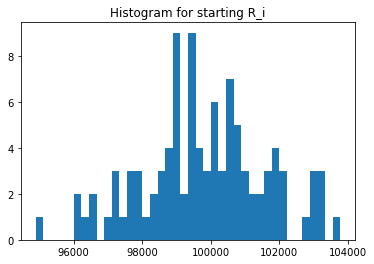

In [22]:
import matplotlib.pyplot as plt
a = starting_Ri.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_i")
plt.show()

In [23]:
experiments.UNI_Qi.unique()

array([201996.5577461 , 298767.09001246, 198768.09001246, 198767.09001246,
       297612.05563807, 197618.05563807, 298836.73777557, 198836.73777557,
       301434.41979024, 201440.41979024, 200393.64850544, 201433.41979024,
       303911.95947475, 201508.3008214 , 301508.3008214 , 203911.95947475,
       201343.31949659, 295450.06267274, 195456.06267274, 203913.95947475,
       301330.31949659, 201329.31949659, 197612.05563807, 201516.3008214 ,
       303759.64873892, 203759.64873892, 202076.43624101, 199946.02378366,
       299946.02378366, 307548.2919022 , 203770.64873892, 207551.2919022 ,
       302063.43624101, 202063.43624101, 199951.02378366, 200388.64850544,
       196680.4744237 , 197607.83541865, 300389.64850544, 297607.83541865,
       198840.73777557, 296672.4744237 , 196671.4744237 , 207547.2919022 ,
       197614.83541865, 299099.02061417, 199108.02061417, 199266.81513095,
       300271.26826131, 200270.26826131, 298693.76672789, 198693.76672789,
       192216.43227218, 1

In [24]:
experiments.UNI_Si.unique()

array([10000., 15031., 15060., 15029., 14964., 14904., 14962., 15116.,
       14966., 14907., 15001., 14818., 14948., 14990., 15084., 15022.,
       14993., 15032., 15018., 15144., 14855., 15202., 15111., 14988.,
       14903., 15054., 15048., 15070., 14909., 15179., 14965., 15011.,
       14967., 14926., 14980., 14982., 15050., 15072., 14895., 15046.,
       15030., 15081., 15150., 14939., 15123., 14918., 15053., 14979.,
       14897., 15106., 14854., 15052., 15134., 15038., 15068., 15199.,
       14973., 15047., 15064., 14946., 14848., 14923., 14844., 14963.,
       14970., 14975., 14900., 14935., 15023., 15268., 14850., 14950.,
       15013., 14991., 14999., 14845., 15003., 14866., 15056., 15102.,
       14968., 15148., 15175., 15121., 15091., 15143., 14919., 15039.,
       15007., 15195.])

In [25]:
experiments.UNI_Qj.unique()

array([194418.4474541 , 201904.14952918, 200398.96300874, 197996.40227455,
       196600.92827866, 198222.06850876, 203454.75174422, 197747.81243404,
       195291.57119252, 196077.231658  , 197163.19100989, 194032.06930399,
       195796.0226227 , 200274.41256359, 207603.31638219, 193893.14310625,
       196395.68708622, 203172.92928252, 205690.05487723, 195079.09308881,
       211180.94193703, 194471.01880576, 200858.12505511, 203188.96817795,
       204688.0190082 , 208955.66475475, 202518.13993079, 202643.26662457,
       202361.02101812, 196139.41003538, 195113.38003965, 201175.61438211,
       201903.17850891, 201901.7459278 , 201191.35420859, 202098.49027696,
       193672.9508536 , 201004.38478618, 200911.82102208, 201939.03604997,
       195137.12985027, 205296.97880476, 202876.2016126 , 199108.23227827,
       203151.55171495, 194787.8221507 , 200739.82658988, 201042.13295417,
       200931.08249079, 195762.39587696, 196641.67923206, 206296.19078279,
       196356.27137964, 1

In [26]:
experiments.UNI_Rj.unique()

array([ 97209.22372705, 100952.07476459, 100199.48150437,  98998.20113728,
        98300.46413933,  99111.03425438, 101727.37587211,  98873.90621702,
        97645.78559626,  98038.615829  ,  98581.59550495,  97016.03465199,
        97898.01131135, 100137.2062818 , 103801.6581911 ,  96946.57155313,
        98197.84354311, 101586.46464126, 102845.02743862,  97539.54654441,
       105590.47096851,  97235.50940288, 100429.06252756, 101594.48408897,
       102344.0095041 , 104477.83237737, 101259.0699654 , 101321.63331229,
       101180.51050906,  98069.70501769,  97556.69001982, 100587.80719106,
       100951.58925445, 100950.8729639 , 100595.67710429, 101049.24513848,
        96836.4754268 , 100502.19239309, 100455.91051104, 100969.51802499,
        97568.56492513, 102648.48940238, 101438.1008063 ,  99554.11613914,
       101575.77585748,  97393.91107535, 100369.91329494, 100521.06647709,
       100465.5412454 ,  97881.19793848,  98320.83961603, 103148.09539139,
        98178.13568982,  

In [27]:
starting_Rj = experiments[experiments.timestep == 0]
starting_Rj = starting_Rj['UNI_Rj']
starting_Rj.reset_index(drop=True)
starting_Rj.unique()

array([ 97209.22372705,  98998.20113728, 100952.07476459,  98300.46413933,
       101727.37587211,  98873.90621702,  97645.78559626, 100199.48150437,
        98581.59550495,  97898.01131135,  99111.03425438,  96946.57155313,
       103801.6581911 , 100137.2062818 , 102845.02743862,  97539.54654441,
        98197.84354311, 101586.46464126,  97235.50940288, 101594.48408897,
       102344.0095041 , 104477.83237737, 101321.63331229,  98038.615829  ,
       101259.0699654 , 101180.51050906,  98069.70501769,  97016.03465199,
       100429.06252756, 100595.67710429, 100950.8729639 ,  96836.4754268 ,
       100502.19239309, 100455.91051104, 102648.48940238, 101575.77585748,
       101438.1008063 ,  97393.91107535,  97556.69001982,  99554.11613914,
       100369.91329494, 101049.24513848, 100521.06647709, 100465.5412454 ,
       103148.09539139,  98320.83961603,  98445.85349378,  98178.13568982,
       100587.80719106,  97881.19793848, 100969.51802499, 100695.23274396,
       101640.17738244,  

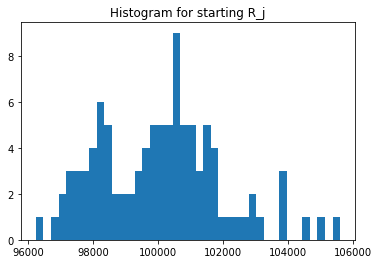

In [28]:
a = starting_Rj.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_j")
plt.show()

In [29]:
experiments.UNI_Sj.unique()

array([10000], dtype=int64)

In [30]:
experiments.UNI_ij.unique()

array([100998.27887305, 102314.54500623, 101314.54500623, ...,
        98705.2078689 , 106046.70193842,  95752.97132416])

In [31]:
experiments.UNI_ji.unique()

array([ 97209.22372705,  98098.07476459,  99066.07476459, ...,
       102486.19239309,  91618.67710429, 101643.21245131])

In [32]:
experiments.UNI_Sij.unique()

array([9.81796429e+09, 1.00329751e+10, 9.90031276e+09, 9.84223968e+09,
       9.90049933e+09, 9.93036310e+09, 1.03717143e+10, 9.96195642e+09,
       9.82947978e+09, 9.58077778e+09, 1.00434756e+10, 9.80169667e+09,
       9.78715905e+09, 1.03916030e+10, 1.02074126e+10, 9.57870108e+09,
       9.77554724e+09, 1.01209993e+10, 1.02984006e+10, 9.69024995e+09,
       1.01475839e+10, 9.45041598e+09, 9.90289246e+09, 1.04616291e+10,
       1.00104565e+10, 1.04709845e+10, 1.00815215e+10, 1.03317720e+10,
       1.00084976e+10, 9.71344377e+09, 9.66621386e+09, 1.02683247e+10,
       9.88386758e+09, 1.02815920e+10, 9.71107430e+09, 1.01746014e+10,
       9.66127772e+09, 1.01155666e+10, 1.01950437e+10, 9.99284372e+09,
       9.79534330e+09, 1.03000872e+10, 1.00425347e+10, 9.79574423e+09,
       1.00124022e+10, 9.94747681e+09, 9.97673547e+09, 9.75924212e+09,
       1.01702013e+10, 1.00817243e+10, 9.72847125e+09, 1.00660286e+10,
       9.98064483e+09, 9.88579074e+09, 9.99227694e+09, 9.89760437e+09,
      

In [33]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

# Agent sequences

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


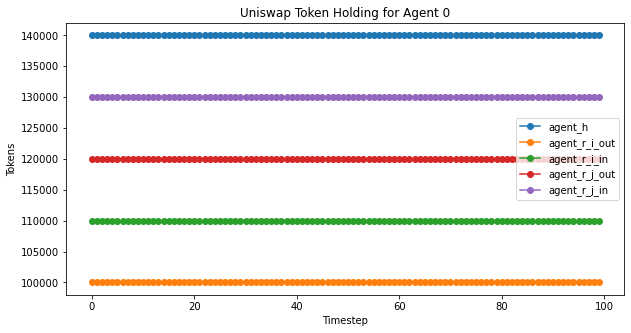

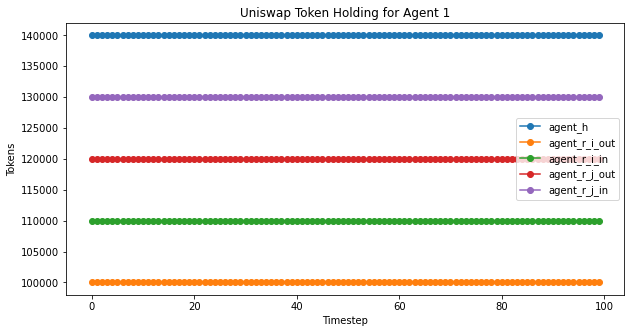

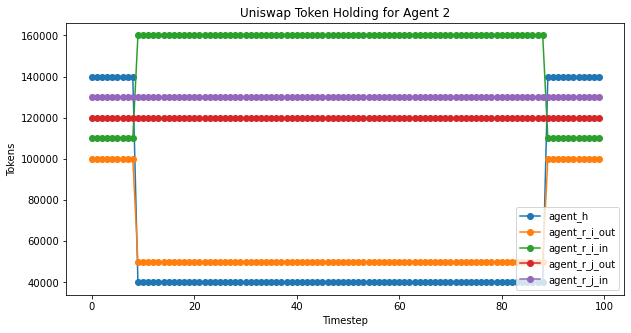

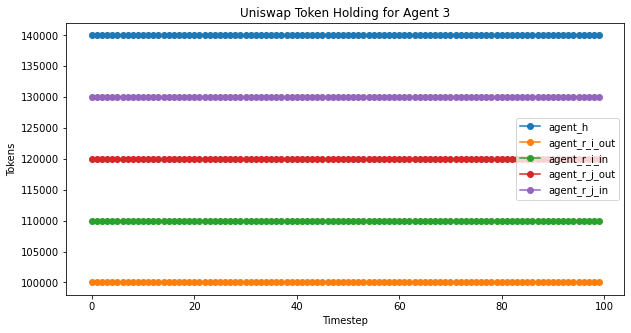

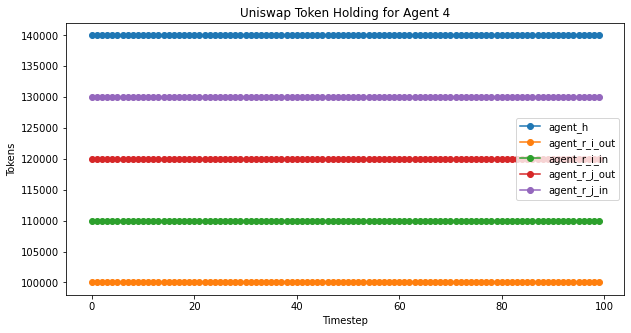

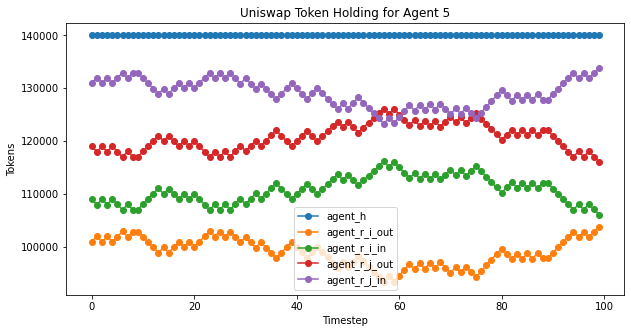

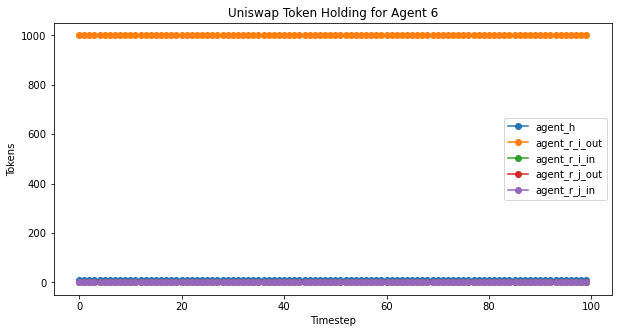

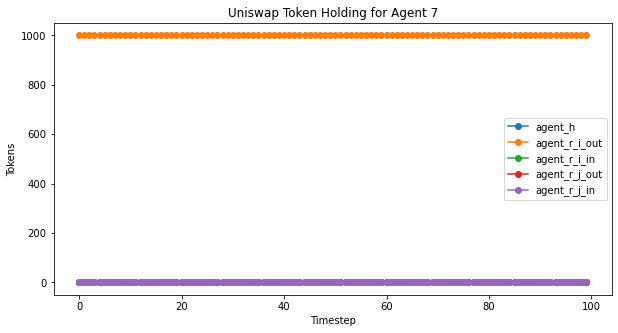

In [34]:
agent_plot(experiment2,'Uniswap Token Holding for Agent ', 100) #,4,'j')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


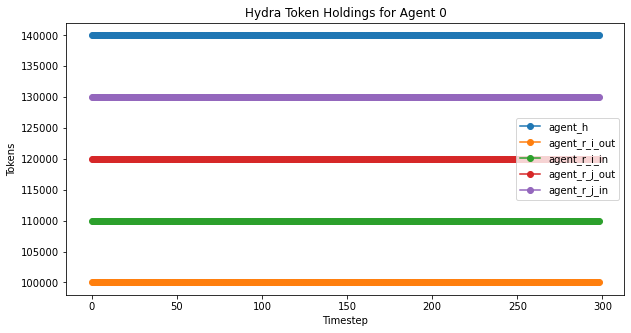

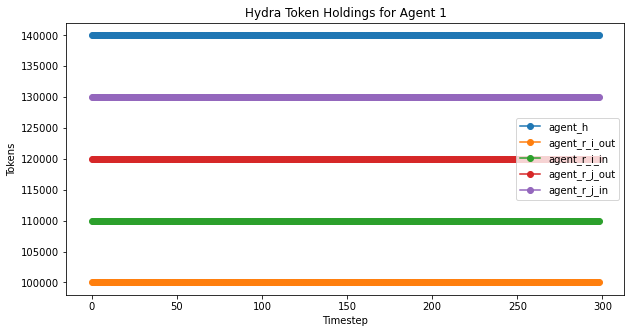

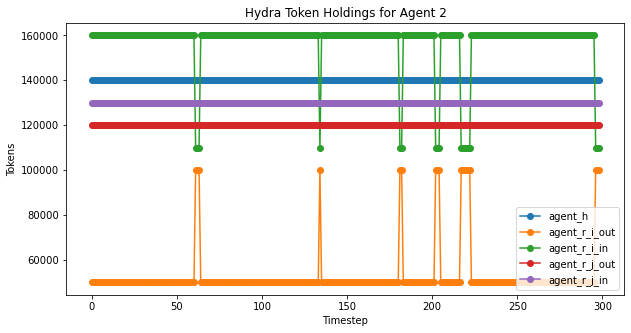

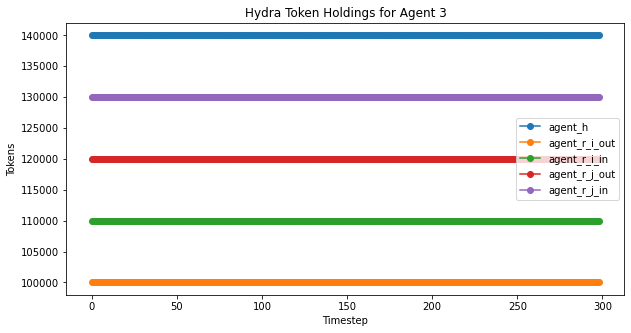

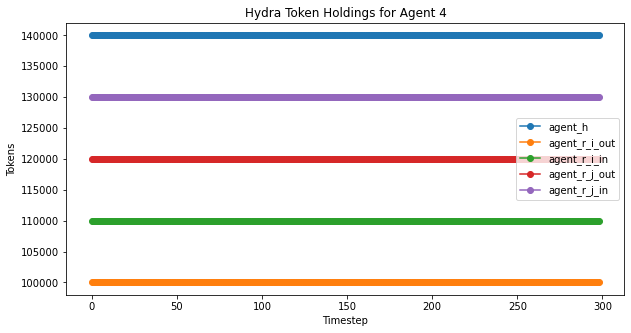

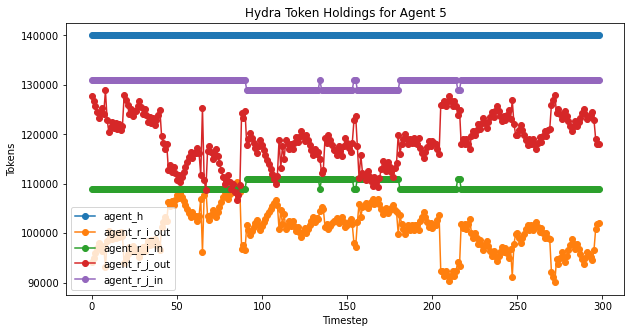

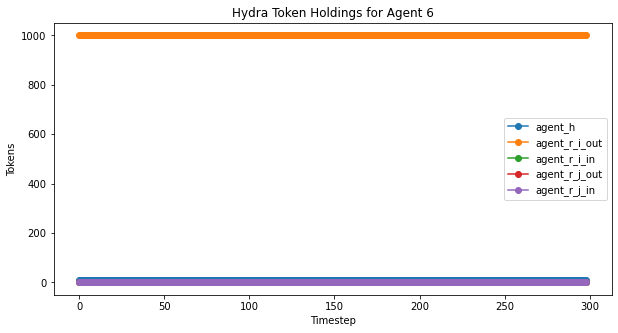

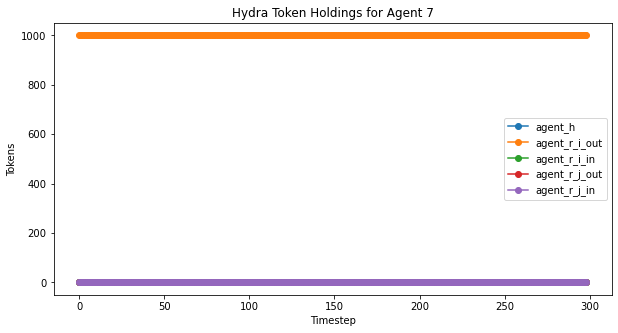

In [35]:
hydra_agent_plot(experiments,'Hydra Token Holdings for Agent ', 299)

# Liquidity dynamics

Movement of the Uniswap variables

- 'UNI_Ri', 'UNI_Qi', 'UNI_Si'
- 'UNI_Rj', 'UNI_Qj', 'UNI_Sj'
- 'UNI_ij', 'UNI_ji', 'UNI_Sij'

## Uniswap -- Ri-Q instance

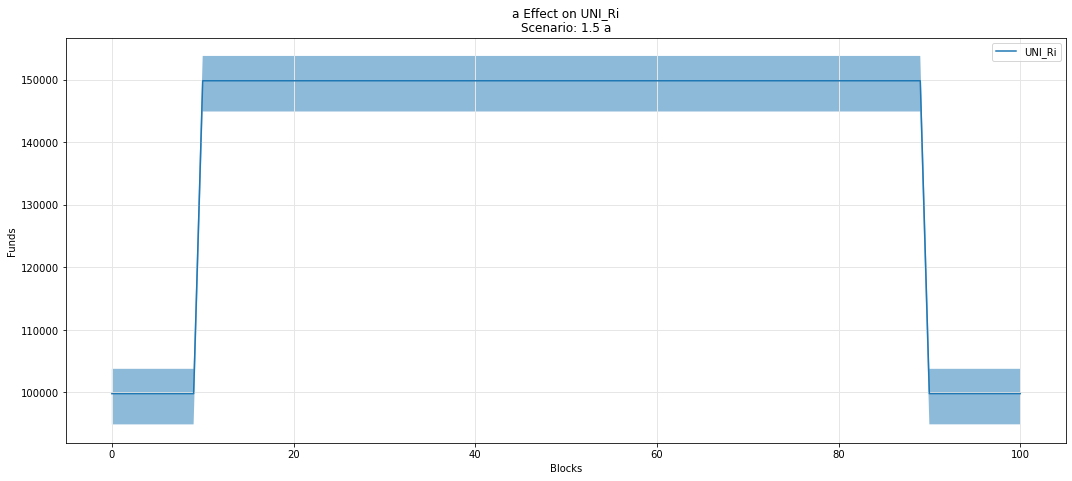

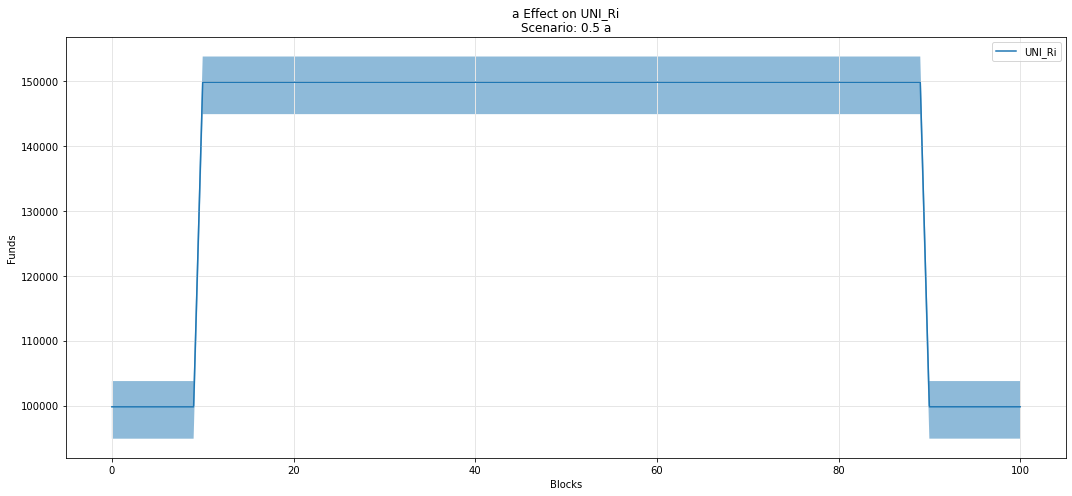

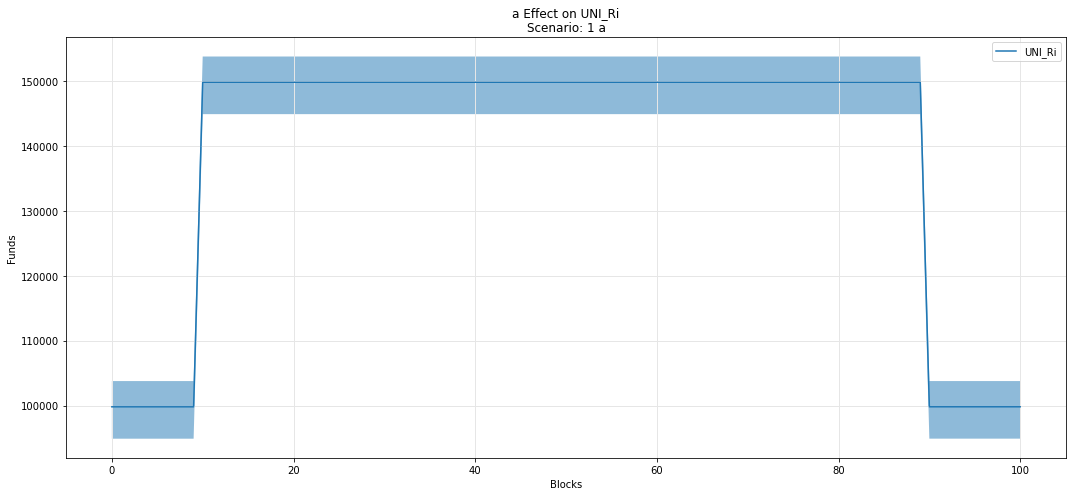

In [36]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Ri')

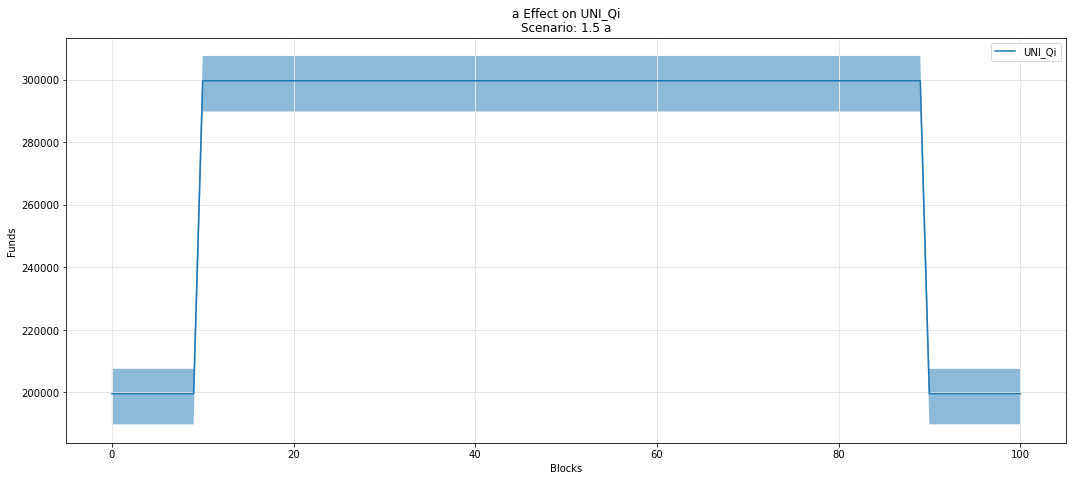

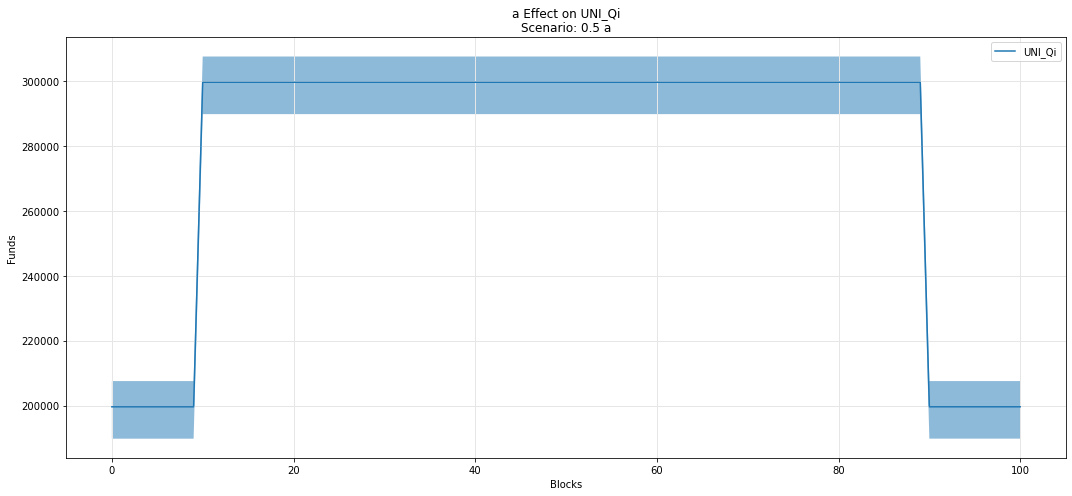

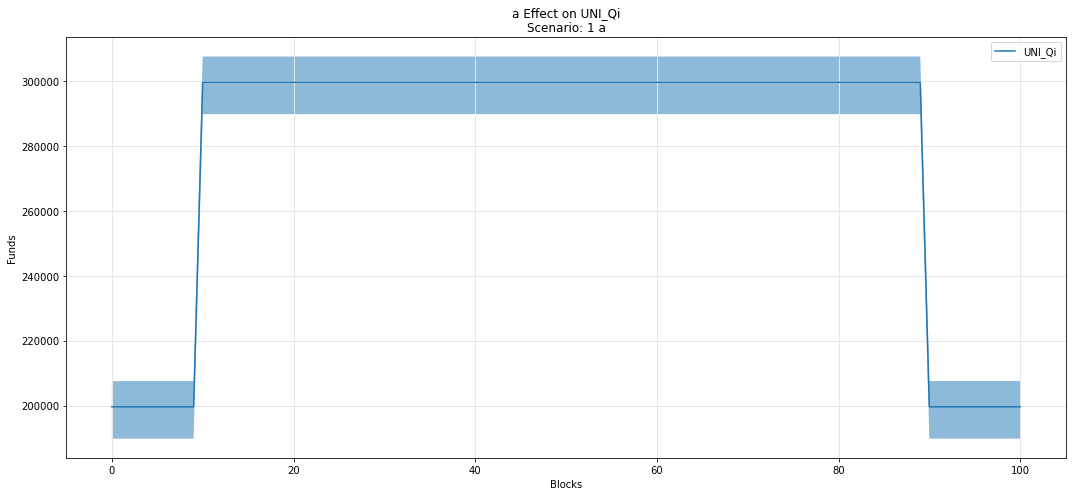

In [37]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qi')

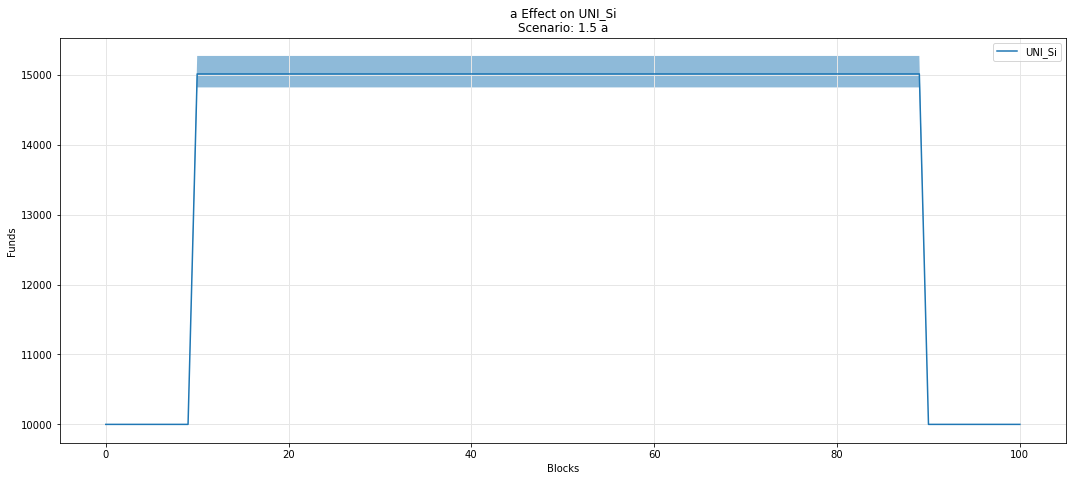

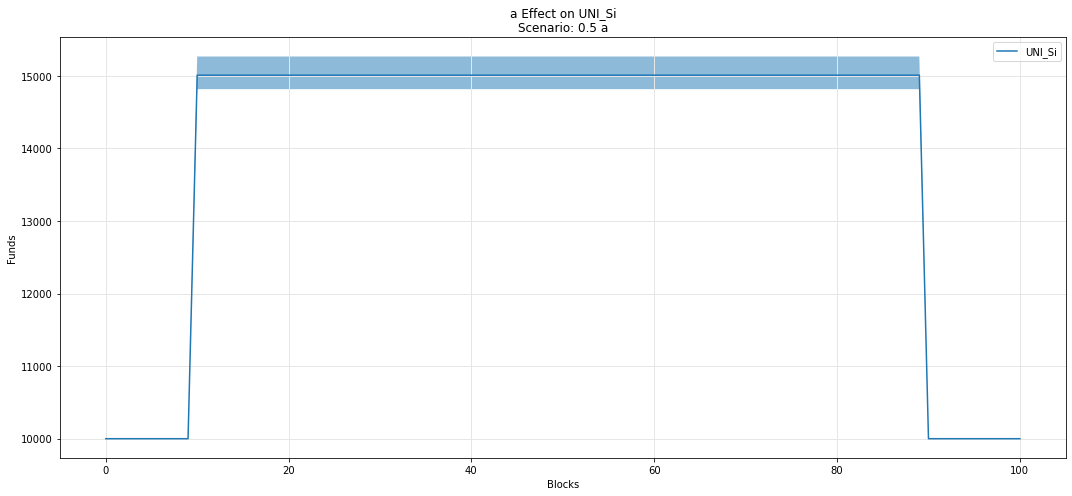

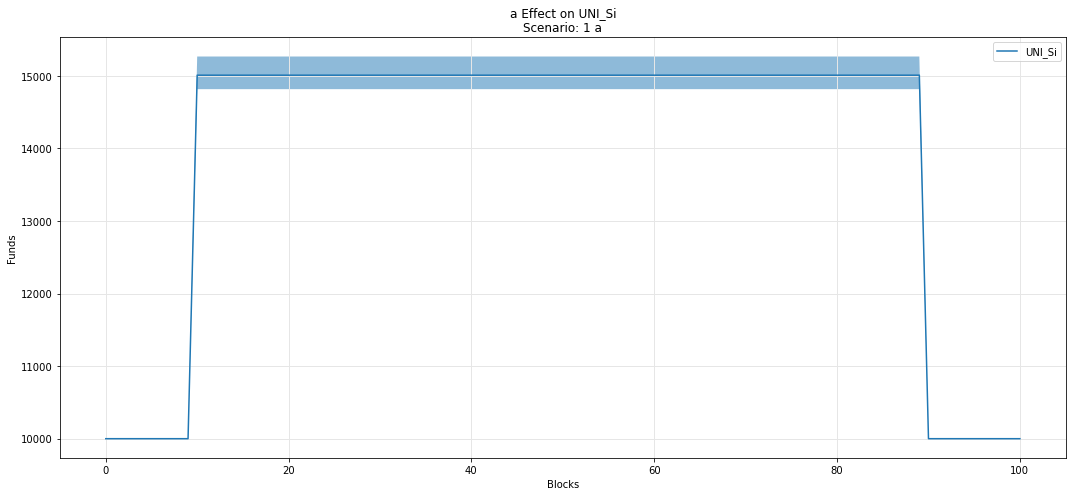

In [38]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Si')

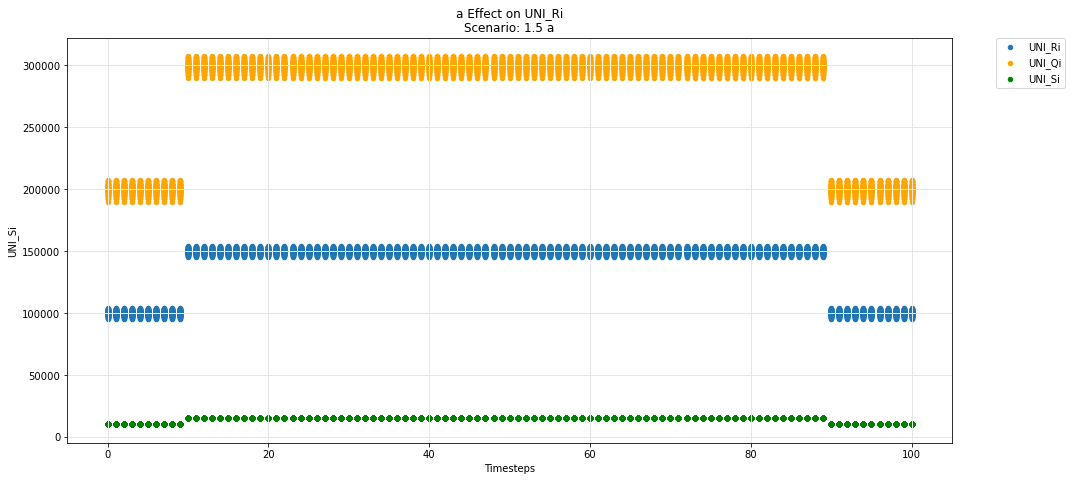

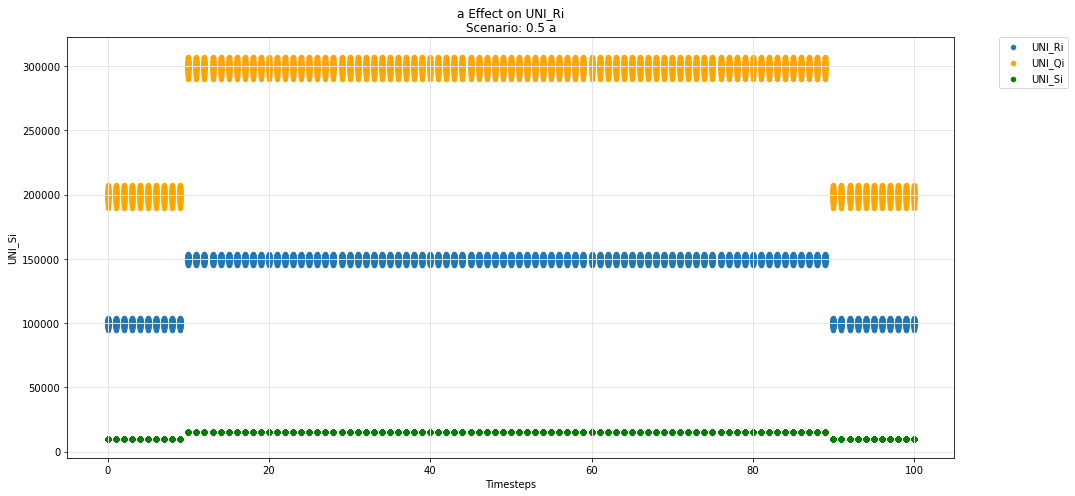

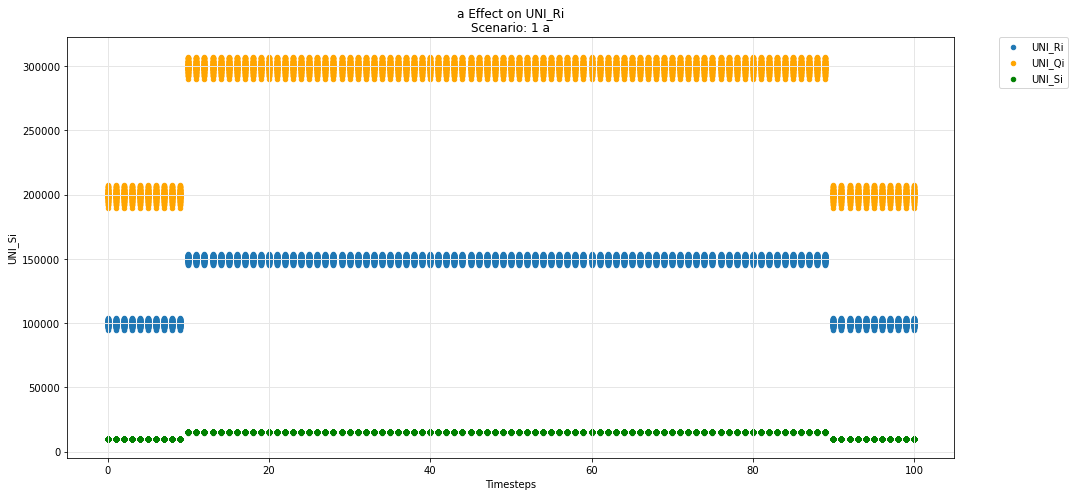

In [39]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Ri', 'UNI_Qi', 'UNI_Si')

## Uniswap -- Rj-Q instance

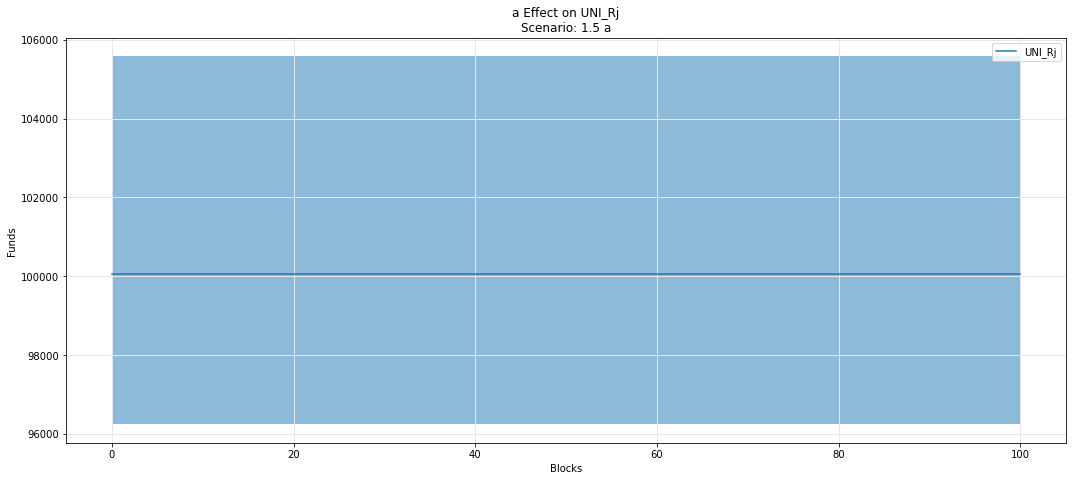

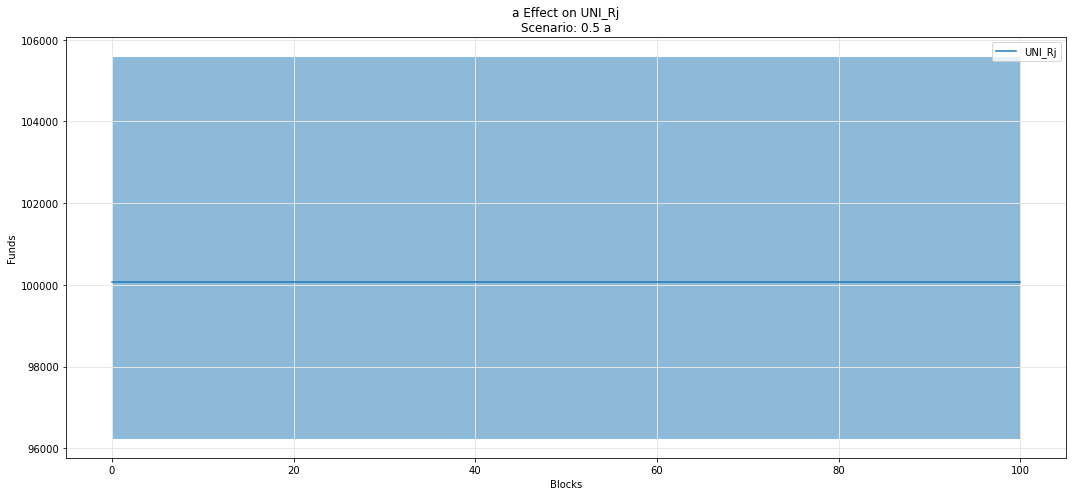

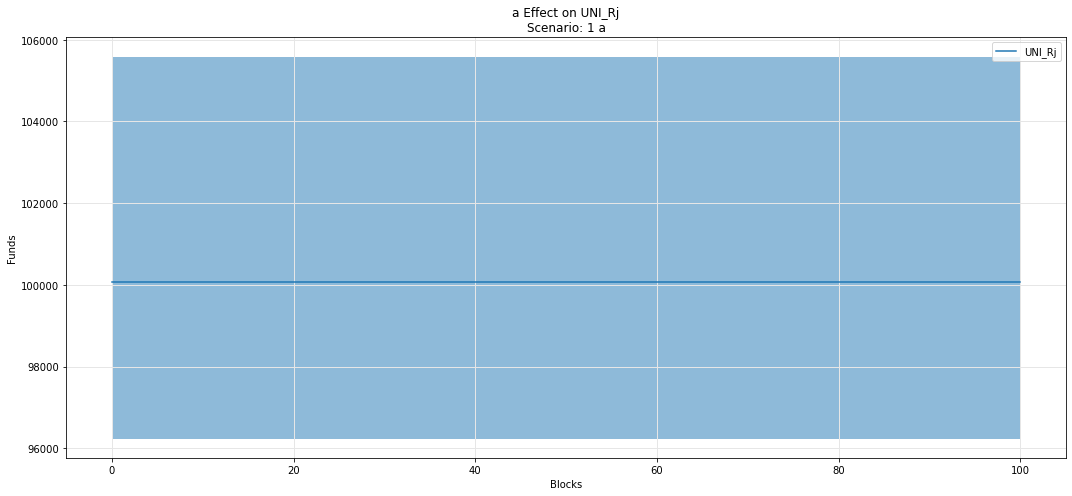

In [40]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Rj')

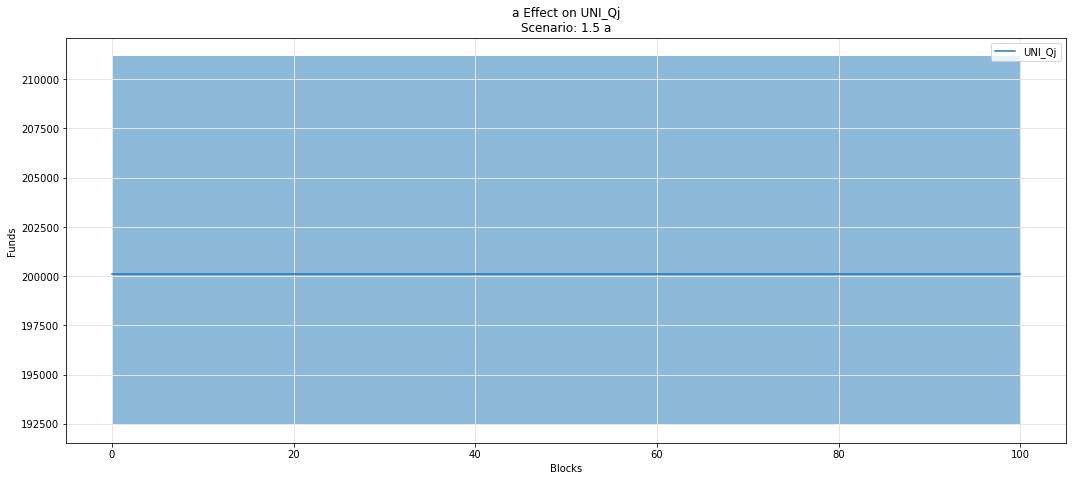

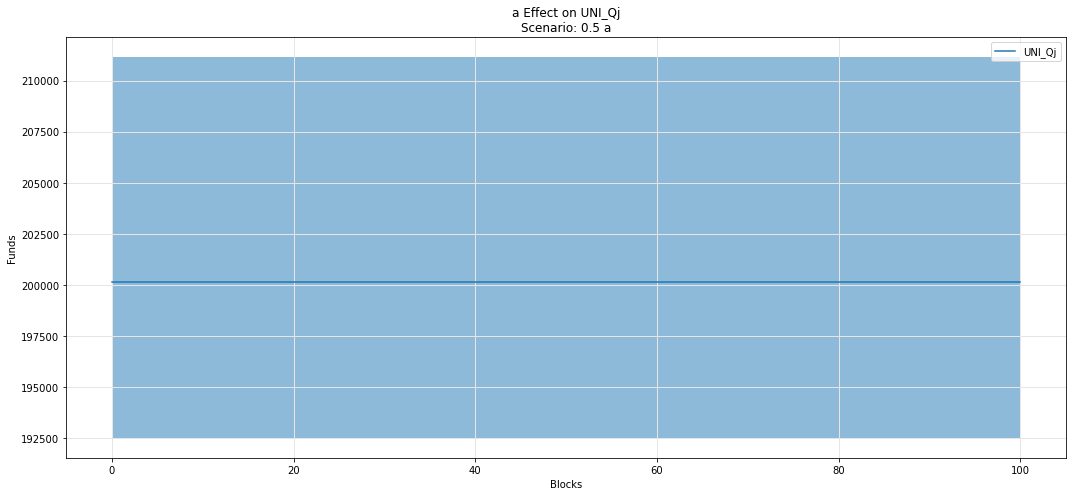

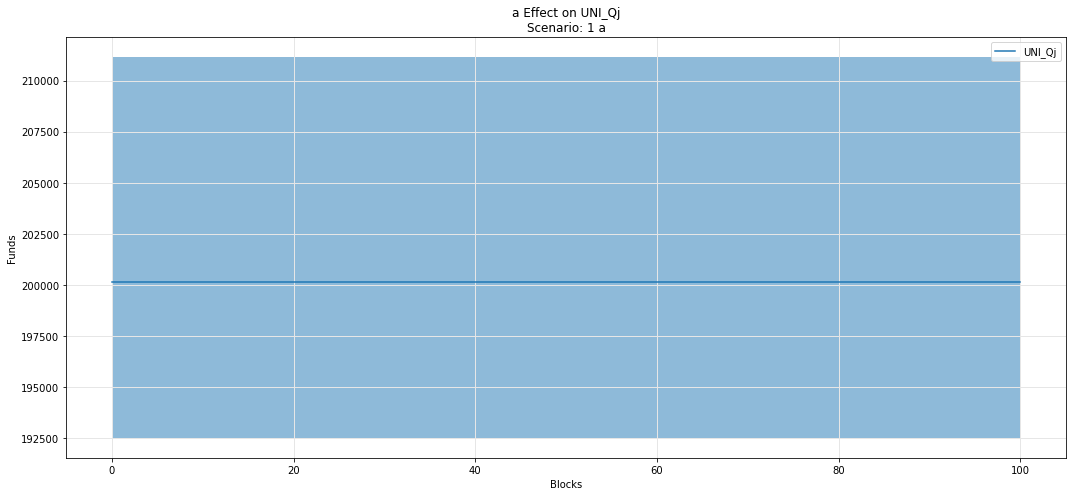

In [41]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qj')

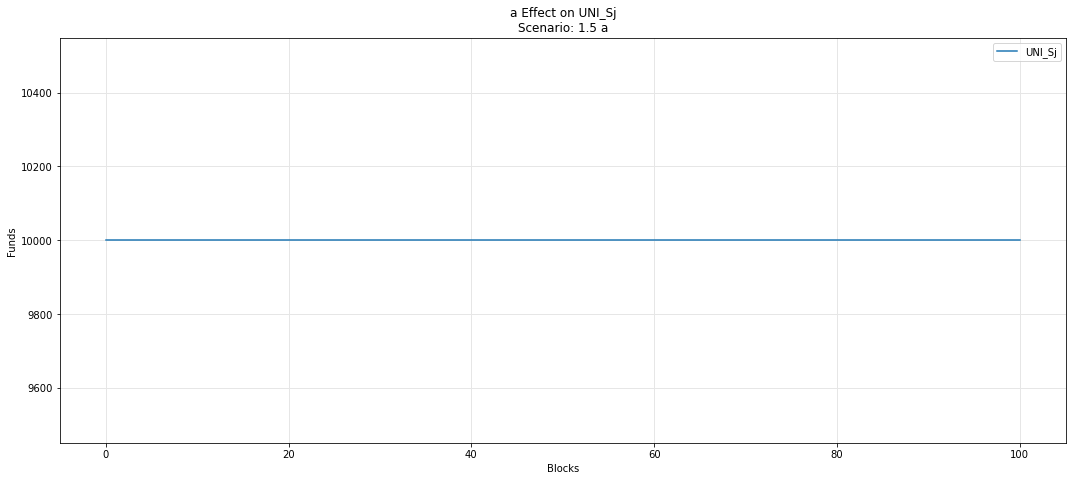

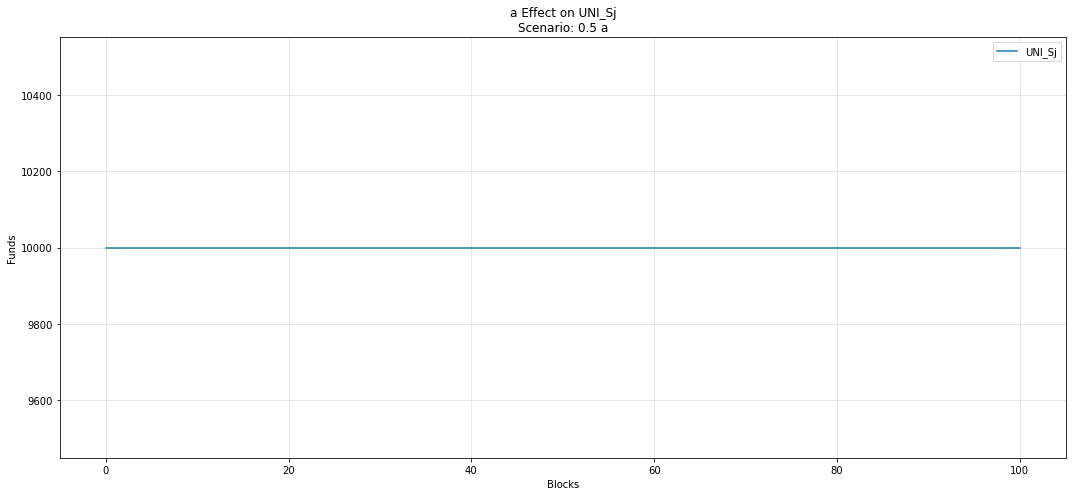

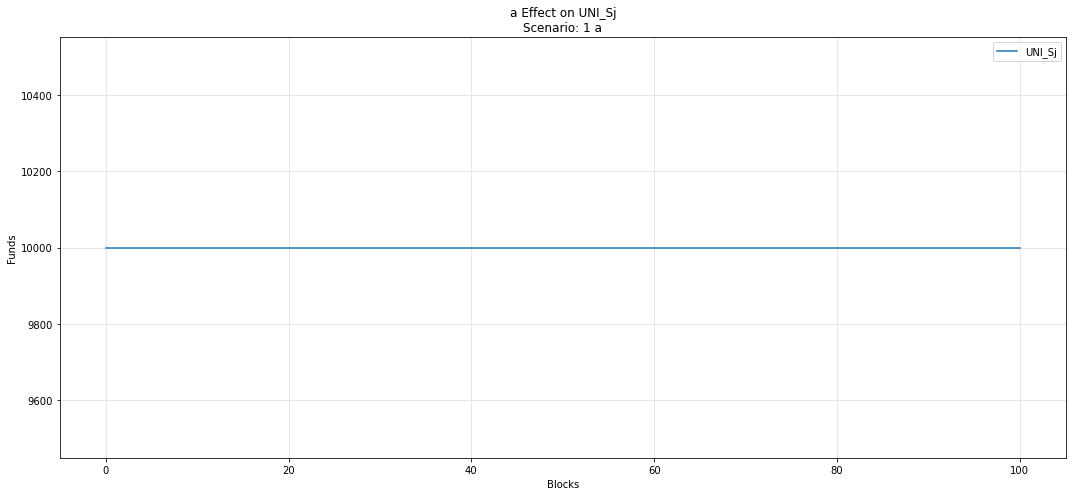

In [42]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sj')

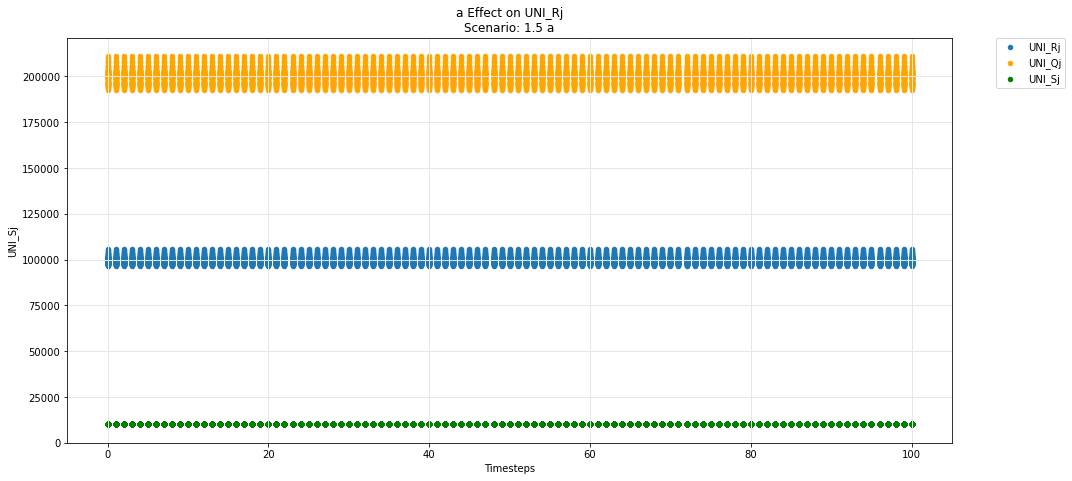

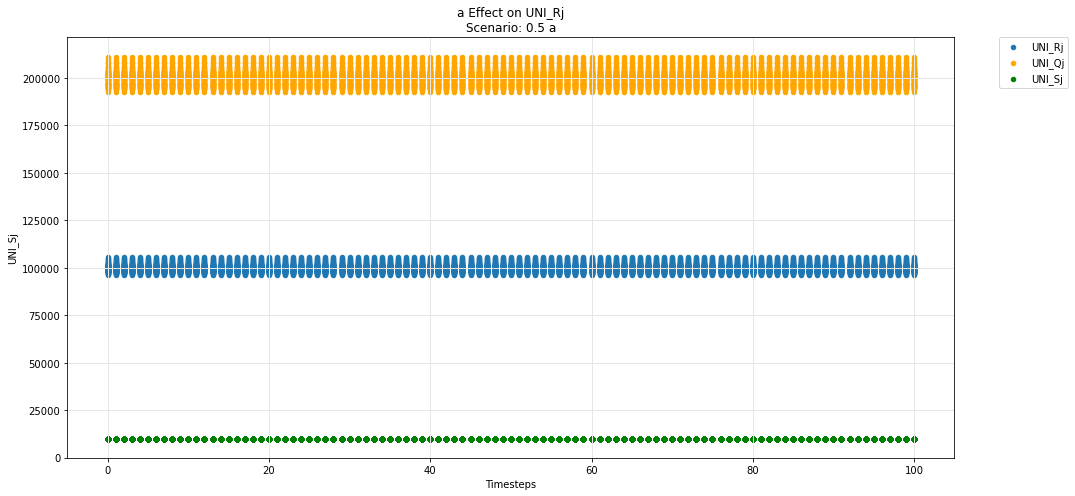

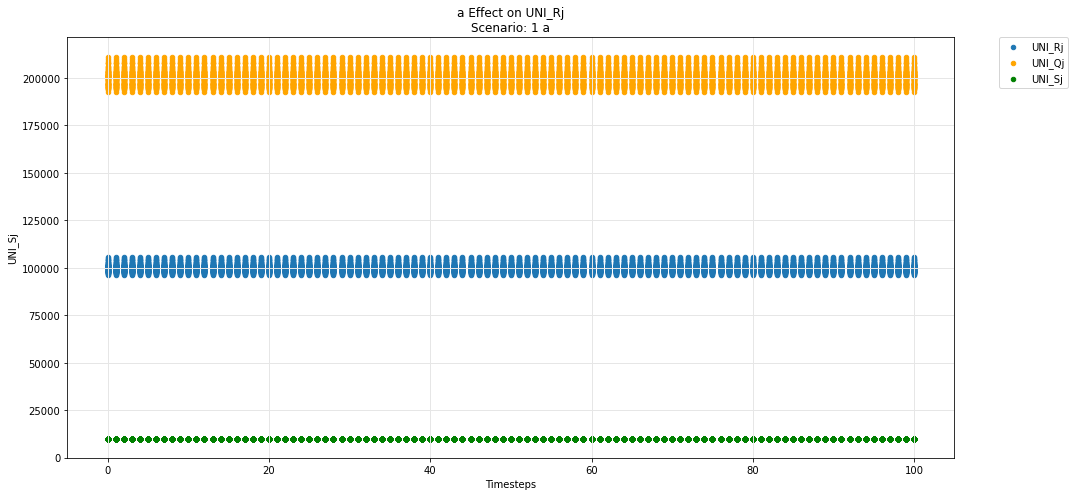

In [43]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Rj', 'UNI_Qj', 'UNI_Sj')

## Uniswap -- ij-Q instance

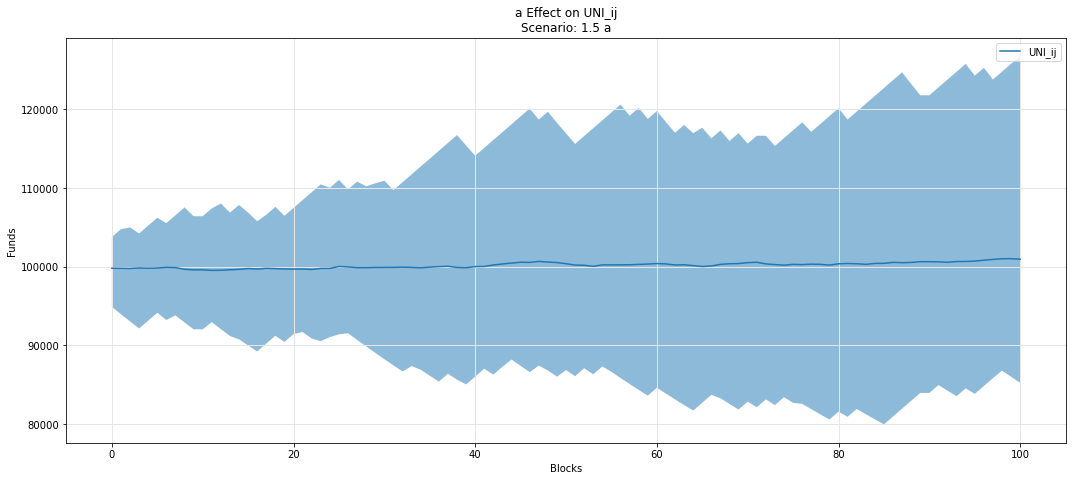

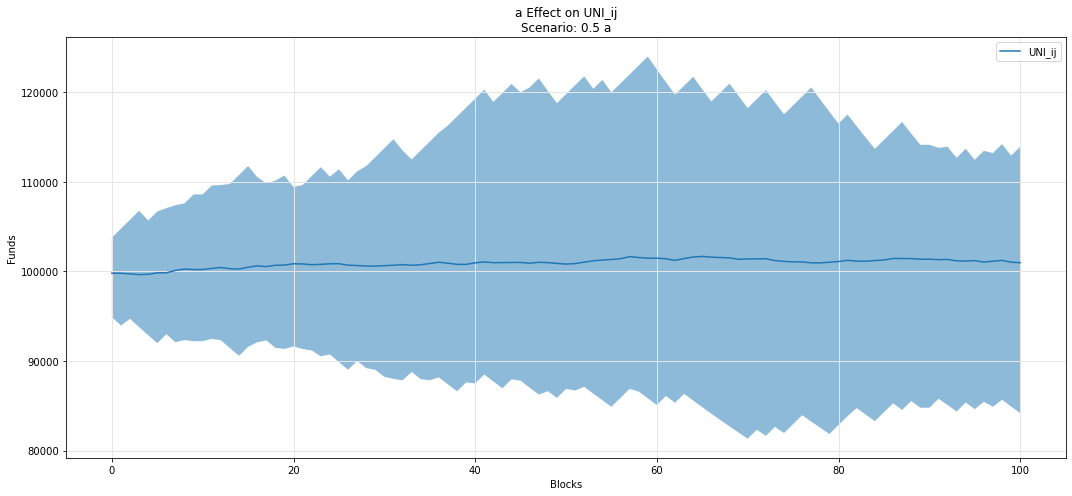

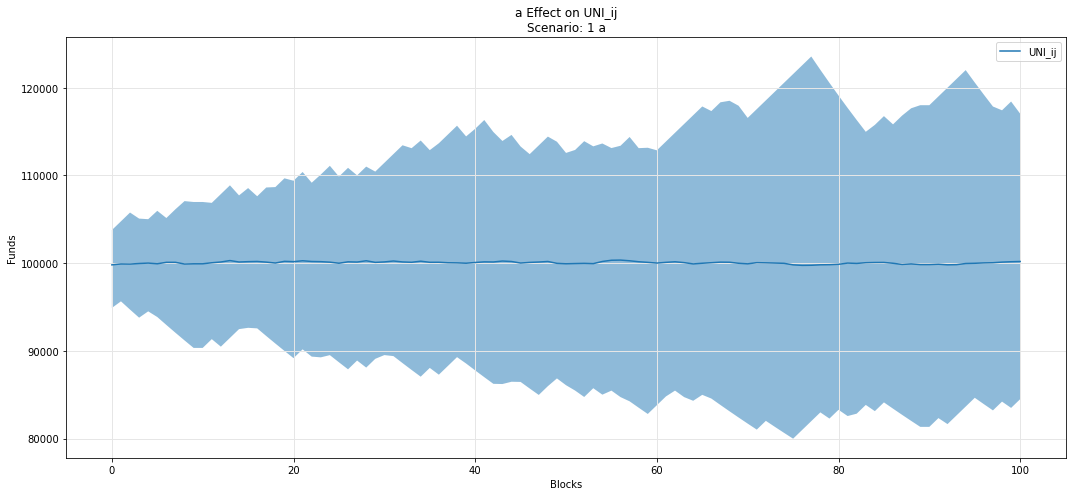

In [44]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ij')

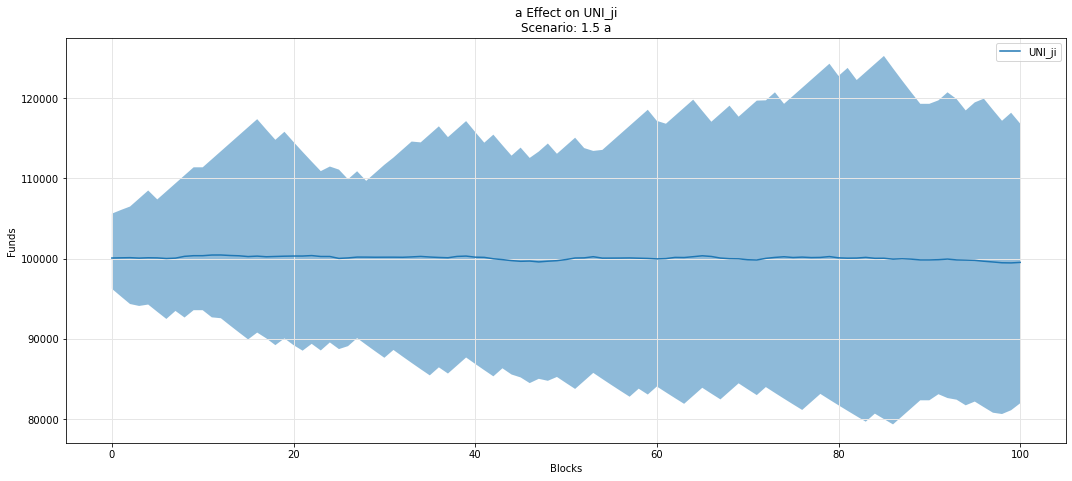

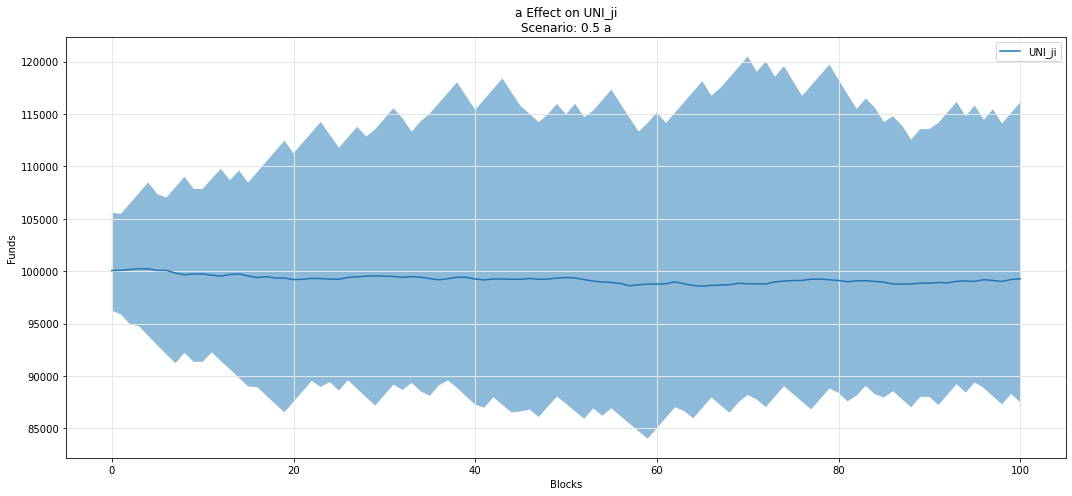

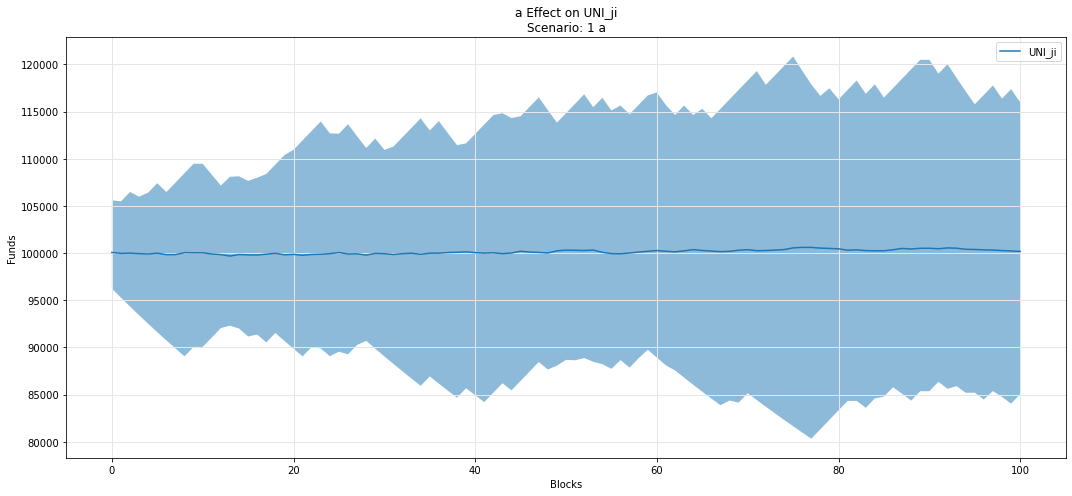

In [45]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ji')

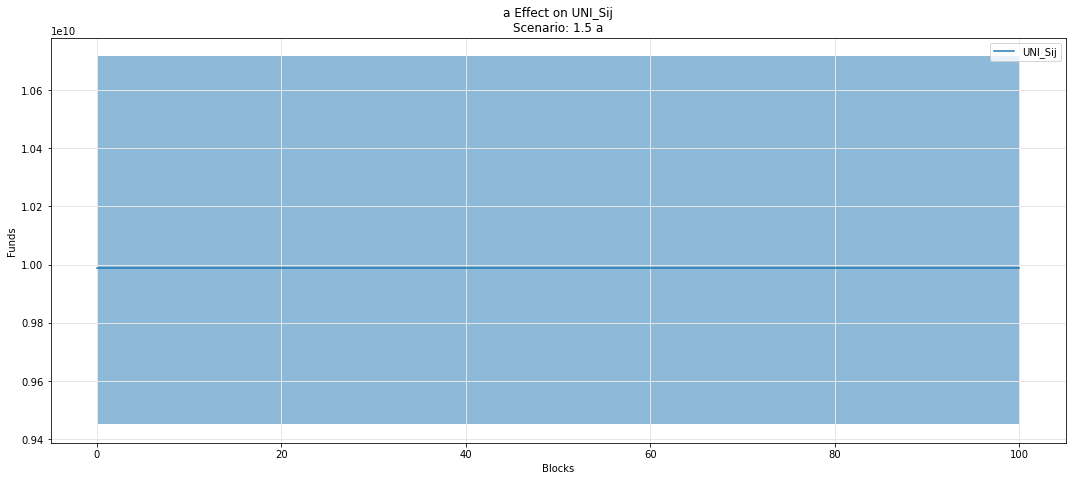

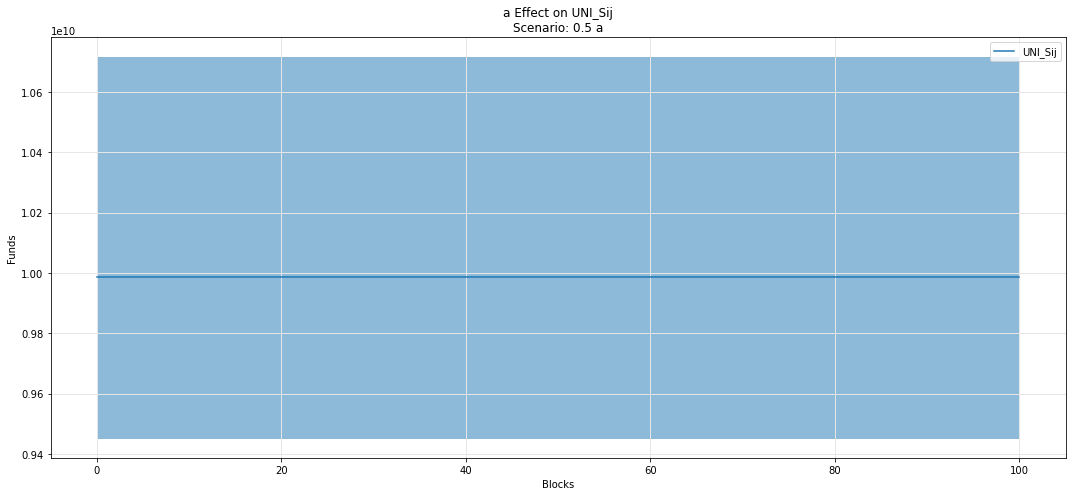

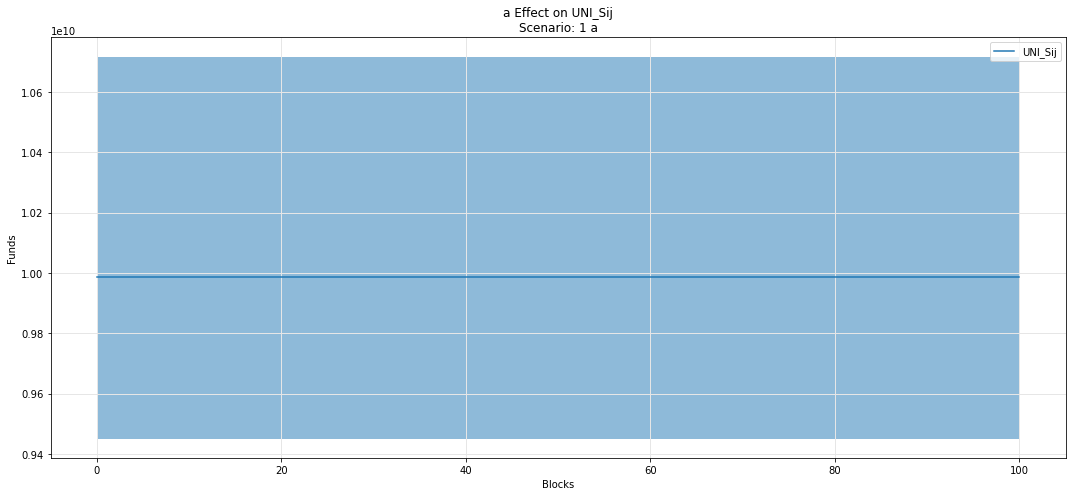

In [46]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sij')

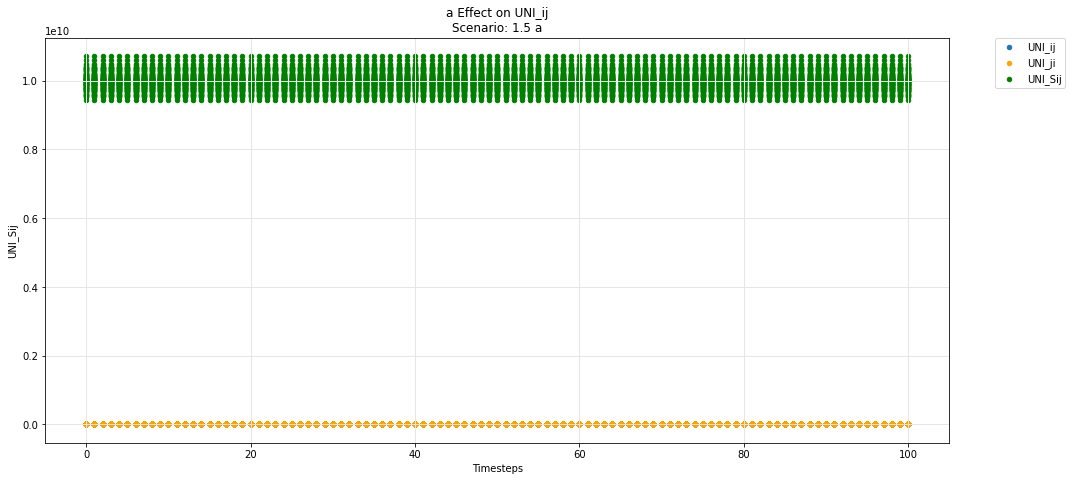

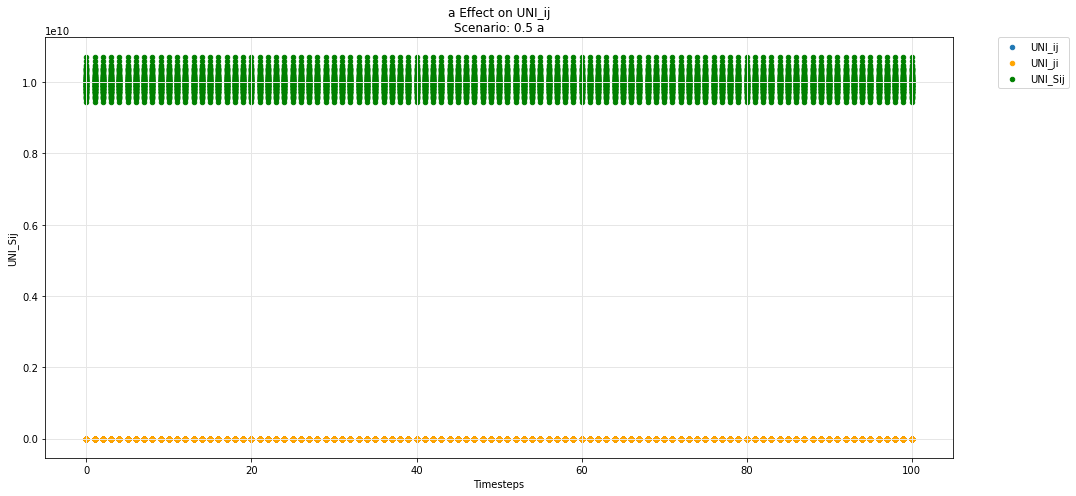

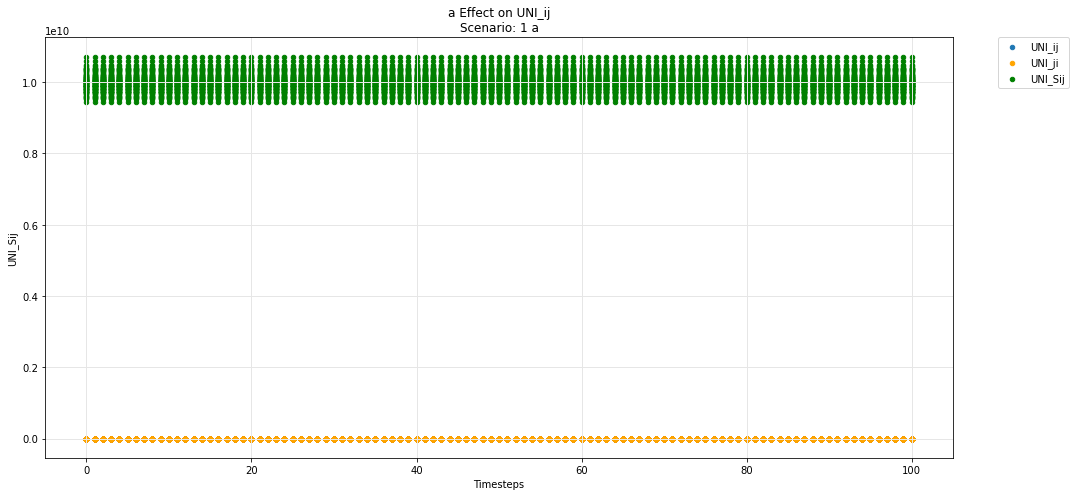

In [47]:
param_test_plot(experiments, config_ids, 'a', 'UNI_ij', 'UNI_ji', 'UNI_Sij')

## Hydra -- base

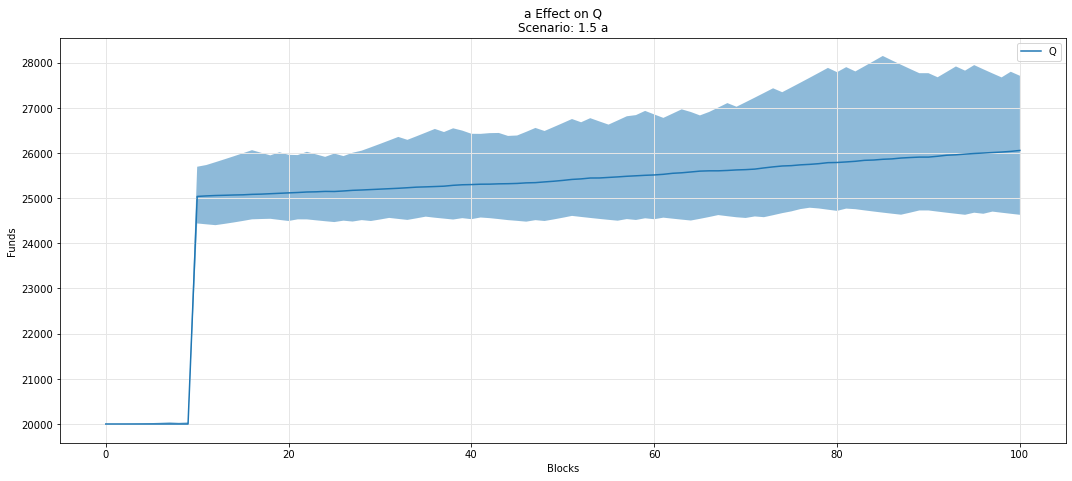

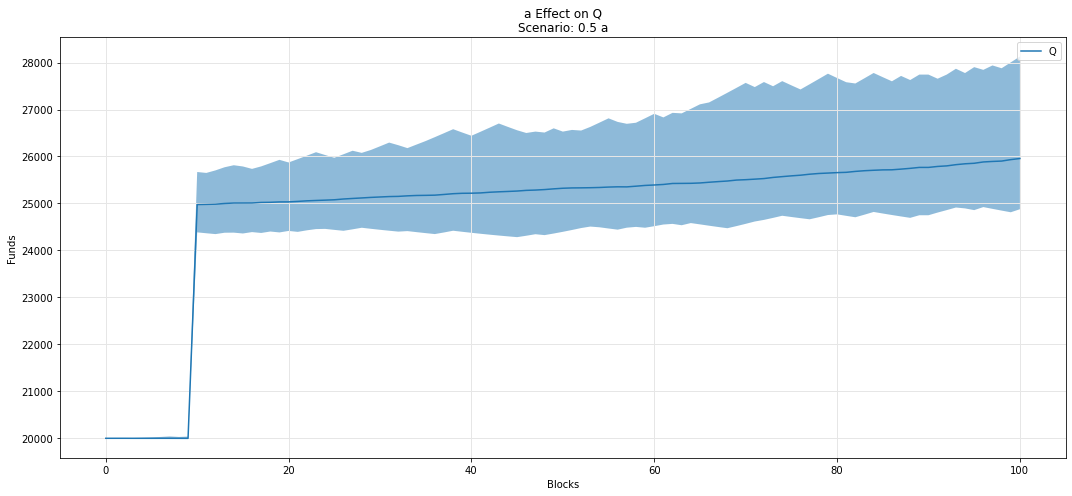

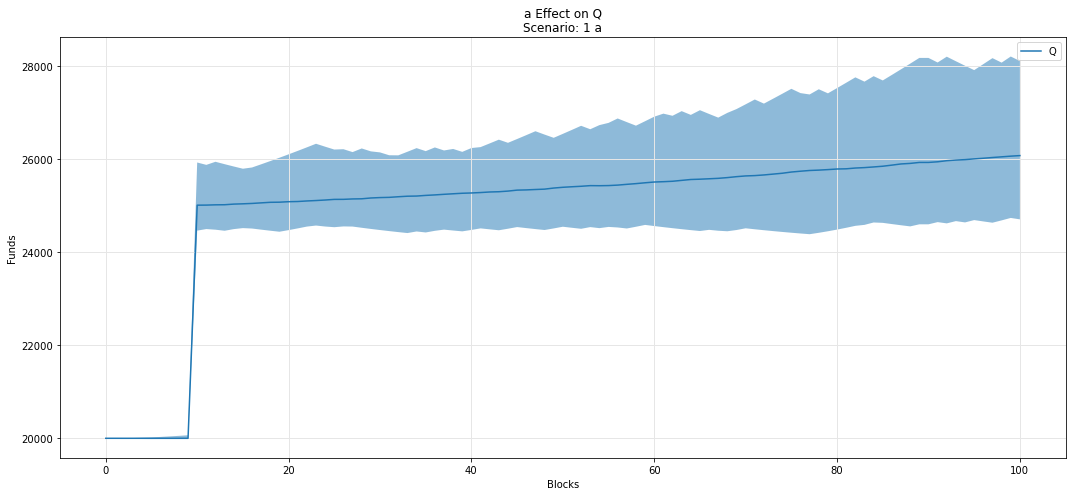

In [48]:
param_fan_plot3(experiments, config_ids, 'a','Q')

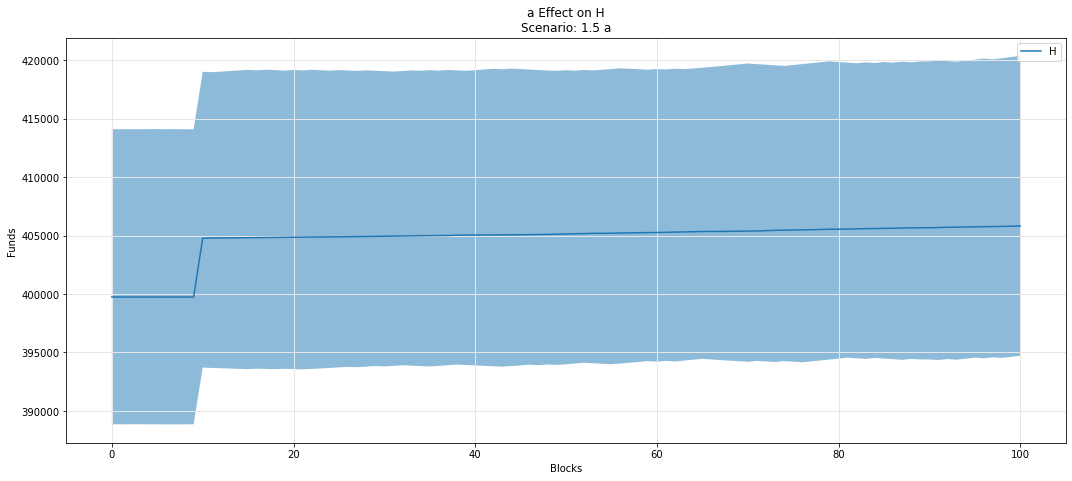

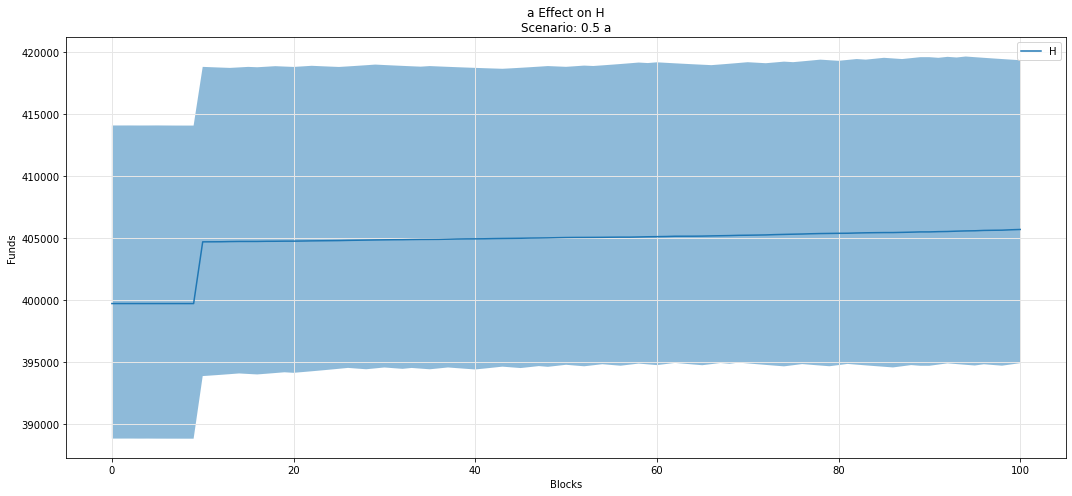

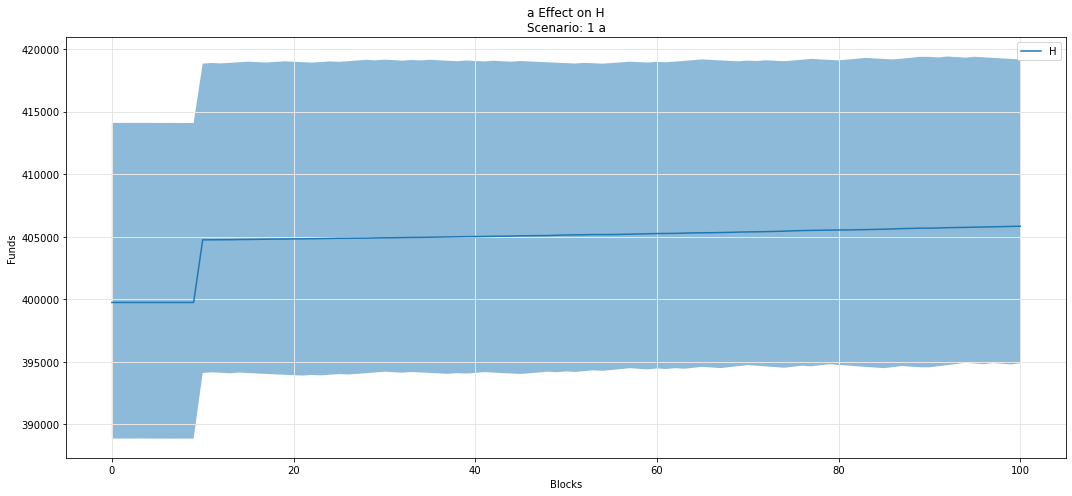

In [49]:
param_fan_plot3(experiments, config_ids, 'a','H')

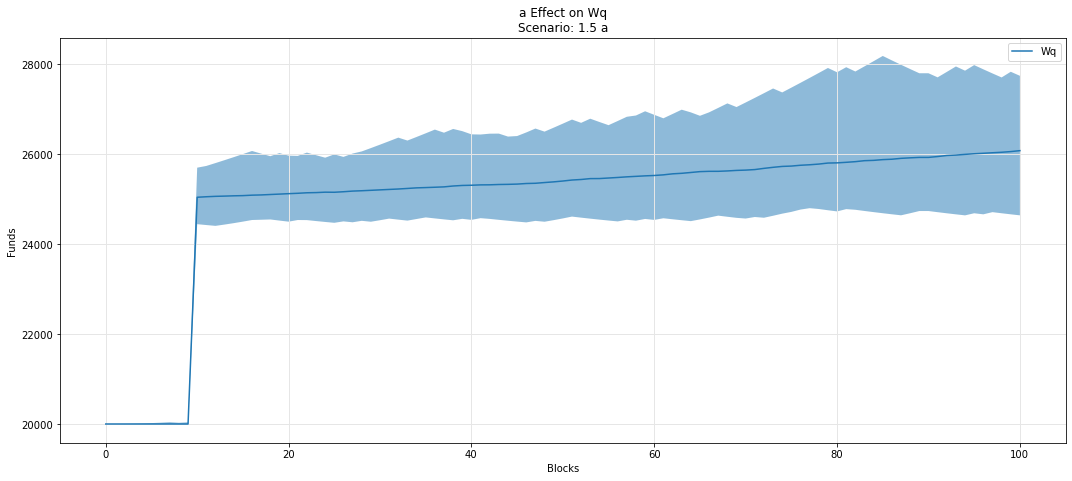

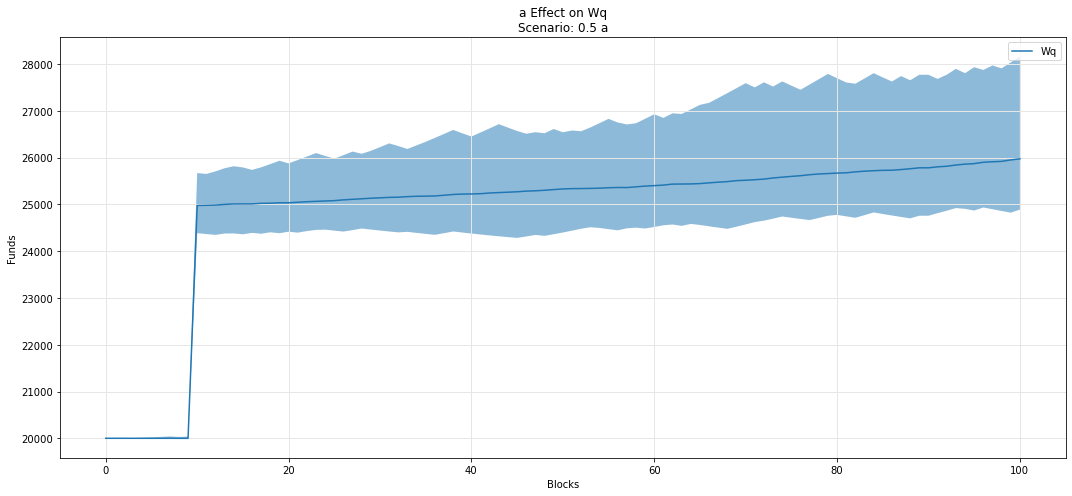

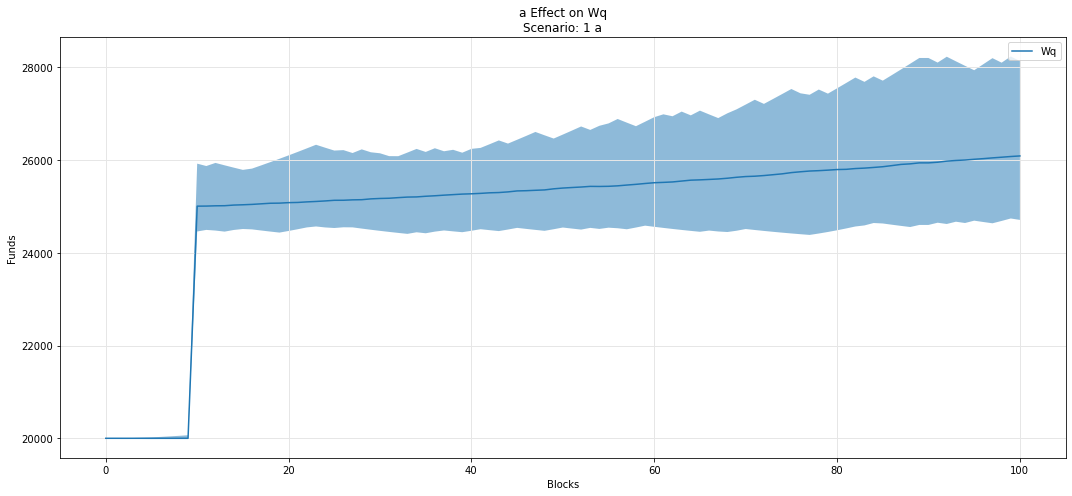

In [50]:
param_fan_plot3(experiments, config_ids, 'a','Wq')

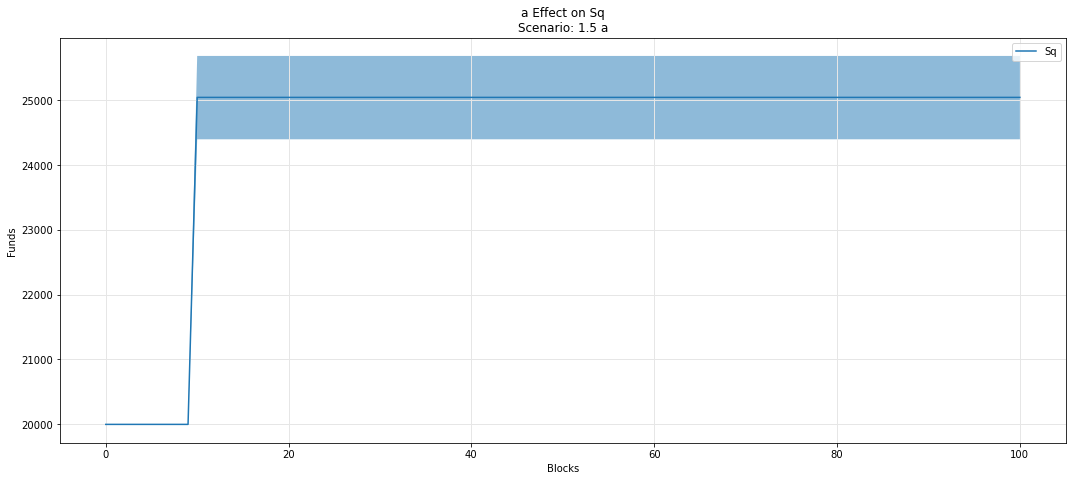

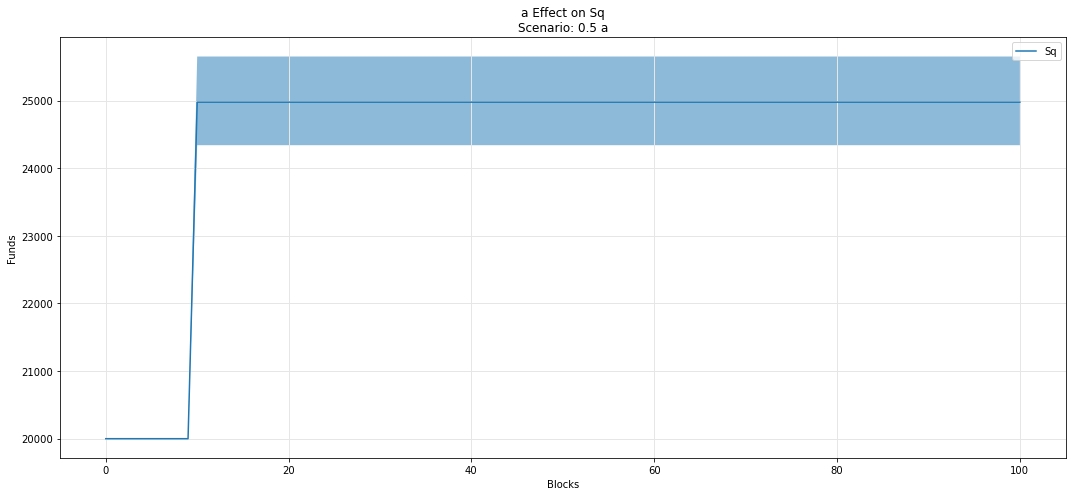

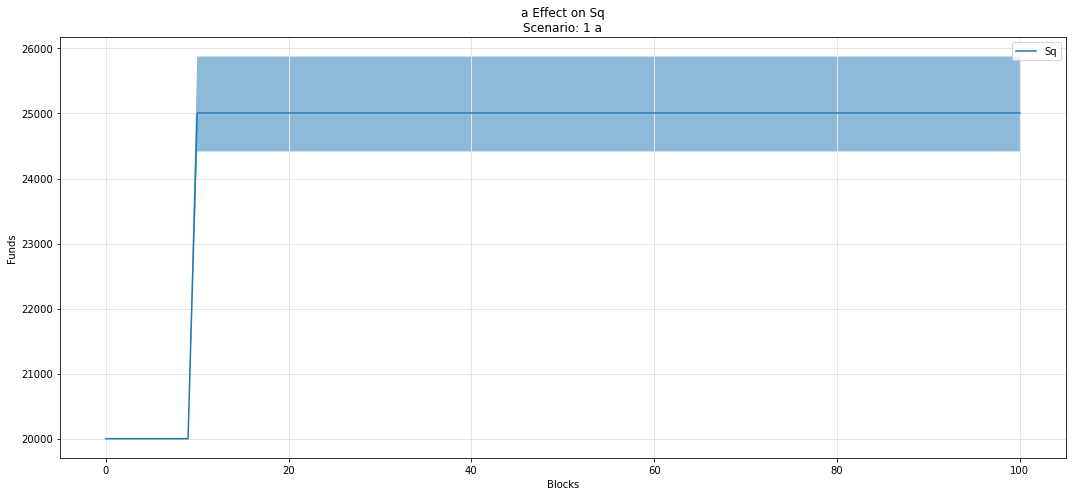

In [51]:
param_fan_plot3(experiments, config_ids, 'a','Sq')

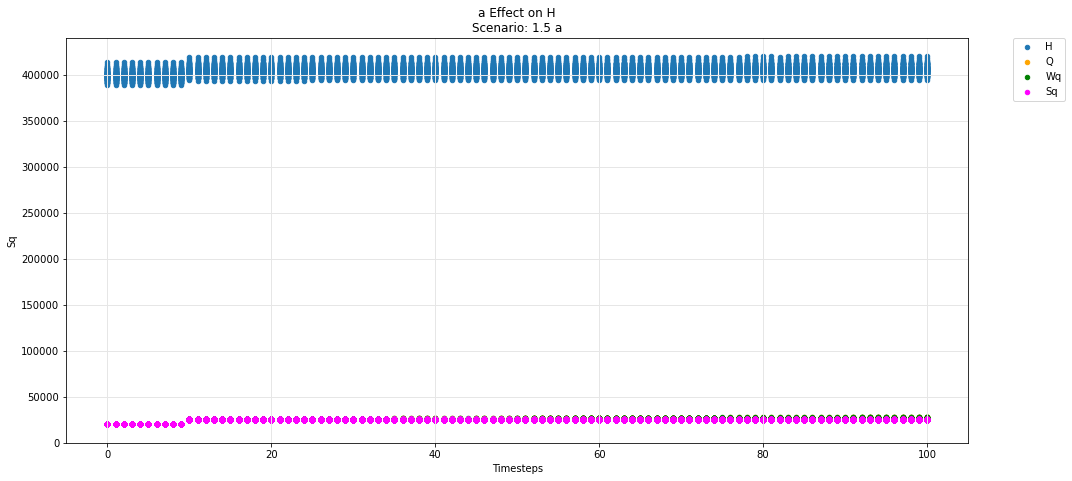

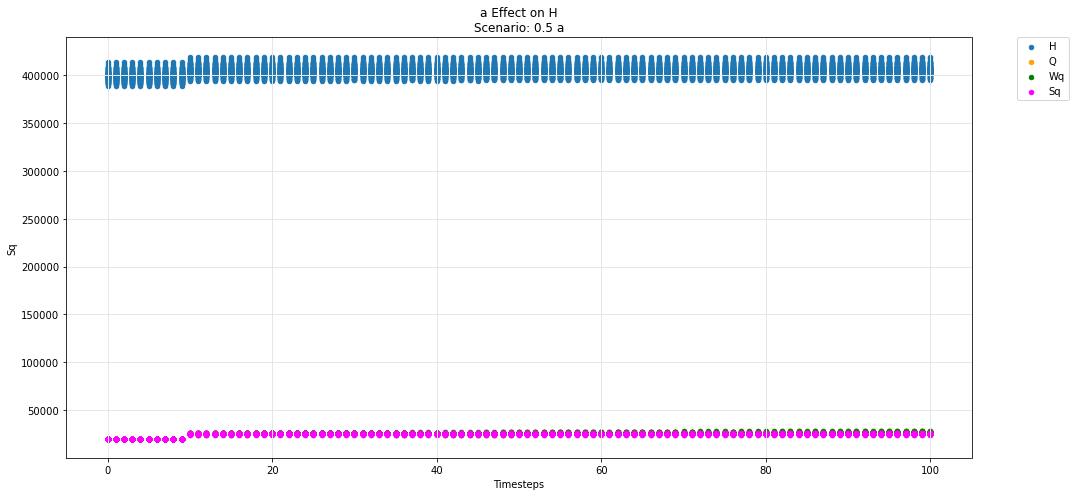

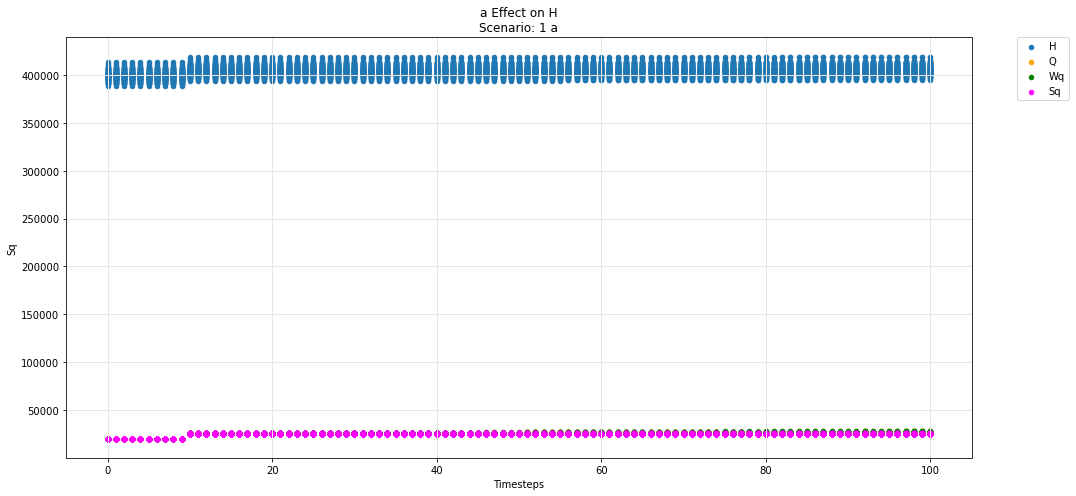

In [52]:
param_test_plot(experiments, config_ids, 'a', 'H', 'Q', 'Wq', 'Sq')

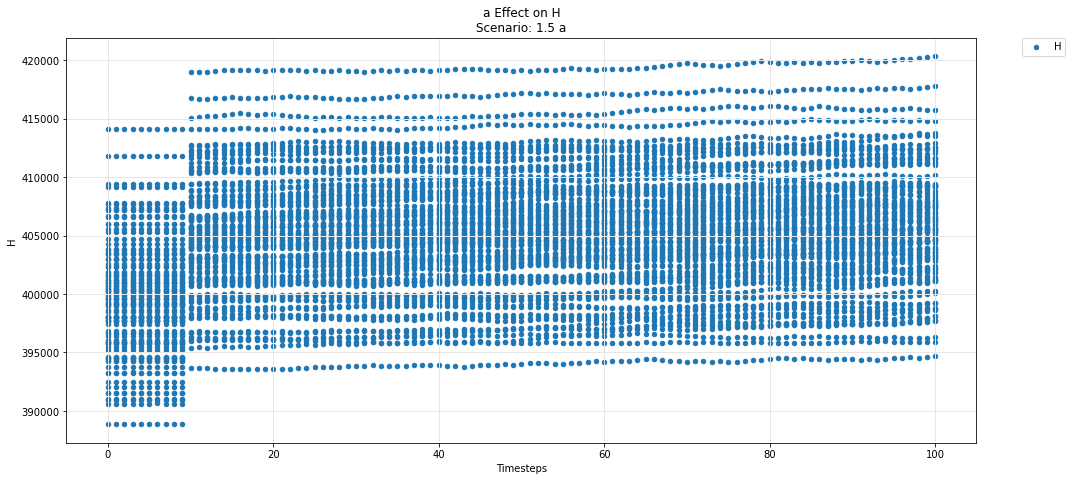

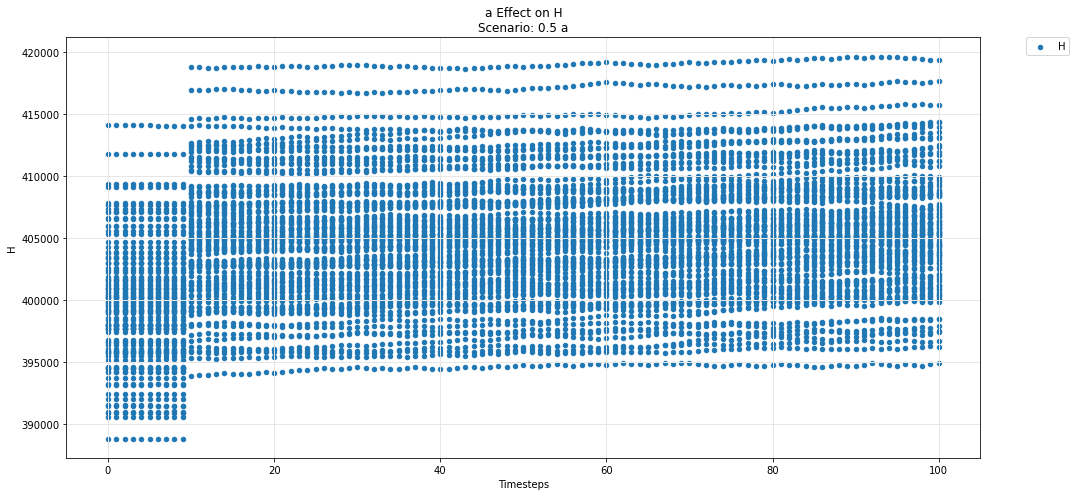

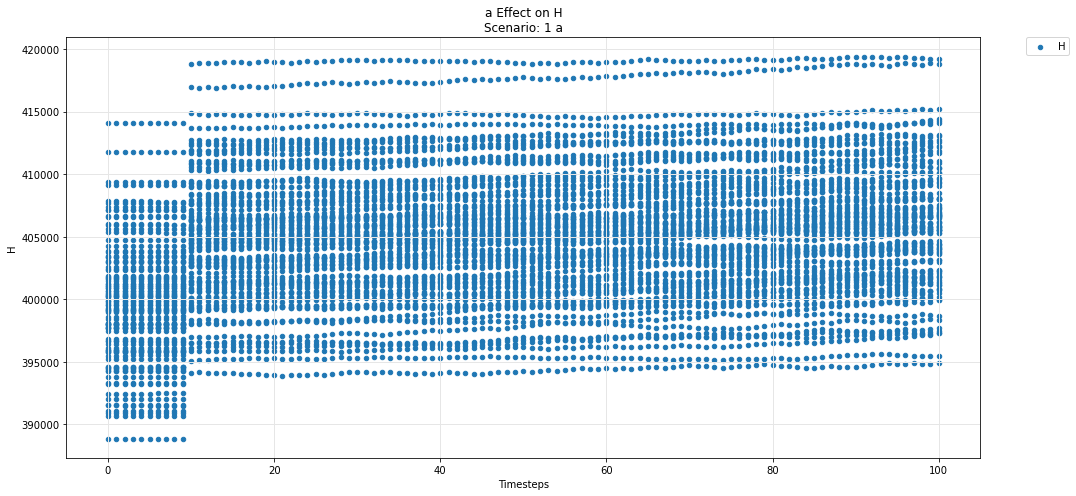

In [53]:
param_test_plot(experiments, config_ids, 'a', 'H')

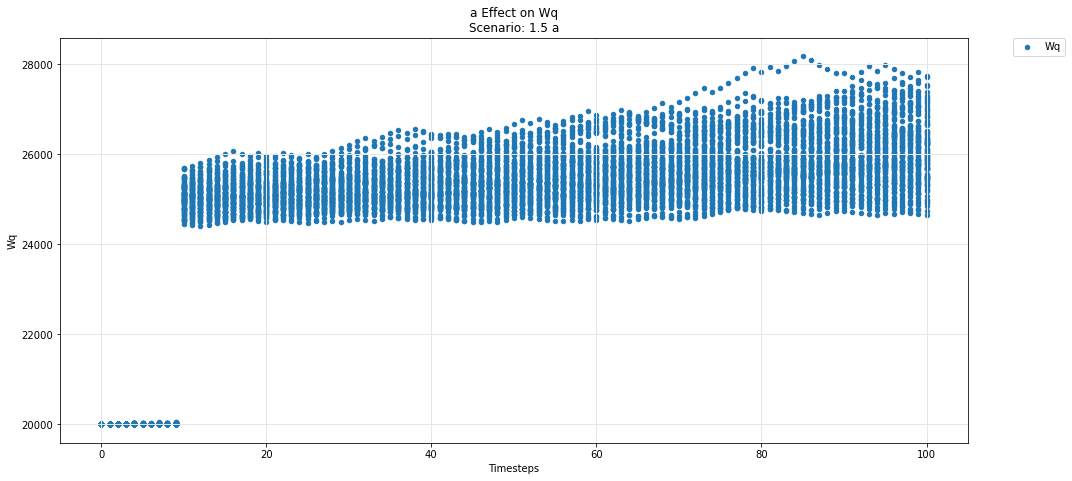

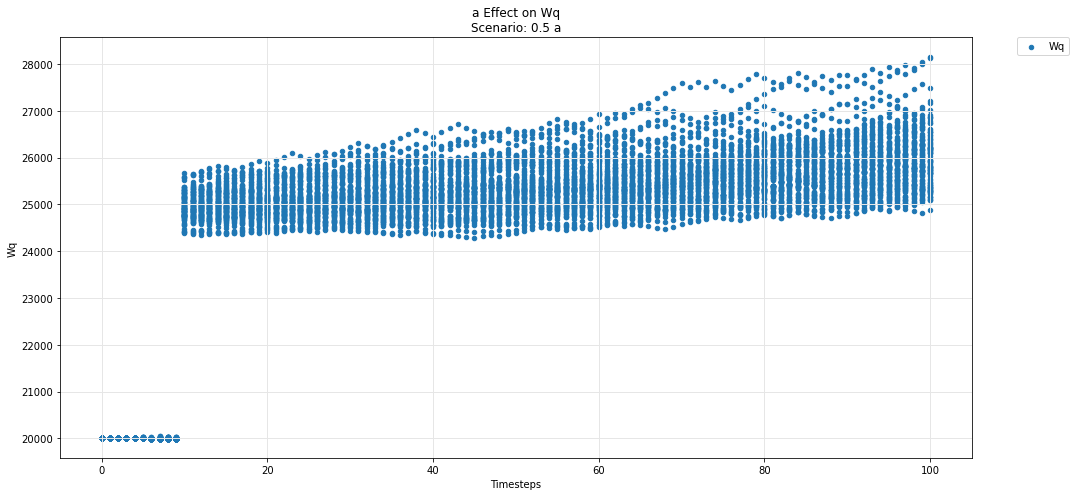

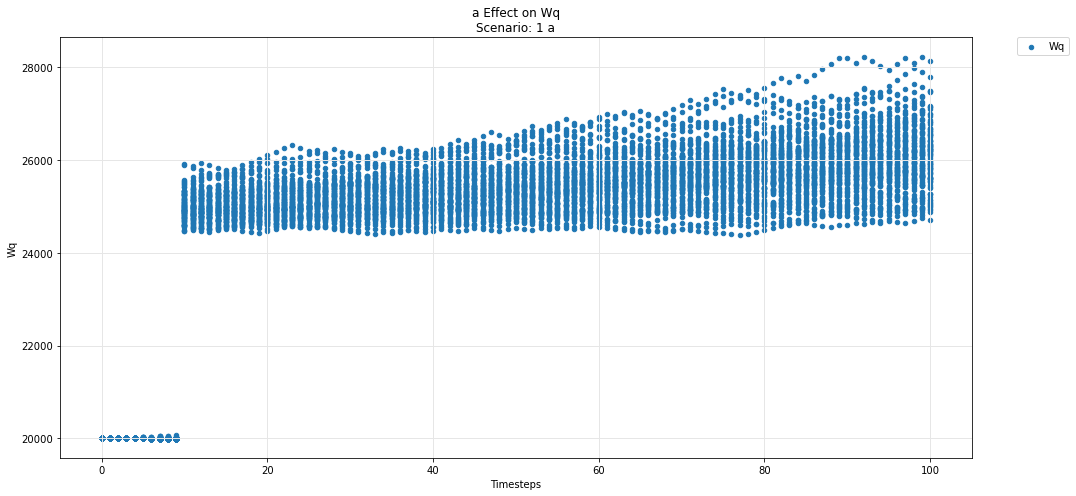

In [54]:
param_test_plot(experiments, config_ids, 'a', 'Wq')

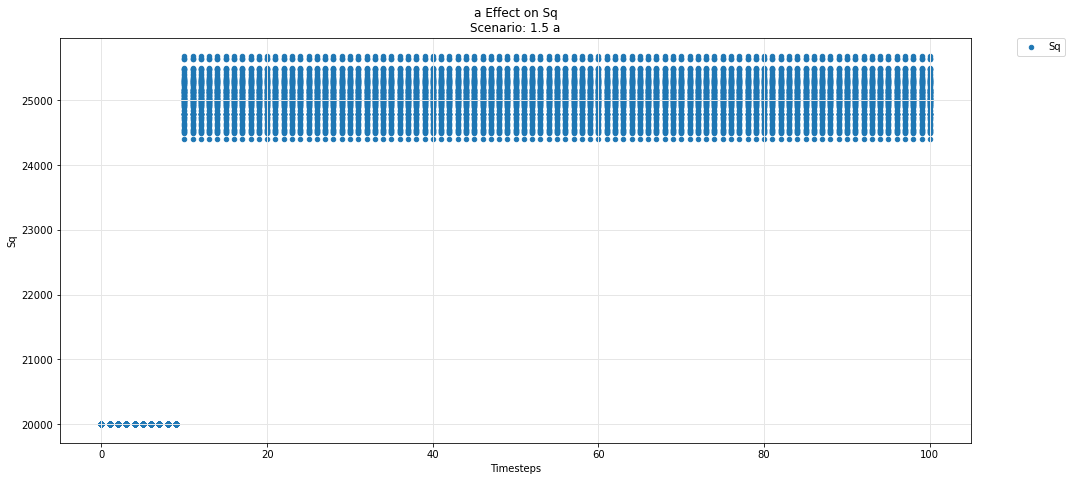

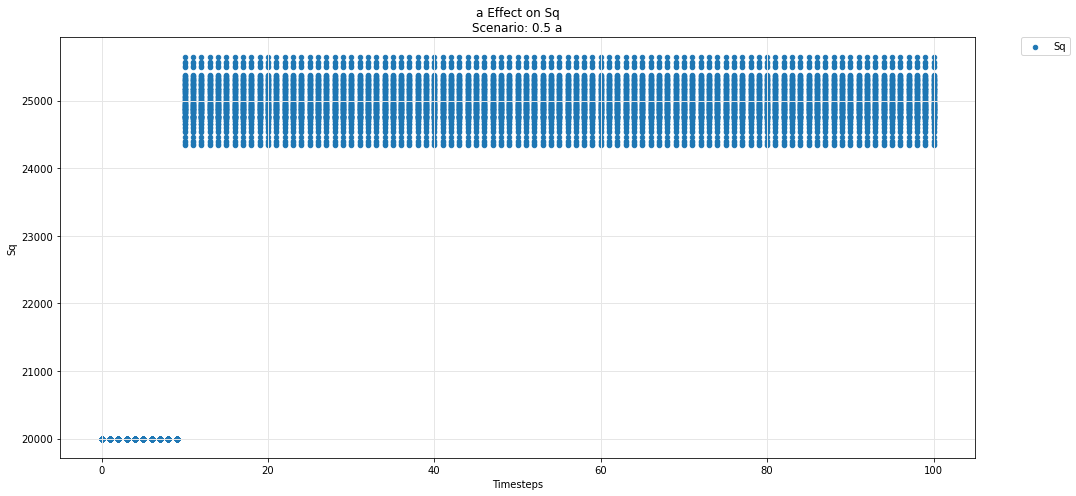

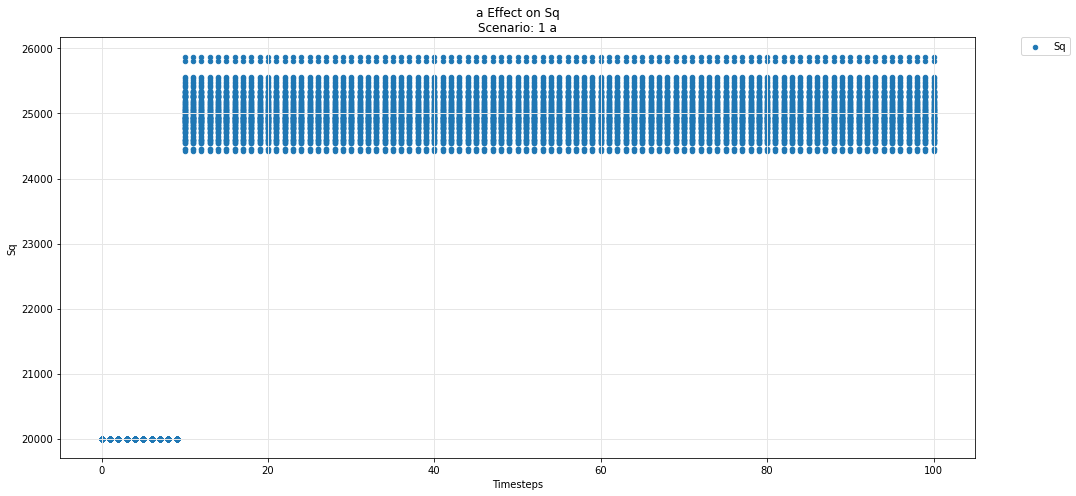

In [55]:
param_test_plot(experiments, config_ids, 'a', 'Sq')

## Hydra -- pool

Movement of the Omnipool variables
- Asset i
- Asset j
- Asset k

over the course of the simulation

In [56]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

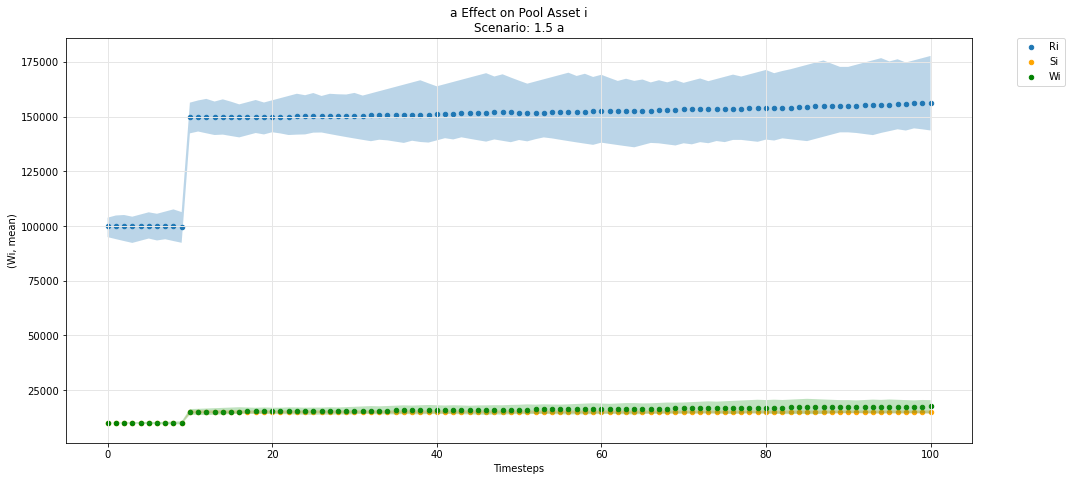

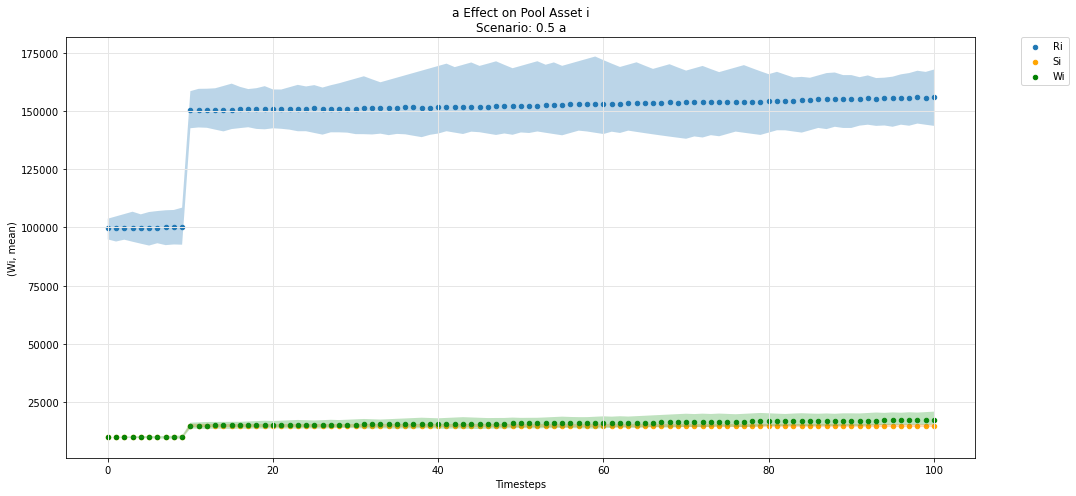

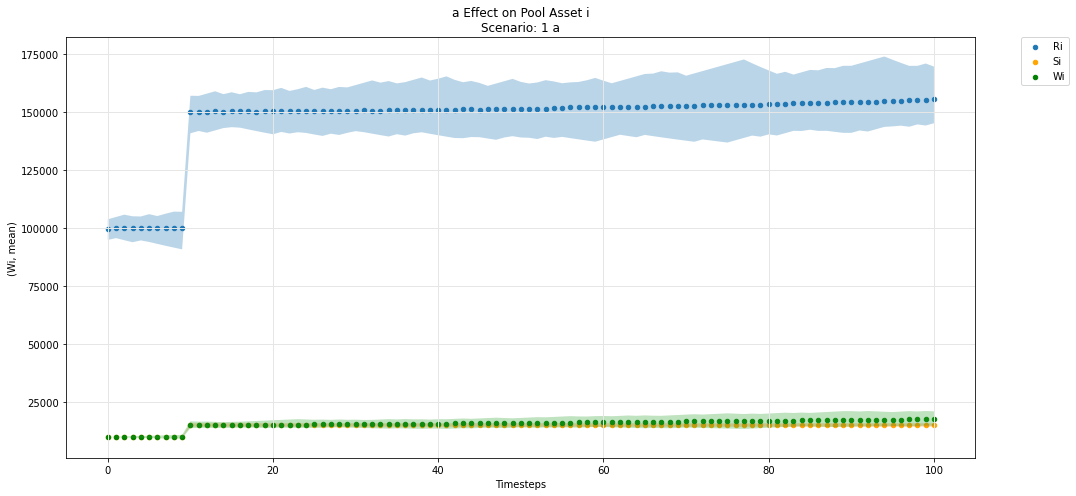

In [57]:
param_pool_simulation_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

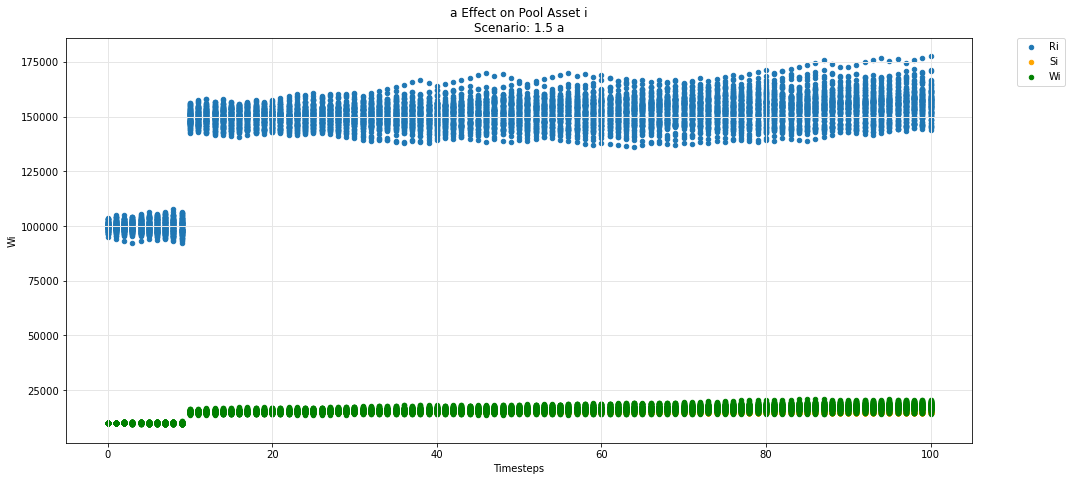

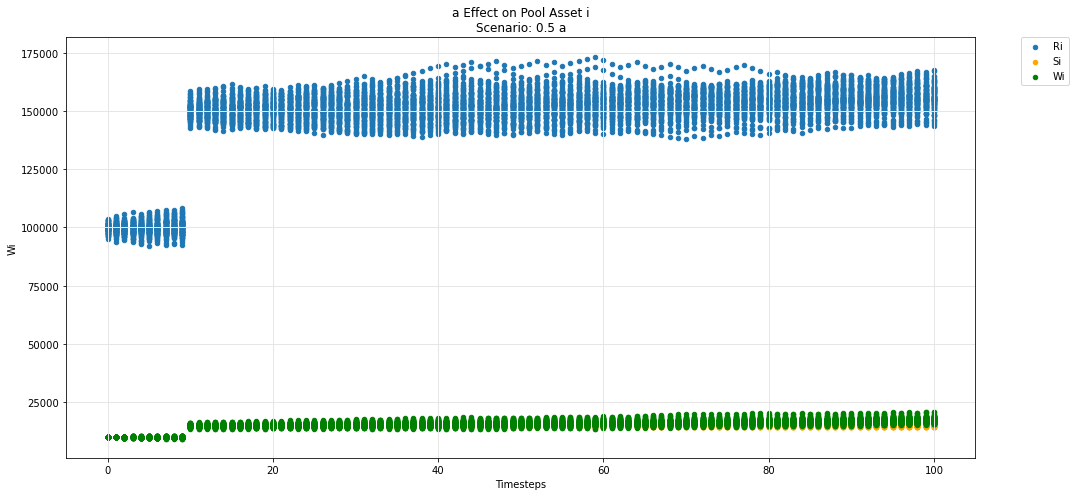

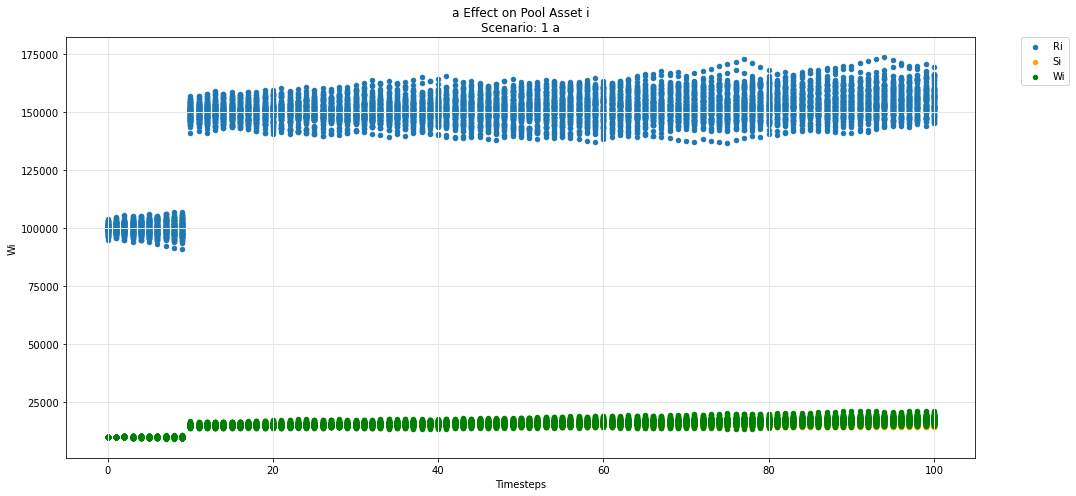

In [58]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

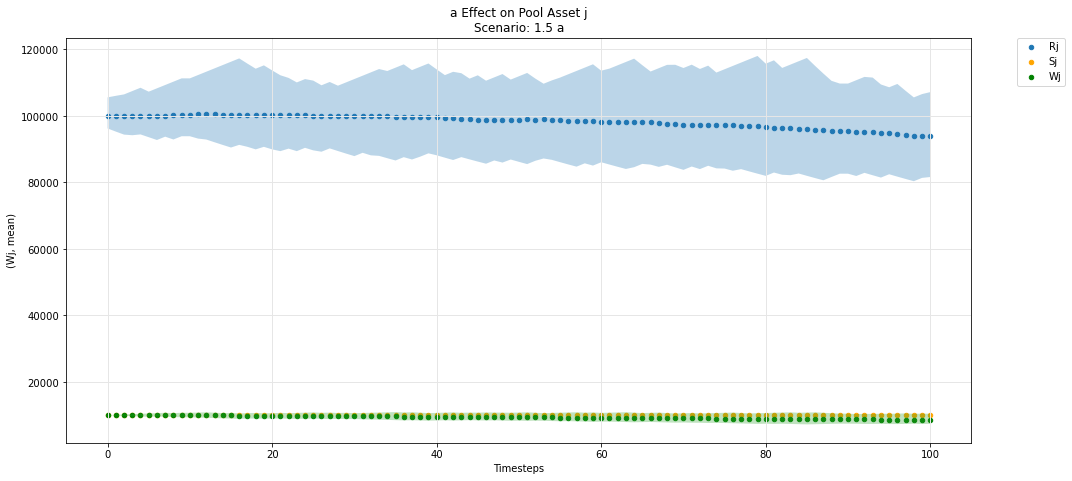

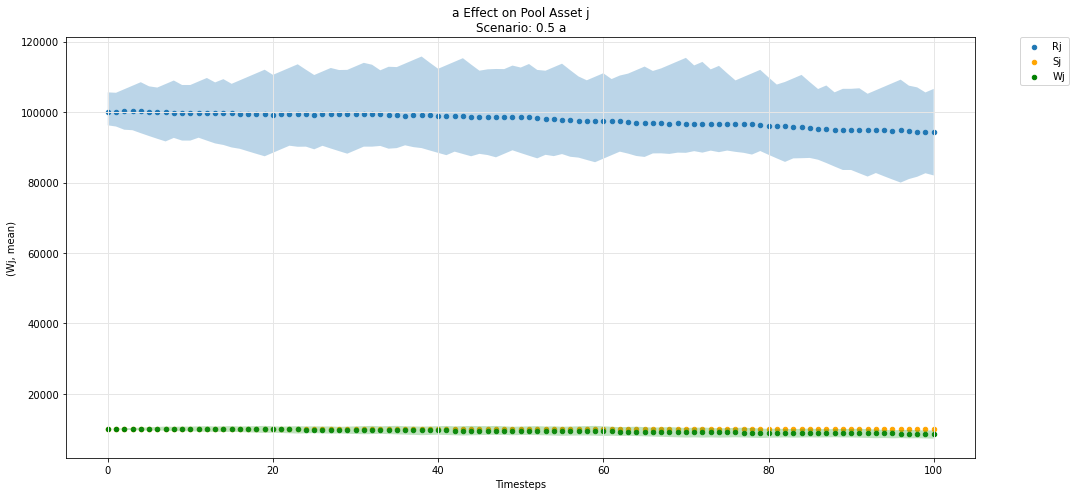

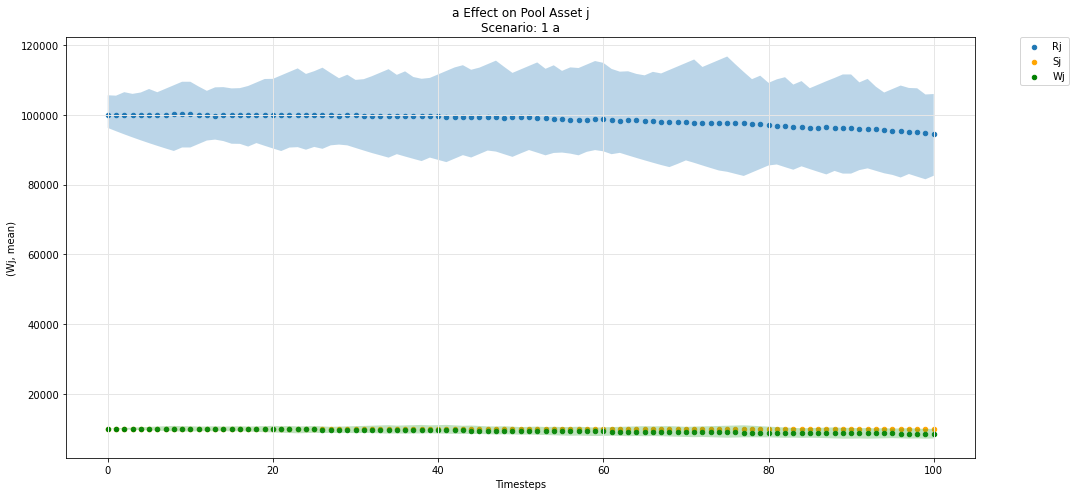

In [59]:
param_pool_simulation_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

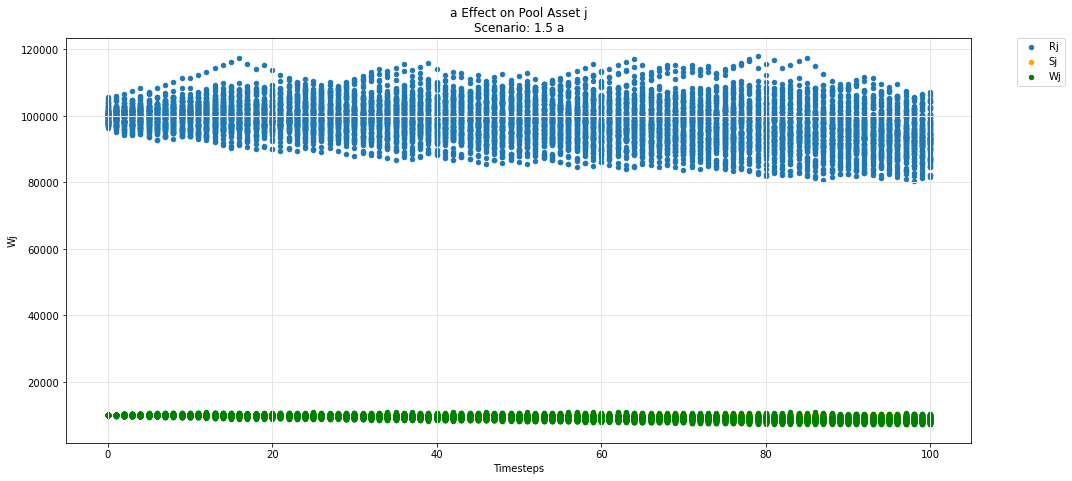

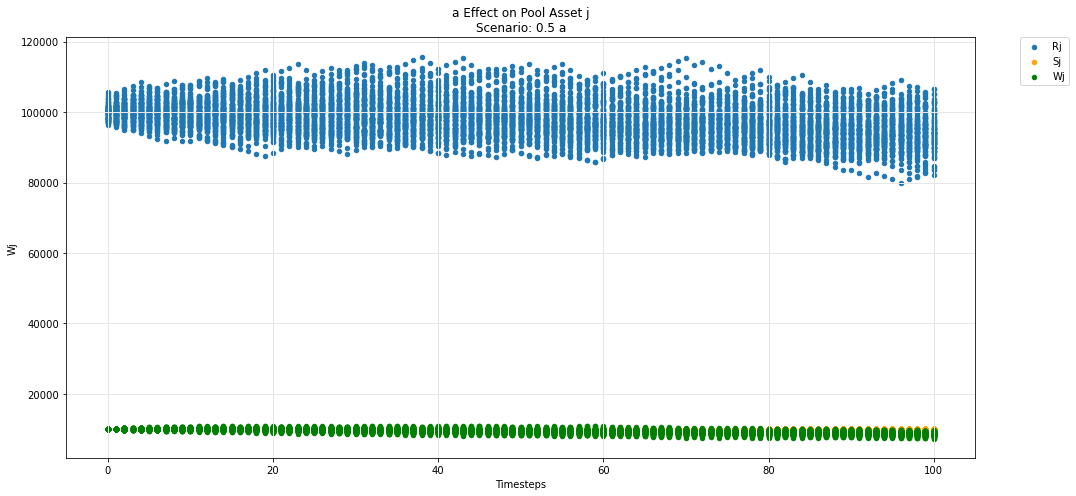

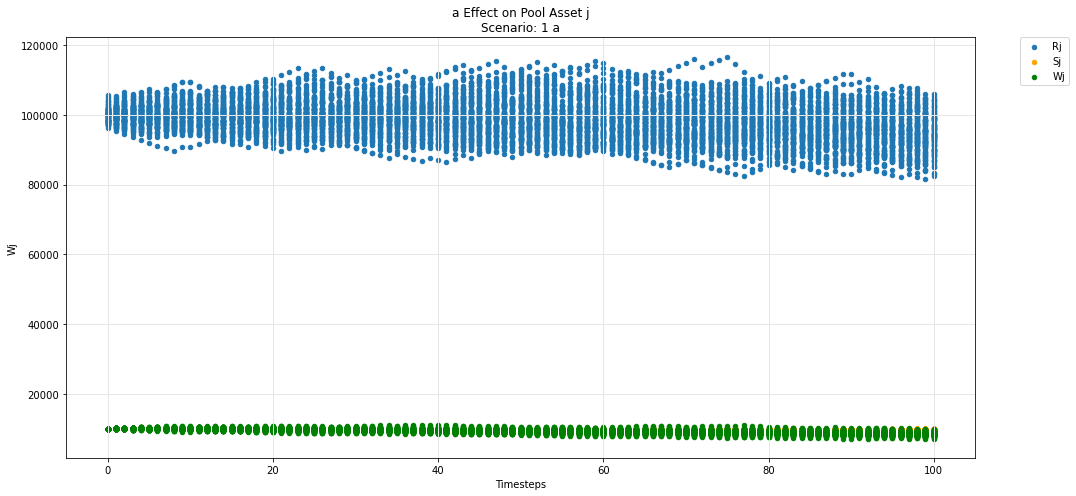

In [60]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

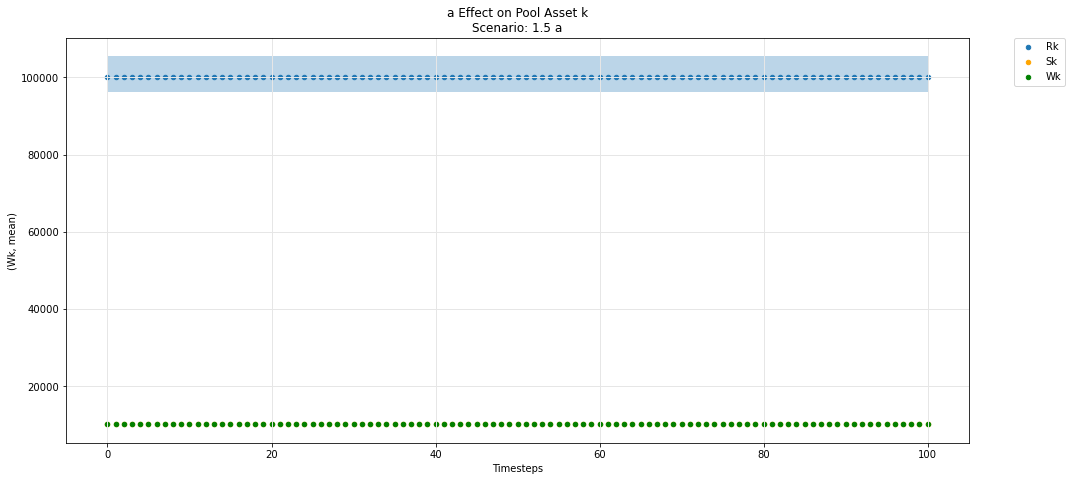

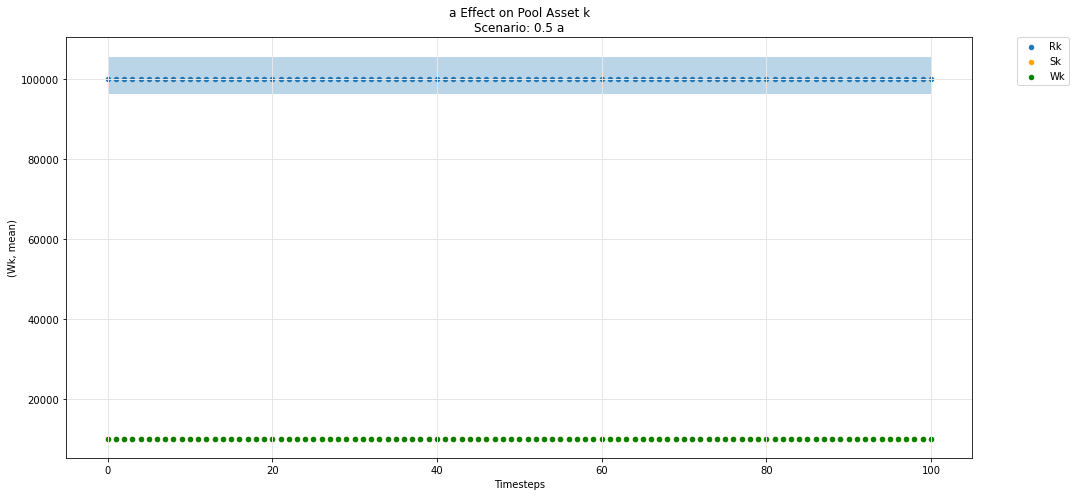

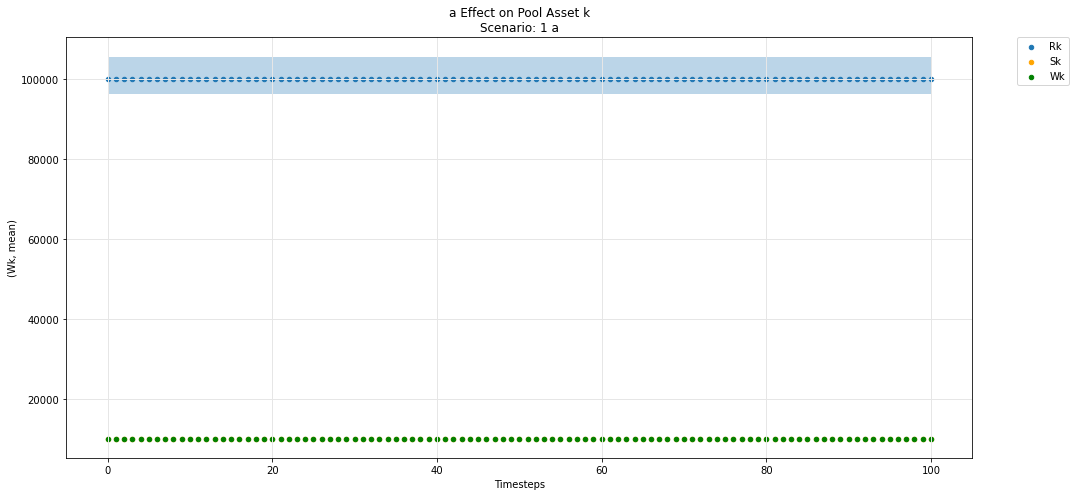

In [61]:
param_pool_simulation_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

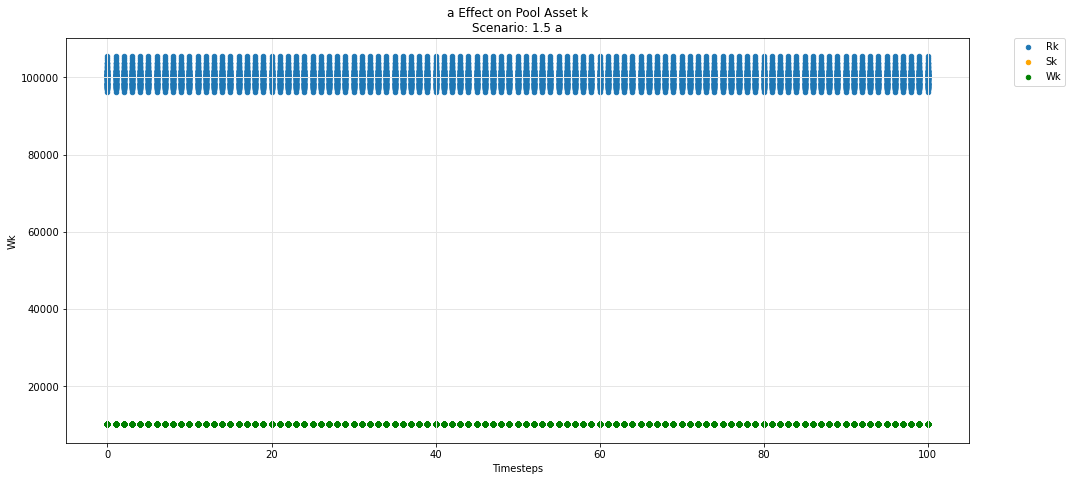

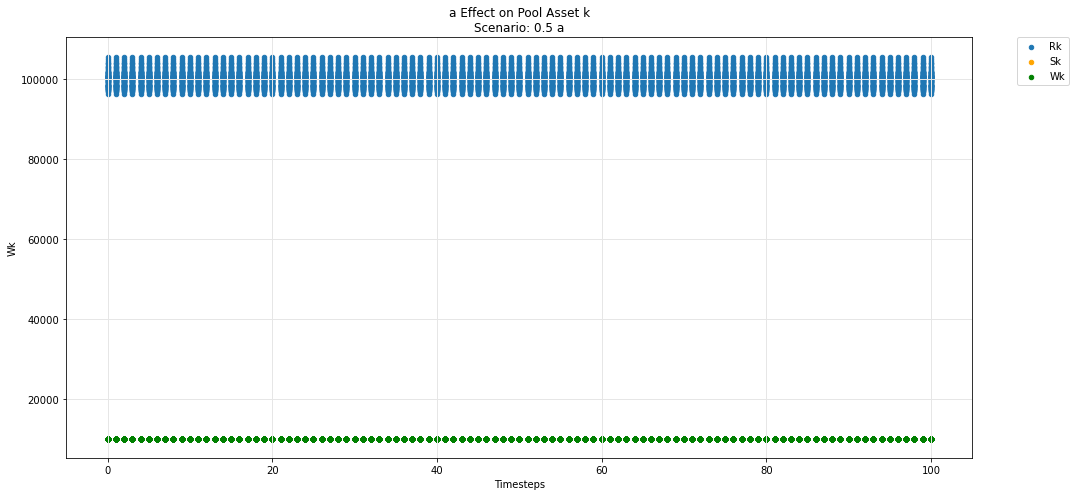

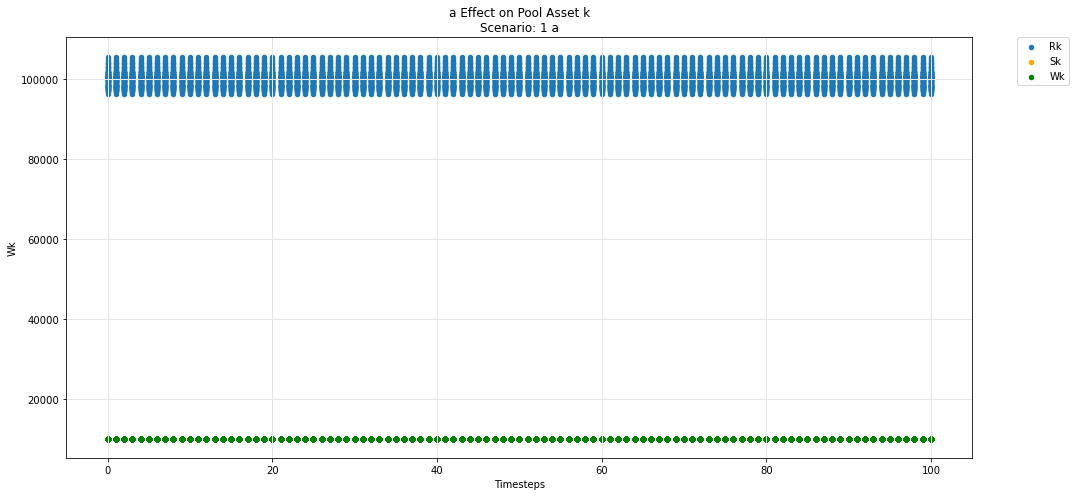

In [62]:
param_pool_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

In [63]:
def param_pool_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=df_label, label=df_label, ax=ax, legend=True, kind ='scatter')

        for count, arg in enumerate(args):
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))

            df.plot(x='timestep', y=df_arg_label, label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

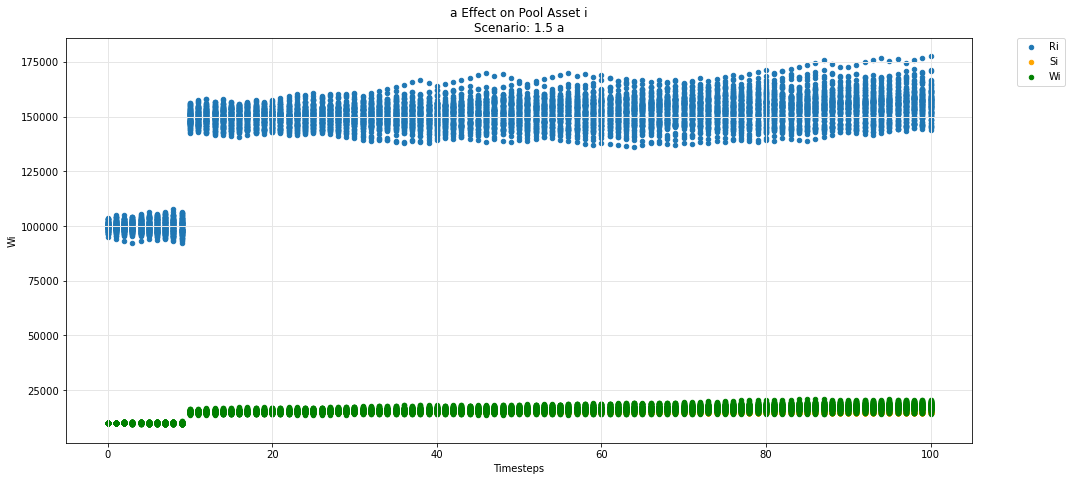

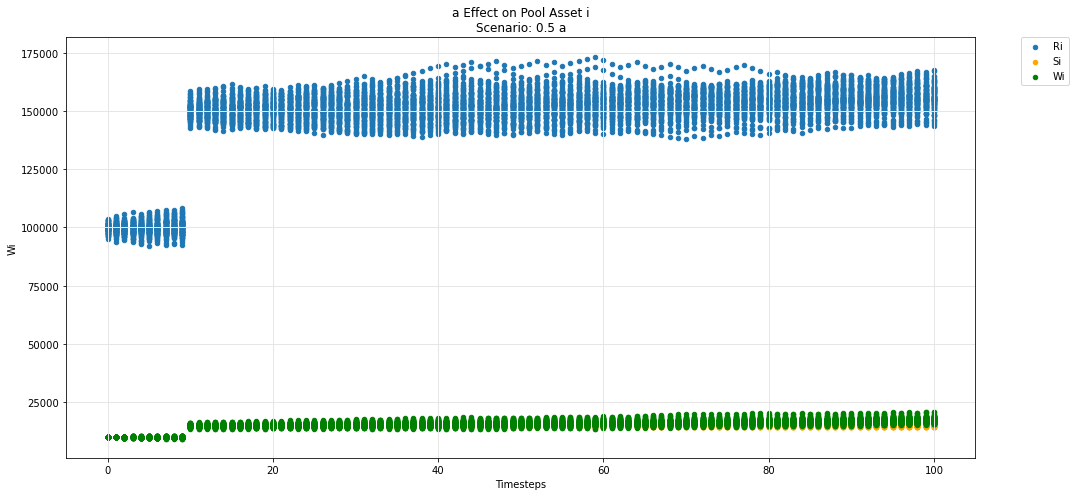

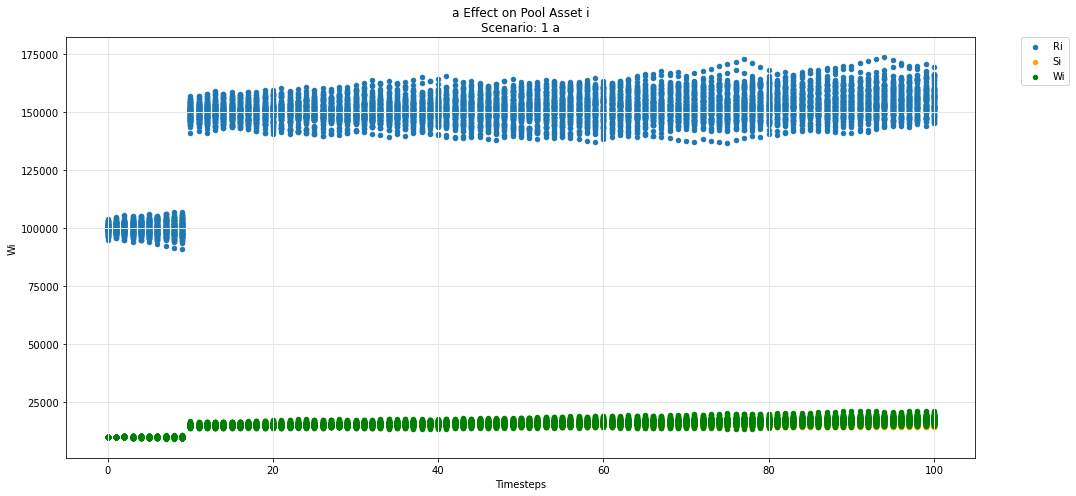

In [64]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

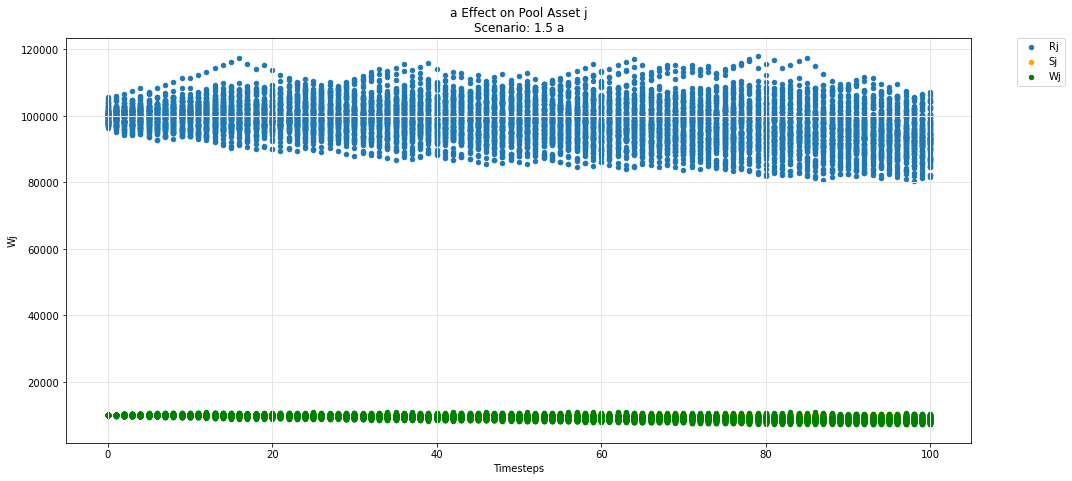

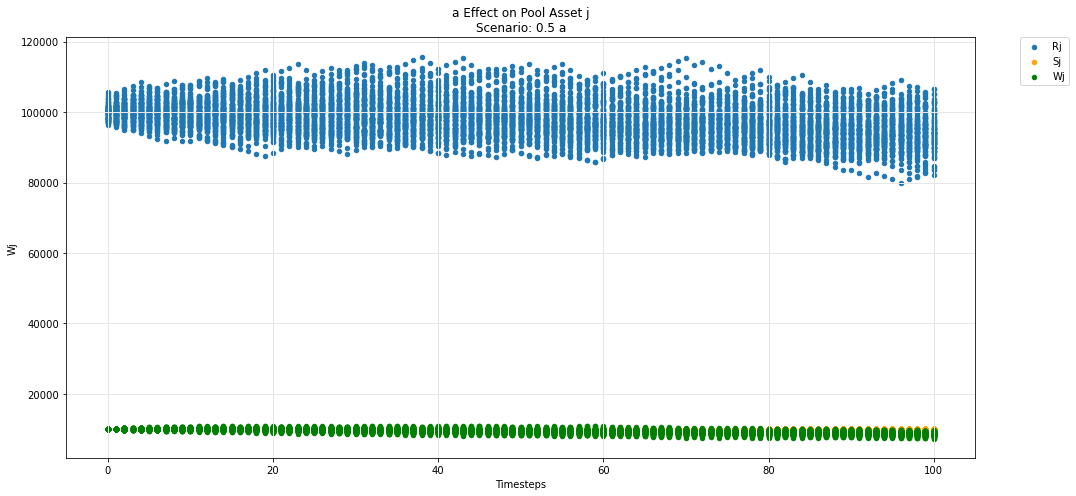

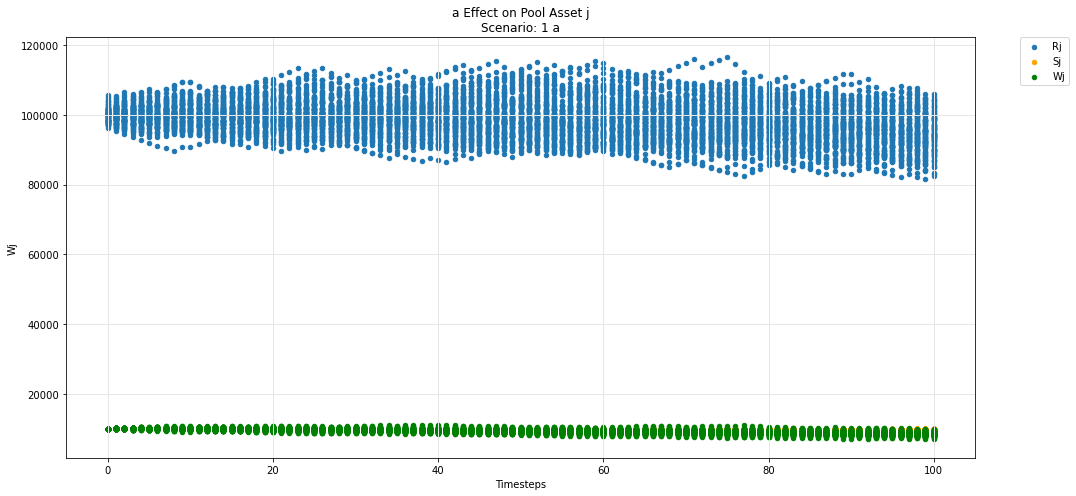

In [65]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

In [66]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

# Prices

## Uniswap

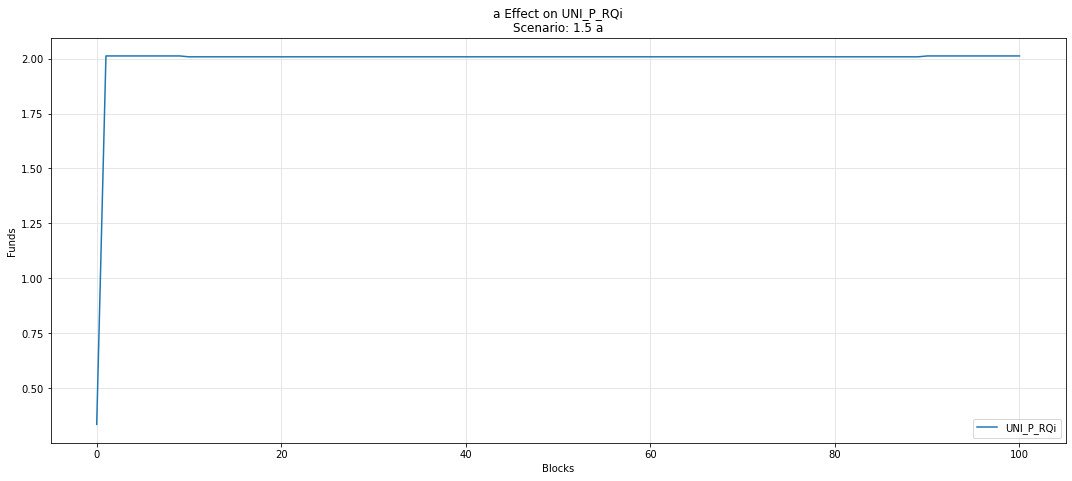

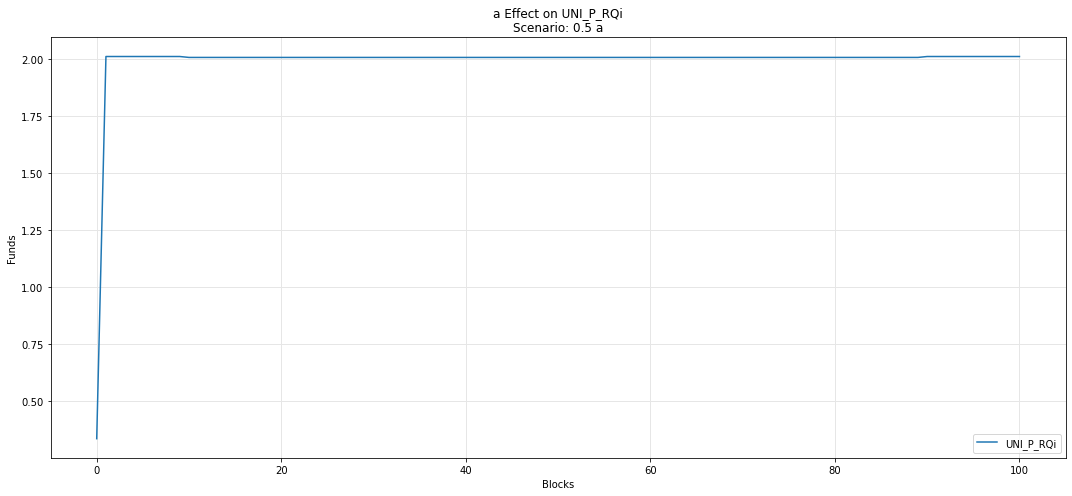

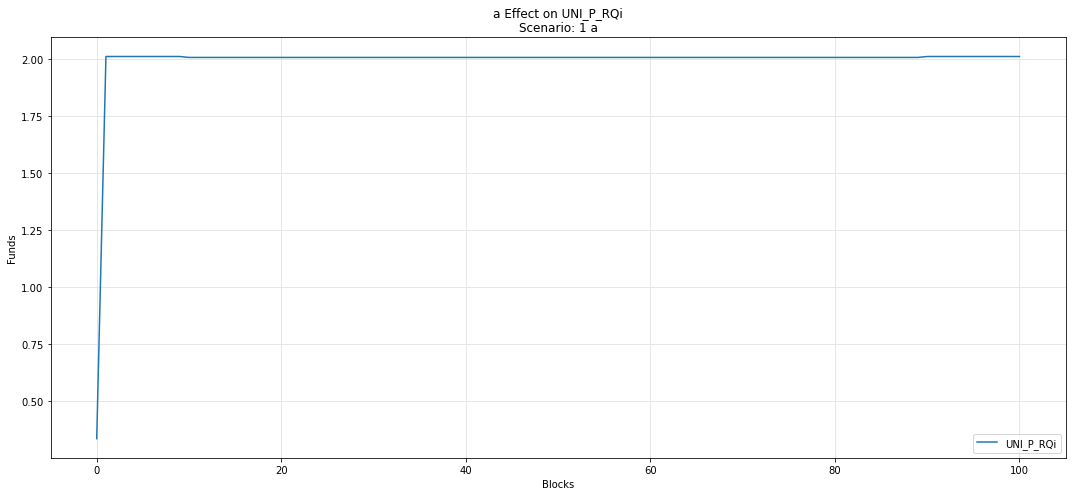

In [67]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQi')

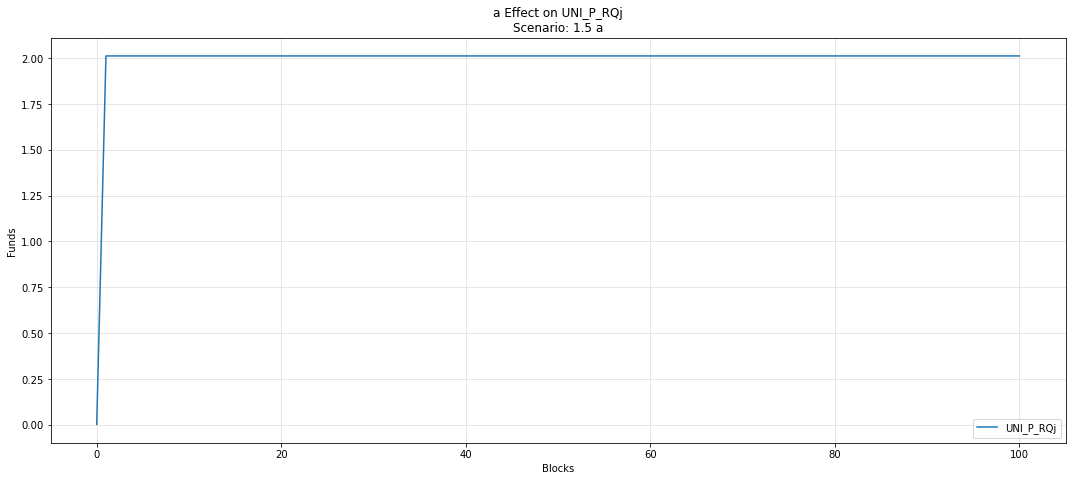

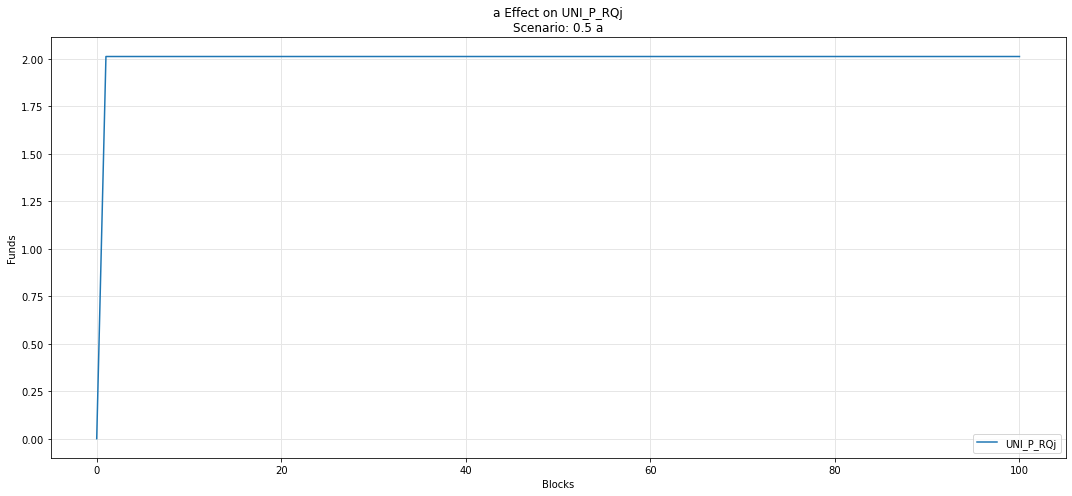

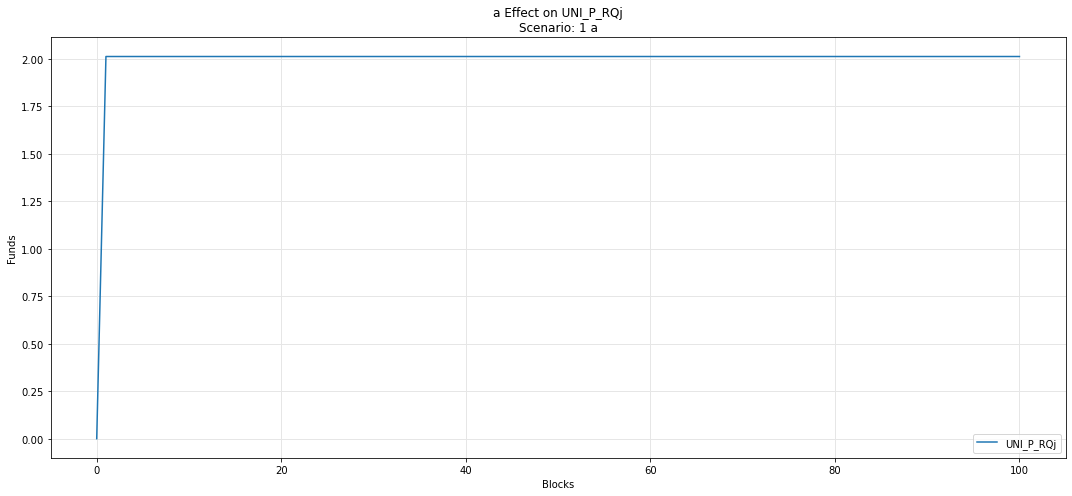

In [68]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQj')

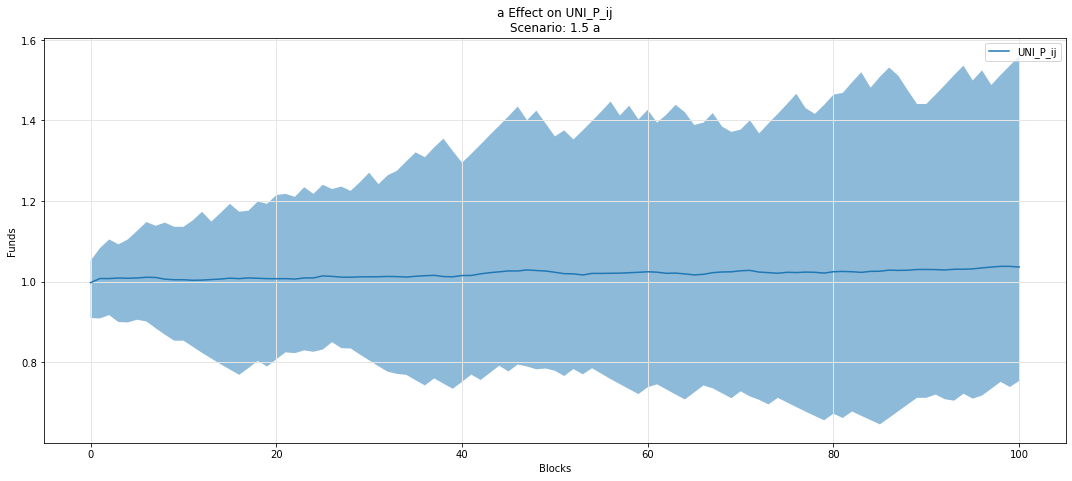

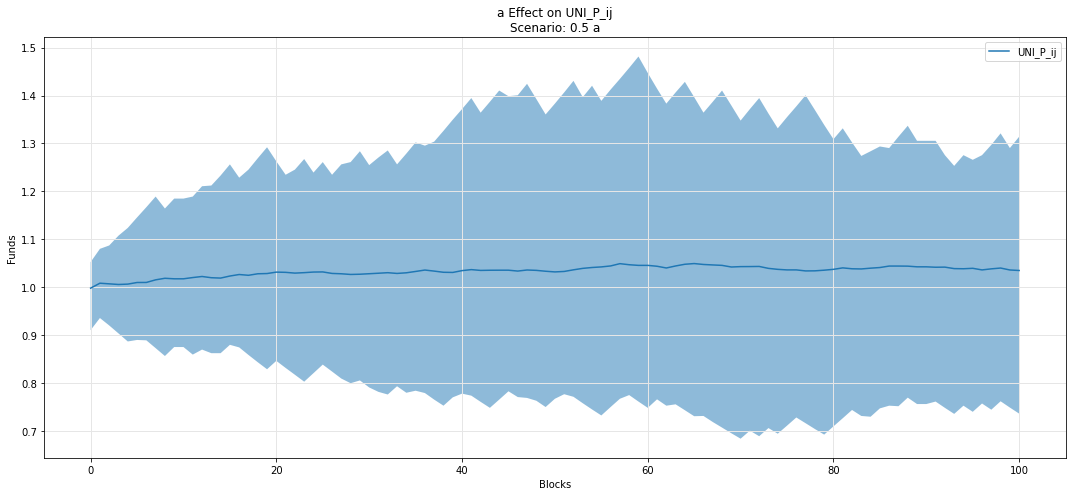

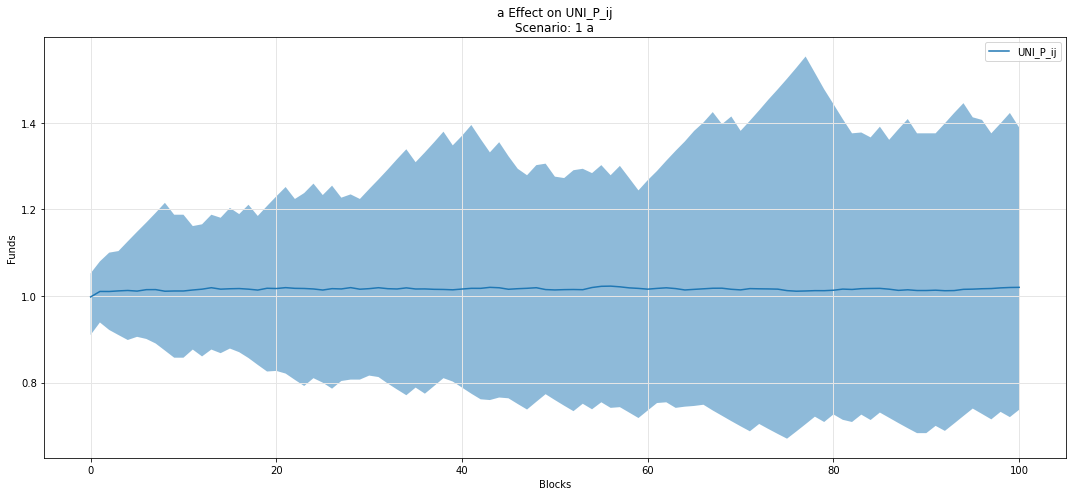

In [69]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_ij')

## Omnipool

## Asset i

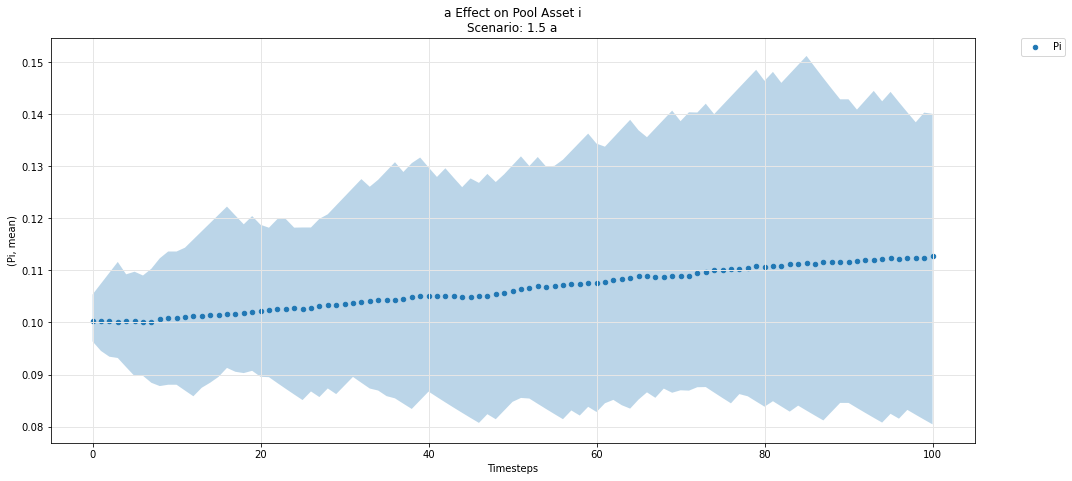

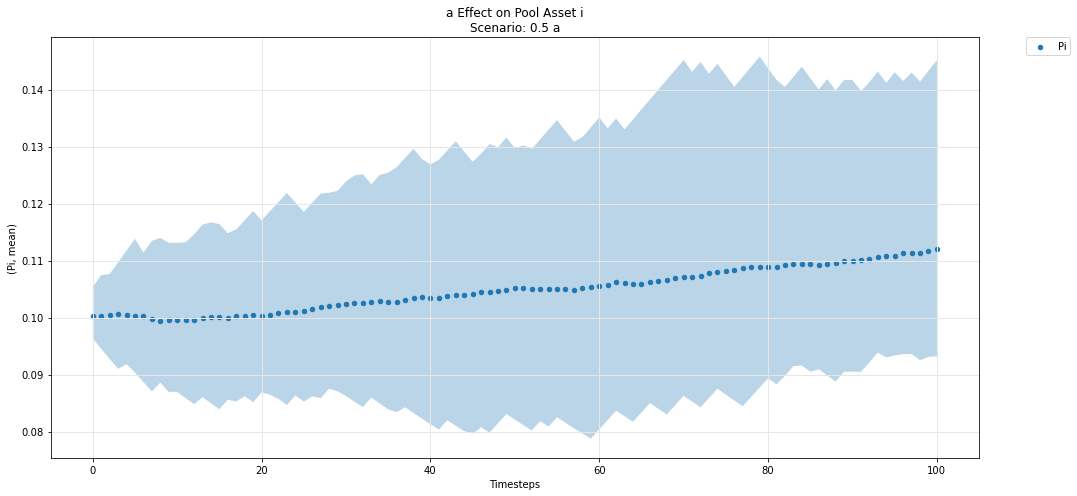

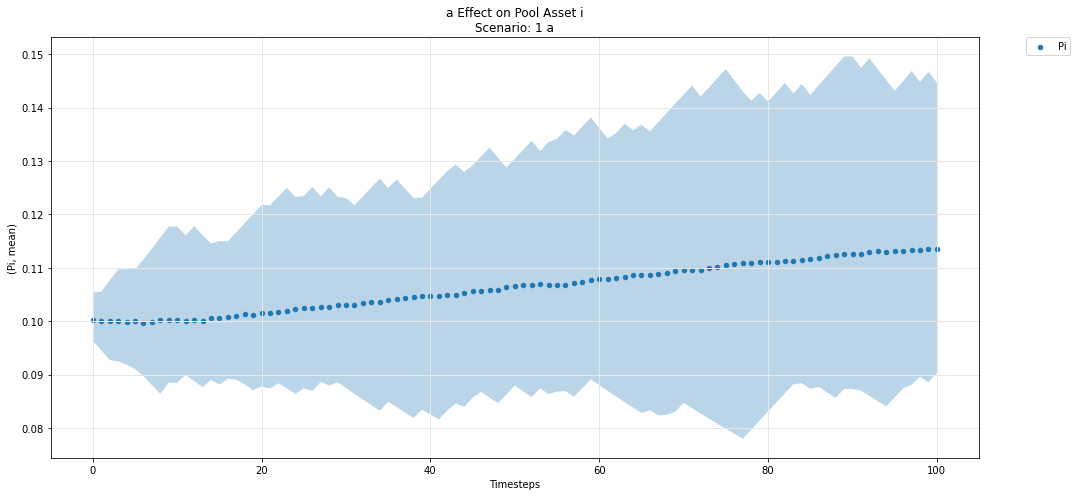

In [70]:
param_pool_simulation_plot(experiments, config_ids, 'a','i','P')

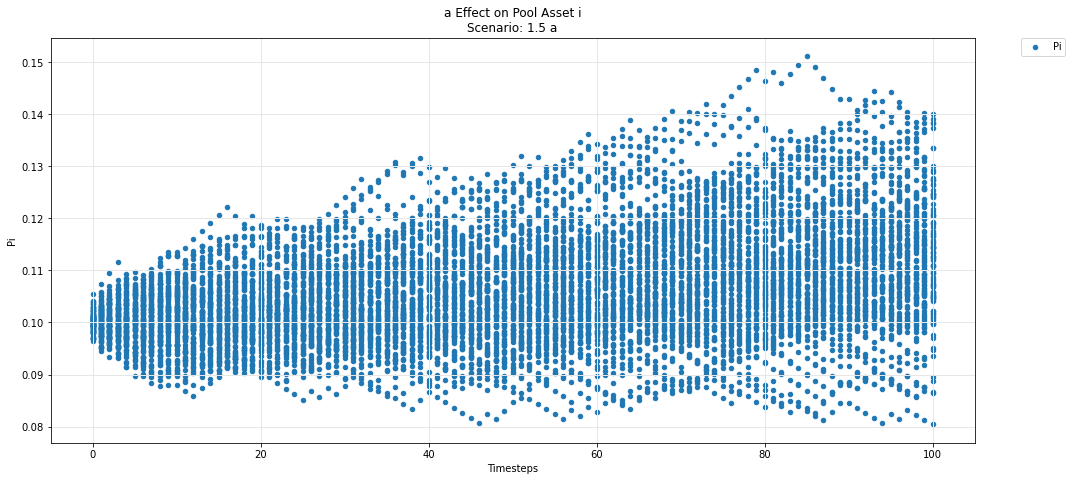

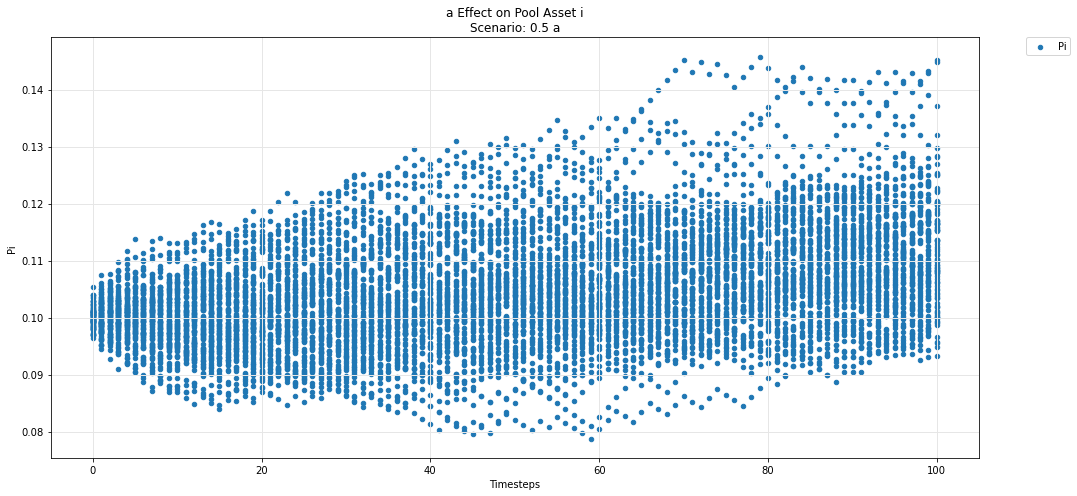

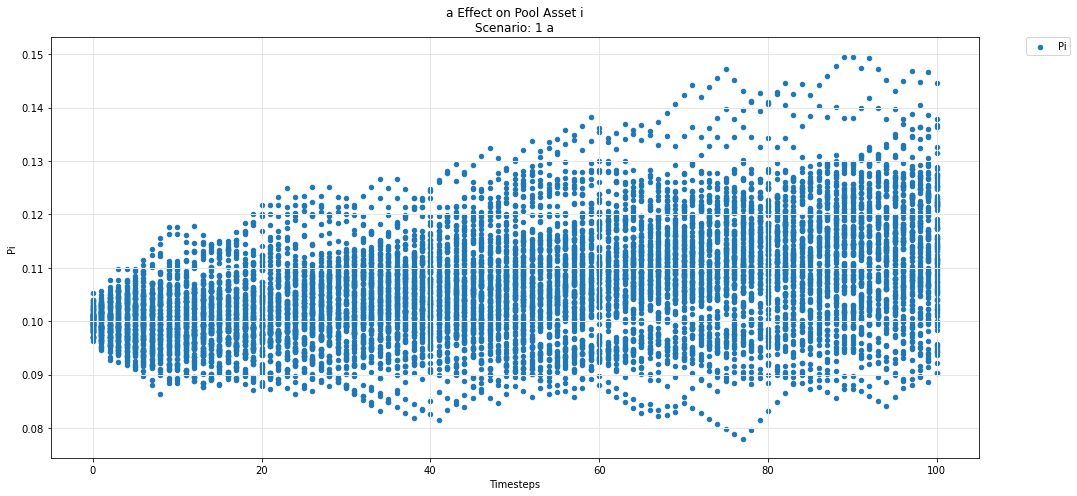

In [71]:
param_pool_plot(experiments, config_ids, 'a','i','P')

## Asset j

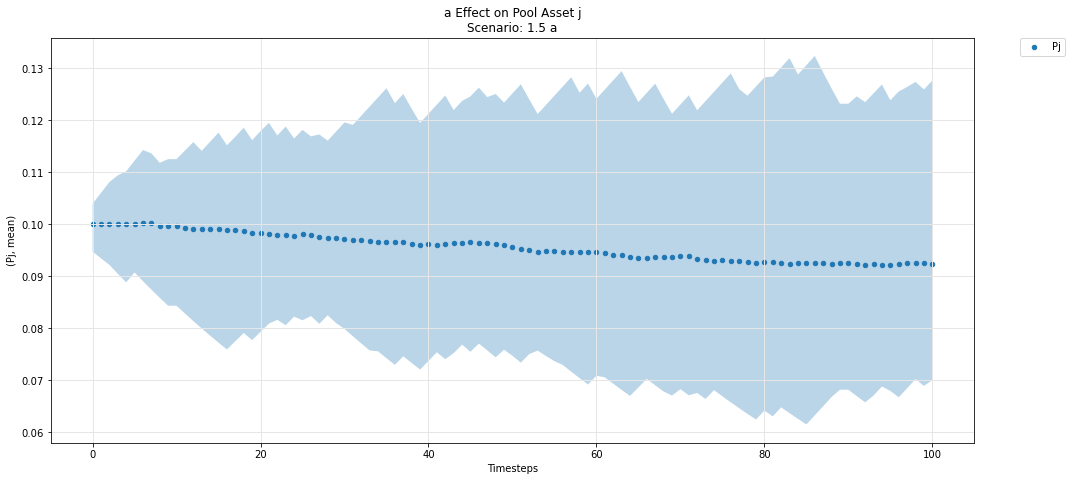

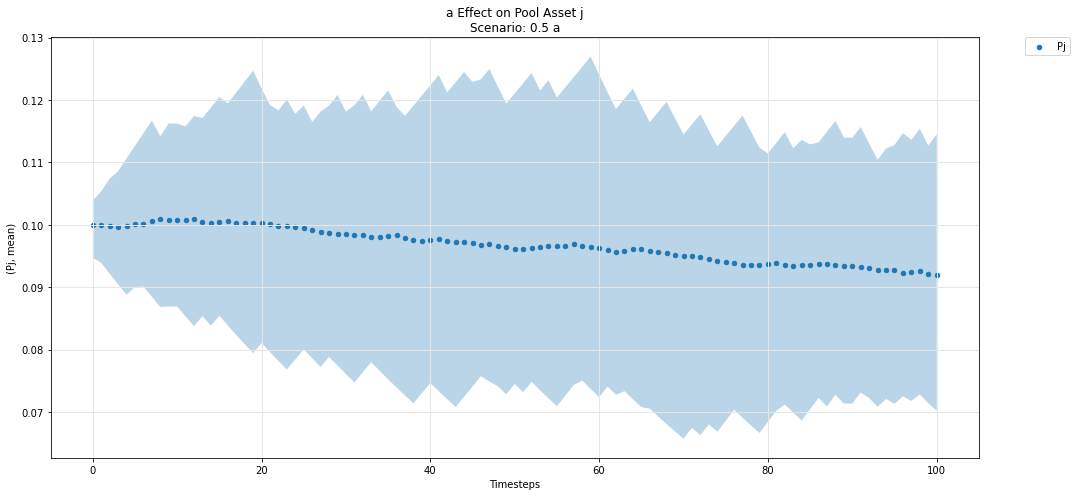

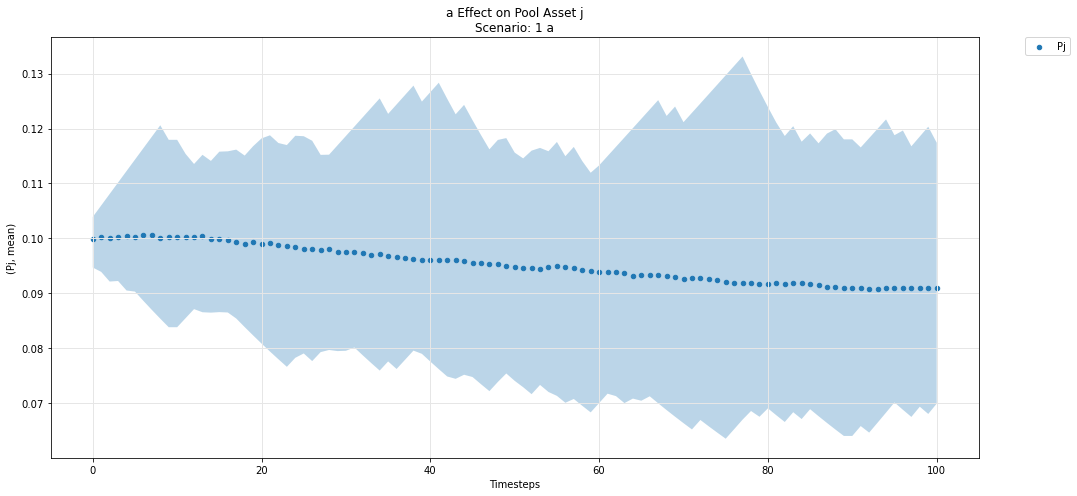

In [72]:
param_pool_simulation_plot(experiments, config_ids, 'a','j','P')

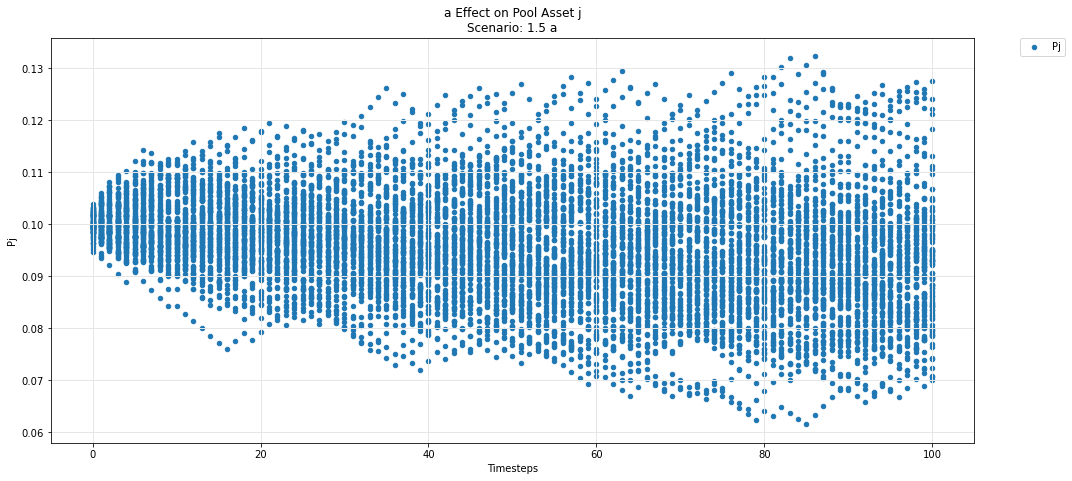

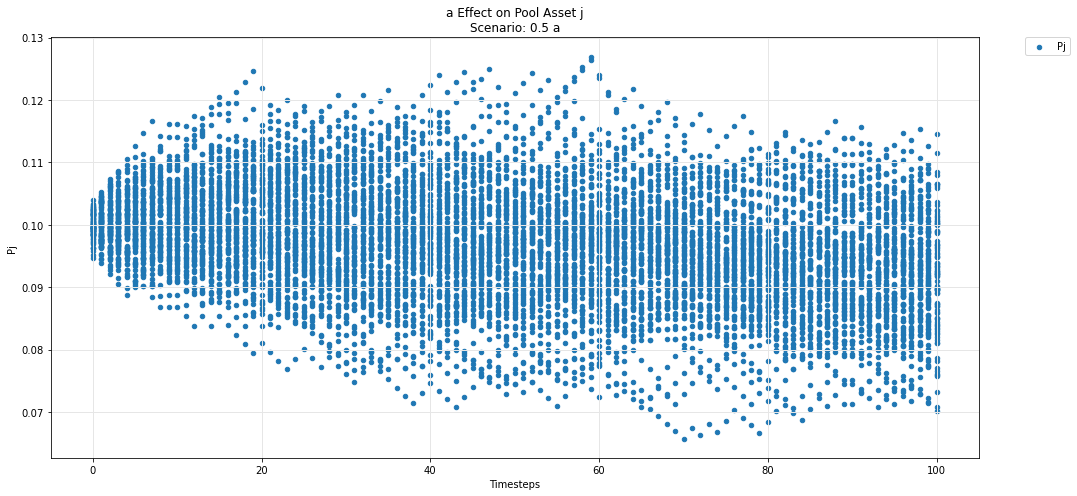

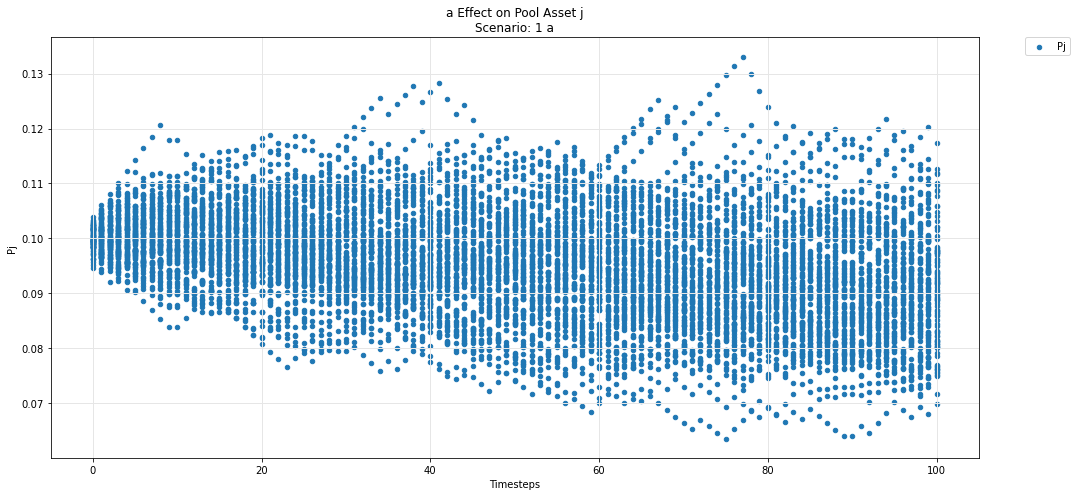

In [73]:
param_pool_plot(experiments, config_ids, 'a','j','P')

## Asset k

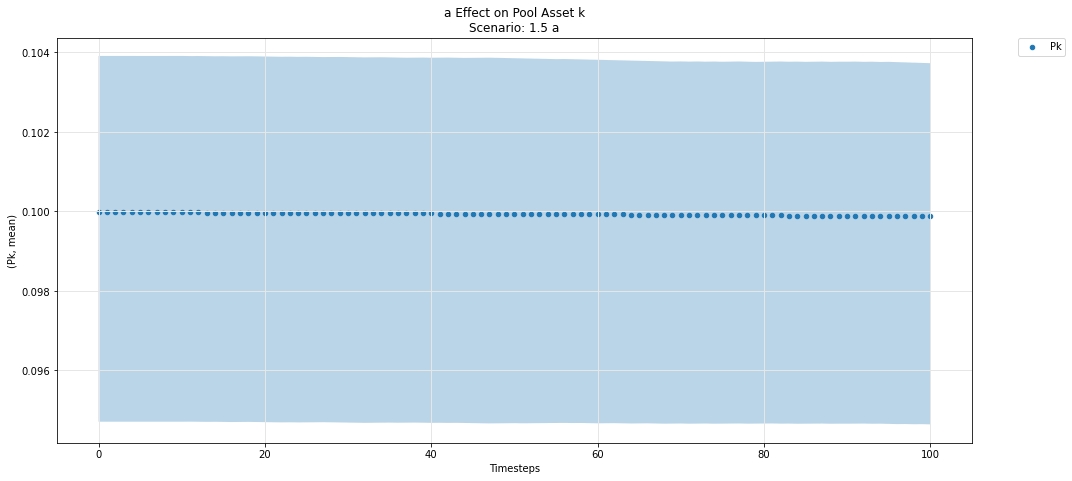

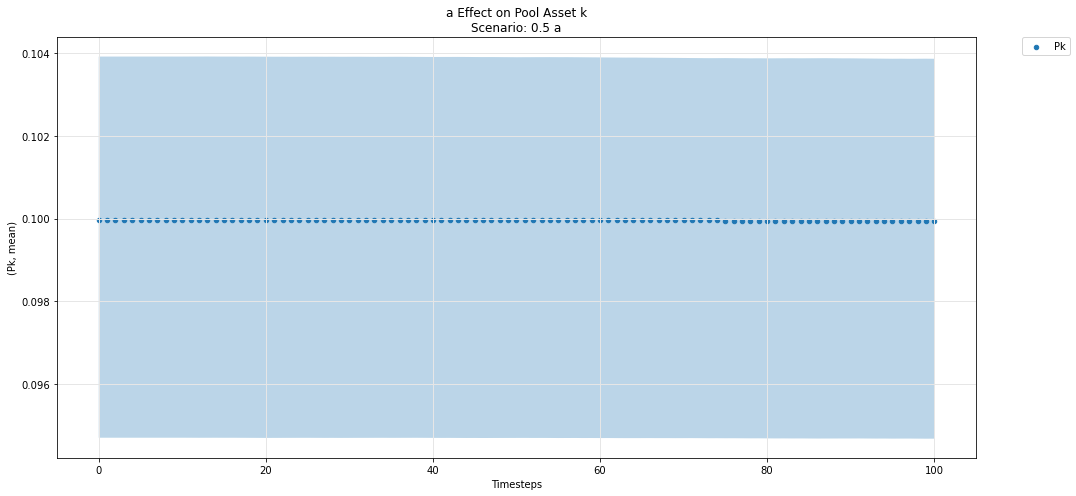

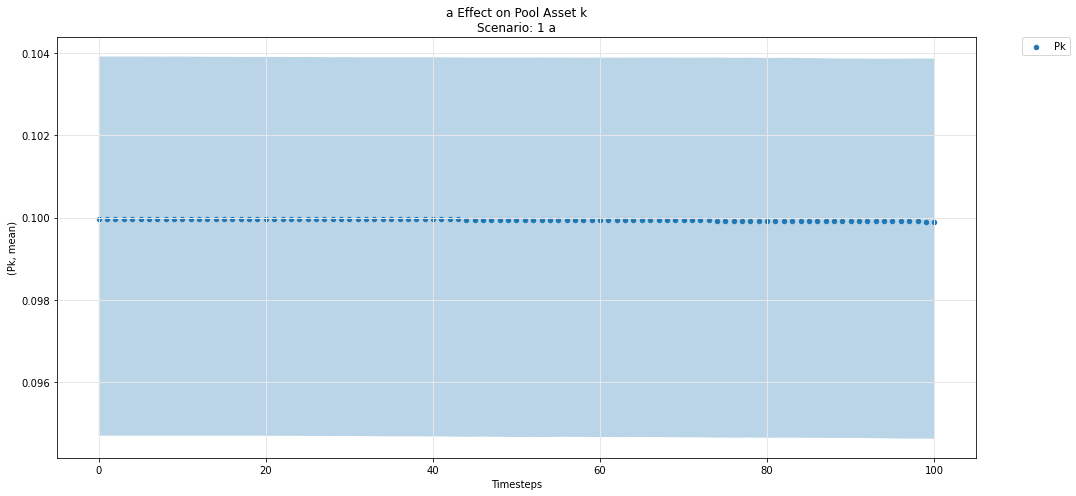

In [74]:
param_pool_simulation_plot(experiments, config_ids, 'a','k','P')

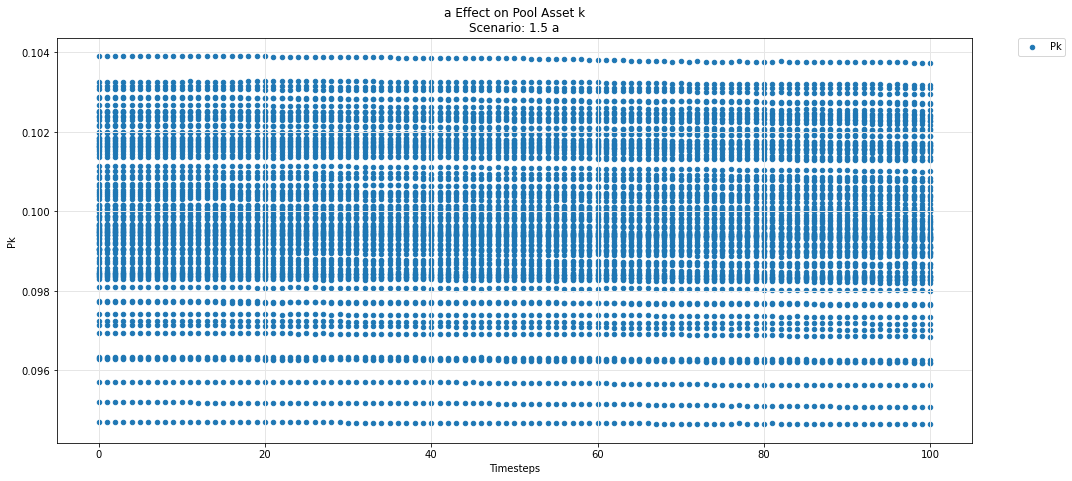

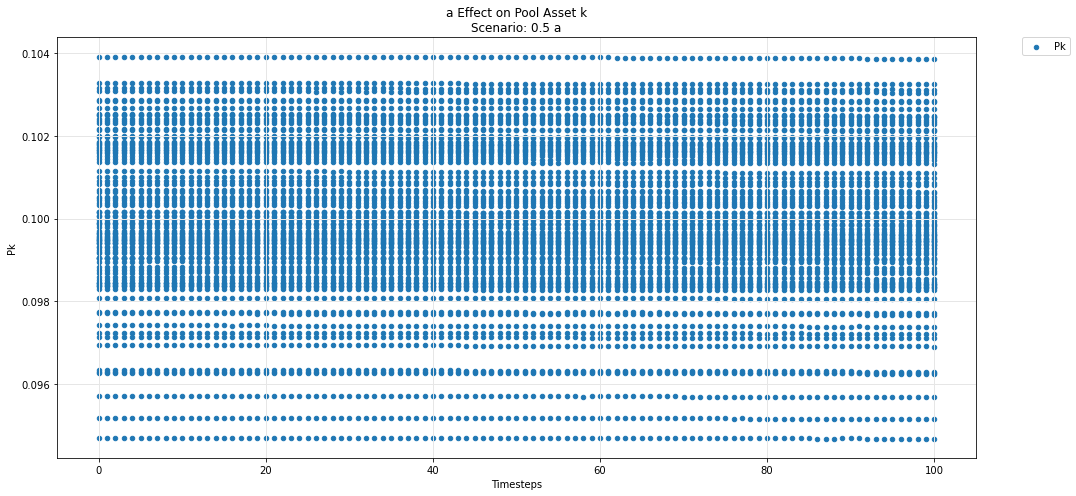

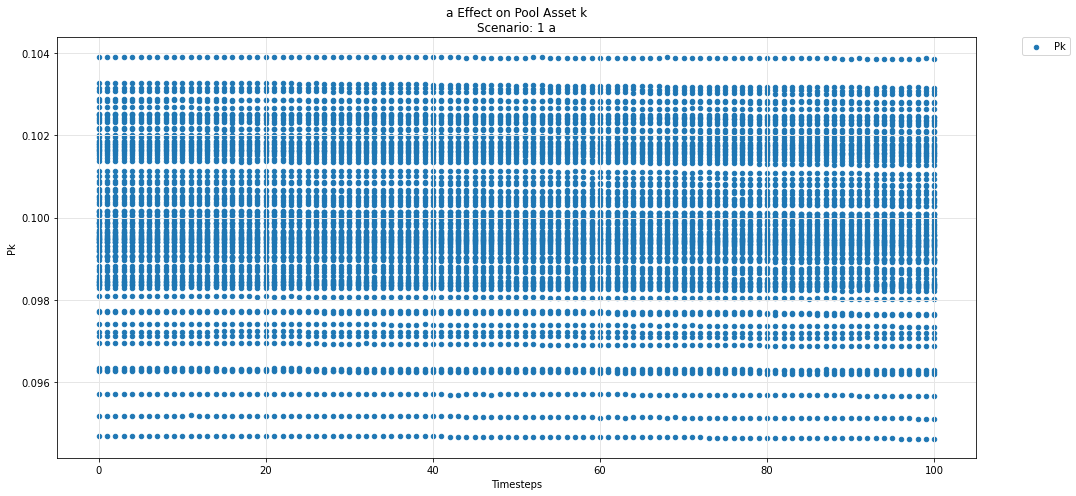

In [75]:
param_pool_plot(experiments, config_ids, 'a','k','P')